<h2>Package import</h2>

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.utils import check_random_state
import time
from sklearn.preprocessing import MinMaxScaler
import os
import json

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<h2>Loading data</h2>

In [2]:
df = pd.read_excel('Dataset/DataSet_Large Class - Round 3.xlsx')

In [3]:
cleanup_nums = {"Final annotation":     {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 0: 0}}

df= df.replace(cleanup_nums)

In [4]:
df.set_index('Code Snippet ID')

Link  \
Code Snippet ID                                                                                         
Aseprite.AsepriteAnimation                          https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteCel                                https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteFrame                              https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteImporter                           https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteLayer                              https://github.com/egordorichev/BurningKnight/...   
...                                                                                               ...   
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.C...  https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.Comments.CommentEditor            https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Screens.Select.FilterQueryParser           https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Rulesets.Osu.Statistics.AccuracyHeatmap    https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.NowPlayingOverlay                 https://github.com/ppy/osu/tree/2cac373365309a...   

                                                     Code Smell  \
Code Snippet ID                                                   
Aseprite.AsepriteAnimation                          Large Class   
Aseprite.AsepriteCel                                Large Class   
Aseprite.AsepriteFrame                              Large Class   
Aseprite.AsepriteImporter                           Large Class   
Aseprite.AsepriteLayer                              Large Class   
...                                                         ...   
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.C...  Large Class   
osu.Game.Overlays.Comments.CommentEditor            Large Class   
osu.Game.Screens.Select.FilterQueryParser           Large Class   
osu.Game.Rulesets.Osu.Statistics.AccuracyHeatmap    Large Class   
osu.Game.Overlays.NowPlayingOverlay                 Large Class   

                                                                                         Project Link  \
Code Snippet ID                                                                                         
Aseprite.AsepriteAnimation                          https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteCel                                https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteFrame                              https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteImporter                           https://github.com/egordorichev/BurningKnight/...   
Aseprite.AsepriteLayer                              https://github.com/egordorichev/BurningKnight/...   
...                                                                                               ...   
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.C...  https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.Comments.CommentEditor            https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Screens.Select.FilterQueryParser           https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Rulesets.Osu.Statistics.AccuracyHeatmap    https://github.com/ppy/osu/tree/2cac373365309a...   
osu.Game.Overlays.NowPlayingOverlay                 https://github.com/ppy/osu/tree/2cac373365309a...   

                                                    CLOC  CELOC  NMD  NAD  \
Code Snippet ID                                                             
Aseprite.AsepriteAnimation                             6      0    0    4   
Aseprite.AsepriteCel                                  14      2    0    9   
Aseprite.AsepriteFrame                                 9      1    0    2   
Aseprite.AsepriteImporter                              6      1    1    0   
Aseprite.AsepriteLayer         

In [5]:
df_train, df_test, y_train_full, y_test = train_test_split(df, df['Final annotation'],stratify=df['Final annotation'], test_size=0.20, random_state=42)

<h2>Data normalization</h2>

In [6]:
column_names = ['CLOC','CELOC','NMD','NAD','NMD_NAD','WMC','WMC_NO_CASE','LCOM','LCOM3','LCOM4','TCC','ATFD','CNOR','CNOL','CNOC','CNOA','NOPM','CMNB','RFC','CBO','DIT','DCC','ATFD_10','NIC','NOPF']
features = df_train[column_names]


column_transformator = ColumnTransformer([('name', StandardScaler(), column_names)], remainder='passthrough')

scaled = column_transformator.fit(features)
init_x_train = scaled.transform(features)

test_features = df_test[column_names]

X_test= scaled.transform(init_x_train)

trainset_size = len(init_x_train)

<h2>Models definition</h2>

svi modeli implementiraju klasu Model koja se dalje koristi u algoritmu, i metodu koja vraca rezultat predvidjanja modela za dati ulazne parametre

In [7]:
class Model(object):

    def predict(self):
        pass


In [8]:
class RandomForestModel(Model):

    name = 'Random Forest'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training random forest...')
        self.model = RandomForestClassifier(n_estimators=314,random_state=42)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [9]:
class CatBoostModel(Model):

    name = 'CatBoost model'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training cat boost...')
        self.model = CatBoostClassifier(iterations=100, learning_rate=0.1)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [10]:
class XGBoostModel(Model):

    name = 'XGBooster model'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training xgboost...')
        self.model = xgb.XGBClassifier()
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [11]:
class BaggingModel(Model):

    name = 'Bagging model'
    
    def predict(self, X_train, y_train, X_val, X_test):
        print ('training bagging model...')
        svm = LinearSVC(random_state=42, max_iter = 2000) #default je 1000 za max_iter, mozda treba vise
        self.model = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

Klasa TrainModel koristi gore definisane modele i za trening i vracanje preciznosti

In [12]:
class ModelTraining:

    def __init__(self, model_for_training):

        self.model_for_training = model_for_training()
        self.accuracies = []

    def print_name(self):
        print(self.model_for_training.name)

    def train(self, X_train, y_train, X_val, X_test):
        print('Train set:', X_train.shape, 'y:', y_train.shape)
        print('Val   set:', X_val.shape)
        print('Test  set:', X_test.shape)

        (X_train, X_val, X_test, self.val_y_predicted,
         self.test_y_predicted) = \
            self.model_for_training.predict(X_train, y_train, X_val, X_test)

        return (X_train, X_val, X_test)

    def get_accuracy_for_test(self, i, y_test):
        classified = np.mean(self.test_y_predicted.ravel() == y_test.ravel()) * 100
        self.accuracies.append(classified)
        print('-----------------------------------')
        print('In iteration: ', i)
        print("\nAccuracy for %f " % (classified))

<h2>Quering methods</h2>

metoda koja uzima nasumicne primere iz trening skupa

In [13]:
def get_n_random_samples(initial_labeled_samples, X_train_full,
                         y_train_full):
    random_state = check_random_state(0)
    permutation = np.random.choice(trainset_size,
                                   initial_labeled_samples,
                                   replace=False)

    X_train = X_train_full[permutation]
    y_train = y_train_full[permutation]
    X_train = X_train.reshape((X_train.shape[0], -1))
    bin_count = np.bincount(y_train.astype('int64'))
    unique = np.unique(y_train.astype('int64'))
    print (
        'initial train set:',
        X_train.shape,
        y_train.shape,
        'unique(labels):',
        bin_count,
        unique,
        )
    return (permutation, X_train, y_train)

In [14]:
class QueringMethod(object):

    def select(self):
        pass


In [15]:
class RandomQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        random_state = check_random_state(0)
        index_of_selected_data = np.random.choice(probabilities.shape[0], num_for_selection, replace=False)

        return index_of_selected_data

In [16]:
class LeastConfidenceQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        
        max_probability = []
        for ind, val in enumerate(probabilities):
            if val[0] > val[1]:
                max_probability.append(val[0])
            else:
                max_probability.append(val[1])

        values = [1 - p for p in max_probability]

        sorted_probs = np.argsort(values)[::-1]
        index_of_selected_data = sorted_probs[:num_for_selection]

# #         print("verovatnoce: ")
#         print(probabilities)
#         values = 1 - probabilities
#         lst2 = [item[0] for item in probabilities]
# #         print("izracunate vrednosti")
#         print(values)
#         nesto = np.argsort(lst2)

#         nesto2 = nesto[:num_for_selection]
#         selection = (np.argsort(values)[::-1])[:num_for_selection]
# #         print("sta je selektovano:")
# #         print(selection)
#         return nesto2
#         values = 1 - probabilities
#         probs_list = [item[0] for item in values]
#         sorted_probs = np.argsort(probs_list)
#         index_of_selected_data = sorted_probs[:num_for_selection]

        return index_of_selected_data

In [17]:
class EntropyQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        print("verovatnoce: ")
        print(probabilities)
        e = (-probabilities * np.log2(probabilities)).sum(axis=1)
        print("izracunato: ")
        print(e)
        selection = (np.argsort(e)[::-1])[:num_for_selection]
        print("sta je selektovano:")
        print(selection)
        return selection

In [18]:
class MarginSamplingQueringMethod(QueringMethod):

    @staticmethod
    def select_unlabeled_data(num_for_selection, probabilities):
        rev = np.sort(probabilities, axis=1)[:, ::-1]
        values = rev[:, 0] - rev[:, 1]
        selection = np.argsort(values)[:num_for_selection]
        return selection

<h2>Active learning</h2>

algoritam aktivnog ucenja

In [19]:
class ActiveLearningAlgorithm(object):
    accuracies = []

    def __init__(self, initial_labeled_samples, model_object, quering_method):
        self.initial_labeled_samples = initial_labeled_samples #broj redova koji uzimamo iz trening skupa
        self.model_object = model_object #model koji se obucava
        self.quering_method = quering_method #metoda koja vrsi odabir neoznacenih podataka

    def start(self, init_x_train, y_train_full, X_test, y_test):

        #pre pocetka obuke se uzimaju nasumicni podaci za obuku
        while True:
            try:
                (permutation, X_train, y_train) = \
                    get_n_random_samples(self.initial_labeled_samples,
                                         init_x_train, y_train_full)
                #                 print("nema greske pri izboru")
                break
            except:
                pass
        #                 print("greska pri izboru")

        self.queried = self.initial_labeled_samples
        self.samplecount = [self.initial_labeled_samples]


        #postavljamo pocetne promenljive sa validacioni, trening i test skup
        X_val = np.array([])
        y_val = np.array([])
        X_val = np.copy(init_x_train)
        X_val = np.delete(X_val, permutation, axis=0)
        y_val = np.copy(y_train_full)
        y_val = np.delete(y_val, permutation, axis=0)


        #model se trenira na pocetnim nasumicno odabranim podacima
        self.clf_model = ModelTraining(self.model_object)
        (X_train, X_val, X_test) = self.clf_model.train(X_train, y_train, X_val, X_test)
        active_iteration = 1#broj iteracije
        self.clf_model.get_accuracy_for_test(1, y_test)

        #petlja obuke modela, petlja traje dok se ne dodje do max broja odabranih neoznacenih podataka
        while self.queried < max_queried:
            active_iteration += 1

            #vrsi se predvidjanje nad obucenim modelom
            probas_val = \
                self.clf_model.model_for_training.model.predict_proba(X_val)

            #vrsi se odabir dodatnih podataka iz skupa neoznacenih podataka
            #NAPOMENA: ovde je skup neoznacenih podataka zapravo ne postoji, nego se pretvaramo da su podaci neoznaceni
            uncertain_samples = \
                self.quering_method.select_unlabeled_data(self.initial_labeled_samples, probas_val)


            #dodajemo odabrane podatke na skup za trening modela
            X_train = np.concatenate((X_train, X_val[uncertain_samples]))
            y_train = np.concatenate((y_train, y_val[uncertain_samples]))

            self.samplecount.append(X_train.shape[0])

            bin_count = np.bincount(y_train.astype('int64'))
            unique = np.unique(y_train.astype('int64'))
            print(
                'updated train set:',
                X_train.shape,
                y_train.shape,
                'unique(labels):',
                bin_count,
                unique,
            )

            #uklanjamo podatke tako da ne budu odabrani ponovo
            X_val = np.delete(X_val, uncertain_samples, axis=0)
            y_val = np.delete(y_val, uncertain_samples, axis=0)


            #model se ponovo trenira i testira
            self.queried += self.initial_labeled_samples
            (X_train, X_val, X_test) = self.clf_model.train(X_train, y_train, X_val, X_test)
            self.clf_model.get_accuracy_for_test(active_iteration, y_test)

        print('final active learning accuracies',
              self.clf_model.accuracies)

<h2>Experiments</h2>

In [20]:
def save_model(fname, data):
    filehandler = open(fname, "wb")
    pickle.dump(data, filehandler)
    filehandler.close()
    print('saved', fname, os.getcwd(), os.listdir())

def load_model(fname):
    print(os.getcwd(), os.listdir())
    file = open(fname, 'rb')
    data = pickle.load(file)
    file.close()
    print(data)
    return data
  
def experiment(d, models, quering_methods, Ks, repeats, contfrom):
    algos_temp = []
    print('stopping at:', max_queried)
    count = 0
    for model_object in models:
        if model_object.__name__ not in d:
            d[model_object.__name__] = {}

        for quering_method in quering_methods:
            if quering_method.__name__ not in d[model_object.__name__]:
                d[model_object.__name__][quering_method.__name__] = {}

            for k in Ks:
                d[model_object.__name__][quering_method.__name__][str(k)] = []

                for i in range(0, repeats):
                    count += 1
                    if count >= contfrom:
                        print('Count = %s, using model = %s, quering_method = %s, k = %s, iteration = %s.' % (
                        count, model_object.__name__, quering_method.__name__, k, i))
                        alg = ActiveLearningAlgorithm(k,
                                             model_object,
                                             quering_method
                                             )
                        alg.start(init_x_train, y_train_full, X_test, y_test)
                        d[model_object.__name__][quering_method.__name__][str(k)].append(alg.clf_model.accuracies)

                        fname = 'Active-learning-experiment-' + str(count) + '.pkl'
                        save_model(fname, d)
                        if count % 5 == 0:
                            print(json.dumps(d, indent=2, sort_keys=True))
                        print()
                        print('---------------------------- FINISHED ---------------------------')
                        print()
    return d

In [21]:
def plot_results(fully_supervised_accuracy, dic, models, quering_methods, Ks, repeats):  
    fig, ax = plt.subplots()
    ax.plot([0,300],[fully_supervised_accuracy, fully_supervised_accuracy],label = 'algorithm-upper-bound')
    for model_object in models:
        for quering_method in quering_methods:
            for idx, k in enumerate(Ks):
                x = np.arange(float(Ks[idx]), 300 + float(Ks[idx]), float(Ks[idx]))            
                Sum = np.array(dic[model_object][quering_method][k][0])
                for i in range(1, repeats):
                    Sum = Sum + np.array(dic[model_object][quering_method][k][i])
                mean = Sum / repeats
                ax.plot(x, mean ,label = model_object + '-' + quering_method + '-' + str(k))
    ax.legend()
    ax.set_xlim([50,300])
    ax.set_ylim([40,100])
    ax.grid(True)
    plt.show()

In [50]:
def plot_results2(fully_supervised_accuracy, dic, models, quering_methods, Ks, repeats):  
    fig, ax = plt.subplots()
    ax.plot([0,700],[fully_supervised_accuracy, fully_supervised_accuracy],label = 'algorithm-upper-bound')
    for model_object in models:
        for quering_method in quering_methods:
            for idx, k in enumerate(Ks):
                x = np.arange(float(Ks[idx]), 700 + float(Ks[idx]), float(Ks[idx]))            
                Sum = np.array(dic[model_object][quering_method][k][0])
                for i in range(1, repeats):
                    Sum = Sum + np.array(dic[model_object][quering_method][k][i])
                mean = Sum / repeats
                ax.plot(x, mean ,label = model_object + '-' + quering_method + '-' + str(k))
    ax.legend()
    ax.set_xlim([50,700])
    ax.set_ylim([40,100])
    ax.grid(True)
    plt.show()

<h2>Random forest experiments</h2>

In [22]:
max_queried = 300

repeats = 1


    #experiment
models = [RandomForestModel]

   
    # quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod]
quering_methods = [ RandomQueringMethod, MarginSamplingQueringMethod, EntropyQueringMethod, LeastConfidenceQueringMethod]  # LeastConfidenceQueringMethod

# Ks = [10]

Ks = [10,25,50]

d = {}
stopped_at = -1

    # print('directory dump including pickle files:', os.getcwd(), np.sort(os.listdir()))
    # d = load_model('Active-learning-experiment-' + str(stopped_at) + '.pkl')
    # print(json.dumps(d, indent=2, sort_keys=True))

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at + 1)
print(d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = RandomForestModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [9 1] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  1

Accuracy for 73.913043 
updated train set: (20, 25) (20,) unique(labels): [16  4] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  2

Accuracy for 77.717391 
updated train set: (30, 25) (30,) unique(labels): [23  7] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  3

Accuracy for 85.869565 
updated train set: (40, 25) (40,) unique(labels): [28 12] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training random forest...
--

initial train set: (25, 25) (25,) unique(labels): [19  6] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  1

Accuracy for 64.130435 
updated train set: (50, 25) (50,) unique(labels): [39 11] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  2

Accuracy for 78.260870 
updated train set: (75, 25) (75,) unique(labels): [59 16] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  3

Accuracy for 85.869565 
updated train set: (100, 25) (100,) unique(labels): [79 21] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  4

Accuracy for 90.217391 
updated train set: (125, 25) (125,) uniq

-----------------------------------
In iteration:  8

Accuracy for 95.652174 
updated train set: (90, 25) (90,) unique(labels): [53 37] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  9

Accuracy for 96.739130 
updated train set: (100, 25) (100,) unique(labels): [55 45] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  10

Accuracy for 95.652174 
updated train set: (110, 25) (110,) unique(labels): [62 48] [0 1]
Train set: (110, 25) y: (110,)
Val   set: (626, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  11

Accuracy for 95.652174 
updated train set: (120, 25) (120,) unique(labels): [67 53] [0 1]
Train set: (120, 25) y: (120,)
Val   set: (616, 25)
Test  set: (184, 25)
training random forest...
------------------------------

-----------------------------------
In iteration:  6

Accuracy for 92.934783 
updated train set: (175, 25) (175,) unique(labels): [86 89] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  7

Accuracy for 94.565217 
updated train set: (200, 25) (200,) unique(labels): [ 98 102] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  8

Accuracy for 96.195652 
updated train set: (225, 25) (225,) unique(labels): [106 119] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  9

Accuracy for 95.652174 
updated train set: (250, 25) (250,) unique(labels): [129 121] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training random forest...
----------------------

-----------------------------------
In iteration:  1

Accuracy for 37.500000 
verovatnoce: 
[[0.89490446 0.10509554]
 [0.68152866 0.31847134]
 [0.34076433 0.65923567]
 ...
 [0.93949045 0.06050955]
 [0.79617834 0.20382166]
 [0.25477707 0.74522293]]
izracunato: 
[0.48494304 0.90271134 0.92554824        nan 0.99762825 0.55023249
 0.42293205 0.56765507 0.57617561 0.99504859 0.66937192 0.82365507
 0.78231654 0.99997074 0.38948465 0.99340537 0.2768505  0.50431899
 0.95023092 0.48494304 0.26293739 0.56765507 0.78231654 0.86009513
 0.57617561 0.4947068  0.899182   0.50431899 0.30373015 0.4947068
 0.86009513 0.48494304 0.77678794 0.98940948 0.98940948 0.2190301
 0.92554824 0.83321215 0.63247789 0.59284761 0.91935375 0.98940948
 0.96789174 0.94774287 0.2768505  0.41197797 0.63247789 0.9659004
 0.88051091 0.899182   0.41197797 0.88438301 0.74184783 0.99249519
 0.77117653 0.96789174 0.45470069 0.99926826 0.2768505  0.99340537
 0.94774287 0.93715784 0.64006856 0.99504859 0.94519177 0.67644079
 0.74

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 68.478261 
verovatnoce: 
[[0.75159236 0.24840764]
 [0.79936306 0.20063694]
 [0.69745223 0.30254777]
 ...
 [0.71019108 0.28980892]
 [0.5477707  0.4522293 ]
 [0.61146497 0.38853503]]
izracunato: 
[0.80874453 0.72320015 0.88438301 0.75383718 0.78776313 0.83321215
 0.80874453 0.59284761 0.99645606 0.89558487 0.97524642 0.99707154
 0.96982185 0.55900823 0.83321215 0.85579773 0.59284761 0.91289628
 0.9659004  0.76548151 1.         0.99578176 0.72320015 0.72320015
 0.70373111 0.65492887 0.75383718 0.75383718 0.98826222 0.87255698
 0.51378343 0.9425774  0.98012558 0.57617561 0.99926826 0.5231037
 0.5413251  0.62477792 0.99504859 0.98012558 0.97855955 0.6010037
 0.83321215 0.81379221 0.67644079 0.99988294 0.4442876  0.2035722
 0.7103139  0.99049733 0.58457233 0.58457233 0.59284761 0.15412839
 0.53228318 1.         0.99340537 0.53228318 0.97693321 0.96789174
 0.96982185 0.94519177 0.77117653 0.56765507 0.51378343 0.97855955
 0.63

-----------------------------------
In iteration:  3

Accuracy for 80.978261 
verovatnoce: 
[[0.8566879  0.1433121 ]
 [0.84713376 0.15286624]
 [0.98089172 0.01910828]
 ...
 [0.70382166 0.29617834]
 [0.35987261 0.64012739]
 [0.95859873 0.04140127]]
izracunato: 
[0.59284761 0.61696684 0.13640409 0.5413251  0.91615804 0.99340537
 0.92248371 0.56765507 0.87656904 0.91935375 0.63247789 0.66937192
 0.94519177 0.18763896 0.95501881 0.91289628 0.48494304 0.98826222
 0.89191959 0.77117653 0.98826222 0.75970201 0.89191959 0.80874453
 0.74788609 0.83787752 0.84246821 0.61696684 0.86847428 0.32946435
 0.59284761 0.63247789 0.63247789 0.75970201 0.69028031 0.69705366
 0.53228318 0.64755167 0.83787752 0.53228318 0.15412839 0.85142778
 0.97169089 0.59284761 0.92854763 0.5231037  0.18763896 0.93715784
 0.64755167 0.58457233 0.18763896 0.55023249 0.2486805  0.5413251
 0.64755167 0.2035722  0.41197797 0.99856555 0.99812624 0.98940948
 0.67644079 0.64006856 0.4947068  0.69705366 0.74184783 0.57617561
 0.

-----------------------------------
In iteration:  4

Accuracy for 84.782609 
verovatnoce: 
[[0.74522293 0.25477707]
 [0.84076433 0.15923567]
 [0.95859873 0.04140127]
 ...
 [0.55095541 0.44904459]
 [0.38853503 0.61146497]
 [0.92993631 0.07006369]]
izracunato: 
[0.81876218 0.63247789 0.2486805  0.34193848 0.81876218 0.97693321
 0.77678794 0.48494304 0.78776313 0.90956813 0.4947068  0.53228318
 0.96982185 0.18763896 0.98826222 0.81379221 0.46494442 0.95731908
 0.69028031 0.88051091 0.72320015 0.93435216 0.72950587 0.82847153
 0.77678794 0.75970201 0.66220178 0.48494304 0.99645606 0.4947068
 0.64755167 0.63247789 0.79841336 0.78231654 0.76548151 0.67644079
 0.7103139  0.5231037  0.83321215 0.40083117 0.34193848 0.97693321
 0.99340537 0.64755167 0.94519177 0.59284761 0.2035722  0.81379221
 0.53228318 0.69705366 0.2486805  0.5413251  0.2486805  0.66937192
 0.37793078 0.26293739 0.47502367 0.43369992 0.95955717 0.92854763
 0.84246821 0.78776313 0.6010037  0.7103139  0.62477792 0.47502367
 0.

-----------------------------------
In iteration:  5

Accuracy for 84.782609 
verovatnoce: 
[[0.84394904 0.15605096]
 [0.87579618 0.12420382]
 [0.98726115 0.01273885]
 ...
 [0.36305732 0.63694268]
 [0.29299363 0.70700637]
 [0.93312102 0.06687898]]
izracunato: 
[0.62477792 0.5413251  0.09844697 0.37793078 0.77678794 0.97349903
 0.76548151 0.73572142 0.82847153 0.83787752 0.56765507 0.61696684
 0.77117653 0.17117909 0.79312849 0.79841336 0.55900823 0.87255698
 0.40083117 0.64006856 0.7103139  0.89558487 0.73572142 0.6010037
 0.91289628 0.93148218 0.80874453 0.55900823 0.99894621 0.4947068
 0.50431899 0.63247789 0.95955717 0.77117653 0.64006856 0.61696684
 0.69705366 0.51378343 0.85142778 0.38948465 0.34193848 0.98826222
 0.97855955 0.37793078 0.99152587 0.69028031 0.17117909 0.91289628
 0.64006856 0.63247789 0.23405457 0.32946435 0.32946435 0.7103139
 0.40083117 0.18763896 0.41197797 0.4442876  0.73572142 0.95265616
 0.76548151 0.80874453 0.40083117 0.51378343 0.78776313 0.5231037
 0.276

-----------------------------------
In iteration:  7

Accuracy for 86.413043 
verovatnoce: 
[[0.88216561 0.11783439]
 [0.87579618 0.12420382]
 [0.99363057 0.00636943]
 ...
 [0.31210191 0.68789809]
 [0.13057325 0.86942675]
 [0.9044586  0.0955414 ]]
izracunato: 
[0.5231037  0.5413251  0.05562237 0.40083117 0.85579773 0.79312849
 0.80874453 0.51378343 0.74184783 0.97855955 0.4947068  0.6010037
 0.69028031 0.17117909 0.81379221 0.81379221 0.64755167 0.97169089
 0.2768505  0.64755167 0.93715784 0.88438301 0.75383718 0.75970201
 0.69028031 0.98307722 0.79841336 0.51378343 0.95265616 0.38948465
 0.51378343 0.55900823 0.9659004  0.81379221 0.88818577 0.95023092
 0.899182   0.47502367 0.87255698 0.32946435 0.35416717 0.68340979
 0.86009513 0.74184783 0.99926826 0.4442876  0.18763896 0.4947068
 0.76548151 0.29044171 0.41197797 0.3661613  0.71680319 0.35416717
 0.18763896 0.37793078 0.40083117 0.72320015 0.95023092 0.91615804
 0.7103139  0.73572142 0.53228318 0.51378343 0.46494442 0.15412839
 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 88.043478 
verovatnoce: 
[[0.8566879  0.1433121 ]
 [0.86305732 0.13694268]
 [0.99044586 0.00955414]
 ...
 [0.30573248 0.69426752]
 [0.18789809 0.81210191]
 [0.92356688 0.07643312]]
izracunato: 
[0.59284761 0.57617561 0.07782267 0.3167327  0.85579773 0.80874453
 0.82847153 0.62477792 0.74184783 0.98307722 0.47502367 0.60904276
 0.55023249 0.18763896 0.69705366 0.86009513 0.60904276 0.97693321
 0.32946435 0.81876218 0.91615804 0.96384764 0.76548151 0.70373111
 0.79841336 0.99049733 0.85579773 0.5413251  0.90617327 0.60904276
 0.5413251  0.62477792 0.99707154 0.93435216 0.87656904 0.99894621
 0.80361848 0.43369992 0.85579773 0.37793078 0.3661613  0.64755167
 0.61696684 0.89558487 0.45470069 0.09844697 0.47502367 0.66220178
 0.18763896 0.37793078 0.32946435 0.82847153 0.30373015 0.15412839
 0.37793078 0.46494442 0.60904276 0.99578176 0.86009513 0.75383718
 0.86009513 0.6010037  0.6010037  0.5231037  0.2190301  0.34193848
 0

-----------------------------------
In iteration:  10

Accuracy for 90.217391 
verovatnoce: 
[[0.81528662 0.18471338]
 [0.83121019 0.16878981]
 [0.97452229 0.02547771]
 ...
 [0.28025478 0.71974522]
 [0.09235669 0.90764331]
 [0.93312102 0.06687898]]
izracunato: 
[0.69028031 0.65492887 0.17117909 0.4442876  0.84698479 0.74788609
 0.80874453 0.38948465 0.81379221 0.98705547 0.46494442 0.5413251
 0.76548151 0.11789554 0.67644079 0.82365507 0.51378343 0.35416717
 0.81379221 0.89191959 0.95023092 0.77117653 0.87255698 0.68340979
 0.99504859 0.78231654 0.42293205 0.97349903 0.53228318 0.72320015
 0.61696684 0.90271134 0.82847153 0.98446308 0.77117653 0.46494442
 0.89191959 0.29044171 0.26293739 0.81379221 0.73572142 0.79312849
 0.53228318 0.26293739 0.41197797 0.66220178 0.30373015 0.50431899
 0.43369992 0.74184783 0.4442876  0.30373015 0.43369992 0.45470069
 0.55900823 0.95265616 0.55023249 0.74184783 0.68340979 0.56765507
 0.42293205 0.42293205 0.30373015 0.72950587 0.83321215 0.7103139
 0.

-----------------------------------
In iteration:  12

Accuracy for 91.304348 
verovatnoce: 
[[0.77707006 0.22292994]
 [0.8343949  0.1656051 ]
 [0.97452229 0.02547771]
 ...
 [0.18789809 0.81210191]
 [0.11146497 0.88853503]
 [0.92675159 0.07324841]]
izracunato: 
[0.76548151 0.64755167 0.17117909 0.43369992 0.87656904 0.80874453
 0.83321215 0.50431899 0.87255698 0.55023249 0.60904276 0.78776313
 0.23405457 0.4442876  0.86432049 0.62477792 0.40083117 0.9425774
 0.99152587 0.98012558 0.77678794 0.97169089 0.63247789 0.77117653
 0.5231037  0.81379221 0.7103139  0.69705366 0.71680319 0.87255698
 0.79312849 0.97855955 0.89558487 0.55023249 0.93435216 0.40083117
 0.3167327  0.69028031 0.71680319 0.72950587 0.57617561 0.3167327
 0.50431899 0.76548151 0.30373015 0.53228318 0.55023249 0.84246821
 0.48494304 0.32946435 0.3661613  0.50431899 0.51378343 0.98446308
 0.78776313 0.64755167 0.78231654 0.61696684 0.51378343 0.55900823
 0.4947068  0.70373111 0.82365507 0.70373111 0.57617561 0.61696684
 0.

-----------------------------------
In iteration:  14

Accuracy for 91.847826 
verovatnoce: 
[[0.7866242  0.2133758 ]
 [0.86305732 0.13694268]
 [0.97770701 0.02229299]
 ...
 [0.24522293 0.75477707]
 [0.12101911 0.87898089]
 [0.90764331 0.09235669]]
izracunato: 
[0.74788609 0.57617561 0.15412839 0.37793078 0.81876218 0.76548151
 0.81379221 0.4947068  0.67644079 0.5231037  0.56765507 0.73572142
 0.30373015 0.59284761 0.79841336 0.71680319 0.47502367 0.89558487
 0.94519177 0.78231654 0.92854763 0.66220178 0.75970201 0.4947068
 0.58457233 0.56765507 0.66937192 0.97693321 0.85142778 0.93715784
 0.80361848 0.4947068  0.92854763 0.42293205 0.47502367 0.82365507
 0.78231654 0.72320015 0.51378343 0.30373015 0.5413251  0.77117653
 0.34193848 0.47502367 0.48494304 0.92554824 0.47502367 0.23405457
 0.46494442 0.47502367 0.7103139  0.77678794 0.65492887 0.72950587
 0.56765507 0.40083117 0.48494304 0.48494304 0.64755167 0.78231654
 0.64006856 0.66220178 0.55900823 0.59284761 0.51378343 0.91935375
 0

-----------------------------------
In iteration:  16

Accuracy for 92.391304 
verovatnoce: 
[[0.82165605 0.17834395]
 [0.90764331 0.09235669]
 [0.98407643 0.01592357]
 ...
 [0.99044586 0.00955414]
 [0.13057325 0.86942675]
 [0.92675159 0.07324841]]
izracunato: 
[0.67644079 0.4442876  0.11789554 0.32946435 0.80874453 0.81876218
 0.77678794 0.32946435 0.69705366 0.50431899 0.57617561 0.59284761
 0.2190301  0.56765507 0.77678794 0.5231037  0.43369992 0.82365507
 0.74788609 0.93435216 0.65492887 0.71680319 0.4947068  0.47502367
 0.40083117 0.66937192 0.81876218 0.78231654 0.5413251  0.23405457
 0.4442876  0.68340979 0.60904276 0.69705366 0.55900823 0.29044171
 0.5231037  0.77117653 0.2768505  0.41197797 0.45470069 0.85142778
 0.45470069 0.23405457 0.3661613  0.5413251  0.55900823 0.61696684
 0.70373111 0.74788609 0.56765507 0.47502367 0.35416717 0.50431899
 0.62477792 0.77678794 0.66937192 0.6010037  0.32946435 0.4947068
 0.56765507 0.81379221 0.77117653 0.63247789 0.78231654 0.59284761
 0

-----------------------------------
In iteration:  18

Accuracy for 96.195652 
verovatnoce: 
[[0.86942675 0.13057325]
 [0.88535032 0.11464968]
 [0.99681529 0.00318471]
 ...
 [0.99044586 0.00955414]
 [0.07643312 0.92356688]
 [0.94904459 0.05095541]]
izracunato: 
[0.55900823 0.51378343 0.03100324 0.35416717 0.68340979 0.98012558
 0.29044171 0.58457233 0.07782267 0.43369992 0.66220178 0.2486805
 0.55900823 0.5413251  0.4442876  0.81379221 0.97524642 0.37793078
 0.61696684 0.2190301  0.41197797 0.53228318 0.64755167 0.79312849
 0.80874453 0.18763896 0.35416717 0.26293739 0.78776313 0.60904276
 0.62477792 0.50431899 0.2768505  0.35416717 0.7103139  0.2768505
 0.41197797 0.4442876  0.75970201 0.47502367 0.2190301  0.38948465
 0.40083117 0.5231037  0.57617561 0.55023249 0.61696684 0.43369992
 0.26293739 0.29044171 0.4947068  0.4442876  0.66220178 0.64006856
 0.64755167 0.3167327  0.3167327  0.64755167 0.83321215 0.37793078
 0.67644079 0.67644079 0.53228318 0.53228318 0.34193848 0.2768505
 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  20

Accuracy for 96.195652 
verovatnoce: 
[[0.8566879  0.1433121 ]
 [0.9044586  0.0955414 ]
 [0.99363057 0.00636943]
 ...
 [0.99681529 0.00318471]
 [0.10509554 0.89490446]
 [0.97452229 0.02547771]]
izracunato: 
[0.59284761 0.45470069 0.05562237 0.30373015 0.74788609 0.15412839
 0.57617561 0.11789554 0.51378343 0.66220178 0.26293739 0.55023249
 0.59284761 0.2486805  0.79312849 0.4947068  0.69705366 0.07782267
 0.43369992 0.60904276 0.64006856 0.75970201 0.82847153 0.07782267
 0.37793078 0.34193848 0.71680319 0.56765507 0.51378343 0.35416717
 0.2486805  0.38948465 0.60904276 0.30373015 0.42293205 0.2486805
 0.80874453 0.41197797 0.18763896 0.35416717 0.26293739 0.43369992
 0.5413251  0.56765507 0.60904276 0.4947068  0.05562237 0.18763896
 0.45470069 0.42293205 0.7103139  0.60904276 0.66220178 0.26293739
 0.38948465 0.56765507 0.80361848 0.2035722  0.57617561 0.73572142
 0.5413251  0.37793078 0.3167327  0.2768505  0.2768505  0.32946435
 0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  22

Accuracy for 95.652174 
verovatnoce: 
[[0.85031847 0.14968153]
 [0.88535032 0.11464968]
 [0.99681529 0.00318471]
 ...
 [0.99681529 0.00318471]
 [0.12101911 0.87898089]
 [0.97452229 0.02547771]]
izracunato: 
[0.60904276 0.51378343 0.03100324 0.34193848 0.65492887 0.17117909
 0.6010037  0.2035722  0.4947068  0.15412839 0.46494442 0.5413251
 0.37793078 0.85579773 0.4442876  0.69705366 0.09844697 0.35416717
 0.4947068  0.57617561 0.78231654 0.78776313 0.34193848 0.30373015
 0.74788609 0.57617561 0.67644079 0.41197797 0.29044171 0.40083117
 0.55900823 0.29044171 0.4442876  0.2768505  0.78231654 0.42293205
 0.26293739 0.41197797 0.42293205 0.58457233 0.60904276 0.6010037
 0.58457233 0.61696684 0.09844697 0.18763896 0.40083117 0.53228318
 0.66220178 0.4947068  0.61696684 0.23405457 0.4442876  0.58457233
 0.80361848 0.2035722  0.56765507 0.58457233 0.46494442 0.5413251
 0.3661613  0.2486805  0.2190301  0.4442876  0.74788609 0.64755167
 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  23

Accuracy for 96.739130 
verovatnoce: 
[[0.9044586  0.0955414 ]
 [0.90127389 0.09872611]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [0.10191083 0.89808917]
 [0.96815287 0.03184713]]
izracunato: 
[0.45470069 0.46494442        nan 0.18763896 0.71680319 0.15412839
 0.5413251  0.2035722  0.53228318 0.11789554 0.50431899 0.4947068
 0.38948465 0.48494304 0.69028031 0.03100324 0.38948465 0.55023249
 0.4947068  0.79312849 0.78231654 0.3661613  0.3167327  0.72320015
 0.5413251  0.65492887 0.4442876  0.2768505  0.38948465 0.4442876
 0.17117909 0.37793078 0.3167327  0.77678794 0.42293205 0.17117909
 0.32946435 0.37793078 0.5231037  0.55900823 0.4947068  0.57617561
 0.50431899        nan 0.13640409 0.4442876  0.53228318 0.63247789
 0.5413251  0.58457233 0.2035722  0.40083117 0.5231037  0.2486805
 0.57617561 0.64755167 0.4442876  0.2035722  0.29044171 0.18763896
 0.11789554 0.35416717 0.82847153 0.66220178 0.59284761 0.2035722
 0.52

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  24

Accuracy for 96.739130 
verovatnoce: 
[[0.90764331 0.09235669]
 [0.90764331 0.09235669]
 [0.96815287 0.03184713]
 [0.20063694 0.79936306]
 [0.98089172 0.01910828]
 [0.89171975 0.10828025]
 [0.96178344 0.03821656]
 [0.12420382 0.87579618]
 [0.98407643 0.01592357]
 [0.08598726 0.91401274]
 [0.9044586  0.0955414 ]
 [0.04140127 0.95859873]
 [0.90127389 0.09872611]
 [0.84394904 0.15605096]
 [0.99681529 0.00318471]
 [0.91401274 0.08598726]
 [0.87898089 0.12101911]
 [0.88535032 0.11464968]
 [0.79299363 0.20700637]
 [0.72611465 0.27388535]
 [0.93312102 0.06687898]
 [0.95541401 0.04458599]
 [0.20382166 0.79617834]
 [0.09235669 0.90764331]
 [0.79936306 0.20063694]
 [0.90764331 0.09235669]
 [0.94585987 0.05414013]
 [0.92038217 0.07961783]
 [0.86305732 0.13694268]
 [0.96496815 0.03503185]
 [0.92356688 0.07643312]
 [0.93630573 0.06369427]
 [0.76433121 0.23566879]
 [0.10191083 0.89808917]
 [0.96178344 0.03821656]
 [0.93949045 0.06050955]
 [0.929

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  25

Accuracy for 96.739130 
verovatnoce: 
[[0.89490446 0.10509554]
 [0.90127389 0.09872611]
 [0.97452229 0.02547771]
 [0.21974522 0.78025478]
 [0.96496815 0.03503185]
 [0.90127389 0.09872611]
 [0.96496815 0.03503185]
 [0.09872611 0.90127389]
 [0.98407643 0.01592357]
 [0.12738854 0.87261146]
 [0.89808917 0.10191083]
 [0.09235669 0.90764331]
 [0.92675159 0.07324841]
 [0.8343949  0.1656051 ]
 [0.99681529 0.00318471]
 [0.89490446 0.10509554]
 [0.87579618 0.12420382]
 [0.86624204 0.13375796]
 [0.75477707 0.24522293]
 [0.9522293  0.0477707 ]
 [0.97770701 0.02229299]
 [0.20700637 0.79299363]
 [0.14968153 0.85031847]
 [0.77388535 0.22611465]
 [0.92038217 0.07961783]
 [0.96178344 0.03821656]
 [0.89808917 0.10191083]
 [0.83121019 0.16878981]
 [0.96178344 0.03821656]
 [0.87579618 0.12420382]
 [0.92038217 0.07961783]
 [0.09235669 0.90764331]
 [0.96815287 0.03184713]
 [0.92356688 0.07643312]
 [0.91719745 0.08280255]
 [0.14012739 0.85987261]
 [0.856

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  26

Accuracy for 96.739130 
verovatnoce: 
[[0.9044586  0.0955414 ]
 [0.89490446 0.10509554]
 [0.9522293  0.0477707 ]
 [0.22611465 0.77388535]
 [0.98726115 0.01273885]
 [0.9044586  0.0955414 ]
 [0.97133758 0.02866242]
 [0.14649682 0.85350318]
 [0.98726115 0.01273885]
 [0.12420382 0.87579618]
 [0.8566879  0.1433121 ]
 [0.07961783 0.92038217]
 [0.9522293  0.0477707 ]
 [0.78980892 0.21019108]
 [0.99681529 0.00318471]
 [0.92356688 0.07643312]
 [0.87898089 0.12101911]
 [0.87261146 0.12738854]
 [0.93949045 0.06050955]
 [0.95541401 0.04458599]
 [0.18471338 0.81528662]
 [0.09872611 0.90127389]
 [0.90127389 0.09872611]
 [0.96178344 0.03821656]
 [0.88535032 0.11464968]
 [0.79299363 0.20700637]
 [0.97452229 0.02547771]
 [0.89171975 0.10828025]
 [0.92993631 0.07006369]
 [0.07006369 0.92993631]
 [0.96496815 0.03503185]
 [0.91719745 0.08280255]
 [0.91401274 0.08598726]
 [0.11464968 0.88535032]
 [0.86942675 0.13057325]
 [0.87261146 0.12738854]
 [0.869

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  27

Accuracy for 96.739130 
verovatnoce: 
[[0.90127389 0.09872611]
 [0.9044586  0.0955414 ]
 [0.95859873 0.04140127]
 [0.97770701 0.02229299]
 [0.92038217 0.07961783]
 [0.98726115 0.01273885]
 [0.12420382 0.87579618]
 [0.98726115 0.01273885]
 [0.1433121  0.8566879 ]
 [0.87579618 0.12420382]
 [0.0477707  0.9522293 ]
 [0.93630573 0.06369427]
 [0.8089172  0.1910828 ]
 [0.99363057 0.00636943]
 [0.91719745 0.08280255]
 [0.89171975 0.10828025]
 [0.89171975 0.10828025]
 [0.92675159 0.07324841]
 [0.94904459 0.05095541]
 [0.17197452 0.82802548]
 [0.08917197 0.91082803]
 [0.92356688 0.07643312]
 [0.95859873 0.04140127]
 [0.89808917 0.10191083]
 [0.82484076 0.17515924]
 [0.96815287 0.03184713]
 [0.88853503 0.11146497]
 [0.94904459 0.05095541]
 [0.05095541 0.94904459]
 [0.96178344 0.03821656]
 [0.91401274 0.08598726]
 [0.91719745 0.08280255]
 [0.15286624 0.84713376]
 [0.87579618 0.12420382]
 [0.90127389 0.09872611]
 [0.85350318 0.14649682]
 [0.882

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  28

Accuracy for 96.739130 
verovatnoce: 
[[0.89808917 0.10191083]
 [0.9044586  0.0955414 ]
 [0.9522293  0.0477707 ]
 [0.97452229 0.02547771]
 [0.91082803 0.08917197]
 [1.         0.        ]
 [0.11146497 0.88853503]
 [0.99044586 0.00955414]
 [0.12738854 0.87261146]
 [0.87579618 0.12420382]
 [0.06050955 0.93949045]
 [0.93312102 0.06687898]
 [0.80573248 0.19426752]
 [0.99044586 0.00955414]
 [0.94585987 0.05414013]
 [0.89171975 0.10828025]
 [0.88853503 0.11146497]
 [0.94585987 0.05414013]
 [0.96815287 0.03184713]
 [0.16242038 0.83757962]
 [0.0955414  0.9044586 ]
 [0.94585987 0.05414013]
 [0.94585987 0.05414013]
 [0.89171975 0.10828025]
 [0.80573248 0.19426752]
 [0.99044586 0.00955414]
 [0.89171975 0.10828025]
 [0.95541401 0.04458599]
 [0.06050955 0.93949045]
 [0.97452229 0.02547771]
 [0.93949045 0.06050955]
 [0.93312102 0.06687898]
 [0.12738854 0.87261146]
 [0.86624204 0.13375796]
 [0.90127389 0.09872611]
 [0.87579618 0.12420382]
 [0.850

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  29

Accuracy for 95.652174 
verovatnoce: 
[[0.92038217 0.07961783]
 [0.9044586  0.0955414 ]
 [0.94904459 0.05095541]
 [0.97770701 0.02229299]
 [0.9044586  0.0955414 ]
 [0.12738854 0.87261146]
 [0.98726115 0.01273885]
 [0.06687898 0.93312102]
 [0.85031847 0.14968153]
 [0.03503185 0.96496815]
 [0.93949045 0.06050955]
 [0.82484076 0.17515924]
 [0.98726115 0.01273885]
 [0.94585987 0.05414013]
 [0.88535032 0.11464968]
 [0.86624204 0.13375796]
 [0.94585987 0.05414013]
 [0.93949045 0.06050955]
 [0.16242038 0.83757962]
 [0.10191083 0.89808917]
 [0.92356688 0.07643312]
 [0.9522293  0.0477707 ]
 [0.87898089 0.12101911]
 [0.82484076 0.17515924]
 [0.98089172 0.01910828]
 [0.89808917 0.10191083]
 [0.9522293  0.0477707 ]
 [0.05732484 0.94267516]
 [0.97452229 0.02547771]
 [0.93312102 0.06687898]
 [0.92356688 0.07643312]
 [0.08598726 0.91401274]
 [0.84076433 0.15923567]
 [0.92038217 0.07961783]
 [0.88535032 0.11464968]
 [0.85031847 0.14968153]
 [0.980

-----------------------------------
In iteration:  30

Accuracy for 96.739130 
final active learning accuracies [37.5, 68.47826086956522, 80.97826086956522, 84.78260869565217, 84.78260869565217, 85.86956521739131, 86.41304347826086, 88.04347826086956, 88.58695652173914, 90.21739130434783, 91.84782608695652, 91.30434782608695, 91.84782608695652, 91.84782608695652, 91.84782608695652, 92.3913043478261, 92.3913043478261, 96.19565217391305, 95.65217391304348, 96.19565217391305, 96.19565217391305, 95.65217391304348, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.73913043478261, 95.65217391304348, 96.73913043478261]
saved Active-learning-experiment-7.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 58.695652 
verovatnoce: 
[[0.84394904 0.15605096]
 [0.45812102 0.54187898]
 [0.26751592 0.73248408]
 ...
 [0.71656051 0.28343949]
 [0.25159236 0.74840764]
 [0.36475584 0.63524416]]
izracunato: 
[0.62477792 0.99493353 0.83787752 0.92453398 0.9869108  0.99645606
 0.83281998 0.5231037  0.62477792 0.9398995  0.99193695 0.95241646
 0.99666775 0.68340979 0.89558487 0.94957359 0.99790941 0.91124053
 0.59284761 0.47502367 0.34193848 0.79312849 0.41197797 0.90968014
 0.94169184 0.9425774  0.81876218 0.76548151 0.8442837  0.71357016
 0.69028031 0.96789174 0.79613309 0.98187656 0.83321215 0.41013373
 0.96279818 0.92402414 0.63247789 0.94454412 0.98513357 0.99439259
 0.98430448 0.84698479 0.88438301 0.85216117 0.95716766 0.98342929
 0.94142479 0.91289628 0.99699287 0.8334472  0.88438301 0.97438031
 0.93196498 0.86151157 0.32946435 0.75037625 0.99983838 0.82405936
 0.98053302 0.64506915 0.66220178 0.70317829 0.98746434 0.73293552
 0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 89.673913 
verovatnoce: 
[[0.91719745 0.08280255]
 [0.72452229 0.27547771]
 [0.21019108 0.78980892]
 ...
 [0.58280255 0.41719745]
 [0.18789809 0.81210191]
 [0.73057325 0.26942675]]
izracunato: 
[0.41197797 0.84921545 0.74184783 0.48494304 0.48494304 0.88818577
 0.90387279 0.66937192 0.31026619 0.98642975 0.8223578  0.91982743
 0.33594068 0.91935375 0.9425774  0.8879344  0.36019291 0.99645606
 0.47502367 0.5231037  0.2486805  0.67644079 0.57617561 0.86668306
 0.98058364 0.61696684 0.77678794 0.60904276 0.99058531 0.93148218
 0.6425748  0.93715784 0.40456861 0.77678794 0.9398995  0.56765507
 0.970764   0.95501881 0.60904276 0.85325744 0.6657996  0.41197797
 0.5284753  0.99988294 0.9997366  0.78776313 0.87656904 0.61696684
 0.79099205 0.97693321 0.42293205 0.3167327  0.58457233 0.74638474
 0.74487792 0.42833888 0.37793078 0.52617901 0.42293205 0.86009513
 0.70593583 0.59284761 0.59120216 0.6010037  0.89888483 0.76212046
 0

-----------------------------------
In iteration:  5

Accuracy for 96.739130 
verovatnoce: 
[[0.91082803 0.08917197]
 [0.71650743 0.28349257]
 [0.07961783 0.92038217]
 ...
 [0.21656051 0.78343949]
 [0.23248408 0.76751592]
 [0.81894904 0.18105096]]
izracunato: 
[0.43369992 0.86016614 0.40083117 0.46494442 0.46899559 0.58457233
 0.69073488 0.69705366 0.41747868 0.99953171 0.61879946 0.75736637
 0.37010896 0.83321215 0.67644079 0.74818571 0.55463664 0.47502367
 0.88438301 0.2486805  0.97693321 0.86432049 0.73592707 0.88508537
 0.66220178 0.77117653 0.97349903 0.50431899 0.74184783 0.38373413
 0.61301904 0.98012558 0.86009513 0.99762825 0.95955717 0.82154424
 0.69028031 0.4947068  0.51378343 0.59284761 0.6010037  0.81711411
 0.98012558 0.37793078 0.3015357  0.62477792 0.58457233 0.79841336
 0.47834768 0.35416717 0.47502367 0.4442876  0.64755167 0.93529452
 0.64006856 0.68559605 0.68340979 0.9425774  0.73777341 0.26293739
 0.5231037  0.9617333  0.94519177 0.82958443 0.47535687 0.76957147
 0

-----------------------------------
In iteration:  7

Accuracy for 95.652174 
verovatnoce: 
[[0.93949045 0.06050955]
 [0.79548074 0.20451926]
 [0.11464968 0.88535032]
 ...
 [0.27388535 0.72611465]
 [0.2611465  0.7388535 ]
 [0.87917528 0.12082472]]
izracunato: 
[0.32946435 0.73087505 0.51378343 0.2486805  0.16745829 0.5231037
 0.28755541 0.56765507 0.50906945 0.47073727 0.5528173  0.43505964
 0.84246821 0.60904276 0.57609566 0.53146923 0.59284761 0.81379221
 0.34193848 0.37664398 0.83820789 0.57617561 0.65248147 0.67644079
 0.67291893 0.86432049 0.45995315 0.56765507 0.87423723 0.76711724
 0.3894673  0.64006856 0.2486805  0.32313152 0.69705366 0.45470069
 0.90070285 0.2486805  0.22873612 0.61696684 0.66937192 0.84246821
 0.5166761  0.35416717 0.62088638 0.29044171 0.68340979 0.98163142
 0.68340979 0.70101864 0.56765507 0.55875929 0.3661613  0.6010037
 0.97693321 0.81942681 0.47341072 0.73650919 0.54579543 0.58457233
 0.35416717 0.98163142 0.72950587 0.66451812 0.55023249 0.71680319
 0.2

-----------------------------------
In iteration:  9

Accuracy for 95.652174 
verovatnoce: 
[[0.94904459 0.05095541]
 [0.82878374 0.17121626]
 [0.06369427 0.93630573]
 ...
 [0.2388535  0.7611465 ]
 [0.1910828  0.8089172 ]
 [0.89126582 0.10873418]]
izracunato: 
[0.29044171 0.66047951 0.34193848 0.30373015 0.10999414 0.45470069
 0.25875378 0.62477792 0.42510032 0.3329262  0.40589888 0.38337642
 0.7103139  0.59284761 0.47283437 0.58248463 0.46494442 0.82847153
 0.51378343 0.29298502 0.74372619 0.48494304 0.50431899 0.48510703
 0.38948465 0.4497759  0.6665161  0.82847153 0.36831294 0.68340979
 0.21520776 0.46477505 0.66220178 0.40083117 0.18817824 0.25768337
 0.64006856 0.68016993 0.79312849 0.53137148 0.32946435 0.523654
 0.28141567 0.81043576 0.59284761 0.63948206 0.51378343 0.61640773
 0.35416717 0.4442876  0.56406771 0.3916073  0.73361523 0.50431899
 0.4947068  0.16045366 0.81876218 0.34641131 0.50431899 0.57617561
 0.35416717 0.42448158 0.41197797 0.26993547 0.66424135 0.69125385
 0.5

-----------------------------------
In iteration:  11

Accuracy for 97.282609 
verovatnoce: 
[[0.97133758 0.02866242]
 [0.86666896 0.13333104]
 [0.07324841 0.92675159]
 [0.98726115 0.01273885]
 [0.97221579 0.02778421]
 [0.09872611 0.90127389]
 [0.96292084 0.03707916]
 [0.92356688 0.07643312]
 [0.93312102 0.06687898]
 [0.88431925 0.11568075]
 [0.91466795 0.08533205]
 [0.89134693 0.10865307]
 [0.14649682 0.85350318]
 [0.88152694 0.11847306]
 [0.92662521 0.07337479]
 [0.03503185 0.96496815]
 [0.07643312 0.92356688]
 [0.94862249 0.05137751]
 [0.91719745 0.08280255]
 [0.89012739 0.10987261]
 [0.89861996 0.10138004]
 [0.93312102 0.06687898]
 [0.96815287 0.03184713]
 [0.9044586  0.0955414 ]
 [0.90729198 0.09270802]
 [0.84076433 0.15923567]
 [0.93949045 0.06050955]
 [0.91642402 0.08357598]
 [0.83757962 0.16242038]
 [0.89808917 0.10191083]
 [0.98248408 0.01751592]
 [0.98179406 0.01820594]
 [0.9156051  0.0843949 ]
 [0.84713376 0.15286624]
 [0.92038217 0.07961783]
 [0.06369427 0.93630573]
 [0.901

-----------------------------------
In iteration:  12

Accuracy for 96.195652 
final active learning accuracies [41.30434782608695, 58.69565217391305, 89.67391304347827, 94.56521739130434, 96.73913043478261, 96.19565217391305, 95.65217391304348, 96.19565217391305, 95.65217391304348, 96.19565217391305, 97.28260869565217, 96.19565217391305]
saved Active-learning-experiment-8.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb',

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 83.152174 
verovatnoce: 
[[0.89808917 0.10191083]
 [0.91082803 0.08917197]
 [0.88853503 0.11146497]
 ...
 [0.88853503 0.11146497]
 [0.67834395 0.32165605]
 [0.92993631 0.07006369]]
izracunato: 
[0.47502367 0.43369992 0.50431899 0.97524642 0.55023249 0.59284761
 0.91935375 0.56765507 0.95265616 0.55023249        nan 0.76548151
 0.74184783 0.15412839 0.99340537 0.91935375 0.98826222 0.72320015
 0.74788609 0.83321215 0.26293739 0.62477792 0.91615804 0.65492887
 0.50431899 0.79841336 0.97855955 0.26293739 0.56765507 0.64006856
 0.75383718 0.7103139  0.2190301  0.77678794 0.53228318 0.48494304
 0.91935375 0.64755167 0.62477792 0.62477792 0.9617333  0.79312849
 0.32946435 0.83787752 0.32946435 0.86432049 0.73572142 0.55023249
 0.73572142 0.30373015 0.55900823 0.64006856 0.99856555 0.99812624
 0.64755167 0.63247789 0.85579773 0.55023249 0.98705547 0.74184783
 0.74788609 0.68340979 0.85142778 0.72950587 0.26293739 0.15412839
 0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 92.391304 
verovatnoce: 
[[0.84713376 0.15286624]
 [0.89808917 0.10191083]
 [0.93312102 0.06687898]
 ...
 [0.90127389 0.09872611]
 [0.2133758  0.7866242 ]
 [0.92675159 0.07324841]]
izracunato: 
[0.61696684 0.47502367 0.35416717 0.15412839 0.56765507 0.55900823
 0.99340537 0.53228318 0.56765507 0.96384764 0.71680319 0.98578913
 0.15412839 0.97524642 0.76548151 0.95501881 0.96982185 0.2486805
 0.62477792 0.98826222 0.75383718 0.46494442 0.91289628 0.83321215
 0.41197797 0.47502367 0.83321215 0.86009513 0.92248371 0.2768505
 0.7103139  0.59284761 0.47502367 0.73572142 0.93148218 0.61696684
 0.64755167 0.98446308 0.97524642 0.29044171 0.80874453 0.34193848
 0.77117653 0.85142778 0.62477792 0.23405457 0.37793078 0.6010037
 0.63247789 0.74184783 0.65492887 0.87656904 0.62477792 0.58457233
 0.78776313 0.95023092 0.83321215 0.7103139  0.47502367 0.2035722
 0.60904276 0.6010037  0.64006856 0.71680319 0.73572142 0.96789174
 0.234

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 96.195652 
verovatnoce: 
[[0.8566879  0.1433121 ]
 [0.92038217 0.07961783]
 [0.93630573 0.06369427]
 [0.05095541 0.94904459]
 [0.90764331 0.09235669]
 [0.90127389 0.09872611]
 [0.92356688 0.07643312]
 [0.87261146 0.12738854]
 [0.83121019 0.16878981]
 [0.98726115 0.01273885]
 [0.84713376 0.15286624]
 [0.97770701 0.02229299]
 [0.9044586  0.0955414 ]
 [0.8089172  0.1910828 ]
 [0.93630573 0.06369427]
 [0.25159236 0.74840764]
 [0.94267516 0.05732484]
 [0.86305732 0.13694268]
 [0.7388535  0.2611465 ]
 [0.67515924 0.32484076]
 [0.96815287 0.03184713]
 [0.79299363 0.20700637]
 [0.87261146 0.12738854]
 [0.87261146 0.12738854]
 [0.2611465  0.7388535 ]
 [0.18789809 0.81210191]
 [0.8566879  0.1433121 ]
 [0.90764331 0.09235669]
 [0.94267516 0.05732484]
 [0.9522293  0.0477707 ]
 [0.82802548 0.17197452]
 [0.70700637 0.29299363]
 [0.90127389 0.09872611]
 [0.0477707  0.9522293 ]
 [0.91082803 0.08917197]
 [0.86942675 0.13057325]
 [0.8598

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 95.652174 
final active learning accuracies [70.65217391304348, 83.15217391304348, 92.3913043478261, 95.65217391304348, 96.19565217391305, 95.65217391304348]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 10, using model = R

-----------------------------------
In iteration:  30

Accuracy for 96.739130 
final active learning accuracies [25.0, 55.97826086956522, 82.06521739130434, 89.13043478260869, 93.47826086956522, 93.47826086956522, 94.56521739130434, 95.1086956521739, 95.65217391304348, 95.1086956521739, 95.65217391304348, 95.1086956521739, 95.65217391304348, 96.19565217391305, 95.65217391304348, 95.65217391304348, 95.65217391304348, 97.28260869565217, 96.19565217391305, 96.19565217391305, 96.19565217391305, 96.19565217391305, 96.19565217391305, 96.73913043478261, 96.73913043478261, 96.73913043478261, 96.19565217391305, 96.19565217391305, 95.65217391304348, 96.73913043478261]
saved Active-learning-experiment-10.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.

-----------------------------------
In iteration:  5

Accuracy for 92.391304 
updated train set: (150, 25) (150,) unique(labels): [71 79] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  6

Accuracy for 93.478261 
updated train set: (175, 25) (175,) unique(labels): [78 97] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  7

Accuracy for 95.108696 
updated train set: (200, 25) (200,) unique(labels): [ 91 109] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
In iteration:  8

Accuracy for 96.195652 
updated train set: (225, 25) (225,) unique(labels): [111 114] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training random forest...
------------------------

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku(pri svakom treniranju modela dodaje se dodatnih 10 elemenata iz skupa nezonacenih podataka)

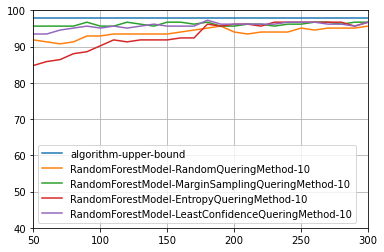

In [23]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod', 'MarginSamplingQueringMethod', 'EntropyQueringMethod', 'LeastConfidenceQueringMethod']

Ks = ['10']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 25 novih elemenata za obuku

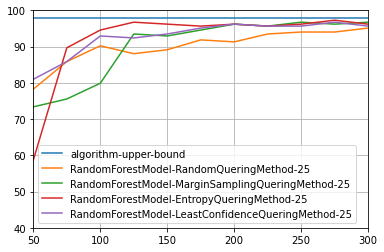

In [24]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod', 'MarginSamplingQueringMethod', 'EntropyQueringMethod', 'LeastConfidenceQueringMethod']
Ks = ['25']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

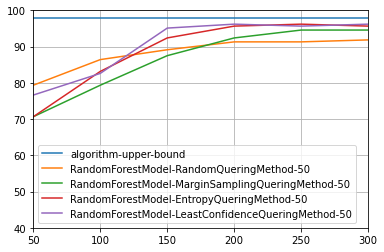

In [25]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod', 'MarginSamplingQueringMethod', 'EntropyQueringMethod', 'LeastConfidenceQueringMethod']
Ks = ['50']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

<h2>CatBoost experiments</h2>

In [26]:
max_queried = 300

repeats = 1


models = [CatBoostModel] 


quering_methods = [ RandomQueringMethod, MarginSamplingQueringMethod, EntropyQueringMethod, LeastConfidenceQueringMethod]  # LeastConfidenceQueringMethod


Ks = [10,25,50]

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = CatBoostModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [9 1] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6274184	total: 142ms	remaining: 14.1s
1:	learn: 0.5495466	total: 145ms	remaining: 7.09s
2:	learn: 0.4954152	total: 147ms	remaining: 4.77s
3:	learn: 0.4502835	total: 151ms	remaining: 3.62s
4:	learn: 0.3809062	total: 153ms	remaining: 2.9s
5:	learn: 0.3477718	total: 155ms	remaining: 2.42s
6:	learn: 0.3124166	total: 156ms	remaining: 2.08s
7:	learn: 0.2774229	total: 169ms	remaining: 1.94s
8:	learn: 0.2462614	total: 170ms	remaining: 1.72s
9:	learn: 0.2315955	total: 172ms	remaining: 1.55s
10:	learn: 0.2047906	total: 173ms	remaining: 1.4s
11:	learn: 0.1827413	total: 174ms	remaining: 1.28s
12:	learn: 0.1633496	total: 176ms	remaining: 1.17s
13:	learn: 0.1557727	total: 177ms	remaining: 1.09s
14:	learn: 0.1487782	tota

83:	learn: 0.0211811	total: 113ms	remaining: 21.5ms
84:	learn: 0.0208877	total: 115ms	remaining: 20.3ms
85:	learn: 0.0206906	total: 117ms	remaining: 19ms
86:	learn: 0.0204788	total: 119ms	remaining: 17.7ms
87:	learn: 0.0201839	total: 120ms	remaining: 16.4ms
88:	learn: 0.0199406	total: 121ms	remaining: 15ms
89:	learn: 0.0197629	total: 123ms	remaining: 13.7ms
90:	learn: 0.0195308	total: 125ms	remaining: 12.4ms
91:	learn: 0.0193044	total: 127ms	remaining: 11ms
92:	learn: 0.0190392	total: 129ms	remaining: 9.68ms
93:	learn: 0.0188245	total: 130ms	remaining: 8.3ms
94:	learn: 0.0185716	total: 131ms	remaining: 6.92ms
95:	learn: 0.0183246	total: 133ms	remaining: 5.54ms
96:	learn: 0.0180854	total: 134ms	remaining: 4.15ms
97:	learn: 0.0178553	total: 135ms	remaining: 2.76ms
98:	learn: 0.0176291	total: 137ms	remaining: 1.38ms
99:	learn: 0.0174078	total: 138ms	remaining: 0us
-----------------------------------
In iteration:  2

Accuracy for 85.869565 
updated train set: (30, 25) (30,) unique(labels)

48:	learn: 0.0233005	total: 79.3ms	remaining: 82.6ms
49:	learn: 0.0225578	total: 81.4ms	remaining: 81.4ms
50:	learn: 0.0220509	total: 82.9ms	remaining: 79.7ms
51:	learn: 0.0213089	total: 84.5ms	remaining: 78ms
52:	learn: 0.0209119	total: 86.1ms	remaining: 76.3ms
53:	learn: 0.0205091	total: 87.7ms	remaining: 74.7ms
54:	learn: 0.0201273	total: 89.8ms	remaining: 73.4ms
55:	learn: 0.0196791	total: 91.6ms	remaining: 72ms
56:	learn: 0.0192372	total: 93.5ms	remaining: 70.5ms
57:	learn: 0.0188868	total: 95.2ms	remaining: 68.9ms
58:	learn: 0.0186017	total: 96.5ms	remaining: 67ms
59:	learn: 0.0182412	total: 98.5ms	remaining: 65.6ms
60:	learn: 0.0180048	total: 100ms	remaining: 64ms
61:	learn: 0.0176536	total: 102ms	remaining: 62.4ms
62:	learn: 0.0173471	total: 104ms	remaining: 60.9ms
63:	learn: 0.0170288	total: 105ms	remaining: 59.1ms
64:	learn: 0.0167357	total: 107ms	remaining: 57.5ms
65:	learn: 0.0165000	total: 108ms	remaining: 55.7ms
66:	learn: 0.0162327	total: 110ms	remaining: 54ms
67:	learn:

56:	learn: 0.0175099	total: 99.8ms	remaining: 75.3ms
57:	learn: 0.0170777	total: 102ms	remaining: 73.7ms
58:	learn: 0.0166805	total: 104ms	remaining: 72ms
59:	learn: 0.0161831	total: 105ms	remaining: 70.1ms
60:	learn: 0.0157682	total: 107ms	remaining: 68.4ms
61:	learn: 0.0153140	total: 109ms	remaining: 66.5ms
62:	learn: 0.0149389	total: 110ms	remaining: 64.7ms
63:	learn: 0.0145833	total: 112ms	remaining: 62.9ms
64:	learn: 0.0142306	total: 114ms	remaining: 61.4ms
65:	learn: 0.0138920	total: 116ms	remaining: 59.9ms
66:	learn: 0.0136433	total: 118ms	remaining: 58.2ms
67:	learn: 0.0133791	total: 120ms	remaining: 56.7ms
68:	learn: 0.0130808	total: 122ms	remaining: 54.9ms
69:	learn: 0.0128438	total: 124ms	remaining: 53ms
70:	learn: 0.0126170	total: 125ms	remaining: 51.2ms
71:	learn: 0.0123438	total: 127ms	remaining: 49.3ms
72:	learn: 0.0121465	total: 128ms	remaining: 47.5ms
73:	learn: 0.0119399	total: 130ms	remaining: 45.8ms
74:	learn: 0.0116837	total: 132ms	remaining: 44ms
75:	learn: 0.0114

updated train set: (90, 25) (90,) unique(labels): [65 25] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5855026	total: 10ms	remaining: 991ms
1:	learn: 0.4915676	total: 11.9ms	remaining: 584ms
2:	learn: 0.4238310	total: 13.5ms	remaining: 436ms
3:	learn: 0.3608123	total: 14.9ms	remaining: 358ms
4:	learn: 0.3180921	total: 16.4ms	remaining: 311ms
5:	learn: 0.2907753	total: 17.7ms	remaining: 278ms
6:	learn: 0.2608446	total: 19.2ms	remaining: 255ms
7:	learn: 0.2377365	total: 20.6ms	remaining: 237ms
8:	learn: 0.2109165	total: 22.1ms	remaining: 223ms
9:	learn: 0.1914342	total: 23.9ms	remaining: 215ms
10:	learn: 0.1731058	total: 25.3ms	remaining: 205ms
11:	learn: 0.1548123	total: 26.9ms	remaining: 197ms
12:	learn: 0.1453026	total: 28.4ms	remaining: 190ms
13:	learn: 0.1348883	total: 29.8ms	remaining: 183ms
14:	learn: 0.1239879	total: 30.9ms	remaining: 175ms
15:	learn: 0.1114963	total: 32.3ms	remaining: 169ms
16:	learn: 0.1032463	to

60:	learn: 0.0136669	total: 109ms	remaining: 69.5ms
61:	learn: 0.0132939	total: 111ms	remaining: 67.8ms
62:	learn: 0.0130165	total: 112ms	remaining: 65.9ms
63:	learn: 0.0127036	total: 114ms	remaining: 64ms
64:	learn: 0.0124412	total: 116ms	remaining: 62.2ms
65:	learn: 0.0120571	total: 117ms	remaining: 60.2ms
66:	learn: 0.0118397	total: 118ms	remaining: 58.3ms
67:	learn: 0.0116075	total: 120ms	remaining: 56.5ms
68:	learn: 0.0113793	total: 121ms	remaining: 54.6ms
69:	learn: 0.0111452	total: 123ms	remaining: 52.6ms
70:	learn: 0.0109440	total: 124ms	remaining: 50.8ms
71:	learn: 0.0107257	total: 127ms	remaining: 49.2ms
72:	learn: 0.0105211	total: 128ms	remaining: 47.5ms
73:	learn: 0.0102822	total: 130ms	remaining: 45.7ms
74:	learn: 0.0100847	total: 132ms	remaining: 43.9ms
75:	learn: 0.0099440	total: 134ms	remaining: 42.2ms
76:	learn: 0.0097750	total: 135ms	remaining: 40.4ms
77:	learn: 0.0096307	total: 137ms	remaining: 38.6ms
78:	learn: 0.0094512	total: 139ms	remaining: 37ms
79:	learn: 0.009

updated train set: (130, 25) (130,) unique(labels): [93 37] [0 1]
Train set: (130, 25) y: (130,)
Val   set: (606, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5478644	total: 8.9ms	remaining: 881ms
1:	learn: 0.4420146	total: 10.8ms	remaining: 530ms
2:	learn: 0.3507176	total: 12.8ms	remaining: 413ms
3:	learn: 0.3027187	total: 15.2ms	remaining: 364ms
4:	learn: 0.2620513	total: 17.5ms	remaining: 333ms
5:	learn: 0.2263097	total: 19.1ms	remaining: 300ms
6:	learn: 0.1974576	total: 21ms	remaining: 279ms
7:	learn: 0.1763299	total: 23ms	remaining: 264ms
8:	learn: 0.1635948	total: 24.6ms	remaining: 249ms
9:	learn: 0.1444566	total: 26.2ms	remaining: 236ms
10:	learn: 0.1315593	total: 27.9ms	remaining: 226ms
11:	learn: 0.1229044	total: 29.9ms	remaining: 219ms
12:	learn: 0.1128389	total: 31.7ms	remaining: 212ms
13:	learn: 0.1021864	total: 33.3ms	remaining: 205ms
14:	learn: 0.0928530	total: 35ms	remaining: 199ms
15:	learn: 0.0856275	total: 36.9ms	remaining: 194ms
16:	learn: 0.0809791	tot

1:	learn: 0.4703120	total: 19.9ms	remaining: 974ms
2:	learn: 0.4069956	total: 22.2ms	remaining: 718ms
3:	learn: 0.3519750	total: 24ms	remaining: 576ms
4:	learn: 0.3184997	total: 26.1ms	remaining: 496ms
5:	learn: 0.2899386	total: 28.5ms	remaining: 447ms
6:	learn: 0.2493905	total: 30.5ms	remaining: 406ms
7:	learn: 0.2322419	total: 32.5ms	remaining: 374ms
8:	learn: 0.2099889	total: 34.4ms	remaining: 347ms
9:	learn: 0.1882346	total: 36ms	remaining: 324ms
10:	learn: 0.1708663	total: 38ms	remaining: 307ms
11:	learn: 0.1584530	total: 40.1ms	remaining: 294ms
12:	learn: 0.1461338	total: 41.8ms	remaining: 279ms
13:	learn: 0.1351925	total: 43.4ms	remaining: 267ms
14:	learn: 0.1207612	total: 45.1ms	remaining: 256ms
15:	learn: 0.1103723	total: 46.6ms	remaining: 245ms
16:	learn: 0.0982837	total: 48.3ms	remaining: 236ms
17:	learn: 0.0895476	total: 49.7ms	remaining: 226ms
18:	learn: 0.0824141	total: 51.6ms	remaining: 220ms
19:	learn: 0.0772309	total: 53.1ms	remaining: 212ms
20:	learn: 0.0724110	total:

59:	learn: 0.0158347	total: 116ms	remaining: 77.5ms
60:	learn: 0.0153694	total: 118ms	remaining: 75.7ms
61:	learn: 0.0148436	total: 121ms	remaining: 74.1ms
62:	learn: 0.0144468	total: 123ms	remaining: 72.2ms
63:	learn: 0.0140094	total: 125ms	remaining: 70.3ms
64:	learn: 0.0136416	total: 128ms	remaining: 68.7ms
65:	learn: 0.0133692	total: 130ms	remaining: 66.8ms
66:	learn: 0.0130284	total: 132ms	remaining: 65ms
67:	learn: 0.0127321	total: 134ms	remaining: 63.2ms
68:	learn: 0.0124832	total: 137ms	remaining: 61.4ms
69:	learn: 0.0121595	total: 139ms	remaining: 59.6ms
70:	learn: 0.0118666	total: 142ms	remaining: 58ms
71:	learn: 0.0115659	total: 144ms	remaining: 56.1ms
72:	learn: 0.0113130	total: 147ms	remaining: 54.4ms
73:	learn: 0.0110842	total: 150ms	remaining: 52.6ms
74:	learn: 0.0108415	total: 152ms	remaining: 50.7ms
75:	learn: 0.0106332	total: 154ms	remaining: 48.6ms
76:	learn: 0.0104178	total: 157ms	remaining: 46.8ms
77:	learn: 0.0102123	total: 159ms	remaining: 45ms
78:	learn: 0.01001

25:	learn: 0.0631769	total: 60.2ms	remaining: 171ms
26:	learn: 0.0592415	total: 62.8ms	remaining: 170ms
27:	learn: 0.0573751	total: 64.6ms	remaining: 166ms
28:	learn: 0.0551760	total: 66.4ms	remaining: 163ms
29:	learn: 0.0538252	total: 68.1ms	remaining: 159ms
30:	learn: 0.0511499	total: 69.9ms	remaining: 156ms
31:	learn: 0.0490381	total: 72ms	remaining: 153ms
32:	learn: 0.0473174	total: 73.9ms	remaining: 150ms
33:	learn: 0.0454658	total: 75.8ms	remaining: 147ms
34:	learn: 0.0442105	total: 77.4ms	remaining: 144ms
35:	learn: 0.0426829	total: 79.1ms	remaining: 141ms
36:	learn: 0.0411446	total: 80.9ms	remaining: 138ms
37:	learn: 0.0393496	total: 82.6ms	remaining: 135ms
38:	learn: 0.0387062	total: 84.3ms	remaining: 132ms
39:	learn: 0.0366995	total: 86.3ms	remaining: 129ms
40:	learn: 0.0352393	total: 88.1ms	remaining: 127ms
41:	learn: 0.0338838	total: 89.8ms	remaining: 124ms
42:	learn: 0.0332157	total: 91.9ms	remaining: 122ms
43:	learn: 0.0316078	total: 93.7ms	remaining: 119ms
44:	learn: 0.0

83:	learn: 0.0123381	total: 192ms	remaining: 36.5ms
84:	learn: 0.0120543	total: 194ms	remaining: 34.2ms
85:	learn: 0.0118090	total: 196ms	remaining: 31.9ms
86:	learn: 0.0115772	total: 198ms	remaining: 29.6ms
87:	learn: 0.0113272	total: 200ms	remaining: 27.2ms
88:	learn: 0.0111102	total: 202ms	remaining: 25ms
89:	learn: 0.0108792	total: 205ms	remaining: 22.7ms
90:	learn: 0.0108000	total: 207ms	remaining: 20.4ms
91:	learn: 0.0106065	total: 209ms	remaining: 18.1ms
92:	learn: 0.0104939	total: 210ms	remaining: 15.8ms
93:	learn: 0.0104211	total: 212ms	remaining: 13.5ms
94:	learn: 0.0102242	total: 214ms	remaining: 11.3ms
95:	learn: 0.0100353	total: 216ms	remaining: 9ms
96:	learn: 0.0099961	total: 218ms	remaining: 6.74ms
97:	learn: 0.0098486	total: 220ms	remaining: 4.48ms
98:	learn: 0.0096847	total: 222ms	remaining: 2.24ms
99:	learn: 0.0095284	total: 223ms	remaining: 0us
-----------------------------------
In iteration:  19

Accuracy for 94.565217 
updated train set: (200, 25) (200,) unique(la

73:	learn: 0.0134241	total: 149ms	remaining: 52.3ms
74:	learn: 0.0131579	total: 152ms	remaining: 50.5ms
75:	learn: 0.0129024	total: 154ms	remaining: 48.5ms
76:	learn: 0.0125852	total: 156ms	remaining: 46.6ms
77:	learn: 0.0123456	total: 159ms	remaining: 44.7ms
78:	learn: 0.0120172	total: 161ms	remaining: 42.8ms
79:	learn: 0.0118179	total: 164ms	remaining: 40.9ms
80:	learn: 0.0115554	total: 167ms	remaining: 39.1ms
81:	learn: 0.0113127	total: 169ms	remaining: 37.1ms
82:	learn: 0.0111387	total: 171ms	remaining: 35ms
83:	learn: 0.0108847	total: 173ms	remaining: 33ms
84:	learn: 0.0107344	total: 176ms	remaining: 31ms
85:	learn: 0.0105191	total: 178ms	remaining: 28.9ms
86:	learn: 0.0103724	total: 180ms	remaining: 26.9ms
87:	learn: 0.0100925	total: 183ms	remaining: 25ms
88:	learn: 0.0099682	total: 186ms	remaining: 23ms
89:	learn: 0.0098335	total: 189ms	remaining: 21ms
90:	learn: 0.0097158	total: 191ms	remaining: 18.9ms
91:	learn: 0.0095944	total: 193ms	remaining: 16.8ms
92:	learn: 0.0094817	tot

59:	learn: 0.0210302	total: 140ms	remaining: 93.4ms
60:	learn: 0.0205772	total: 142ms	remaining: 91.1ms
61:	learn: 0.0202598	total: 145ms	remaining: 88.9ms
62:	learn: 0.0198559	total: 147ms	remaining: 86.3ms
63:	learn: 0.0192053	total: 149ms	remaining: 83.6ms
64:	learn: 0.0187869	total: 151ms	remaining: 81.2ms
65:	learn: 0.0183914	total: 153ms	remaining: 78.7ms
66:	learn: 0.0180579	total: 155ms	remaining: 76.2ms
67:	learn: 0.0177492	total: 156ms	remaining: 73.6ms
68:	learn: 0.0172173	total: 158ms	remaining: 71.1ms
69:	learn: 0.0167832	total: 160ms	remaining: 68.6ms
70:	learn: 0.0164705	total: 162ms	remaining: 66.2ms
71:	learn: 0.0159510	total: 164ms	remaining: 63.9ms
72:	learn: 0.0158415	total: 166ms	remaining: 61.4ms
73:	learn: 0.0154387	total: 168ms	remaining: 59ms
74:	learn: 0.0151619	total: 170ms	remaining: 56.5ms
75:	learn: 0.0147118	total: 171ms	remaining: 54.1ms
76:	learn: 0.0144470	total: 173ms	remaining: 51.8ms
77:	learn: 0.0141739	total: 175ms	remaining: 49.4ms
78:	learn: 0.0

30:	learn: 0.0504244	total: 65.8ms	remaining: 147ms
31:	learn: 0.0481467	total: 67.8ms	remaining: 144ms
32:	learn: 0.0454797	total: 69.6ms	remaining: 141ms
33:	learn: 0.0437548	total: 71.2ms	remaining: 138ms
34:	learn: 0.0425441	total: 73.6ms	remaining: 137ms
35:	learn: 0.0407114	total: 76.1ms	remaining: 135ms
36:	learn: 0.0400762	total: 78.1ms	remaining: 133ms
37:	learn: 0.0386678	total: 80.2ms	remaining: 131ms
38:	learn: 0.0380521	total: 82.1ms	remaining: 128ms
39:	learn: 0.0363704	total: 83.9ms	remaining: 126ms
40:	learn: 0.0350193	total: 86ms	remaining: 124ms
41:	learn: 0.0342469	total: 88.1ms	remaining: 122ms
42:	learn: 0.0329314	total: 90.7ms	remaining: 120ms
43:	learn: 0.0317771	total: 92.8ms	remaining: 118ms
44:	learn: 0.0310572	total: 95ms	remaining: 116ms
45:	learn: 0.0299900	total: 97.1ms	remaining: 114ms
46:	learn: 0.0291013	total: 99.5ms	remaining: 112ms
47:	learn: 0.0285638	total: 102ms	remaining: 110ms
48:	learn: 0.0275734	total: 104ms	remaining: 108ms
49:	learn: 0.02691

1:	learn: 0.4463599	total: 18ms	remaining: 884ms
2:	learn: 0.3924523	total: 21.1ms	remaining: 682ms
3:	learn: 0.3398069	total: 23.2ms	remaining: 557ms
4:	learn: 0.2949129	total: 25.2ms	remaining: 479ms
5:	learn: 0.2722086	total: 27.5ms	remaining: 431ms
6:	learn: 0.2397591	total: 30.1ms	remaining: 400ms
7:	learn: 0.2146297	total: 32.4ms	remaining: 372ms
8:	learn: 0.1929764	total: 34.6ms	remaining: 350ms
9:	learn: 0.1733818	total: 36.7ms	remaining: 330ms
10:	learn: 0.1580274	total: 38.9ms	remaining: 314ms
11:	learn: 0.1495395	total: 40.9ms	remaining: 300ms
12:	learn: 0.1351096	total: 42.9ms	remaining: 287ms
13:	learn: 0.1245908	total: 45.3ms	remaining: 278ms
14:	learn: 0.1154570	total: 47.3ms	remaining: 268ms
15:	learn: 0.1071914	total: 49.4ms	remaining: 260ms
16:	learn: 0.1021465	total: 51.4ms	remaining: 251ms
17:	learn: 0.0944594	total: 53.7ms	remaining: 244ms
18:	learn: 0.0890637	total: 55.7ms	remaining: 237ms
19:	learn: 0.0850141	total: 57.7ms	remaining: 231ms
20:	learn: 0.0802774	to

97:	learn: 0.0087556	total: 234ms	remaining: 4.77ms
98:	learn: 0.0086319	total: 236ms	remaining: 2.38ms
99:	learn: 0.0085086	total: 238ms	remaining: 0us
-----------------------------------
In iteration:  28

Accuracy for 95.652174 
updated train set: (290, 25) (290,) unique(labels): [194  96] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5525890	total: 34.9ms	remaining: 3.46s
1:	learn: 0.4334186	total: 38.2ms	remaining: 1.87s
2:	learn: 0.3766445	total: 41.8ms	remaining: 1.35s
3:	learn: 0.3245761	total: 44.9ms	remaining: 1.08s
4:	learn: 0.2773237	total: 47.1ms	remaining: 895ms
5:	learn: 0.2563472	total: 49.4ms	remaining: 773ms
6:	learn: 0.2278864	total: 51.5ms	remaining: 684ms
7:	learn: 0.2039155	total: 53.5ms	remaining: 615ms
8:	learn: 0.1830791	total: 55.4ms	remaining: 560ms
9:	learn: 0.1646845	total: 57.7ms	remaining: 519ms
10:	learn: 0.1482344	total: 59.7ms	remaining: 483ms
11:	learn: 0.1379496	total: 61.8ms	remainin

55:	learn: 0.0246553	total: 178ms	remaining: 140ms
56:	learn: 0.0234154	total: 181ms	remaining: 137ms
57:	learn: 0.0227605	total: 184ms	remaining: 133ms
58:	learn: 0.0222642	total: 188ms	remaining: 130ms
59:	learn: 0.0215864	total: 191ms	remaining: 127ms
60:	learn: 0.0211138	total: 194ms	remaining: 124ms
61:	learn: 0.0208201	total: 197ms	remaining: 121ms
62:	learn: 0.0202596	total: 200ms	remaining: 118ms
63:	learn: 0.0197304	total: 203ms	remaining: 114ms
64:	learn: 0.0192186	total: 206ms	remaining: 111ms
65:	learn: 0.0187073	total: 209ms	remaining: 108ms
66:	learn: 0.0181761	total: 212ms	remaining: 104ms
67:	learn: 0.0176452	total: 214ms	remaining: 101ms
68:	learn: 0.0171077	total: 216ms	remaining: 97.1ms
69:	learn: 0.0166814	total: 218ms	remaining: 93.5ms
70:	learn: 0.0164497	total: 220ms	remaining: 89.9ms
71:	learn: 0.0160323	total: 223ms	remaining: 86.6ms
72:	learn: 0.0155110	total: 225ms	remaining: 83.2ms
73:	learn: 0.0150596	total: 227ms	remaining: 79.9ms
74:	learn: 0.0146265	tota

35:	learn: 0.1439768	total: 60.7ms	remaining: 108ms
36:	learn: 0.1378359	total: 62.6ms	remaining: 107ms
37:	learn: 0.1347619	total: 63.8ms	remaining: 104ms
38:	learn: 0.1317028	total: 65.8ms	remaining: 103ms
39:	learn: 0.1293658	total: 67.7ms	remaining: 102ms
40:	learn: 0.1265201	total: 69.5ms	remaining: 100ms
41:	learn: 0.1179773	total: 71.3ms	remaining: 98.4ms
42:	learn: 0.1138774	total: 73.1ms	remaining: 96.9ms
43:	learn: 0.1097236	total: 75.5ms	remaining: 96.1ms
44:	learn: 0.1062949	total: 77ms	remaining: 94.1ms
45:	learn: 0.1008858	total: 78.7ms	remaining: 92.4ms
46:	learn: 0.0982287	total: 80.7ms	remaining: 91.1ms
47:	learn: 0.0945818	total: 82.6ms	remaining: 89.5ms
48:	learn: 0.0923073	total: 84.5ms	remaining: 87.9ms
49:	learn: 0.0910583	total: 86.3ms	remaining: 86.3ms
50:	learn: 0.0887390	total: 88.2ms	remaining: 84.8ms
51:	learn: 0.0850330	total: 90.1ms	remaining: 83.2ms
52:	learn: 0.0825664	total: 92.5ms	remaining: 82ms
53:	learn: 0.0799146	total: 94.2ms	remaining: 80.3ms
54:

36:	learn: 0.1341463	total: 87.6ms	remaining: 149ms
37:	learn: 0.1317338	total: 89.7ms	remaining: 146ms
38:	learn: 0.1287469	total: 92ms	remaining: 144ms
39:	learn: 0.1255384	total: 94.3ms	remaining: 141ms
40:	learn: 0.1217197	total: 96.1ms	remaining: 138ms
41:	learn: 0.1195680	total: 98.1ms	remaining: 135ms
42:	learn: 0.1176320	total: 100ms	remaining: 133ms
43:	learn: 0.1146547	total: 102ms	remaining: 130ms
44:	learn: 0.1137484	total: 103ms	remaining: 126ms
45:	learn: 0.1124986	total: 106ms	remaining: 124ms
46:	learn: 0.1086654	total: 108ms	remaining: 122ms
47:	learn: 0.1082011	total: 110ms	remaining: 119ms
48:	learn: 0.1071008	total: 112ms	remaining: 117ms
49:	learn: 0.1056786	total: 114ms	remaining: 114ms
50:	learn: 0.1029409	total: 116ms	remaining: 111ms
51:	learn: 0.1015455	total: 118ms	remaining: 109ms
52:	learn: 0.0977358	total: 120ms	remaining: 106ms
53:	learn: 0.0961920	total: 122ms	remaining: 104ms
54:	learn: 0.0941467	total: 124ms	remaining: 102ms
55:	learn: 0.0920996	total:

1:	learn: 0.5449612	total: 16.6ms	remaining: 814ms
2:	learn: 0.4818503	total: 19.6ms	remaining: 634ms
3:	learn: 0.4286234	total: 22.1ms	remaining: 530ms
4:	learn: 0.3920863	total: 24.6ms	remaining: 468ms
5:	learn: 0.3680154	total: 27.1ms	remaining: 425ms
6:	learn: 0.3430625	total: 29.8ms	remaining: 396ms
7:	learn: 0.3199293	total: 32.3ms	remaining: 372ms
8:	learn: 0.3024445	total: 35.4ms	remaining: 358ms
9:	learn: 0.2856194	total: 38.4ms	remaining: 346ms
10:	learn: 0.2714274	total: 41.6ms	remaining: 337ms
11:	learn: 0.2540894	total: 44ms	remaining: 322ms
12:	learn: 0.2466255	total: 46.5ms	remaining: 311ms
13:	learn: 0.2373856	total: 48.7ms	remaining: 299ms
14:	learn: 0.2227795	total: 50.9ms	remaining: 289ms
15:	learn: 0.2146845	total: 53.2ms	remaining: 279ms
16:	learn: 0.2105172	total: 56.2ms	remaining: 274ms
17:	learn: 0.2022941	total: 58.8ms	remaining: 268ms
18:	learn: 0.1972630	total: 61.3ms	remaining: 261ms
19:	learn: 0.1932772	total: 63.9ms	remaining: 255ms
20:	learn: 0.1852841	to

98:	learn: 0.0332623	total: 352ms	remaining: 3.55ms
99:	learn: 0.0327907	total: 355ms	remaining: 0us
-----------------------------------
In iteration:  7

Accuracy for 95.652174 
updated train set: (200, 25) (200,) unique(labels): [152  48] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6067030	total: 10.9ms	remaining: 1.08s
1:	learn: 0.5389165	total: 13.7ms	remaining: 670ms
2:	learn: 0.4902564	total: 16.6ms	remaining: 536ms
3:	learn: 0.4445530	total: 19.2ms	remaining: 460ms
4:	learn: 0.4047558	total: 22.2ms	remaining: 422ms
5:	learn: 0.3721856	total: 25ms	remaining: 392ms
6:	learn: 0.3462876	total: 27.5ms	remaining: 365ms
7:	learn: 0.3164087	total: 30.2ms	remaining: 347ms
8:	learn: 0.2923682	total: 32.9ms	remaining: 332ms
9:	learn: 0.2727411	total: 35.8ms	remaining: 322ms
10:	learn: 0.2545031	total: 38.6ms	remaining: 313ms
11:	learn: 0.2415672	total: 41.3ms	remaining: 303ms
12:	learn: 0.2303231	total: 44.4ms	remaining: 

86:	learn: 0.0474503	total: 253ms	remaining: 37.8ms
87:	learn: 0.0464460	total: 257ms	remaining: 35ms
88:	learn: 0.0453713	total: 260ms	remaining: 32.2ms
89:	learn: 0.0448390	total: 264ms	remaining: 29.3ms
90:	learn: 0.0437347	total: 267ms	remaining: 26.4ms
91:	learn: 0.0430927	total: 270ms	remaining: 23.5ms
92:	learn: 0.0424060	total: 274ms	remaining: 20.6ms
93:	learn: 0.0419197	total: 277ms	remaining: 17.7ms
94:	learn: 0.0406172	total: 280ms	remaining: 14.7ms
95:	learn: 0.0397996	total: 283ms	remaining: 11.8ms
96:	learn: 0.0393500	total: 286ms	remaining: 8.83ms
97:	learn: 0.0387699	total: 289ms	remaining: 5.89ms
98:	learn: 0.0384388	total: 292ms	remaining: 2.94ms
99:	learn: 0.0381326	total: 295ms	remaining: 0us
-----------------------------------
In iteration:  9

Accuracy for 95.108696 
updated train set: (250, 25) (250,) unique(labels): [188  62] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5956913	total: 3.3ms	rem

75:	learn: 0.0648641	total: 219ms	remaining: 69ms
76:	learn: 0.0642814	total: 222ms	remaining: 66.2ms
77:	learn: 0.0637593	total: 225ms	remaining: 63.4ms
78:	learn: 0.0628614	total: 228ms	remaining: 60.6ms
79:	learn: 0.0609144	total: 231ms	remaining: 57.9ms
80:	learn: 0.0602126	total: 235ms	remaining: 55ms
81:	learn: 0.0583679	total: 238ms	remaining: 52.2ms
82:	learn: 0.0575413	total: 241ms	remaining: 49.3ms
83:	learn: 0.0560388	total: 244ms	remaining: 46.4ms
84:	learn: 0.0551255	total: 247ms	remaining: 43.6ms
85:	learn: 0.0533197	total: 250ms	remaining: 40.7ms
86:	learn: 0.0530018	total: 253ms	remaining: 37.8ms
87:	learn: 0.0518130	total: 257ms	remaining: 35ms
88:	learn: 0.0505098	total: 259ms	remaining: 32.1ms
89:	learn: 0.0501123	total: 263ms	remaining: 29.2ms
90:	learn: 0.0491579	total: 266ms	remaining: 26.3ms
91:	learn: 0.0486721	total: 269ms	remaining: 23.4ms
92:	learn: 0.0478193	total: 273ms	remaining: 20.5ms
93:	learn: 0.0468152	total: 276ms	remaining: 17.6ms
94:	learn: 0.04647

41:	learn: 0.1107859	total: 143ms	remaining: 197ms
42:	learn: 0.1093895	total: 146ms	remaining: 194ms
43:	learn: 0.1079996	total: 150ms	remaining: 191ms
44:	learn: 0.1039424	total: 154ms	remaining: 188ms
45:	learn: 0.0997539	total: 158ms	remaining: 185ms
46:	learn: 0.0956583	total: 161ms	remaining: 181ms
47:	learn: 0.0914329	total: 165ms	remaining: 178ms
48:	learn: 0.0887942	total: 168ms	remaining: 175ms
49:	learn: 0.0863459	total: 171ms	remaining: 171ms
50:	learn: 0.0835290	total: 174ms	remaining: 167ms
51:	learn: 0.0825245	total: 176ms	remaining: 163ms
52:	learn: 0.0786407	total: 179ms	remaining: 159ms
53:	learn: 0.0761600	total: 184ms	remaining: 157ms
54:	learn: 0.0734165	total: 187ms	remaining: 153ms
55:	learn: 0.0715796	total: 191ms	remaining: 150ms
56:	learn: 0.0707778	total: 194ms	remaining: 147ms
57:	learn: 0.0677985	total: 197ms	remaining: 143ms
58:	learn: 0.0639129	total: 201ms	remaining: 139ms
59:	learn: 0.0615385	total: 204ms	remaining: 136ms
60:	learn: 0.0607661	total: 207

20:	learn: 0.2513520	total: 80.3ms	remaining: 302ms
21:	learn: 0.2445708	total: 85.2ms	remaining: 302ms
22:	learn: 0.2365661	total: 88.5ms	remaining: 296ms
23:	learn: 0.2316659	total: 91.4ms	remaining: 289ms
24:	learn: 0.2263718	total: 94.1ms	remaining: 282ms
25:	learn: 0.2258931	total: 96.1ms	remaining: 273ms
26:	learn: 0.2209419	total: 98.8ms	remaining: 267ms
27:	learn: 0.2165742	total: 102ms	remaining: 262ms
28:	learn: 0.2123154	total: 105ms	remaining: 256ms
29:	learn: 0.2080349	total: 109ms	remaining: 254ms
30:	learn: 0.2010148	total: 112ms	remaining: 249ms
31:	learn: 0.1997776	total: 114ms	remaining: 242ms
32:	learn: 0.1940645	total: 118ms	remaining: 239ms
33:	learn: 0.1871221	total: 121ms	remaining: 236ms
34:	learn: 0.1849536	total: 125ms	remaining: 232ms
35:	learn: 0.1814839	total: 129ms	remaining: 229ms
36:	learn: 0.1765726	total: 134ms	remaining: 227ms
37:	learn: 0.1736950	total: 140ms	remaining: 228ms
38:	learn: 0.1712303	total: 143ms	remaining: 224ms
39:	learn: 0.1675616	tot

94:	learn: 0.0654883	total: 408ms	remaining: 21.5ms
95:	learn: 0.0638224	total: 411ms	remaining: 17.1ms
96:	learn: 0.0621278	total: 414ms	remaining: 12.8ms
97:	learn: 0.0609555	total: 417ms	remaining: 8.51ms
98:	learn: 0.0598969	total: 420ms	remaining: 4.24ms
99:	learn: 0.0585092	total: 423ms	remaining: 0us
-----------------------------------
In iteration:  4

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [184  66] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6104194	total: 3.24ms	remaining: 320ms
1:	learn: 0.5346267	total: 6.17ms	remaining: 302ms
2:	learn: 0.4728162	total: 9.26ms	remaining: 300ms
3:	learn: 0.4300010	total: 12.1ms	remaining: 291ms
4:	learn: 0.4015206	total: 14.8ms	remaining: 282ms
5:	learn: 0.3690558	total: 17.3ms	remaining: 271ms
6:	learn: 0.3410781	total: 20.6ms	remaining: 274ms
7:	learn: 0.3285923	total: 23.6ms	remaining: 272ms
8:	learn: 0.3083873	total: 26.4ms	remainin

85:	learn: 0.0806747	total: 248ms	remaining: 40.4ms
86:	learn: 0.0794216	total: 252ms	remaining: 37.6ms
87:	learn: 0.0777887	total: 255ms	remaining: 34.8ms
88:	learn: 0.0763909	total: 258ms	remaining: 31.9ms
89:	learn: 0.0745800	total: 261ms	remaining: 29ms
90:	learn: 0.0743068	total: 264ms	remaining: 26.1ms
91:	learn: 0.0728559	total: 268ms	remaining: 23.3ms
92:	learn: 0.0708418	total: 271ms	remaining: 20.4ms
93:	learn: 0.0703944	total: 274ms	remaining: 17.5ms
94:	learn: 0.0701143	total: 276ms	remaining: 14.6ms
95:	learn: 0.0685969	total: 279ms	remaining: 11.6ms
96:	learn: 0.0682603	total: 282ms	remaining: 8.72ms
97:	learn: 0.0670598	total: 285ms	remaining: 5.81ms
98:	learn: 0.0648148	total: 287ms	remaining: 2.9ms
99:	learn: 0.0644343	total: 290ms	remaining: 0us
-----------------------------------
In iteration:  6

Accuracy for 92.934783 
final active learning accuracies [65.21739130434783, 84.78260869565217, 87.5, 92.3913043478261, 91.84782608695652, 92.93478260869566]
saved Active-l

-----------------------------------
In iteration:  2

Accuracy for 28.804348 
updated train set: (30, 25) (30,) unique(labels): [24  6] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6281568	total: 1.82ms	remaining: 180ms
1:	learn: 0.5700586	total: 3.37ms	remaining: 165ms
2:	learn: 0.4851994	total: 5.08ms	remaining: 164ms
3:	learn: 0.4461102	total: 7.2ms	remaining: 173ms
4:	learn: 0.4045896	total: 9.11ms	remaining: 173ms
5:	learn: 0.3799187	total: 11ms	remaining: 172ms
6:	learn: 0.3481030	total: 12.8ms	remaining: 169ms
7:	learn: 0.3156741	total: 14.6ms	remaining: 168ms
8:	learn: 0.2818492	total: 16.4ms	remaining: 166ms
9:	learn: 0.2565148	total: 18.6ms	remaining: 167ms
10:	learn: 0.2300649	total: 20.5ms	remaining: 166ms
11:	learn: 0.2009533	total: 22.6ms	remaining: 166ms
12:	learn: 0.1845447	total: 24.7ms	remaining: 165ms
13:	learn: 0.1700088	total: 26.6ms	remaining: 163ms
14:	learn: 0.1578885	total: 28.3ms	remaining: 160m

updated train set: (50, 25) (50,) unique(labels): [44  6] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6066516	total: 1.97ms	remaining: 195ms
1:	learn: 0.5238618	total: 4.85ms	remaining: 238ms
2:	learn: 0.4541072	total: 6.93ms	remaining: 224ms
3:	learn: 0.4030238	total: 8.83ms	remaining: 212ms
4:	learn: 0.3657094	total: 10.2ms	remaining: 193ms
5:	learn: 0.3364936	total: 12.5ms	remaining: 197ms
6:	learn: 0.3072377	total: 14.4ms	remaining: 192ms
7:	learn: 0.2852968	total: 16.5ms	remaining: 189ms
8:	learn: 0.2705894	total: 18.6ms	remaining: 189ms
9:	learn: 0.2457501	total: 20.6ms	remaining: 185ms
10:	learn: 0.2266387	total: 22.4ms	remaining: 181ms
11:	learn: 0.2181118	total: 24.2ms	remaining: 178ms
12:	learn: 0.2112574	total: 26.1ms	remaining: 174ms
13:	learn: 0.1937878	total: 28ms	remaining: 172ms
14:	learn: 0.1836489	total: 30.2ms	remaining: 171ms
15:	learn: 0.1769454	total: 32.2ms	remaining: 169ms
16:	learn: 0.1654613	to

64:	learn: 0.0262318	total: 172ms	remaining: 92.4ms
65:	learn: 0.0258711	total: 175ms	remaining: 90ms
66:	learn: 0.0250024	total: 177ms	remaining: 87.3ms
67:	learn: 0.0243426	total: 180ms	remaining: 84.6ms
68:	learn: 0.0237083	total: 182ms	remaining: 81.9ms
69:	learn: 0.0229944	total: 185ms	remaining: 79.5ms
70:	learn: 0.0226887	total: 188ms	remaining: 76.8ms
71:	learn: 0.0220581	total: 191ms	remaining: 74.3ms
72:	learn: 0.0217931	total: 194ms	remaining: 71.7ms
73:	learn: 0.0212117	total: 196ms	remaining: 69ms
74:	learn: 0.0206468	total: 199ms	remaining: 66.3ms
75:	learn: 0.0201220	total: 202ms	remaining: 63.8ms
76:	learn: 0.0196246	total: 205ms	remaining: 61.1ms
77:	learn: 0.0191815	total: 207ms	remaining: 58.4ms
78:	learn: 0.0187358	total: 210ms	remaining: 55.7ms
79:	learn: 0.0183173	total: 212ms	remaining: 53ms
80:	learn: 0.0179256	total: 215ms	remaining: 50.4ms
81:	learn: 0.0175577	total: 218ms	remaining: 47.8ms
82:	learn: 0.0172031	total: 220ms	remaining: 45.1ms
83:	learn: 0.01686

79:	learn: 0.0254876	total: 198ms	remaining: 49.4ms
80:	learn: 0.0251445	total: 201ms	remaining: 47.2ms
81:	learn: 0.0244996	total: 204ms	remaining: 44.7ms
82:	learn: 0.0238947	total: 207ms	remaining: 42.4ms
83:	learn: 0.0235905	total: 210ms	remaining: 40ms
84:	learn: 0.0232967	total: 213ms	remaining: 37.6ms
85:	learn: 0.0230134	total: 215ms	remaining: 35ms
86:	learn: 0.0224677	total: 218ms	remaining: 32.5ms
87:	learn: 0.0219527	total: 220ms	remaining: 30ms
88:	learn: 0.0214653	total: 223ms	remaining: 27.5ms
89:	learn: 0.0210245	total: 226ms	remaining: 25.2ms
90:	learn: 0.0206206	total: 229ms	remaining: 22.6ms
91:	learn: 0.0203861	total: 231ms	remaining: 20ms
92:	learn: 0.0199633	total: 233ms	remaining: 17.5ms
93:	learn: 0.0195581	total: 235ms	remaining: 15ms
94:	learn: 0.0192090	total: 237ms	remaining: 12.4ms
95:	learn: 0.0188354	total: 238ms	remaining: 9.93ms
96:	learn: 0.0185138	total: 240ms	remaining: 7.42ms
97:	learn: 0.0181658	total: 242ms	remaining: 4.94ms
98:	learn: 0.0178586	t

94:	learn: 0.0201287	total: 264ms	remaining: 13.9ms
95:	learn: 0.0196914	total: 267ms	remaining: 11.1ms
96:	learn: 0.0193850	total: 269ms	remaining: 8.32ms
97:	learn: 0.0189901	total: 272ms	remaining: 5.55ms
98:	learn: 0.0186787	total: 274ms	remaining: 2.77ms
99:	learn: 0.0183679	total: 277ms	remaining: 0us
-----------------------------------
In iteration:  10

Accuracy for 94.565217 
updated train set: (110, 25) (110,) unique(labels): [71 39] [0 1]
Train set: (110, 25) y: (110,)
Val   set: (626, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6118512	total: 15.5ms	remaining: 1.54s
1:	learn: 0.5436984	total: 19.7ms	remaining: 964ms
2:	learn: 0.4856787	total: 26.8ms	remaining: 867ms
3:	learn: 0.4511251	total: 31.7ms	remaining: 760ms
4:	learn: 0.4121943	total: 35.6ms	remaining: 676ms
5:	learn: 0.3683627	total: 42.1ms	remaining: 660ms
6:	learn: 0.3423609	total: 46ms	remaining: 611ms
7:	learn: 0.3171460	total: 50.5ms	remaining: 580ms
8:	learn: 0.3026730	total: 54.1ms	remaining: 

69:	learn: 0.0468079	total: 140ms	remaining: 59.9ms
70:	learn: 0.0456687	total: 142ms	remaining: 57.9ms
71:	learn: 0.0447507	total: 143ms	remaining: 55.8ms
72:	learn: 0.0440080	total: 146ms	remaining: 53.9ms
73:	learn: 0.0431707	total: 148ms	remaining: 51.8ms
74:	learn: 0.0427452	total: 150ms	remaining: 49.9ms
75:	learn: 0.0419435	total: 152ms	remaining: 48ms
76:	learn: 0.0415028	total: 154ms	remaining: 46ms
77:	learn: 0.0403581	total: 156ms	remaining: 44ms
78:	learn: 0.0393899	total: 158ms	remaining: 42ms
79:	learn: 0.0385143	total: 160ms	remaining: 40ms
80:	learn: 0.0375768	total: 162ms	remaining: 38ms
81:	learn: 0.0365754	total: 164ms	remaining: 36ms
82:	learn: 0.0359169	total: 166ms	remaining: 34ms
83:	learn: 0.0356013	total: 168ms	remaining: 32ms
84:	learn: 0.0345387	total: 170ms	remaining: 29.9ms
85:	learn: 0.0343759	total: 171ms	remaining: 27.9ms
86:	learn: 0.0336649	total: 173ms	remaining: 25.9ms
87:	learn: 0.0330133	total: 175ms	remaining: 23.8ms
88:	learn: 0.0322593	total: 17

33:	learn: 0.1563168	total: 111ms	remaining: 215ms
34:	learn: 0.1534884	total: 113ms	remaining: 210ms
35:	learn: 0.1486892	total: 116ms	remaining: 206ms
36:	learn: 0.1440580	total: 118ms	remaining: 201ms
37:	learn: 0.1403210	total: 120ms	remaining: 195ms
38:	learn: 0.1374315	total: 122ms	remaining: 191ms
39:	learn: 0.1340577	total: 124ms	remaining: 186ms
40:	learn: 0.1311842	total: 127ms	remaining: 182ms
41:	learn: 0.1268424	total: 129ms	remaining: 177ms
42:	learn: 0.1241782	total: 130ms	remaining: 173ms
43:	learn: 0.1207338	total: 132ms	remaining: 169ms
44:	learn: 0.1181112	total: 135ms	remaining: 166ms
45:	learn: 0.1136480	total: 138ms	remaining: 162ms
46:	learn: 0.1104787	total: 140ms	remaining: 158ms
47:	learn: 0.1082081	total: 142ms	remaining: 154ms
48:	learn: 0.1053007	total: 146ms	remaining: 152ms
49:	learn: 0.1026591	total: 149ms	remaining: 149ms
50:	learn: 0.0996489	total: 151ms	remaining: 145ms
51:	learn: 0.0972069	total: 154ms	remaining: 142ms
52:	learn: 0.0946173	total: 157

-----------------------------------
In iteration:  15

Accuracy for 94.021739 
updated train set: (160, 25) (160,) unique(labels): [92 68] [0 1]
Train set: (160, 25) y: (160,)
Val   set: (576, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6373541	total: 3.77ms	remaining: 373ms
1:	learn: 0.5778096	total: 6.63ms	remaining: 325ms
2:	learn: 0.5387888	total: 9.07ms	remaining: 293ms
3:	learn: 0.5122532	total: 11.8ms	remaining: 284ms
4:	learn: 0.4671791	total: 14.3ms	remaining: 273ms
5:	learn: 0.4392245	total: 16.8ms	remaining: 263ms
6:	learn: 0.4165655	total: 20.1ms	remaining: 268ms
7:	learn: 0.3939596	total: 22.9ms	remaining: 263ms
8:	learn: 0.3856396	total: 25.6ms	remaining: 259ms
9:	learn: 0.3695121	total: 28.1ms	remaining: 253ms
10:	learn: 0.3497157	total: 31ms	remaining: 251ms
11:	learn: 0.3343935	total: 33.4ms	remaining: 245ms
12:	learn: 0.3273272	total: 36ms	remaining: 241ms
13:	learn: 0.3204206	total: 39.1ms	remaining: 240ms
14:	learn: 0.3012206	total: 42.2ms	remaining: 

85:	learn: 0.0571419	total: 265ms	remaining: 43.1ms
86:	learn: 0.0562526	total: 268ms	remaining: 40ms
87:	learn: 0.0549177	total: 271ms	remaining: 37ms
88:	learn: 0.0539679	total: 274ms	remaining: 33.9ms
89:	learn: 0.0525562	total: 277ms	remaining: 30.8ms
90:	learn: 0.0517169	total: 282ms	remaining: 27.8ms
91:	learn: 0.0505384	total: 284ms	remaining: 24.7ms
92:	learn: 0.0500437	total: 288ms	remaining: 21.6ms
93:	learn: 0.0491303	total: 292ms	remaining: 18.6ms
94:	learn: 0.0481491	total: 295ms	remaining: 15.5ms
95:	learn: 0.0472038	total: 298ms	remaining: 12.4ms
96:	learn: 0.0457856	total: 301ms	remaining: 9.32ms
97:	learn: 0.0451481	total: 304ms	remaining: 6.21ms
98:	learn: 0.0442626	total: 307ms	remaining: 3.1ms
99:	learn: 0.0434072	total: 310ms	remaining: 0us
-----------------------------------
In iteration:  17

Accuracy for 96.739130 
updated train set: (180, 25) (180,) unique(labels): [104  76] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training

46:	learn: 0.1525547	total: 175ms	remaining: 197ms
47:	learn: 0.1473301	total: 179ms	remaining: 194ms
48:	learn: 0.1464385	total: 183ms	remaining: 190ms
49:	learn: 0.1431768	total: 187ms	remaining: 187ms
50:	learn: 0.1392110	total: 191ms	remaining: 184ms
51:	learn: 0.1328018	total: 196ms	remaining: 181ms
52:	learn: 0.1303247	total: 200ms	remaining: 178ms
53:	learn: 0.1266366	total: 205ms	remaining: 175ms
54:	learn: 0.1238146	total: 209ms	remaining: 171ms
55:	learn: 0.1197602	total: 213ms	remaining: 167ms
56:	learn: 0.1170609	total: 216ms	remaining: 163ms
57:	learn: 0.1133082	total: 221ms	remaining: 160ms
58:	learn: 0.1116159	total: 224ms	remaining: 156ms
59:	learn: 0.1095213	total: 227ms	remaining: 151ms
60:	learn: 0.1064660	total: 231ms	remaining: 148ms
61:	learn: 0.1039146	total: 235ms	remaining: 144ms
62:	learn: 0.1028166	total: 239ms	remaining: 140ms
63:	learn: 0.1009254	total: 242ms	remaining: 136ms
64:	learn: 0.0979844	total: 246ms	remaining: 133ms
65:	learn: 0.0955512	total: 250

11:	learn: 0.3920471	total: 48ms	remaining: 352ms
12:	learn: 0.3822639	total: 51.7ms	remaining: 346ms
13:	learn: 0.3733647	total: 55.8ms	remaining: 343ms
14:	learn: 0.3589590	total: 59.7ms	remaining: 338ms
15:	learn: 0.3469964	total: 63.7ms	remaining: 334ms
16:	learn: 0.3373328	total: 68.2ms	remaining: 333ms
17:	learn: 0.3292954	total: 72.2ms	remaining: 329ms
18:	learn: 0.3189819	total: 75.5ms	remaining: 322ms
19:	learn: 0.3118040	total: 78.6ms	remaining: 314ms
20:	learn: 0.3068221	total: 82.5ms	remaining: 310ms
21:	learn: 0.2998444	total: 86.4ms	remaining: 306ms
22:	learn: 0.2928540	total: 89.9ms	remaining: 301ms
23:	learn: 0.2885952	total: 93.3ms	remaining: 295ms
24:	learn: 0.2790395	total: 97.2ms	remaining: 291ms
25:	learn: 0.2730649	total: 101ms	remaining: 287ms
26:	learn: 0.2654445	total: 104ms	remaining: 281ms
27:	learn: 0.2593132	total: 107ms	remaining: 275ms
28:	learn: 0.2541918	total: 111ms	remaining: 271ms
29:	learn: 0.2456806	total: 114ms	remaining: 265ms
30:	learn: 0.238225

99:	learn: 0.0700168	total: 307ms	remaining: 0us
-----------------------------------
In iteration:  22

Accuracy for 96.195652 
updated train set: (230, 25) (230,) unique(labels): [134  96] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6363833	total: 3.52ms	remaining: 348ms
1:	learn: 0.5818868	total: 6.3ms	remaining: 309ms
2:	learn: 0.5424931	total: 9.9ms	remaining: 320ms
3:	learn: 0.5210098	total: 17.7ms	remaining: 424ms
4:	learn: 0.4887258	total: 20.5ms	remaining: 389ms
5:	learn: 0.4661683	total: 23.5ms	remaining: 369ms
6:	learn: 0.4441155	total: 26.5ms	remaining: 352ms
7:	learn: 0.4255596	total: 29.5ms	remaining: 339ms
8:	learn: 0.4082637	total: 32.5ms	remaining: 328ms
9:	learn: 0.3927280	total: 35.3ms	remaining: 318ms
10:	learn: 0.3722384	total: 38.9ms	remaining: 315ms
11:	learn: 0.3620883	total: 42ms	remaining: 308ms
12:	learn: 0.3519845	total: 45.6ms	remaining: 305ms
13:	learn: 0.3429457	total: 48.7ms	remaining: 2

70:	learn: 0.1085187	total: 235ms	remaining: 96ms
71:	learn: 0.1063295	total: 239ms	remaining: 93ms
72:	learn: 0.1043480	total: 243ms	remaining: 89.8ms
73:	learn: 0.1033952	total: 247ms	remaining: 86.9ms
74:	learn: 0.1010850	total: 252ms	remaining: 84ms
75:	learn: 0.0980632	total: 256ms	remaining: 80.8ms
76:	learn: 0.0965497	total: 260ms	remaining: 77.7ms
77:	learn: 0.0943107	total: 265ms	remaining: 74.8ms
78:	learn: 0.0927390	total: 270ms	remaining: 71.7ms
79:	learn: 0.0901101	total: 274ms	remaining: 68.4ms
80:	learn: 0.0882382	total: 278ms	remaining: 65.3ms
81:	learn: 0.0868477	total: 282ms	remaining: 61.9ms
82:	learn: 0.0852740	total: 286ms	remaining: 58.5ms
83:	learn: 0.0834509	total: 290ms	remaining: 55.3ms
84:	learn: 0.0821440	total: 295ms	remaining: 52.1ms
85:	learn: 0.0806344	total: 299ms	remaining: 48.7ms
86:	learn: 0.0796778	total: 304ms	remaining: 45.4ms
87:	learn: 0.0772913	total: 308ms	remaining: 42ms
88:	learn: 0.0753209	total: 312ms	remaining: 38.6ms
89:	learn: 0.0735850

36:	learn: 0.1898936	total: 110ms	remaining: 187ms
37:	learn: 0.1835667	total: 113ms	remaining: 185ms
38:	learn: 0.1792301	total: 117ms	remaining: 183ms
39:	learn: 0.1754733	total: 120ms	remaining: 180ms
40:	learn: 0.1715469	total: 123ms	remaining: 176ms
41:	learn: 0.1695230	total: 125ms	remaining: 173ms
42:	learn: 0.1674737	total: 129ms	remaining: 171ms
43:	learn: 0.1642174	total: 132ms	remaining: 168ms
44:	learn: 0.1624583	total: 134ms	remaining: 164ms
45:	learn: 0.1587313	total: 137ms	remaining: 161ms
46:	learn: 0.1572678	total: 140ms	remaining: 157ms
47:	learn: 0.1554143	total: 142ms	remaining: 154ms
48:	learn: 0.1535653	total: 146ms	remaining: 152ms
49:	learn: 0.1509192	total: 149ms	remaining: 149ms
50:	learn: 0.1470322	total: 151ms	remaining: 145ms
51:	learn: 0.1452976	total: 154ms	remaining: 142ms
52:	learn: 0.1425369	total: 156ms	remaining: 139ms
53:	learn: 0.1403684	total: 160ms	remaining: 136ms
54:	learn: 0.1388829	total: 163ms	remaining: 133ms
55:	learn: 0.1364631	total: 166

15:	learn: 0.2976792	total: 59ms	remaining: 310ms
16:	learn: 0.2911185	total: 62.7ms	remaining: 306ms
17:	learn: 0.2845924	total: 65.9ms	remaining: 300ms
18:	learn: 0.2713879	total: 69.6ms	remaining: 297ms
19:	learn: 0.2611967	total: 73ms	remaining: 292ms
20:	learn: 0.2505828	total: 77.4ms	remaining: 291ms
21:	learn: 0.2454912	total: 80.5ms	remaining: 286ms
22:	learn: 0.2410133	total: 83.5ms	remaining: 279ms
23:	learn: 0.2362999	total: 86.6ms	remaining: 274ms
24:	learn: 0.2311010	total: 89.8ms	remaining: 269ms
25:	learn: 0.2264192	total: 93ms	remaining: 265ms
26:	learn: 0.2202085	total: 96.4ms	remaining: 261ms
27:	learn: 0.2166100	total: 99.4ms	remaining: 256ms
28:	learn: 0.2122312	total: 102ms	remaining: 250ms
29:	learn: 0.2073623	total: 105ms	remaining: 245ms
30:	learn: 0.2022026	total: 108ms	remaining: 241ms
31:	learn: 0.2001410	total: 111ms	remaining: 237ms
32:	learn: 0.1951692	total: 115ms	remaining: 233ms
33:	learn: 0.1919901	total: 118ms	remaining: 228ms
34:	learn: 0.1876614	tot

updated train set: (300, 25) (300,) unique(labels): [187 113] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6292455	total: 19.5ms	remaining: 1.93s
1:	learn: 0.5680008	total: 22.5ms	remaining: 1.1s
2:	learn: 0.5405860	total: 25.8ms	remaining: 835ms
3:	learn: 0.5062736	total: 28.9ms	remaining: 694ms
4:	learn: 0.4697100	total: 31.8ms	remaining: 604ms
5:	learn: 0.4491937	total: 35ms	remaining: 549ms
6:	learn: 0.4270257	total: 38.1ms	remaining: 507ms
7:	learn: 0.4073521	total: 40.9ms	remaining: 470ms
8:	learn: 0.3913433	total: 43.8ms	remaining: 442ms
9:	learn: 0.3766728	total: 46.6ms	remaining: 420ms
10:	learn: 0.3630240	total: 49.5ms	remaining: 400ms
11:	learn: 0.3517205	total: 52.2ms	remaining: 383ms
12:	learn: 0.3365003	total: 55.5ms	remaining: 371ms
13:	learn: 0.3244134	total: 58.5ms	remaining: 360ms
14:	learn: 0.3109657	total: 62.3ms	remaining: 353ms
15:	learn: 0.3003382	total: 65.3ms	remaining: 343ms
16:	learn: 0.29081

69:	learn: 0.0349589	total: 139ms	remaining: 59.6ms
70:	learn: 0.0342186	total: 142ms	remaining: 58ms
71:	learn: 0.0335315	total: 145ms	remaining: 56.3ms
72:	learn: 0.0329694	total: 147ms	remaining: 54.4ms
73:	learn: 0.0324468	total: 149ms	remaining: 52.5ms
74:	learn: 0.0319437	total: 152ms	remaining: 50.5ms
75:	learn: 0.0314489	total: 154ms	remaining: 48.6ms
76:	learn: 0.0309798	total: 156ms	remaining: 46.7ms
77:	learn: 0.0305202	total: 159ms	remaining: 44.7ms
78:	learn: 0.0299735	total: 161ms	remaining: 42.8ms
79:	learn: 0.0295216	total: 163ms	remaining: 40.7ms
80:	learn: 0.0290821	total: 165ms	remaining: 38.6ms
81:	learn: 0.0286808	total: 166ms	remaining: 36.5ms
82:	learn: 0.0282929	total: 168ms	remaining: 34.5ms
83:	learn: 0.0278944	total: 170ms	remaining: 32.4ms
84:	learn: 0.0275062	total: 172ms	remaining: 30.3ms
85:	learn: 0.0271289	total: 173ms	remaining: 28.2ms
86:	learn: 0.0267596	total: 175ms	remaining: 26.2ms
87:	learn: 0.0264003	total: 177ms	remaining: 24.1ms
88:	learn: 0.0

42:	learn: 0.1294141	total: 102ms	remaining: 135ms
43:	learn: 0.1239493	total: 104ms	remaining: 133ms
44:	learn: 0.1221635	total: 106ms	remaining: 130ms
45:	learn: 0.1186143	total: 109ms	remaining: 127ms
46:	learn: 0.1145784	total: 111ms	remaining: 126ms
47:	learn: 0.1128060	total: 113ms	remaining: 123ms
48:	learn: 0.1099077	total: 115ms	remaining: 120ms
49:	learn: 0.1060094	total: 118ms	remaining: 118ms
50:	learn: 0.1042472	total: 120ms	remaining: 116ms
51:	learn: 0.1004982	total: 122ms	remaining: 113ms
52:	learn: 0.0973085	total: 124ms	remaining: 110ms
53:	learn: 0.0947642	total: 126ms	remaining: 108ms
54:	learn: 0.0909239	total: 129ms	remaining: 105ms
55:	learn: 0.0897311	total: 131ms	remaining: 103ms
56:	learn: 0.0868314	total: 134ms	remaining: 101ms
57:	learn: 0.0843736	total: 136ms	remaining: 98.6ms
58:	learn: 0.0814390	total: 138ms	remaining: 96.2ms
59:	learn: 0.0797669	total: 141ms	remaining: 93.7ms
60:	learn: 0.0771670	total: 143ms	remaining: 91.2ms
61:	learn: 0.0747745	total:

17:	learn: 0.3321688	total: 55.3ms	remaining: 252ms
18:	learn: 0.3231705	total: 57.8ms	remaining: 246ms
19:	learn: 0.3151451	total: 60.1ms	remaining: 240ms
20:	learn: 0.3112703	total: 61.8ms	remaining: 233ms
21:	learn: 0.3011020	total: 63.9ms	remaining: 227ms
22:	learn: 0.2984622	total: 65.7ms	remaining: 220ms
23:	learn: 0.2954598	total: 67.5ms	remaining: 214ms
24:	learn: 0.2849241	total: 69.4ms	remaining: 208ms
25:	learn: 0.2809293	total: 71.1ms	remaining: 202ms
26:	learn: 0.2746296	total: 73.7ms	remaining: 199ms
27:	learn: 0.2702440	total: 75.7ms	remaining: 195ms
28:	learn: 0.2661201	total: 77.7ms	remaining: 190ms
29:	learn: 0.2616649	total: 79.6ms	remaining: 186ms
30:	learn: 0.2545014	total: 81.5ms	remaining: 181ms
31:	learn: 0.2510466	total: 83.6ms	remaining: 178ms
32:	learn: 0.2427647	total: 85.7ms	remaining: 174ms
33:	learn: 0.2331228	total: 88ms	remaining: 171ms
34:	learn: 0.2266800	total: 90.2ms	remaining: 168ms
35:	learn: 0.2220527	total: 92.8ms	remaining: 165ms
36:	learn: 0.2

updated train set: (175, 25) (175,) unique(labels): [100  75] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6601182	total: 4.61ms	remaining: 457ms
1:	learn: 0.6265370	total: 6.93ms	remaining: 340ms
2:	learn: 0.5957489	total: 8.83ms	remaining: 286ms
3:	learn: 0.5788881	total: 11.3ms	remaining: 270ms
4:	learn: 0.5606594	total: 13.3ms	remaining: 254ms
5:	learn: 0.5365318	total: 15.2ms	remaining: 238ms
6:	learn: 0.5084266	total: 17.1ms	remaining: 227ms
7:	learn: 0.4945297	total: 19ms	remaining: 219ms
8:	learn: 0.4773344	total: 20.9ms	remaining: 211ms
9:	learn: 0.4628748	total: 22.8ms	remaining: 205ms
10:	learn: 0.4498652	total: 25.1ms	remaining: 203ms
11:	learn: 0.4408275	total: 27.2ms	remaining: 200ms
12:	learn: 0.4248916	total: 29.3ms	remaining: 196ms
13:	learn: 0.4164481	total: 31.4ms	remaining: 193ms
14:	learn: 0.4002548	total: 33.4ms	remaining: 189ms
15:	learn: 0.3879413	total: 35.7ms	remaining: 187ms
16:	learn: 0.3783

84:	learn: 0.1034955	total: 179ms	remaining: 31.5ms
85:	learn: 0.1015280	total: 182ms	remaining: 29.5ms
86:	learn: 0.0994985	total: 184ms	remaining: 27.5ms
87:	learn: 0.0977286	total: 187ms	remaining: 25.5ms
88:	learn: 0.0953951	total: 190ms	remaining: 23.4ms
89:	learn: 0.0938671	total: 193ms	remaining: 21.4ms
90:	learn: 0.0915204	total: 195ms	remaining: 19.3ms
91:	learn: 0.0896245	total: 197ms	remaining: 17.1ms
92:	learn: 0.0890199	total: 200ms	remaining: 15ms
93:	learn: 0.0888234	total: 201ms	remaining: 12.9ms
94:	learn: 0.0865993	total: 203ms	remaining: 10.7ms
95:	learn: 0.0860650	total: 205ms	remaining: 8.56ms
96:	learn: 0.0855704	total: 207ms	remaining: 6.42ms
97:	learn: 0.0833133	total: 209ms	remaining: 4.27ms
98:	learn: 0.0814889	total: 211ms	remaining: 2.13ms
99:	learn: 0.0800473	total: 213ms	remaining: 0us
-----------------------------------
In iteration:  8

Accuracy for 95.652174 
updated train set: (225, 25) (225,) unique(labels): [130  95] [0 1]
Train set: (225, 25) y: (22

63:	learn: 0.1585014	total: 146ms	remaining: 82.3ms
64:	learn: 0.1551823	total: 149ms	remaining: 80ms
65:	learn: 0.1522130	total: 151ms	remaining: 77.8ms
66:	learn: 0.1495104	total: 153ms	remaining: 75.6ms
67:	learn: 0.1477205	total: 156ms	remaining: 73.6ms
68:	learn: 0.1469292	total: 159ms	remaining: 71.6ms
69:	learn: 0.1445221	total: 163ms	remaining: 69.7ms
70:	learn: 0.1411709	total: 165ms	remaining: 67.4ms
71:	learn: 0.1406866	total: 167ms	remaining: 65.1ms
72:	learn: 0.1364600	total: 170ms	remaining: 62.9ms
73:	learn: 0.1337804	total: 173ms	remaining: 60.8ms
74:	learn: 0.1300098	total: 178ms	remaining: 59.3ms
75:	learn: 0.1271822	total: 181ms	remaining: 57.2ms
76:	learn: 0.1247624	total: 184ms	remaining: 55.1ms
77:	learn: 0.1225081	total: 187ms	remaining: 52.7ms
78:	learn: 0.1195374	total: 190ms	remaining: 50.6ms
79:	learn: 0.1192532	total: 193ms	remaining: 48.3ms
80:	learn: 0.1169971	total: 196ms	remaining: 46ms
81:	learn: 0.1146588	total: 199ms	remaining: 43.7ms
82:	learn: 0.113

34:	learn: 0.2449471	total: 86ms	remaining: 160ms
35:	learn: 0.2400284	total: 88.6ms	remaining: 157ms
36:	learn: 0.2352641	total: 90.6ms	remaining: 154ms
37:	learn: 0.2297482	total: 92.7ms	remaining: 151ms
38:	learn: 0.2256727	total: 95.3ms	remaining: 149ms
39:	learn: 0.2227520	total: 98.1ms	remaining: 147ms
40:	learn: 0.2201314	total: 100ms	remaining: 144ms
41:	learn: 0.2168982	total: 102ms	remaining: 141ms
42:	learn: 0.2145404	total: 104ms	remaining: 138ms
43:	learn: 0.2120107	total: 106ms	remaining: 135ms
44:	learn: 0.2092902	total: 108ms	remaining: 132ms
45:	learn: 0.2078420	total: 109ms	remaining: 128ms
46:	learn: 0.2029708	total: 111ms	remaining: 125ms
47:	learn: 0.2018176	total: 113ms	remaining: 123ms
48:	learn: 0.1998663	total: 116ms	remaining: 121ms
49:	learn: 0.1988780	total: 119ms	remaining: 119ms
50:	learn: 0.1934294	total: 121ms	remaining: 116ms
51:	learn: 0.1896181	total: 123ms	remaining: 114ms
52:	learn: 0.1874037	total: 126ms	remaining: 112ms
53:	learn: 0.1844733	total:

67:	learn: 0.0601183	total: 140ms	remaining: 65.9ms
68:	learn: 0.0587109	total: 143ms	remaining: 64.2ms
69:	learn: 0.0575472	total: 145ms	remaining: 62.1ms
70:	learn: 0.0565385	total: 147ms	remaining: 59.9ms
71:	learn: 0.0552347	total: 149ms	remaining: 57.8ms
72:	learn: 0.0543108	total: 151ms	remaining: 55.7ms
73:	learn: 0.0507838	total: 153ms	remaining: 53.6ms
74:	learn: 0.0497678	total: 155ms	remaining: 51.6ms
75:	learn: 0.0487741	total: 157ms	remaining: 49.5ms
76:	learn: 0.0480492	total: 159ms	remaining: 47.5ms
77:	learn: 0.0469056	total: 161ms	remaining: 45.5ms
78:	learn: 0.0464587	total: 164ms	remaining: 43.5ms
79:	learn: 0.0457741	total: 166ms	remaining: 41.5ms
80:	learn: 0.0449700	total: 168ms	remaining: 39.4ms
81:	learn: 0.0441273	total: 170ms	remaining: 37.3ms
82:	learn: 0.0429949	total: 173ms	remaining: 35.3ms
83:	learn: 0.0422536	total: 174ms	remaining: 33.2ms
84:	learn: 0.0410140	total: 176ms	remaining: 31.1ms
85:	learn: 0.0403454	total: 178ms	remaining: 29ms
86:	learn: 0.0

22:	learn: 0.2108236	total: 66ms	remaining: 221ms
23:	learn: 0.2037143	total: 68.4ms	remaining: 217ms
24:	learn: 0.1954072	total: 70.7ms	remaining: 212ms
25:	learn: 0.1923556	total: 73ms	remaining: 208ms
26:	learn: 0.1873589	total: 75.3ms	remaining: 204ms
27:	learn: 0.1845330	total: 78.2ms	remaining: 201ms
28:	learn: 0.1820628	total: 80.9ms	remaining: 198ms
29:	learn: 0.1809264	total: 83.4ms	remaining: 194ms
30:	learn: 0.1747374	total: 86.2ms	remaining: 192ms
31:	learn: 0.1733258	total: 88.2ms	remaining: 188ms
32:	learn: 0.1712700	total: 90.5ms	remaining: 184ms
33:	learn: 0.1709639	total: 91.6ms	remaining: 178ms
34:	learn: 0.1684633	total: 93.5ms	remaining: 174ms
35:	learn: 0.1632803	total: 95.8ms	remaining: 170ms
36:	learn: 0.1625743	total: 97.2ms	remaining: 165ms
37:	learn: 0.1610053	total: 99.2ms	remaining: 162ms
38:	learn: 0.1583471	total: 101ms	remaining: 158ms
39:	learn: 0.1565685	total: 103ms	remaining: 154ms
40:	learn: 0.1554601	total: 105ms	remaining: 151ms
41:	learn: 0.151219

88:	learn: 0.0877760	total: 269ms	remaining: 33.3ms
89:	learn: 0.0867720	total: 273ms	remaining: 30.3ms
90:	learn: 0.0861175	total: 276ms	remaining: 27.3ms
91:	learn: 0.0850816	total: 279ms	remaining: 24.3ms
92:	learn: 0.0836948	total: 282ms	remaining: 21.2ms
93:	learn: 0.0812687	total: 285ms	remaining: 18.2ms
94:	learn: 0.0802896	total: 288ms	remaining: 15.1ms
95:	learn: 0.0791333	total: 291ms	remaining: 12.1ms
96:	learn: 0.0783273	total: 294ms	remaining: 9.09ms
97:	learn: 0.0766373	total: 297ms	remaining: 6.06ms
98:	learn: 0.0758892	total: 299ms	remaining: 3.02ms
99:	learn: 0.0748161	total: 302ms	remaining: 0us
-----------------------------------
In iteration:  4

Accuracy for 94.021739 
updated train set: (250, 25) (250,) unique(labels): [139 111] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6374708	total: 3.48ms	remaining: 344ms
1:	learn: 0.5801698	total: 6.99ms	remaining: 342ms
2:	learn: 0.5458381	total: 10.2ms	re

60:	learn: 0.1690190	total: 176ms	remaining: 113ms
61:	learn: 0.1676318	total: 180ms	remaining: 110ms
62:	learn: 0.1655861	total: 182ms	remaining: 107ms
63:	learn: 0.1629190	total: 185ms	remaining: 104ms
64:	learn: 0.1593578	total: 188ms	remaining: 101ms
65:	learn: 0.1579824	total: 190ms	remaining: 97.9ms
66:	learn: 0.1555717	total: 193ms	remaining: 94.9ms
67:	learn: 0.1514228	total: 195ms	remaining: 91.9ms
68:	learn: 0.1488201	total: 198ms	remaining: 89ms
69:	learn: 0.1471268	total: 201ms	remaining: 86.1ms
70:	learn: 0.1430134	total: 204ms	remaining: 83.3ms
71:	learn: 0.1413193	total: 207ms	remaining: 80.4ms
72:	learn: 0.1394931	total: 210ms	remaining: 77.6ms
73:	learn: 0.1383107	total: 213ms	remaining: 74.7ms
74:	learn: 0.1346137	total: 215ms	remaining: 71.7ms
75:	learn: 0.1334525	total: 219ms	remaining: 69.1ms
76:	learn: 0.1320300	total: 221ms	remaining: 66.2ms
77:	learn: 0.1294806	total: 225ms	remaining: 63.3ms
78:	learn: 0.1281919	total: 227ms	remaining: 60.4ms
79:	learn: 0.126497

verovatnoce: 
[[0.97079635 0.02920365]
 [0.9471804  0.0528196 ]
 [0.98741239 0.01258761]
 ...
 [0.36419578 0.63580422]
 [0.08166965 0.91833035]
 [0.73483454 0.26516546]]
izracunato: 
[0.19038234 0.29825579 0.09749645 0.53956589 0.09662876 0.096321
 0.71319348 0.08792251 0.11353274 0.1034485  0.23016878 0.09699963
 0.11867523 0.22080491 0.57660315 0.127312   0.96144738 0.09699963
 0.15820049 0.43156165 0.23810114 0.2567886  0.3523837  0.95780085
 0.37582355 0.106857   0.20931431 0.20845166 0.90242341 0.98627438
 0.09131433 0.26699681 0.11756468 0.311238   0.21762335 0.14834099
 0.2768013  0.29649718 0.96611106 0.4560351  0.14317301 0.08809962
 0.14372534 0.08576177 0.83474519 0.39431386 0.57120179 0.42713424
 0.1941591  0.21683121 0.09376412 0.57323625 0.09096852 0.13775532
 0.132951   0.16902352 0.11347239 0.99999027 0.17331838 0.31391997
 0.12134878 0.81357568 0.10301561 0.67135439 0.20024878 0.21852666
 0.15404206 0.47514169 0.12199671 0.35949757 0.08365026 0.09970341
 0.34237734 0.1

74:	learn: 0.0228906	total: 129ms	remaining: 42.9ms
75:	learn: 0.0226374	total: 132ms	remaining: 41.6ms
76:	learn: 0.0224121	total: 134ms	remaining: 40ms
77:	learn: 0.0221367	total: 136ms	remaining: 38.3ms
78:	learn: 0.0218429	total: 138ms	remaining: 36.6ms
79:	learn: 0.0215676	total: 140ms	remaining: 34.9ms
80:	learn: 0.0213810	total: 141ms	remaining: 33.2ms
81:	learn: 0.0210750	total: 144ms	remaining: 31.6ms
82:	learn: 0.0209077	total: 146ms	remaining: 29.9ms
83:	learn: 0.0207369	total: 147ms	remaining: 28.1ms
84:	learn: 0.0204890	total: 149ms	remaining: 26.3ms
85:	learn: 0.0203058	total: 151ms	remaining: 24.6ms
86:	learn: 0.0201254	total: 153ms	remaining: 22.9ms
87:	learn: 0.0199641	total: 155ms	remaining: 21.1ms
88:	learn: 0.0198141	total: 157ms	remaining: 19.4ms
89:	learn: 0.0196247	total: 160ms	remaining: 17.7ms
90:	learn: 0.0193656	total: 161ms	remaining: 16ms
91:	learn: 0.0191525	total: 163ms	remaining: 14.2ms
92:	learn: 0.0189394	total: 166ms	remaining: 12.5ms
93:	learn: 0.018

21:	learn: 0.1115211	total: 53.8ms	remaining: 191ms
22:	learn: 0.1071121	total: 56.5ms	remaining: 189ms
23:	learn: 0.0998625	total: 59ms	remaining: 187ms
24:	learn: 0.0951568	total: 60.8ms	remaining: 182ms
25:	learn: 0.0905436	total: 62.9ms	remaining: 179ms
26:	learn: 0.0872294	total: 64.6ms	remaining: 175ms
27:	learn: 0.0838047	total: 66.6ms	remaining: 171ms
28:	learn: 0.0802802	total: 68.5ms	remaining: 168ms
29:	learn: 0.0767161	total: 70.3ms	remaining: 164ms
30:	learn: 0.0728299	total: 72ms	remaining: 160ms
31:	learn: 0.0699289	total: 73.4ms	remaining: 156ms
32:	learn: 0.0672469	total: 75.1ms	remaining: 153ms
33:	learn: 0.0636389	total: 77.1ms	remaining: 150ms
34:	learn: 0.0614223	total: 78.6ms	remaining: 146ms
35:	learn: 0.0592534	total: 80.1ms	remaining: 142ms
36:	learn: 0.0571926	total: 81.7ms	remaining: 139ms
37:	learn: 0.0549362	total: 83.3ms	remaining: 136ms
38:	learn: 0.0527045	total: 84.8ms	remaining: 133ms
39:	learn: 0.0509529	total: 86.7ms	remaining: 130ms
40:	learn: 0.049

67:	learn: 0.0279659	total: 126ms	remaining: 59.3ms
68:	learn: 0.0275592	total: 128ms	remaining: 57.6ms
69:	learn: 0.0270748	total: 130ms	remaining: 55.9ms
70:	learn: 0.0265664	total: 132ms	remaining: 54.1ms
71:	learn: 0.0258064	total: 134ms	remaining: 52.3ms
72:	learn: 0.0253491	total: 136ms	remaining: 50.4ms
73:	learn: 0.0248591	total: 138ms	remaining: 48.5ms
74:	learn: 0.0244428	total: 140ms	remaining: 46.7ms
75:	learn: 0.0239886	total: 142ms	remaining: 44.8ms
76:	learn: 0.0235621	total: 145ms	remaining: 43.2ms
77:	learn: 0.0231466	total: 146ms	remaining: 41.3ms
78:	learn: 0.0227696	total: 148ms	remaining: 39.4ms
79:	learn: 0.0224530	total: 150ms	remaining: 37.5ms
80:	learn: 0.0221309	total: 152ms	remaining: 35.5ms
81:	learn: 0.0217523	total: 153ms	remaining: 33.6ms
82:	learn: 0.0214178	total: 155ms	remaining: 31.7ms
83:	learn: 0.0210626	total: 157ms	remaining: 29.8ms
84:	learn: 0.0207310	total: 158ms	remaining: 27.9ms
85:	learn: 0.0204403	total: 160ms	remaining: 26ms
86:	learn: 0.0

17:	learn: 0.1631594	total: 40.1ms	remaining: 183ms
18:	learn: 0.1555697	total: 43.4ms	remaining: 185ms
19:	learn: 0.1467577	total: 45.7ms	remaining: 183ms
20:	learn: 0.1403828	total: 48ms	remaining: 181ms
21:	learn: 0.1352796	total: 50.1ms	remaining: 178ms
22:	learn: 0.1295624	total: 52.3ms	remaining: 175ms
23:	learn: 0.1215178	total: 54.6ms	remaining: 173ms
24:	learn: 0.1163978	total: 57.1ms	remaining: 171ms
25:	learn: 0.1094238	total: 59.2ms	remaining: 168ms
26:	learn: 0.1040089	total: 61.4ms	remaining: 166ms
27:	learn: 0.0998205	total: 63.4ms	remaining: 163ms
28:	learn: 0.0974400	total: 65.9ms	remaining: 161ms
29:	learn: 0.0917010	total: 67.9ms	remaining: 158ms
30:	learn: 0.0885219	total: 70ms	remaining: 156ms
31:	learn: 0.0856984	total: 72ms	remaining: 153ms
32:	learn: 0.0820506	total: 74ms	remaining: 150ms
33:	learn: 0.0784272	total: 75.8ms	remaining: 147ms
34:	learn: 0.0762431	total: 77.6ms	remaining: 144ms
35:	learn: 0.0734699	total: 79.5ms	remaining: 141ms
36:	learn: 0.0700518

32:	learn: 0.0965544	total: 96.5ms	remaining: 196ms
33:	learn: 0.0927031	total: 99.2ms	remaining: 193ms
34:	learn: 0.0888910	total: 102ms	remaining: 189ms
35:	learn: 0.0850950	total: 104ms	remaining: 185ms
36:	learn: 0.0819328	total: 106ms	remaining: 181ms
37:	learn: 0.0799057	total: 109ms	remaining: 177ms
38:	learn: 0.0767672	total: 111ms	remaining: 173ms
39:	learn: 0.0745876	total: 113ms	remaining: 169ms
40:	learn: 0.0724785	total: 115ms	remaining: 166ms
41:	learn: 0.0698743	total: 118ms	remaining: 163ms
42:	learn: 0.0674732	total: 120ms	remaining: 160ms
43:	learn: 0.0639903	total: 123ms	remaining: 156ms
44:	learn: 0.0610875	total: 125ms	remaining: 153ms
45:	learn: 0.0581106	total: 128ms	remaining: 150ms
46:	learn: 0.0562327	total: 130ms	remaining: 147ms
47:	learn: 0.0546231	total: 133ms	remaining: 144ms
48:	learn: 0.0529734	total: 136ms	remaining: 141ms
49:	learn: 0.0513831	total: 138ms	remaining: 138ms
50:	learn: 0.0492201	total: 140ms	remaining: 135ms
51:	learn: 0.0471212	total: 1

38:	learn: 0.0844549	total: 93.6ms	remaining: 146ms
39:	learn: 0.0807398	total: 96ms	remaining: 144ms
40:	learn: 0.0783082	total: 98ms	remaining: 141ms
41:	learn: 0.0759253	total: 100ms	remaining: 138ms
42:	learn: 0.0736974	total: 102ms	remaining: 136ms
43:	learn: 0.0717904	total: 105ms	remaining: 133ms
44:	learn: 0.0679689	total: 107ms	remaining: 130ms
45:	learn: 0.0656749	total: 109ms	remaining: 128ms
46:	learn: 0.0633602	total: 111ms	remaining: 126ms
47:	learn: 0.0610827	total: 114ms	remaining: 124ms
48:	learn: 0.0587309	total: 116ms	remaining: 121ms
49:	learn: 0.0560132	total: 119ms	remaining: 119ms
50:	learn: 0.0544864	total: 122ms	remaining: 117ms
51:	learn: 0.0531108	total: 124ms	remaining: 115ms
52:	learn: 0.0511416	total: 127ms	remaining: 112ms
53:	learn: 0.0495755	total: 129ms	remaining: 110ms
54:	learn: 0.0478108	total: 131ms	remaining: 107ms
55:	learn: 0.0465716	total: 134ms	remaining: 105ms
56:	learn: 0.0455368	total: 136ms	remaining: 102ms
57:	learn: 0.0442182	total: 138m

52:	learn: 0.0634540	total: 138ms	remaining: 122ms
53:	learn: 0.0614145	total: 142ms	remaining: 121ms
54:	learn: 0.0594585	total: 145ms	remaining: 118ms
55:	learn: 0.0567856	total: 147ms	remaining: 115ms
56:	learn: 0.0545248	total: 149ms	remaining: 113ms
57:	learn: 0.0526100	total: 152ms	remaining: 110ms
58:	learn: 0.0510034	total: 154ms	remaining: 107ms
59:	learn: 0.0484082	total: 157ms	remaining: 104ms
60:	learn: 0.0466007	total: 159ms	remaining: 102ms
61:	learn: 0.0453288	total: 161ms	remaining: 98.7ms
62:	learn: 0.0439555	total: 163ms	remaining: 96ms
63:	learn: 0.0424882	total: 166ms	remaining: 93.4ms
64:	learn: 0.0413712	total: 169ms	remaining: 91ms
65:	learn: 0.0401157	total: 171ms	remaining: 88.3ms
66:	learn: 0.0389235	total: 174ms	remaining: 85.7ms
67:	learn: 0.0379595	total: 177ms	remaining: 83.1ms
68:	learn: 0.0368268	total: 179ms	remaining: 80.5ms
69:	learn: 0.0355144	total: 182ms	remaining: 77.8ms
70:	learn: 0.0343694	total: 184ms	remaining: 75.1ms
71:	learn: 0.0332770	tota

 0.26084143 0.05707712]
sta je selektovano:
[299 552 332 232  90 337 451 394 448 113]
updated train set: (90, 25) (90,) unique(labels): [41 49] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6393432	total: 17.2ms	remaining: 1.71s
1:	learn: 0.5946350	total: 19.6ms	remaining: 960ms
2:	learn: 0.5581348	total: 22.2ms	remaining: 718ms
3:	learn: 0.5198471	total: 25.1ms	remaining: 602ms
4:	learn: 0.4876971	total: 27.3ms	remaining: 519ms
5:	learn: 0.4734252	total: 29.4ms	remaining: 461ms
6:	learn: 0.4456483	total: 31.6ms	remaining: 419ms
7:	learn: 0.4167199	total: 33.9ms	remaining: 390ms
8:	learn: 0.3955118	total: 36.1ms	remaining: 365ms
9:	learn: 0.3742920	total: 38.3ms	remaining: 345ms
10:	learn: 0.3508164	total: 40.6ms	remaining: 328ms
11:	learn: 0.3338181	total: 42.7ms	remaining: 313ms
12:	learn: 0.3144959	total: 45.7ms	remaining: 306ms
13:	learn: 0.3005956	total: 48.1ms	remaining: 296ms
14:	learn: 0.2856747	total: 50.5ms	rema

1:	learn: 0.5810439	total: 20.7ms	remaining: 1.01s
2:	learn: 0.5313597	total: 23.2ms	remaining: 751ms
3:	learn: 0.5036339	total: 25.6ms	remaining: 614ms
4:	learn: 0.4740570	total: 28.4ms	remaining: 539ms
5:	learn: 0.4383840	total: 31ms	remaining: 486ms
6:	learn: 0.4144558	total: 33.2ms	remaining: 441ms
7:	learn: 0.4036938	total: 35.5ms	remaining: 408ms
8:	learn: 0.3827583	total: 37.7ms	remaining: 381ms
9:	learn: 0.3552031	total: 39.9ms	remaining: 359ms
10:	learn: 0.3393451	total: 41.9ms	remaining: 339ms
11:	learn: 0.3233510	total: 44.3ms	remaining: 325ms
12:	learn: 0.3087999	total: 46.9ms	remaining: 314ms
13:	learn: 0.2971796	total: 49.2ms	remaining: 302ms
14:	learn: 0.2811095	total: 51.7ms	remaining: 293ms
15:	learn: 0.2683765	total: 54.2ms	remaining: 285ms
16:	learn: 0.2537334	total: 56.8ms	remaining: 278ms
17:	learn: 0.2467559	total: 59.3ms	remaining: 270ms
18:	learn: 0.2396457	total: 61.7ms	remaining: 263ms
19:	learn: 0.2294009	total: 64ms	remaining: 256ms
20:	learn: 0.2204647	tota

1:	learn: 0.5981843	total: 8.99ms	remaining: 440ms
2:	learn: 0.5539604	total: 12.8ms	remaining: 414ms
3:	learn: 0.5379669	total: 16.2ms	remaining: 389ms
4:	learn: 0.5171838	total: 19.6ms	remaining: 372ms
5:	learn: 0.4841320	total: 24ms	remaining: 376ms
6:	learn: 0.4565973	total: 26.8ms	remaining: 356ms
7:	learn: 0.4430963	total: 29.1ms	remaining: 334ms
8:	learn: 0.4195550	total: 32ms	remaining: 323ms
9:	learn: 0.3924702	total: 34.3ms	remaining: 309ms
10:	learn: 0.3774244	total: 36.5ms	remaining: 295ms
11:	learn: 0.3694094	total: 38.7ms	remaining: 284ms
12:	learn: 0.3509996	total: 40.6ms	remaining: 272ms
13:	learn: 0.3402950	total: 43.4ms	remaining: 267ms
14:	learn: 0.3210419	total: 46.5ms	remaining: 264ms
15:	learn: 0.3067450	total: 49.6ms	remaining: 260ms
16:	learn: 0.2915044	total: 52.5ms	remaining: 256ms
17:	learn: 0.2792585	total: 55.3ms	remaining: 252ms
18:	learn: 0.2687600	total: 58ms	remaining: 247ms
19:	learn: 0.2604579	total: 60.7ms	remaining: 243ms
20:	learn: 0.2545068	total:

12:	learn: 0.3695065	total: 40.4ms	remaining: 271ms
13:	learn: 0.3557210	total: 43.1ms	remaining: 265ms
14:	learn: 0.3380217	total: 45.5ms	remaining: 258ms
15:	learn: 0.3230515	total: 47.7ms	remaining: 251ms
16:	learn: 0.3089385	total: 49.8ms	remaining: 243ms
17:	learn: 0.3010440	total: 52ms	remaining: 237ms
18:	learn: 0.2895625	total: 54.2ms	remaining: 231ms
19:	learn: 0.2782310	total: 56.2ms	remaining: 225ms
20:	learn: 0.2681025	total: 58.7ms	remaining: 221ms
21:	learn: 0.2611338	total: 60.7ms	remaining: 215ms
22:	learn: 0.2530237	total: 63ms	remaining: 211ms
23:	learn: 0.2448215	total: 65.5ms	remaining: 207ms
24:	learn: 0.2361104	total: 67.7ms	remaining: 203ms
25:	learn: 0.2282675	total: 69.7ms	remaining: 198ms
26:	learn: 0.2225905	total: 71.7ms	remaining: 194ms
27:	learn: 0.2140857	total: 73.5ms	remaining: 189ms
28:	learn: 0.2080782	total: 75.2ms	remaining: 184ms
29:	learn: 0.2032048	total: 77ms	remaining: 180ms
30:	learn: 0.1941119	total: 78.8ms	remaining: 175ms
31:	learn: 0.18841

46:	learn: 0.1210693	total: 106ms	remaining: 120ms
47:	learn: 0.1165314	total: 108ms	remaining: 117ms
48:	learn: 0.1146479	total: 110ms	remaining: 114ms
49:	learn: 0.1111292	total: 112ms	remaining: 112ms
50:	learn: 0.1089052	total: 113ms	remaining: 109ms
51:	learn: 0.1054522	total: 115ms	remaining: 106ms
52:	learn: 0.1020432	total: 117ms	remaining: 104ms
53:	learn: 0.0989298	total: 119ms	remaining: 101ms
54:	learn: 0.0967642	total: 121ms	remaining: 98.6ms
55:	learn: 0.0941808	total: 122ms	remaining: 96.1ms
56:	learn: 0.0926202	total: 124ms	remaining: 93.5ms
57:	learn: 0.0892794	total: 126ms	remaining: 91ms
58:	learn: 0.0869821	total: 128ms	remaining: 88.8ms
59:	learn: 0.0846148	total: 130ms	remaining: 86.4ms
60:	learn: 0.0827877	total: 132ms	remaining: 84.1ms
61:	learn: 0.0800979	total: 133ms	remaining: 81.6ms
62:	learn: 0.0787339	total: 135ms	remaining: 79.3ms
63:	learn: 0.0762667	total: 137ms	remaining: 76.9ms
64:	learn: 0.0740070	total: 138ms	remaining: 74.5ms
65:	learn: 0.0716863	t

1:	learn: 0.6216855	total: 18.1ms	remaining: 889ms
2:	learn: 0.5907491	total: 20.3ms	remaining: 655ms
3:	learn: 0.5680604	total: 22.3ms	remaining: 535ms
4:	learn: 0.5428552	total: 24.3ms	remaining: 461ms
5:	learn: 0.5180426	total: 26.2ms	remaining: 411ms
6:	learn: 0.4898650	total: 28.6ms	remaining: 379ms
7:	learn: 0.4761712	total: 30.6ms	remaining: 352ms
8:	learn: 0.4561985	total: 32.1ms	remaining: 324ms
9:	learn: 0.4381848	total: 34ms	remaining: 306ms
10:	learn: 0.4253262	total: 36ms	remaining: 292ms
11:	learn: 0.4091014	total: 37.8ms	remaining: 277ms
12:	learn: 0.3971136	total: 39.5ms	remaining: 265ms
13:	learn: 0.3881161	total: 41.7ms	remaining: 256ms
14:	learn: 0.3666286	total: 44.1ms	remaining: 250ms
15:	learn: 0.3538812	total: 46.1ms	remaining: 242ms
16:	learn: 0.3457051	total: 48.3ms	remaining: 236ms
17:	learn: 0.3343729	total: 50.6ms	remaining: 230ms
18:	learn: 0.3300650	total: 52.8ms	remaining: 225ms
19:	learn: 0.3215041	total: 54.8ms	remaining: 219ms
20:	learn: 0.3111872	tota

15:	learn: 0.3492764	total: 53.2ms	remaining: 279ms
16:	learn: 0.3368286	total: 56.2ms	remaining: 275ms
17:	learn: 0.3247148	total: 58.4ms	remaining: 266ms
18:	learn: 0.3126089	total: 60.8ms	remaining: 259ms
19:	learn: 0.3045445	total: 63.1ms	remaining: 252ms
20:	learn: 0.2969596	total: 65.1ms	remaining: 245ms
21:	learn: 0.2908132	total: 67.2ms	remaining: 238ms
22:	learn: 0.2843942	total: 69.4ms	remaining: 232ms
23:	learn: 0.2763419	total: 71.3ms	remaining: 226ms
24:	learn: 0.2691470	total: 73.5ms	remaining: 220ms
25:	learn: 0.2630377	total: 75.9ms	remaining: 216ms
26:	learn: 0.2566185	total: 78.3ms	remaining: 212ms
27:	learn: 0.2459894	total: 80.3ms	remaining: 206ms
28:	learn: 0.2384163	total: 83ms	remaining: 203ms
29:	learn: 0.2320497	total: 85.3ms	remaining: 199ms
30:	learn: 0.2292042	total: 87.4ms	remaining: 195ms
31:	learn: 0.2226576	total: 89.4ms	remaining: 190ms
32:	learn: 0.2168133	total: 91.8ms	remaining: 186ms
33:	learn: 0.2107102	total: 94.4ms	remaining: 183ms
34:	learn: 0.2

31:	learn: 0.2224086	total: 64.8ms	remaining: 138ms
32:	learn: 0.2185924	total: 67.3ms	remaining: 137ms
33:	learn: 0.2158195	total: 69.3ms	remaining: 135ms
34:	learn: 0.2095301	total: 71.3ms	remaining: 132ms
35:	learn: 0.2040515	total: 73.2ms	remaining: 130ms
36:	learn: 0.2011500	total: 75.6ms	remaining: 129ms
37:	learn: 0.1969796	total: 77.9ms	remaining: 127ms
38:	learn: 0.1924903	total: 79.7ms	remaining: 125ms
39:	learn: 0.1901879	total: 81.8ms	remaining: 123ms
40:	learn: 0.1803294	total: 83.6ms	remaining: 120ms
41:	learn: 0.1777470	total: 85.4ms	remaining: 118ms
42:	learn: 0.1743739	total: 87.3ms	remaining: 116ms
43:	learn: 0.1706509	total: 89.2ms	remaining: 114ms
44:	learn: 0.1677382	total: 91.3ms	remaining: 112ms
45:	learn: 0.1636374	total: 93.1ms	remaining: 109ms
46:	learn: 0.1615859	total: 94.8ms	remaining: 107ms
47:	learn: 0.1566953	total: 96.6ms	remaining: 105ms
48:	learn: 0.1535799	total: 98.4ms	remaining: 102ms
49:	learn: 0.1505399	total: 100ms	remaining: 100ms
50:	learn: 0.

0:	learn: 0.6495563	total: 10.3ms	remaining: 1.02s
1:	learn: 0.6060883	total: 12.5ms	remaining: 613ms
2:	learn: 0.5789939	total: 14.4ms	remaining: 467ms
3:	learn: 0.5586147	total: 16.7ms	remaining: 400ms
4:	learn: 0.5343281	total: 18.6ms	remaining: 352ms
5:	learn: 0.5163401	total: 20.3ms	remaining: 318ms
6:	learn: 0.4961847	total: 22.4ms	remaining: 298ms
7:	learn: 0.4837098	total: 24.2ms	remaining: 278ms
8:	learn: 0.4672671	total: 25.9ms	remaining: 262ms
9:	learn: 0.4484120	total: 27.6ms	remaining: 249ms
10:	learn: 0.4366941	total: 29.4ms	remaining: 237ms
11:	learn: 0.4312252	total: 31.1ms	remaining: 228ms
12:	learn: 0.4191136	total: 32.9ms	remaining: 220ms
13:	learn: 0.4142490	total: 34.7ms	remaining: 213ms
14:	learn: 0.3979687	total: 36.6ms	remaining: 208ms
15:	learn: 0.3853362	total: 38.6ms	remaining: 202ms
16:	learn: 0.3710702	total: 40.3ms	remaining: 197ms
17:	learn: 0.3635441	total: 42ms	remaining: 191ms
18:	learn: 0.3519984	total: 43.7ms	remaining: 186ms
19:	learn: 0.3335475	tot

53:	learn: 0.1394607	total: 106ms	remaining: 90.1ms
54:	learn: 0.1366296	total: 108ms	remaining: 88.5ms
55:	learn: 0.1329999	total: 110ms	remaining: 86.6ms
56:	learn: 0.1290548	total: 112ms	remaining: 84.4ms
57:	learn: 0.1253510	total: 114ms	remaining: 82.3ms
58:	learn: 0.1216021	total: 116ms	remaining: 80.6ms
59:	learn: 0.1172360	total: 118ms	remaining: 78.4ms
60:	learn: 0.1156737	total: 120ms	remaining: 76.4ms
61:	learn: 0.1114400	total: 121ms	remaining: 74.2ms
62:	learn: 0.1098399	total: 123ms	remaining: 72ms
63:	learn: 0.1061005	total: 124ms	remaining: 69.8ms
64:	learn: 0.1039190	total: 126ms	remaining: 67.6ms
65:	learn: 0.1019361	total: 127ms	remaining: 65.6ms
66:	learn: 0.0988838	total: 129ms	remaining: 63.6ms
67:	learn: 0.0970350	total: 131ms	remaining: 61.7ms
68:	learn: 0.0939167	total: 133ms	remaining: 59.7ms
69:	learn: 0.0909564	total: 134ms	remaining: 57.6ms
70:	learn: 0.0883660	total: 136ms	remaining: 55.7ms
71:	learn: 0.0870408	total: 138ms	remaining: 53.7ms
72:	learn: 0.0

11:	learn: 0.3970990	total: 30.4ms	remaining: 223ms
12:	learn: 0.3830762	total: 32.3ms	remaining: 216ms
13:	learn: 0.3702390	total: 34.2ms	remaining: 210ms
14:	learn: 0.3526873	total: 36ms	remaining: 204ms
15:	learn: 0.3383100	total: 37.9ms	remaining: 199ms
16:	learn: 0.3276234	total: 39.7ms	remaining: 194ms
17:	learn: 0.3211134	total: 41.8ms	remaining: 190ms
18:	learn: 0.3112802	total: 43.6ms	remaining: 186ms
19:	learn: 0.3035553	total: 45.7ms	remaining: 183ms
20:	learn: 0.2953312	total: 47.3ms	remaining: 178ms
21:	learn: 0.2891677	total: 49.2ms	remaining: 174ms
22:	learn: 0.2814300	total: 50.8ms	remaining: 170ms
23:	learn: 0.2734641	total: 52.3ms	remaining: 166ms
24:	learn: 0.2685119	total: 54ms	remaining: 162ms
25:	learn: 0.2603574	total: 55.9ms	remaining: 159ms
26:	learn: 0.2562117	total: 57.5ms	remaining: 156ms
27:	learn: 0.2512546	total: 59.5ms	remaining: 153ms
28:	learn: 0.2479910	total: 61ms	remaining: 149ms
29:	learn: 0.2406307	total: 62.6ms	remaining: 146ms
30:	learn: 0.23514

59:	learn: 0.1215358	total: 133ms	remaining: 88.9ms
60:	learn: 0.1197812	total: 136ms	remaining: 86.7ms
61:	learn: 0.1177611	total: 138ms	remaining: 84.5ms
62:	learn: 0.1152221	total: 140ms	remaining: 82ms
63:	learn: 0.1117934	total: 141ms	remaining: 79.5ms
64:	learn: 0.1095060	total: 143ms	remaining: 77ms
65:	learn: 0.1087421	total: 145ms	remaining: 74.6ms
66:	learn: 0.1054186	total: 147ms	remaining: 72.4ms
67:	learn: 0.1016130	total: 149ms	remaining: 70.1ms
68:	learn: 0.0979875	total: 151ms	remaining: 67.9ms
69:	learn: 0.0959365	total: 153ms	remaining: 65.8ms
70:	learn: 0.0933354	total: 155ms	remaining: 63.5ms
71:	learn: 0.0918271	total: 157ms	remaining: 61.2ms
72:	learn: 0.0891576	total: 159ms	remaining: 58.9ms
73:	learn: 0.0874313	total: 162ms	remaining: 56.8ms
74:	learn: 0.0857074	total: 164ms	remaining: 54.6ms
75:	learn: 0.0834174	total: 166ms	remaining: 52.4ms
76:	learn: 0.0820429	total: 168ms	remaining: 50.3ms
77:	learn: 0.0803188	total: 170ms	remaining: 48.1ms
78:	learn: 0.079

14:	learn: 0.3665411	total: 40.4ms	remaining: 229ms
15:	learn: 0.3530210	total: 42.7ms	remaining: 224ms
16:	learn: 0.3399897	total: 45.1ms	remaining: 220ms
17:	learn: 0.3318940	total: 47.1ms	remaining: 214ms
18:	learn: 0.3204133	total: 49ms	remaining: 209ms
19:	learn: 0.3066775	total: 51.3ms	remaining: 205ms
20:	learn: 0.2999176	total: 53.2ms	remaining: 200ms
21:	learn: 0.2934566	total: 55.5ms	remaining: 197ms
22:	learn: 0.2831842	total: 57.4ms	remaining: 192ms
23:	learn: 0.2763170	total: 59.4ms	remaining: 188ms
24:	learn: 0.2671103	total: 61.4ms	remaining: 184ms
25:	learn: 0.2619288	total: 63.4ms	remaining: 180ms
26:	learn: 0.2561106	total: 65.5ms	remaining: 177ms
27:	learn: 0.2476768	total: 67.7ms	remaining: 174ms
28:	learn: 0.2425649	total: 70.3ms	remaining: 172ms
29:	learn: 0.2357370	total: 72.7ms	remaining: 170ms
30:	learn: 0.2264123	total: 74.8ms	remaining: 166ms
31:	learn: 0.2195535	total: 76.8ms	remaining: 163ms
32:	learn: 0.2171070	total: 78.9ms	remaining: 160ms
33:	learn: 0.2

45:	learn: 0.1672810	total: 104ms	remaining: 122ms
46:	learn: 0.1632060	total: 106ms	remaining: 120ms
47:	learn: 0.1586133	total: 108ms	remaining: 117ms
48:	learn: 0.1559170	total: 111ms	remaining: 115ms
49:	learn: 0.1523507	total: 112ms	remaining: 112ms
50:	learn: 0.1481038	total: 114ms	remaining: 110ms
51:	learn: 0.1463773	total: 116ms	remaining: 107ms
52:	learn: 0.1425221	total: 118ms	remaining: 105ms
53:	learn: 0.1386551	total: 120ms	remaining: 102ms
54:	learn: 0.1355196	total: 122ms	remaining: 99.6ms
55:	learn: 0.1331403	total: 123ms	remaining: 97ms
56:	learn: 0.1313493	total: 125ms	remaining: 94.5ms
57:	learn: 0.1265636	total: 127ms	remaining: 92.2ms
58:	learn: 0.1230627	total: 129ms	remaining: 89.8ms
59:	learn: 0.1223636	total: 131ms	remaining: 87.3ms
60:	learn: 0.1209236	total: 133ms	remaining: 84.8ms
61:	learn: 0.1173505	total: 134ms	remaining: 82.4ms
62:	learn: 0.1155528	total: 137ms	remaining: 80.2ms
63:	learn: 0.1116516	total: 138ms	remaining: 77.9ms
64:	learn: 0.1088281	to

1:	learn: 0.5925820	total: 41ms	remaining: 2.01s
2:	learn: 0.5406869	total: 44.9ms	remaining: 1.45s
3:	learn: 0.5211182	total: 47.3ms	remaining: 1.13s
4:	learn: 0.4919041	total: 49.6ms	remaining: 942ms
5:	learn: 0.4634222	total: 52ms	remaining: 814ms
6:	learn: 0.4333083	total: 54.1ms	remaining: 719ms
7:	learn: 0.4160242	total: 56.5ms	remaining: 649ms
8:	learn: 0.3975840	total: 58.9ms	remaining: 596ms
9:	learn: 0.3768139	total: 76.7ms	remaining: 691ms
10:	learn: 0.3643750	total: 79.9ms	remaining: 646ms
11:	learn: 0.3534455	total: 82.3ms	remaining: 604ms
12:	learn: 0.3418316	total: 84.8ms	remaining: 568ms
13:	learn: 0.3339691	total: 87.2ms	remaining: 536ms
14:	learn: 0.3201055	total: 89.3ms	remaining: 506ms
15:	learn: 0.3098113	total: 91.8ms	remaining: 482ms
16:	learn: 0.3004003	total: 94.3ms	remaining: 461ms
17:	learn: 0.2910728	total: 96.6ms	remaining: 440ms
18:	learn: 0.2790977	total: 99ms	remaining: 422ms
19:	learn: 0.2693834	total: 101ms	remaining: 406ms
20:	learn: 0.2624706	total: 

1:	learn: 0.5931344	total: 19.8ms	remaining: 971ms
2:	learn: 0.5523727	total: 22.6ms	remaining: 730ms
3:	learn: 0.5228036	total: 25.2ms	remaining: 605ms
4:	learn: 0.4933014	total: 27.6ms	remaining: 524ms
5:	learn: 0.4648094	total: 30ms	remaining: 470ms
6:	learn: 0.4390403	total: 32.4ms	remaining: 431ms
7:	learn: 0.4247982	total: 34.8ms	remaining: 401ms
8:	learn: 0.4063600	total: 37ms	remaining: 374ms
9:	learn: 0.3841409	total: 39.5ms	remaining: 355ms
10:	learn: 0.3714566	total: 44.1ms	remaining: 357ms
11:	learn: 0.3609703	total: 47.1ms	remaining: 345ms
12:	learn: 0.3461046	total: 50ms	remaining: 335ms
13:	learn: 0.3367849	total: 53.1ms	remaining: 326ms
14:	learn: 0.3245176	total: 55.6ms	remaining: 315ms
15:	learn: 0.3136147	total: 58.5ms	remaining: 307ms
16:	learn: 0.3046787	total: 61ms	remaining: 298ms
17:	learn: 0.2965803	total: 63.2ms	remaining: 288ms
18:	learn: 0.2885256	total: 65.5ms	remaining: 279ms
19:	learn: 0.2739752	total: 68.1ms	remaining: 272ms
20:	learn: 0.2669591	total: 7

 0.05051695 0.05264685 0.11934757 0.03691915]
sta je selektovano:
[417 105 378 134  37 416  26 353 428 209]
updated train set: (250, 25) (250,) unique(labels): [136 114] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6418130	total: 12.2ms	remaining: 1.21s
1:	learn: 0.5803350	total: 14.2ms	remaining: 698ms
2:	learn: 0.5394973	total: 16.7ms	remaining: 540ms
3:	learn: 0.5148287	total: 19ms	remaining: 457ms
4:	learn: 0.4895942	total: 21.2ms	remaining: 402ms
5:	learn: 0.4632722	total: 23.4ms	remaining: 366ms
6:	learn: 0.4392154	total: 25.8ms	remaining: 343ms
7:	learn: 0.4178316	total: 27.9ms	remaining: 321ms
8:	learn: 0.3991792	total: 29.9ms	remaining: 303ms
9:	learn: 0.3830823	total: 32.2ms	remaining: 289ms
10:	learn: 0.3702348	total: 34.3ms	remaining: 278ms
11:	learn: 0.3577382	total: 36.1ms	remaining: 265ms
12:	learn: 0.3445503	total: 37.9ms	remaining: 254ms
13:	learn: 0.3348155	total: 39.7ms	remaining: 244ms
14:	learn: 0.

9:	learn: 0.3902971	total: 32.4ms	remaining: 292ms
10:	learn: 0.3704879	total: 34.8ms	remaining: 282ms
11:	learn: 0.3571299	total: 37.2ms	remaining: 273ms
12:	learn: 0.3462412	total: 39.5ms	remaining: 265ms
13:	learn: 0.3355460	total: 42.1ms	remaining: 259ms
14:	learn: 0.3207834	total: 44.4ms	remaining: 251ms
15:	learn: 0.3102939	total: 46.6ms	remaining: 245ms
16:	learn: 0.3021503	total: 48.7ms	remaining: 238ms
17:	learn: 0.2925973	total: 50.8ms	remaining: 231ms
18:	learn: 0.2814600	total: 52.8ms	remaining: 225ms
19:	learn: 0.2697104	total: 55.2ms	remaining: 221ms
20:	learn: 0.2624822	total: 57.6ms	remaining: 217ms
21:	learn: 0.2558422	total: 59.5ms	remaining: 211ms
22:	learn: 0.2500964	total: 61.4ms	remaining: 206ms
23:	learn: 0.2458413	total: 63.4ms	remaining: 201ms
24:	learn: 0.2347613	total: 65.3ms	remaining: 196ms
25:	learn: 0.2290857	total: 67.3ms	remaining: 192ms
26:	learn: 0.2207971	total: 69.8ms	remaining: 189ms
27:	learn: 0.2142745	total: 71.9ms	remaining: 185ms
28:	learn: 0.

38:	learn: 0.1643542	total: 93.7ms	remaining: 147ms
39:	learn: 0.1623384	total: 96.2ms	remaining: 144ms
40:	learn: 0.1605687	total: 98.4ms	remaining: 142ms
41:	learn: 0.1569160	total: 101ms	remaining: 139ms
42:	learn: 0.1550395	total: 110ms	remaining: 146ms
43:	learn: 0.1487786	total: 112ms	remaining: 143ms
44:	learn: 0.1467263	total: 114ms	remaining: 140ms
45:	learn: 0.1454121	total: 117ms	remaining: 137ms
46:	learn: 0.1416565	total: 118ms	remaining: 134ms
47:	learn: 0.1378167	total: 120ms	remaining: 131ms
48:	learn: 0.1354540	total: 122ms	remaining: 127ms
49:	learn: 0.1329283	total: 126ms	remaining: 126ms
50:	learn: 0.1299863	total: 129ms	remaining: 123ms
51:	learn: 0.1262270	total: 131ms	remaining: 121ms
52:	learn: 0.1245892	total: 140ms	remaining: 125ms
53:	learn: 0.1220056	total: 143ms	remaining: 122ms
54:	learn: 0.1187841	total: 146ms	remaining: 119ms
55:	learn: 0.1153157	total: 148ms	remaining: 117ms
56:	learn: 0.1126790	total: 151ms	remaining: 114ms
57:	learn: 0.1098328	total: 

39:	learn: 0.1622132	total: 119ms	remaining: 179ms
40:	learn: 0.1601159	total: 122ms	remaining: 175ms
41:	learn: 0.1560640	total: 124ms	remaining: 172ms
42:	learn: 0.1527295	total: 126ms	remaining: 168ms
43:	learn: 0.1474181	total: 129ms	remaining: 164ms
44:	learn: 0.1449455	total: 131ms	remaining: 161ms
45:	learn: 0.1427030	total: 134ms	remaining: 157ms
46:	learn: 0.1394576	total: 137ms	remaining: 155ms
47:	learn: 0.1365132	total: 141ms	remaining: 152ms
48:	learn: 0.1345117	total: 144ms	remaining: 150ms
49:	learn: 0.1318162	total: 146ms	remaining: 146ms
50:	learn: 0.1294656	total: 149ms	remaining: 143ms
51:	learn: 0.1275181	total: 151ms	remaining: 140ms
52:	learn: 0.1251084	total: 154ms	remaining: 137ms
53:	learn: 0.1217221	total: 157ms	remaining: 134ms
54:	learn: 0.1179898	total: 160ms	remaining: 131ms
55:	learn: 0.1169755	total: 162ms	remaining: 127ms
56:	learn: 0.1153931	total: 165ms	remaining: 125ms
57:	learn: 0.1124003	total: 168ms	remaining: 121ms
58:	learn: 0.1104825	total: 170

44:	learn: 0.1442647	total: 116ms	remaining: 141ms
45:	learn: 0.1429298	total: 118ms	remaining: 139ms
46:	learn: 0.1411997	total: 120ms	remaining: 136ms
47:	learn: 0.1395276	total: 122ms	remaining: 133ms
48:	learn: 0.1386892	total: 125ms	remaining: 130ms
49:	learn: 0.1358332	total: 127ms	remaining: 127ms
50:	learn: 0.1334087	total: 129ms	remaining: 124ms
51:	learn: 0.1306913	total: 131ms	remaining: 121ms
52:	learn: 0.1280867	total: 133ms	remaining: 118ms
53:	learn: 0.1252137	total: 135ms	remaining: 115ms
54:	learn: 0.1215730	total: 137ms	remaining: 112ms
55:	learn: 0.1209360	total: 138ms	remaining: 109ms
56:	learn: 0.1189538	total: 140ms	remaining: 106ms
57:	learn: 0.1157187	total: 143ms	remaining: 103ms
58:	learn: 0.1121827	total: 145ms	remaining: 101ms
59:	learn: 0.1095413	total: 147ms	remaining: 98ms
60:	learn: 0.1074514	total: 149ms	remaining: 95.3ms
61:	learn: 0.1037832	total: 151ms	remaining: 92.5ms
62:	learn: 0.1015779	total: 153ms	remaining: 89.8ms
63:	learn: 0.0987436	total: 1

0:	learn: 0.6366476	total: 2.86ms	remaining: 283ms
1:	learn: 0.5726258	total: 6.64ms	remaining: 326ms
2:	learn: 0.5225834	total: 9.81ms	remaining: 317ms
3:	learn: 0.4893650	total: 12.8ms	remaining: 308ms
4:	learn: 0.4639163	total: 23.6ms	remaining: 448ms
5:	learn: 0.4520567	total: 26.4ms	remaining: 414ms
6:	learn: 0.4247480	total: 29.2ms	remaining: 388ms
7:	learn: 0.4052616	total: 31.9ms	remaining: 367ms
8:	learn: 0.3821581	total: 34.4ms	remaining: 348ms
9:	learn: 0.3639397	total: 37.3ms	remaining: 336ms
10:	learn: 0.3442657	total: 54.1ms	remaining: 437ms
11:	learn: 0.3306584	total: 57.1ms	remaining: 419ms
12:	learn: 0.3168450	total: 59.9ms	remaining: 401ms
13:	learn: 0.3066606	total: 62.5ms	remaining: 384ms
14:	learn: 0.2931454	total: 65.1ms	remaining: 369ms
15:	learn: 0.2826380	total: 67.6ms	remaining: 355ms
16:	learn: 0.2758184	total: 70.2ms	remaining: 343ms
17:	learn: 0.2629334	total: 72.5ms	remaining: 330ms
18:	learn: 0.2533562	total: 74.8ms	remaining: 319ms
19:	learn: 0.2460460	t

83:	learn: 0.0221332	total: 130ms	remaining: 24.8ms
84:	learn: 0.0218541	total: 133ms	remaining: 23.4ms
85:	learn: 0.0215818	total: 135ms	remaining: 21.9ms
86:	learn: 0.0212854	total: 136ms	remaining: 20.3ms
87:	learn: 0.0210279	total: 138ms	remaining: 18.8ms
88:	learn: 0.0207474	total: 139ms	remaining: 17.2ms
89:	learn: 0.0205024	total: 141ms	remaining: 15.7ms
90:	learn: 0.0202633	total: 143ms	remaining: 14.1ms
91:	learn: 0.0200024	total: 144ms	remaining: 12.5ms
92:	learn: 0.0197757	total: 146ms	remaining: 11ms
93:	learn: 0.0195283	total: 148ms	remaining: 9.41ms
94:	learn: 0.0193114	total: 149ms	remaining: 7.86ms
95:	learn: 0.0190715	total: 151ms	remaining: 6.29ms
96:	learn: 0.0188406	total: 152ms	remaining: 4.71ms
97:	learn: 0.0186393	total: 154ms	remaining: 3.14ms
98:	learn: 0.0184200	total: 155ms	remaining: 1.57ms
99:	learn: 0.0182287	total: 157ms	remaining: 0us
-----------------------------------
In iteration:  1

Accuracy for 72.282609 
verovatnoce: 
[[0.92361034 0.07638966]
 [0.

48:	learn: 0.0510789	total: 87.3ms	remaining: 90.9ms
49:	learn: 0.0480481	total: 89.4ms	remaining: 89.4ms
50:	learn: 0.0466394	total: 91.4ms	remaining: 87.8ms
51:	learn: 0.0449058	total: 92.8ms	remaining: 85.6ms
52:	learn: 0.0426328	total: 94ms	remaining: 83.3ms
53:	learn: 0.0416071	total: 95.3ms	remaining: 81.2ms
54:	learn: 0.0396240	total: 96.7ms	remaining: 79.1ms
55:	learn: 0.0377493	total: 98.5ms	remaining: 77.4ms
56:	learn: 0.0363845	total: 100ms	remaining: 75.4ms
57:	learn: 0.0349746	total: 101ms	remaining: 73.5ms
58:	learn: 0.0333898	total: 103ms	remaining: 71.5ms
59:	learn: 0.0325586	total: 104ms	remaining: 69.6ms
60:	learn: 0.0314636	total: 106ms	remaining: 67.9ms
61:	learn: 0.0306019	total: 108ms	remaining: 66.3ms
62:	learn: 0.0291788	total: 110ms	remaining: 64.5ms
63:	learn: 0.0285541	total: 111ms	remaining: 62.5ms
64:	learn: 0.0276768	total: 112ms	remaining: 60.6ms
65:	learn: 0.0266770	total: 114ms	remaining: 58.8ms
66:	learn: 0.0258487	total: 116ms	remaining: 57.1ms
67:	le

9:	learn: 0.3095956	total: 37.6ms	remaining: 338ms
10:	learn: 0.2949659	total: 39.6ms	remaining: 320ms
11:	learn: 0.2836973	total: 41.6ms	remaining: 305ms
12:	learn: 0.2706443	total: 43.2ms	remaining: 289ms
13:	learn: 0.2608407	total: 45ms	remaining: 276ms
14:	learn: 0.2513471	total: 46.5ms	remaining: 264ms
15:	learn: 0.2350460	total: 48.7ms	remaining: 256ms
16:	learn: 0.2267268	total: 50.4ms	remaining: 246ms
17:	learn: 0.2098334	total: 52.3ms	remaining: 238ms
18:	learn: 0.2011304	total: 53.7ms	remaining: 229ms
19:	learn: 0.1925200	total: 55ms	remaining: 220ms
20:	learn: 0.1862429	total: 56.4ms	remaining: 212ms
21:	learn: 0.1822624	total: 57.8ms	remaining: 205ms
22:	learn: 0.1784483	total: 59.2ms	remaining: 198ms
23:	learn: 0.1730594	total: 61ms	remaining: 193ms
24:	learn: 0.1690202	total: 63ms	remaining: 189ms
25:	learn: 0.1667586	total: 64.9ms	remaining: 185ms
26:	learn: 0.1585490	total: 67.1ms	remaining: 181ms
27:	learn: 0.1539676	total: 69ms	remaining: 177ms
28:	learn: 0.1465638	to

67:	learn: 0.0504064	total: 142ms	remaining: 66.9ms
68:	learn: 0.0478040	total: 144ms	remaining: 64.7ms
69:	learn: 0.0465742	total: 146ms	remaining: 62.5ms
70:	learn: 0.0444748	total: 148ms	remaining: 60.3ms
71:	learn: 0.0430858	total: 149ms	remaining: 58ms
72:	learn: 0.0417585	total: 151ms	remaining: 55.8ms
73:	learn: 0.0408422	total: 152ms	remaining: 53.6ms
74:	learn: 0.0395767	total: 154ms	remaining: 51.4ms
75:	learn: 0.0387297	total: 156ms	remaining: 49.3ms
76:	learn: 0.0375103	total: 158ms	remaining: 47.1ms
77:	learn: 0.0368013	total: 159ms	remaining: 44.9ms
78:	learn: 0.0359436	total: 161ms	remaining: 42.7ms
79:	learn: 0.0352239	total: 162ms	remaining: 40.6ms
80:	learn: 0.0339804	total: 164ms	remaining: 38.4ms
81:	learn: 0.0327772	total: 165ms	remaining: 36.3ms
82:	learn: 0.0321738	total: 167ms	remaining: 34.2ms
83:	learn: 0.0315069	total: 168ms	remaining: 32.1ms
84:	learn: 0.0310912	total: 170ms	remaining: 30ms
85:	learn: 0.0302467	total: 172ms	remaining: 27.9ms
86:	learn: 0.029

23:	learn: 0.2061292	total: 59.5ms	remaining: 188ms
24:	learn: 0.1975851	total: 62.5ms	remaining: 187ms
25:	learn: 0.1921037	total: 64.5ms	remaining: 184ms
26:	learn: 0.1854566	total: 66.7ms	remaining: 180ms
27:	learn: 0.1787243	total: 68.6ms	remaining: 176ms
28:	learn: 0.1741785	total: 70.4ms	remaining: 172ms
29:	learn: 0.1684163	total: 72.3ms	remaining: 169ms
30:	learn: 0.1643033	total: 74.1ms	remaining: 165ms
31:	learn: 0.1621700	total: 76.2ms	remaining: 162ms
32:	learn: 0.1571304	total: 78.5ms	remaining: 159ms
33:	learn: 0.1507483	total: 80.8ms	remaining: 157ms
34:	learn: 0.1479547	total: 82.6ms	remaining: 153ms
35:	learn: 0.1443696	total: 84.6ms	remaining: 150ms
36:	learn: 0.1405917	total: 86.4ms	remaining: 147ms
37:	learn: 0.1389659	total: 88.2ms	remaining: 144ms
38:	learn: 0.1377528	total: 90.2ms	remaining: 141ms
39:	learn: 0.1351482	total: 92.2ms	remaining: 138ms
40:	learn: 0.1312418	total: 94.3ms	remaining: 136ms
41:	learn: 0.1279491	total: 96.3ms	remaining: 133ms
42:	learn: 0

56:	learn: 0.1053641	total: 144ms	remaining: 108ms
57:	learn: 0.1018831	total: 146ms	remaining: 106ms
58:	learn: 0.0999701	total: 149ms	remaining: 103ms
59:	learn: 0.0975168	total: 152ms	remaining: 101ms
60:	learn: 0.0972645	total: 155ms	remaining: 99.2ms
61:	learn: 0.0944735	total: 159ms	remaining: 97.3ms
62:	learn: 0.0907267	total: 162ms	remaining: 95ms
63:	learn: 0.0881004	total: 164ms	remaining: 92.3ms
64:	learn: 0.0867876	total: 168ms	remaining: 90.3ms
65:	learn: 0.0839823	total: 171ms	remaining: 87.9ms
66:	learn: 0.0806760	total: 174ms	remaining: 85.8ms
67:	learn: 0.0778635	total: 177ms	remaining: 83.5ms
68:	learn: 0.0751196	total: 181ms	remaining: 81.2ms
69:	learn: 0.0725065	total: 184ms	remaining: 78.8ms
70:	learn: 0.0693440	total: 188ms	remaining: 76.7ms
71:	learn: 0.0678352	total: 190ms	remaining: 74ms
72:	learn: 0.0655683	total: 193ms	remaining: 71.5ms
73:	learn: 0.0639554	total: 196ms	remaining: 68.8ms
74:	learn: 0.0624241	total: 198ms	remaining: 66ms
75:	learn: 0.0615443	t

0:	learn: 0.6376841	total: 27.3ms	remaining: 2.7s
1:	learn: 0.5904512	total: 29.8ms	remaining: 1.46s
2:	learn: 0.5613433	total: 32.2ms	remaining: 1.04s
3:	learn: 0.5203087	total: 34.7ms	remaining: 833ms
4:	learn: 0.4966616	total: 37.6ms	remaining: 714ms
5:	learn: 0.4738002	total: 39.9ms	remaining: 625ms
6:	learn: 0.4503268	total: 42.1ms	remaining: 559ms
7:	learn: 0.4355676	total: 44.2ms	remaining: 508ms
8:	learn: 0.4248520	total: 46.3ms	remaining: 469ms
9:	learn: 0.3975970	total: 48.4ms	remaining: 435ms
10:	learn: 0.3845093	total: 50.3ms	remaining: 407ms
11:	learn: 0.3742744	total: 52.5ms	remaining: 385ms
12:	learn: 0.3627164	total: 54.4ms	remaining: 364ms
13:	learn: 0.3497780	total: 56.2ms	remaining: 345ms
14:	learn: 0.3365600	total: 58ms	remaining: 329ms
15:	learn: 0.3251541	total: 59.9ms	remaining: 314ms
16:	learn: 0.3150872	total: 62ms	remaining: 303ms
17:	learn: 0.3054585	total: 64.3ms	remaining: 293ms
18:	learn: 0.2982506	total: 66.5ms	remaining: 283ms
19:	learn: 0.2879379	total:

23:	learn: 0.2604420	total: 72.4ms	remaining: 229ms
24:	learn: 0.2545511	total: 74.5ms	remaining: 223ms
25:	learn: 0.2472633	total: 76.3ms	remaining: 217ms
26:	learn: 0.2388019	total: 78.2ms	remaining: 212ms
27:	learn: 0.2312405	total: 80.1ms	remaining: 206ms
28:	learn: 0.2265117	total: 82.3ms	remaining: 202ms
29:	learn: 0.2238062	total: 84.2ms	remaining: 197ms
30:	learn: 0.2210267	total: 86.2ms	remaining: 192ms
31:	learn: 0.2182753	total: 88.1ms	remaining: 187ms
32:	learn: 0.2143698	total: 90.4ms	remaining: 184ms
33:	learn: 0.2095474	total: 92.1ms	remaining: 179ms
34:	learn: 0.2049764	total: 94.2ms	remaining: 175ms
35:	learn: 0.2002821	total: 95.8ms	remaining: 170ms
36:	learn: 0.1965003	total: 97.5ms	remaining: 166ms
37:	learn: 0.1955200	total: 99ms	remaining: 162ms
38:	learn: 0.1920844	total: 101ms	remaining: 157ms
39:	learn: 0.1880223	total: 102ms	remaining: 154ms
40:	learn: 0.1851772	total: 104ms	remaining: 150ms
41:	learn: 0.1835477	total: 106ms	remaining: 147ms
42:	learn: 0.18233

69:	learn: 0.0984737	total: 143ms	remaining: 61.1ms
70:	learn: 0.0950395	total: 145ms	remaining: 59.1ms
71:	learn: 0.0934443	total: 147ms	remaining: 57ms
72:	learn: 0.0908381	total: 148ms	remaining: 54.9ms
73:	learn: 0.0896118	total: 151ms	remaining: 53.1ms
74:	learn: 0.0869903	total: 153ms	remaining: 51.1ms
75:	learn: 0.0841533	total: 155ms	remaining: 49ms
76:	learn: 0.0837013	total: 157ms	remaining: 46.9ms
77:	learn: 0.0824388	total: 159ms	remaining: 44.8ms
78:	learn: 0.0804358	total: 161ms	remaining: 42.7ms
79:	learn: 0.0796049	total: 162ms	remaining: 40.6ms
80:	learn: 0.0776207	total: 164ms	remaining: 38.5ms
81:	learn: 0.0765645	total: 166ms	remaining: 36.5ms
82:	learn: 0.0752874	total: 169ms	remaining: 34.5ms
83:	learn: 0.0742510	total: 171ms	remaining: 32.5ms
84:	learn: 0.0726442	total: 173ms	remaining: 30.6ms
85:	learn: 0.0704314	total: 176ms	remaining: 28.6ms
86:	learn: 0.0691194	total: 178ms	remaining: 26.6ms
87:	learn: 0.0675900	total: 181ms	remaining: 24.6ms
88:	learn: 0.065

21:	learn: 0.2852638	total: 50.8ms	remaining: 180ms
22:	learn: 0.2802830	total: 53.7ms	remaining: 180ms
23:	learn: 0.2739734	total: 56.5ms	remaining: 179ms
24:	learn: 0.2659872	total: 58.9ms	remaining: 177ms
25:	learn: 0.2623688	total: 61.5ms	remaining: 175ms
26:	learn: 0.2562271	total: 64.1ms	remaining: 173ms
27:	learn: 0.2514521	total: 67ms	remaining: 172ms
28:	learn: 0.2478247	total: 69.9ms	remaining: 171ms
29:	learn: 0.2438040	total: 72.6ms	remaining: 169ms
30:	learn: 0.2396744	total: 75.6ms	remaining: 168ms
31:	learn: 0.2367714	total: 78.1ms	remaining: 166ms
32:	learn: 0.2318287	total: 80.5ms	remaining: 163ms
33:	learn: 0.2252886	total: 83.4ms	remaining: 162ms
34:	learn: 0.2207934	total: 86.4ms	remaining: 161ms
35:	learn: 0.2144612	total: 89.4ms	remaining: 159ms
36:	learn: 0.2095836	total: 91.8ms	remaining: 156ms
37:	learn: 0.2058888	total: 94.2ms	remaining: 154ms
38:	learn: 0.2040807	total: 96.4ms	remaining: 151ms
39:	learn: 0.2020689	total: 99.1ms	remaining: 149ms
40:	learn: 0.2

14:	learn: 0.3410694	total: 43.5ms	remaining: 247ms
15:	learn: 0.3302094	total: 46.1ms	remaining: 242ms
16:	learn: 0.3230147	total: 48.1ms	remaining: 235ms
17:	learn: 0.3133716	total: 50.1ms	remaining: 228ms
18:	learn: 0.3051197	total: 52.2ms	remaining: 223ms
19:	learn: 0.2931866	total: 54.4ms	remaining: 218ms
20:	learn: 0.2855714	total: 56.6ms	remaining: 213ms
21:	learn: 0.2781806	total: 59.1ms	remaining: 209ms
22:	learn: 0.2720136	total: 60.8ms	remaining: 203ms
23:	learn: 0.2683603	total: 63ms	remaining: 200ms
24:	learn: 0.2609109	total: 65.3ms	remaining: 196ms
25:	learn: 0.2546505	total: 67.4ms	remaining: 192ms
26:	learn: 0.2454578	total: 69.7ms	remaining: 188ms
27:	learn: 0.2422295	total: 72ms	remaining: 185ms
28:	learn: 0.2378690	total: 74.1ms	remaining: 181ms
29:	learn: 0.2339223	total: 76.3ms	remaining: 178ms
30:	learn: 0.2297395	total: 78.1ms	remaining: 174ms
31:	learn: 0.2277692	total: 80ms	remaining: 170ms
32:	learn: 0.2245274	total: 81.8ms	remaining: 166ms
33:	learn: 0.21934

36:	learn: 0.1930482	total: 96.6ms	remaining: 164ms
37:	learn: 0.1869064	total: 99.2ms	remaining: 162ms
38:	learn: 0.1812808	total: 102ms	remaining: 159ms
39:	learn: 0.1772464	total: 104ms	remaining: 157ms
40:	learn: 0.1744372	total: 107ms	remaining: 154ms
41:	learn: 0.1723421	total: 110ms	remaining: 151ms
42:	learn: 0.1700092	total: 112ms	remaining: 149ms
43:	learn: 0.1663300	total: 115ms	remaining: 146ms
44:	learn: 0.1656669	total: 117ms	remaining: 143ms
45:	learn: 0.1614655	total: 120ms	remaining: 140ms
46:	learn: 0.1569483	total: 122ms	remaining: 138ms
47:	learn: 0.1540568	total: 124ms	remaining: 135ms
48:	learn: 0.1510909	total: 126ms	remaining: 132ms
49:	learn: 0.1481616	total: 129ms	remaining: 129ms
50:	learn: 0.1459038	total: 132ms	remaining: 126ms
51:	learn: 0.1424113	total: 134ms	remaining: 124ms
52:	learn: 0.1386477	total: 137ms	remaining: 121ms
53:	learn: 0.1363541	total: 139ms	remaining: 118ms
54:	learn: 0.1334895	total: 141ms	remaining: 116ms
55:	learn: 0.1320417	total: 1

80:	learn: 0.0457603	total: 134ms	remaining: 31.5ms
81:	learn: 0.0451042	total: 137ms	remaining: 30ms
82:	learn: 0.0436864	total: 138ms	remaining: 28.4ms
83:	learn: 0.0434776	total: 140ms	remaining: 26.7ms
84:	learn: 0.0431573	total: 142ms	remaining: 25.1ms
85:	learn: 0.0421173	total: 144ms	remaining: 23.4ms
86:	learn: 0.0419224	total: 146ms	remaining: 21.8ms
87:	learn: 0.0417353	total: 148ms	remaining: 20.1ms
88:	learn: 0.0415543	total: 149ms	remaining: 18.4ms
89:	learn: 0.0405874	total: 151ms	remaining: 16.7ms
90:	learn: 0.0404090	total: 152ms	remaining: 15.1ms
91:	learn: 0.0395111	total: 154ms	remaining: 13.4ms
92:	learn: 0.0392870	total: 155ms	remaining: 11.7ms
93:	learn: 0.0384863	total: 157ms	remaining: 10ms
94:	learn: 0.0383272	total: 159ms	remaining: 8.36ms
95:	learn: 0.0375224	total: 160ms	remaining: 6.68ms
96:	learn: 0.0373654	total: 162ms	remaining: 5.02ms
97:	learn: 0.0372149	total: 164ms	remaining: 3.34ms
98:	learn: 0.0370687	total: 165ms	remaining: 1.67ms
99:	learn: 0.036

38:	learn: 0.1740248	total: 86.4ms	remaining: 135ms
39:	learn: 0.1671301	total: 89.4ms	remaining: 134ms
40:	learn: 0.1637395	total: 92ms	remaining: 132ms
41:	learn: 0.1610000	total: 94.5ms	remaining: 130ms
42:	learn: 0.1566363	total: 96.9ms	remaining: 128ms
43:	learn: 0.1529126	total: 99.3ms	remaining: 126ms
44:	learn: 0.1519227	total: 102ms	remaining: 125ms
45:	learn: 0.1510915	total: 104ms	remaining: 122ms
46:	learn: 0.1465251	total: 106ms	remaining: 120ms
47:	learn: 0.1421594	total: 108ms	remaining: 117ms
48:	learn: 0.1384378	total: 110ms	remaining: 115ms
49:	learn: 0.1354652	total: 112ms	remaining: 112ms
50:	learn: 0.1291432	total: 114ms	remaining: 110ms
51:	learn: 0.1256039	total: 116ms	remaining: 107ms
52:	learn: 0.1247081	total: 118ms	remaining: 105ms
53:	learn: 0.1217916	total: 120ms	remaining: 102ms
54:	learn: 0.1205974	total: 123ms	remaining: 100ms
55:	learn: 0.1148608	total: 125ms	remaining: 98.1ms
56:	learn: 0.1128584	total: 127ms	remaining: 95.8ms
57:	learn: 0.1079376	tota

53:	learn: 0.1256227	total: 128ms	remaining: 109ms
54:	learn: 0.1215016	total: 131ms	remaining: 107ms
55:	learn: 0.1210950	total: 133ms	remaining: 105ms
56:	learn: 0.1178543	total: 135ms	remaining: 102ms
57:	learn: 0.1170624	total: 137ms	remaining: 99.5ms
58:	learn: 0.1142787	total: 140ms	remaining: 97ms
59:	learn: 0.1119023	total: 142ms	remaining: 94.7ms
60:	learn: 0.1069318	total: 144ms	remaining: 92.3ms
61:	learn: 0.1041540	total: 147ms	remaining: 90ms
62:	learn: 0.1019783	total: 149ms	remaining: 87.6ms
63:	learn: 0.0999631	total: 152ms	remaining: 85.2ms
64:	learn: 0.0971956	total: 154ms	remaining: 83ms
65:	learn: 0.0963253	total: 156ms	remaining: 80.5ms
66:	learn: 0.0938191	total: 159ms	remaining: 78.2ms
67:	learn: 0.0921690	total: 161ms	remaining: 75.9ms
68:	learn: 0.0898392	total: 163ms	remaining: 73.4ms
69:	learn: 0.0875626	total: 166ms	remaining: 70.9ms
70:	learn: 0.0856617	total: 168ms	remaining: 68.5ms
71:	learn: 0.0841006	total: 170ms	remaining: 66ms
72:	learn: 0.0825806	tot

0:	learn: 0.6203592	total: 9.15ms	remaining: 905ms
1:	learn: 0.5634636	total: 12.3ms	remaining: 603ms
2:	learn: 0.5203907	total: 15.4ms	remaining: 497ms
3:	learn: 0.4957178	total: 18.3ms	remaining: 439ms
4:	learn: 0.4660230	total: 20.9ms	remaining: 397ms
5:	learn: 0.4418172	total: 23.8ms	remaining: 372ms
6:	learn: 0.4223180	total: 26.7ms	remaining: 355ms
7:	learn: 0.4043771	total: 29.3ms	remaining: 337ms
8:	learn: 0.3889865	total: 31.7ms	remaining: 320ms
9:	learn: 0.3659850	total: 34.5ms	remaining: 311ms
10:	learn: 0.3565398	total: 37.1ms	remaining: 300ms
11:	learn: 0.3475998	total: 39.4ms	remaining: 289ms
12:	learn: 0.3357354	total: 41.9ms	remaining: 280ms
13:	learn: 0.3253302	total: 44.4ms	remaining: 272ms
14:	learn: 0.3158244	total: 46.5ms	remaining: 264ms
15:	learn: 0.3077340	total: 48.7ms	remaining: 256ms
16:	learn: 0.3002160	total: 51.1ms	remaining: 249ms
17:	learn: 0.2953419	total: 53.5ms	remaining: 244ms
18:	learn: 0.2868650	total: 55.9ms	remaining: 238ms
19:	learn: 0.2797031	t

0:	learn: 0.6363841	total: 5.32ms	remaining: 527ms
1:	learn: 0.5782123	total: 8.26ms	remaining: 405ms
2:	learn: 0.5402254	total: 11ms	remaining: 356ms
3:	learn: 0.5154389	total: 14.2ms	remaining: 340ms
4:	learn: 0.4931053	total: 17.1ms	remaining: 325ms
5:	learn: 0.4786647	total: 19.8ms	remaining: 311ms
6:	learn: 0.4498610	total: 22.8ms	remaining: 303ms
7:	learn: 0.4363488	total: 25.5ms	remaining: 294ms
8:	learn: 0.4121211	total: 28.1ms	remaining: 285ms
9:	learn: 0.3946077	total: 31ms	remaining: 279ms
10:	learn: 0.3849227	total: 33.8ms	remaining: 273ms
11:	learn: 0.3709317	total: 36.7ms	remaining: 269ms
12:	learn: 0.3597418	total: 39.5ms	remaining: 265ms
13:	learn: 0.3486830	total: 42.7ms	remaining: 262ms
14:	learn: 0.3346197	total: 45.4ms	remaining: 257ms
15:	learn: 0.3256986	total: 48.6ms	remaining: 255ms
16:	learn: 0.3183320	total: 51.6ms	remaining: 252ms
17:	learn: 0.3107057	total: 55ms	remaining: 251ms
18:	learn: 0.3026587	total: 58ms	remaining: 247ms
19:	learn: 0.2947950	total: 61

31:	learn: 0.2435497	total: 118ms	remaining: 252ms
32:	learn: 0.2397396	total: 122ms	remaining: 248ms
33:	learn: 0.2347608	total: 125ms	remaining: 242ms
34:	learn: 0.2298611	total: 128ms	remaining: 238ms
35:	learn: 0.2274637	total: 132ms	remaining: 234ms
36:	learn: 0.2248500	total: 135ms	remaining: 229ms
37:	learn: 0.2195266	total: 138ms	remaining: 224ms
38:	learn: 0.2164873	total: 140ms	remaining: 220ms
39:	learn: 0.2136791	total: 143ms	remaining: 215ms
40:	learn: 0.2115469	total: 146ms	remaining: 210ms
41:	learn: 0.2089338	total: 149ms	remaining: 206ms
42:	learn: 0.2069803	total: 152ms	remaining: 201ms
43:	learn: 0.2021379	total: 155ms	remaining: 197ms
44:	learn: 0.1991929	total: 157ms	remaining: 192ms
45:	learn: 0.1947236	total: 160ms	remaining: 188ms
46:	learn: 0.1915479	total: 163ms	remaining: 183ms
47:	learn: 0.1900936	total: 166ms	remaining: 179ms
48:	learn: 0.1857169	total: 168ms	remaining: 175ms
49:	learn: 0.1831367	total: 171ms	remaining: 171ms
50:	learn: 0.1793085	total: 174

0:	learn: 0.6097684	total: 1.68ms	remaining: 167ms
1:	learn: 0.5524408	total: 3.51ms	remaining: 172ms
2:	learn: 0.5094934	total: 4.83ms	remaining: 156ms
3:	learn: 0.4676648	total: 6.85ms	remaining: 164ms
4:	learn: 0.4350662	total: 8.16ms	remaining: 155ms
5:	learn: 0.3779530	total: 9.99ms	remaining: 157ms
6:	learn: 0.3561782	total: 11.7ms	remaining: 155ms
7:	learn: 0.3326187	total: 13.5ms	remaining: 155ms
8:	learn: 0.3032581	total: 14.8ms	remaining: 150ms
9:	learn: 0.2741717	total: 16.5ms	remaining: 149ms
10:	learn: 0.2560453	total: 18.3ms	remaining: 148ms
11:	learn: 0.2340122	total: 20.2ms	remaining: 148ms
12:	learn: 0.2214919	total: 22.2ms	remaining: 148ms
13:	learn: 0.2016473	total: 23.8ms	remaining: 146ms
14:	learn: 0.1921152	total: 25.4ms	remaining: 144ms
15:	learn: 0.1769971	total: 27.1ms	remaining: 142ms
16:	learn: 0.1730168	total: 28.3ms	remaining: 138ms
17:	learn: 0.1583832	total: 30ms	remaining: 136ms
18:	learn: 0.1524519	total: 31.7ms	remaining: 135ms
19:	learn: 0.1427015	tot

1:	learn: 0.5431141	total: 4.52ms	remaining: 222ms
2:	learn: 0.4989021	total: 6.2ms	remaining: 200ms
3:	learn: 0.4487469	total: 7.94ms	remaining: 191ms
4:	learn: 0.4067218	total: 9.01ms	remaining: 171ms
5:	learn: 0.3837132	total: 10.5ms	remaining: 164ms
6:	learn: 0.3602883	total: 12ms	remaining: 159ms
7:	learn: 0.3308294	total: 14ms	remaining: 161ms
8:	learn: 0.3119082	total: 15.4ms	remaining: 156ms
9:	learn: 0.2980334	total: 17.3ms	remaining: 156ms
10:	learn: 0.2862294	total: 19.3ms	remaining: 156ms
11:	learn: 0.2728129	total: 21.1ms	remaining: 155ms
12:	learn: 0.2668787	total: 22.9ms	remaining: 153ms
13:	learn: 0.2553543	total: 25.1ms	remaining: 154ms
14:	learn: 0.2487166	total: 27.1ms	remaining: 154ms
15:	learn: 0.2413995	total: 28.5ms	remaining: 150ms
16:	learn: 0.2351792	total: 30.6ms	remaining: 149ms
17:	learn: 0.2287031	total: 32.4ms	remaining: 148ms
18:	learn: 0.2164783	total: 34.2ms	remaining: 146ms
19:	learn: 0.2000305	total: 37.1ms	remaining: 148ms
20:	learn: 0.1989096	total

1:	learn: 0.5392581	total: 5.78ms	remaining: 283ms
2:	learn: 0.4843824	total: 8.5ms	remaining: 275ms
3:	learn: 0.4503133	total: 10.8ms	remaining: 259ms
4:	learn: 0.4090798	total: 13.5ms	remaining: 257ms
5:	learn: 0.3903721	total: 16.2ms	remaining: 253ms
6:	learn: 0.3607808	total: 18.7ms	remaining: 248ms
7:	learn: 0.3418804	total: 21.2ms	remaining: 244ms
8:	learn: 0.3190011	total: 24ms	remaining: 243ms
9:	learn: 0.3057216	total: 26.5ms	remaining: 238ms
10:	learn: 0.2922403	total: 28.9ms	remaining: 234ms
11:	learn: 0.2791033	total: 31.1ms	remaining: 228ms
12:	learn: 0.2712616	total: 33.2ms	remaining: 223ms
13:	learn: 0.2648743	total: 35.7ms	remaining: 219ms
14:	learn: 0.2589447	total: 37.9ms	remaining: 215ms
15:	learn: 0.2451771	total: 40.5ms	remaining: 212ms
16:	learn: 0.2355779	total: 42.7ms	remaining: 208ms
17:	learn: 0.2249879	total: 45ms	remaining: 205ms
18:	learn: 0.2163558	total: 47.3ms	remaining: 202ms
19:	learn: 0.2010857	total: 50.3ms	remaining: 201ms
20:	learn: 0.1958311	total

updated train set: (80, 25) (80,) unique(labels): [47 33] [0 1]
Train set: (80, 25) y: (80,)
Val   set: (656, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6276872	total: 17.7ms	remaining: 1.75s
1:	learn: 0.5589563	total: 20.4ms	remaining: 1s
2:	learn: 0.5109199	total: 23.7ms	remaining: 765ms
3:	learn: 0.4814059	total: 26.6ms	remaining: 639ms
4:	learn: 0.4505307	total: 30ms	remaining: 570ms
5:	learn: 0.4278692	total: 33.8ms	remaining: 529ms
6:	learn: 0.3982208	total: 36.5ms	remaining: 485ms
7:	learn: 0.3760528	total: 39.3ms	remaining: 452ms
8:	learn: 0.3553944	total: 42.4ms	remaining: 429ms
9:	learn: 0.3362623	total: 45.2ms	remaining: 407ms
10:	learn: 0.3185103	total: 48.3ms	remaining: 391ms
11:	learn: 0.3092237	total: 51.5ms	remaining: 378ms
12:	learn: 0.2966398	total: 54.3ms	remaining: 363ms
13:	learn: 0.2870815	total: 57.5ms	remaining: 353ms
14:	learn: 0.2741528	total: 60.7ms	remaining: 344ms
15:	learn: 0.2652110	total: 63.5ms	remaining: 334ms
16:	learn: 0.2540309	total

updated train set: (100, 25) (100,) unique(labels): [59 41] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6393385	total: 34.4ms	remaining: 3.41s
1:	learn: 0.5924884	total: 37.7ms	remaining: 1.85s
2:	learn: 0.5579919	total: 41ms	remaining: 1.32s
3:	learn: 0.5216562	total: 44.2ms	remaining: 1.06s
4:	learn: 0.4919282	total: 47.1ms	remaining: 896ms
5:	learn: 0.4676168	total: 50.3ms	remaining: 788ms
6:	learn: 0.4462751	total: 53.3ms	remaining: 708ms
7:	learn: 0.4182904	total: 56.6ms	remaining: 651ms
8:	learn: 0.4000242	total: 59.6ms	remaining: 602ms
9:	learn: 0.3736275	total: 63.1ms	remaining: 568ms
10:	learn: 0.3534254	total: 66ms	remaining: 534ms
11:	learn: 0.3451523	total: 69.2ms	remaining: 507ms
12:	learn: 0.3288645	total: 72ms	remaining: 482ms
13:	learn: 0.3214684	total: 74.6ms	remaining: 458ms
14:	learn: 0.3074572	total: 77.8ms	remaining: 441ms
15:	learn: 0.2922407	total: 81.2ms	remaining: 426ms
16:	learn: 0.2863455	to

updated train set: (120, 25) (120,) unique(labels): [69 51] [0 1]
Train set: (120, 25) y: (120,)
Val   set: (616, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6548864	total: 4.09ms	remaining: 405ms
1:	learn: 0.6154138	total: 6.42ms	remaining: 315ms
2:	learn: 0.5793905	total: 8.71ms	remaining: 282ms
3:	learn: 0.5553981	total: 11ms	remaining: 263ms
4:	learn: 0.5224528	total: 13.6ms	remaining: 258ms
5:	learn: 0.5000962	total: 16.1ms	remaining: 252ms
6:	learn: 0.4824746	total: 18.5ms	remaining: 246ms
7:	learn: 0.4578464	total: 20.7ms	remaining: 239ms
8:	learn: 0.4351875	total: 23ms	remaining: 233ms
9:	learn: 0.4181284	total: 25.3ms	remaining: 228ms
10:	learn: 0.3954447	total: 27.8ms	remaining: 225ms
11:	learn: 0.3759530	total: 30.2ms	remaining: 221ms
12:	learn: 0.3615517	total: 32.3ms	remaining: 216ms
13:	learn: 0.3496799	total: 34.4ms	remaining: 211ms
14:	learn: 0.3358804	total: 36.7ms	remaining: 208ms
15:	learn: 0.3269163	total: 38.8ms	remaining: 203ms
16:	learn: 0.3163604	

82:	learn: 0.0795165	total: 201ms	remaining: 41.1ms
83:	learn: 0.0786311	total: 204ms	remaining: 38.8ms
84:	learn: 0.0764959	total: 206ms	remaining: 36.4ms
85:	learn: 0.0746871	total: 208ms	remaining: 33.9ms
86:	learn: 0.0728679	total: 210ms	remaining: 31.4ms
87:	learn: 0.0725113	total: 212ms	remaining: 29ms
88:	learn: 0.0704495	total: 215ms	remaining: 26.5ms
89:	learn: 0.0697647	total: 217ms	remaining: 24.1ms
90:	learn: 0.0687917	total: 219ms	remaining: 21.7ms
91:	learn: 0.0674155	total: 222ms	remaining: 19.3ms
92:	learn: 0.0661884	total: 224ms	remaining: 16.9ms
93:	learn: 0.0656395	total: 226ms	remaining: 14.4ms
94:	learn: 0.0645230	total: 229ms	remaining: 12ms
95:	learn: 0.0633623	total: 231ms	remaining: 9.62ms
96:	learn: 0.0616208	total: 233ms	remaining: 7.21ms
97:	learn: 0.0604693	total: 235ms	remaining: 4.79ms
98:	learn: 0.0598104	total: 237ms	remaining: 2.39ms
99:	learn: 0.0584582	total: 239ms	remaining: 0us
-----------------------------------
In iteration:  13

Accuracy for 94.

80:	learn: 0.0891751	total: 238ms	remaining: 55.9ms
81:	learn: 0.0879616	total: 242ms	remaining: 53ms
82:	learn: 0.0844653	total: 245ms	remaining: 50.1ms
83:	learn: 0.0829417	total: 247ms	remaining: 47.1ms
84:	learn: 0.0804518	total: 250ms	remaining: 44.2ms
85:	learn: 0.0791430	total: 253ms	remaining: 41.2ms
86:	learn: 0.0771437	total: 256ms	remaining: 38.3ms
87:	learn: 0.0761924	total: 259ms	remaining: 35.3ms
88:	learn: 0.0745657	total: 262ms	remaining: 32.3ms
89:	learn: 0.0737431	total: 265ms	remaining: 29.4ms
90:	learn: 0.0728093	total: 268ms	remaining: 26.5ms
91:	learn: 0.0707990	total: 271ms	remaining: 23.5ms
92:	learn: 0.0690161	total: 274ms	remaining: 20.6ms
93:	learn: 0.0683413	total: 277ms	remaining: 17.7ms
94:	learn: 0.0663127	total: 280ms	remaining: 14.7ms
95:	learn: 0.0654100	total: 283ms	remaining: 11.8ms
96:	learn: 0.0639970	total: 286ms	remaining: 8.84ms
97:	learn: 0.0626498	total: 289ms	remaining: 5.89ms
98:	learn: 0.0611200	total: 292ms	remaining: 2.95ms
99:	learn: 0.0

49:	learn: 0.1816188	total: 146ms	remaining: 146ms
50:	learn: 0.1797792	total: 148ms	remaining: 143ms
51:	learn: 0.1764315	total: 151ms	remaining: 139ms
52:	learn: 0.1742317	total: 153ms	remaining: 136ms
53:	learn: 0.1709748	total: 155ms	remaining: 132ms
54:	learn: 0.1651588	total: 157ms	remaining: 129ms
55:	learn: 0.1643315	total: 160ms	remaining: 125ms
56:	learn: 0.1610414	total: 162ms	remaining: 122ms
57:	learn: 0.1564104	total: 165ms	remaining: 119ms
58:	learn: 0.1545693	total: 167ms	remaining: 116ms
59:	learn: 0.1519022	total: 169ms	remaining: 113ms
60:	learn: 0.1489149	total: 171ms	remaining: 109ms
61:	learn: 0.1458032	total: 174ms	remaining: 106ms
62:	learn: 0.1444928	total: 176ms	remaining: 103ms
63:	learn: 0.1409403	total: 178ms	remaining: 100ms
64:	learn: 0.1365314	total: 180ms	remaining: 97.1ms
65:	learn: 0.1324894	total: 183ms	remaining: 94ms
66:	learn: 0.1295946	total: 185ms	remaining: 91ms
67:	learn: 0.1269096	total: 187ms	remaining: 88ms
68:	learn: 0.1236833	total: 189ms

1:	learn: 0.6109530	total: 12.6ms	remaining: 616ms
2:	learn: 0.5764169	total: 14.9ms	remaining: 481ms
3:	learn: 0.5526714	total: 17.1ms	remaining: 411ms
4:	learn: 0.5325089	total: 19.2ms	remaining: 365ms
5:	learn: 0.5112493	total: 21ms	remaining: 329ms
6:	learn: 0.4874189	total: 23.5ms	remaining: 312ms
7:	learn: 0.4743398	total: 25.4ms	remaining: 292ms
8:	learn: 0.4494661	total: 27.1ms	remaining: 274ms
9:	learn: 0.4276923	total: 28.8ms	remaining: 259ms
10:	learn: 0.4165147	total: 30.7ms	remaining: 249ms
11:	learn: 0.4041023	total: 32.6ms	remaining: 239ms
12:	learn: 0.3895061	total: 34.6ms	remaining: 232ms
13:	learn: 0.3774346	total: 37.4ms	remaining: 230ms
14:	learn: 0.3605376	total: 39.3ms	remaining: 223ms
15:	learn: 0.3484326	total: 41.2ms	remaining: 216ms
16:	learn: 0.3403601	total: 43ms	remaining: 210ms
17:	learn: 0.3358889	total: 44.8ms	remaining: 204ms
18:	learn: 0.3224760	total: 46.3ms	remaining: 198ms
19:	learn: 0.3126085	total: 48.1ms	remaining: 192ms
20:	learn: 0.3038274	tota

86:	learn: 0.0769517	total: 245ms	remaining: 36.7ms
87:	learn: 0.0756238	total: 248ms	remaining: 33.8ms
88:	learn: 0.0749163	total: 250ms	remaining: 30.9ms
89:	learn: 0.0736592	total: 253ms	remaining: 28.1ms
90:	learn: 0.0716637	total: 255ms	remaining: 25.2ms
91:	learn: 0.0702996	total: 258ms	remaining: 22.4ms
92:	learn: 0.0690106	total: 261ms	remaining: 19.6ms
93:	learn: 0.0672664	total: 263ms	remaining: 16.8ms
94:	learn: 0.0654755	total: 266ms	remaining: 14ms
95:	learn: 0.0636562	total: 268ms	remaining: 11.2ms
96:	learn: 0.0620632	total: 270ms	remaining: 8.36ms
97:	learn: 0.0605917	total: 273ms	remaining: 5.56ms
98:	learn: 0.0598157	total: 275ms	remaining: 2.78ms
99:	learn: 0.0592789	total: 277ms	remaining: 0us
-----------------------------------
In iteration:  20

Accuracy for 95.108696 
updated train set: (210, 25) (210,) unique(labels): [124  86] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6397664	total: 5.88ms	r

78:	learn: 0.0897735	total: 174ms	remaining: 46.2ms
79:	learn: 0.0877059	total: 176ms	remaining: 44ms
80:	learn: 0.0867849	total: 178ms	remaining: 41.8ms
81:	learn: 0.0844815	total: 180ms	remaining: 39.6ms
82:	learn: 0.0830828	total: 183ms	remaining: 37.4ms
83:	learn: 0.0817226	total: 185ms	remaining: 35.2ms
84:	learn: 0.0803617	total: 188ms	remaining: 33.2ms
85:	learn: 0.0791655	total: 191ms	remaining: 31.1ms
86:	learn: 0.0783830	total: 194ms	remaining: 29ms
87:	learn: 0.0764480	total: 197ms	remaining: 26.9ms
88:	learn: 0.0744834	total: 200ms	remaining: 24.7ms
89:	learn: 0.0738038	total: 203ms	remaining: 22.6ms
90:	learn: 0.0719901	total: 206ms	remaining: 20.4ms
91:	learn: 0.0711706	total: 209ms	remaining: 18.2ms
92:	learn: 0.0696246	total: 212ms	remaining: 15.9ms
93:	learn: 0.0679235	total: 214ms	remaining: 13.7ms
94:	learn: 0.0661753	total: 217ms	remaining: 11.4ms
95:	learn: 0.0652757	total: 220ms	remaining: 9.16ms
96:	learn: 0.0644056	total: 223ms	remaining: 6.88ms
97:	learn: 0.063

80:	learn: 0.0795919	total: 229ms	remaining: 53.8ms
81:	learn: 0.0772121	total: 232ms	remaining: 51ms
82:	learn: 0.0759735	total: 235ms	remaining: 48.2ms
83:	learn: 0.0743075	total: 238ms	remaining: 45.4ms
84:	learn: 0.0731238	total: 242ms	remaining: 42.7ms
85:	learn: 0.0709190	total: 245ms	remaining: 39.8ms
86:	learn: 0.0700300	total: 247ms	remaining: 36.9ms
87:	learn: 0.0685469	total: 250ms	remaining: 34.1ms
88:	learn: 0.0674407	total: 253ms	remaining: 31.3ms
89:	learn: 0.0664464	total: 256ms	remaining: 28.4ms
90:	learn: 0.0648959	total: 259ms	remaining: 25.6ms
91:	learn: 0.0634171	total: 261ms	remaining: 22.7ms
92:	learn: 0.0619634	total: 264ms	remaining: 19.9ms
93:	learn: 0.0609892	total: 267ms	remaining: 17ms
94:	learn: 0.0602492	total: 270ms	remaining: 14.2ms
95:	learn: 0.0588179	total: 272ms	remaining: 11.3ms
96:	learn: 0.0578032	total: 275ms	remaining: 8.5ms
97:	learn: 0.0568182	total: 278ms	remaining: 5.67ms
98:	learn: 0.0563386	total: 280ms	remaining: 2.83ms
99:	learn: 0.0548

85:	learn: 0.0737098	total: 254ms	remaining: 41.4ms
86:	learn: 0.0727652	total: 258ms	remaining: 38.5ms
87:	learn: 0.0708737	total: 260ms	remaining: 35.5ms
88:	learn: 0.0693143	total: 263ms	remaining: 32.5ms
89:	learn: 0.0685017	total: 266ms	remaining: 29.5ms
90:	learn: 0.0670752	total: 268ms	remaining: 26.5ms
91:	learn: 0.0653796	total: 271ms	remaining: 23.6ms
92:	learn: 0.0647169	total: 274ms	remaining: 20.6ms
93:	learn: 0.0636401	total: 276ms	remaining: 17.6ms
94:	learn: 0.0626130	total: 279ms	remaining: 14.7ms
95:	learn: 0.0614042	total: 281ms	remaining: 11.7ms
96:	learn: 0.0603847	total: 284ms	remaining: 8.78ms
97:	learn: 0.0597470	total: 286ms	remaining: 5.84ms
98:	learn: 0.0580871	total: 288ms	remaining: 2.91ms
99:	learn: 0.0572503	total: 291ms	remaining: 0us
-----------------------------------
In iteration:  26

Accuracy for 96.739130 
updated train set: (270, 25) (270,) unique(labels): [165 105] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
tra

83:	learn: 0.0792479	total: 262ms	remaining: 49.9ms
84:	learn: 0.0780204	total: 266ms	remaining: 46.9ms
85:	learn: 0.0765499	total: 270ms	remaining: 43.9ms
86:	learn: 0.0748722	total: 273ms	remaining: 40.8ms
87:	learn: 0.0733234	total: 277ms	remaining: 37.7ms
88:	learn: 0.0716305	total: 281ms	remaining: 34.7ms
89:	learn: 0.0712386	total: 284ms	remaining: 31.6ms
90:	learn: 0.0702314	total: 288ms	remaining: 28.5ms
91:	learn: 0.0687076	total: 292ms	remaining: 25.4ms
92:	learn: 0.0676941	total: 296ms	remaining: 22.3ms
93:	learn: 0.0673596	total: 300ms	remaining: 19.2ms
94:	learn: 0.0666364	total: 305ms	remaining: 16ms
95:	learn: 0.0646069	total: 309ms	remaining: 12.9ms
96:	learn: 0.0631246	total: 313ms	remaining: 9.66ms
97:	learn: 0.0617257	total: 317ms	remaining: 6.46ms
98:	learn: 0.0603195	total: 320ms	remaining: 3.24ms
99:	learn: 0.0587997	total: 324ms	remaining: 0us
-----------------------------------
In iteration:  28

Accuracy for 96.739130 
updated train set: (290, 25) (290,) unique

69:	learn: 0.0923993	total: 175ms	remaining: 75.1ms
70:	learn: 0.0907021	total: 178ms	remaining: 72.7ms
71:	learn: 0.0883250	total: 180ms	remaining: 70.2ms
72:	learn: 0.0865633	total: 183ms	remaining: 67.6ms
73:	learn: 0.0849748	total: 185ms	remaining: 65ms
74:	learn: 0.0826470	total: 187ms	remaining: 62.4ms
75:	learn: 0.0816506	total: 190ms	remaining: 59.9ms
76:	learn: 0.0798980	total: 192ms	remaining: 57.3ms
77:	learn: 0.0780877	total: 194ms	remaining: 54.8ms
78:	learn: 0.0766230	total: 197ms	remaining: 52.3ms
79:	learn: 0.0753285	total: 199ms	remaining: 49.8ms
80:	learn: 0.0735352	total: 202ms	remaining: 47.4ms
81:	learn: 0.0715579	total: 205ms	remaining: 44.9ms
82:	learn: 0.0703563	total: 207ms	remaining: 42.4ms
83:	learn: 0.0691097	total: 210ms	remaining: 40ms
84:	learn: 0.0677870	total: 213ms	remaining: 37.5ms
85:	learn: 0.0663426	total: 216ms	remaining: 35.1ms
86:	learn: 0.0653592	total: 218ms	remaining: 32.6ms
87:	learn: 0.0639822	total: 221ms	remaining: 30.1ms
88:	learn: 0.062

initial train set: (25, 25) (25,) unique(labels): [22  3] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6276679	total: 1.52ms	remaining: 150ms
1:	learn: 0.5685622	total: 3.35ms	remaining: 164ms
2:	learn: 0.4959253	total: 5.42ms	remaining: 175ms
3:	learn: 0.4472529	total: 7.24ms	remaining: 174ms
4:	learn: 0.4200357	total: 9.24ms	remaining: 176ms
5:	learn: 0.3969441	total: 11.5ms	remaining: 181ms
6:	learn: 0.3673160	total: 13.4ms	remaining: 178ms
7:	learn: 0.3489155	total: 15.4ms	remaining: 177ms
8:	learn: 0.3234076	total: 17.6ms	remaining: 178ms
9:	learn: 0.2911129	total: 19.5ms	remaining: 175ms
10:	learn: 0.2753131	total: 21.5ms	remaining: 174ms
11:	learn: 0.2554640	total: 23.6ms	remaining: 173ms
12:	learn: 0.2365166	total: 26.1ms	remaining: 174ms
13:	learn: 0.2180118	total: 28.4ms	remaining: 174ms
14:	learn: 0.2094588	total: 30.3ms	remaining: 172ms
15:	learn: 0.1956284	total: 32.3ms	remaining: 170ms
16:	learn: 0.1822850	

97:	learn: 0.0103680	total: 211ms	remaining: 4.3ms
98:	learn: 0.0102301	total: 213ms	remaining: 2.15ms
99:	learn: 0.0100969	total: 216ms	remaining: 0us
-----------------------------------
In iteration:  2

Accuracy for 73.913043 
updated train set: (75, 25) (75,) unique(labels): [59 16] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6042627	total: 2.07ms	remaining: 205ms
1:	learn: 0.5343719	total: 4.01ms	remaining: 197ms
2:	learn: 0.4665484	total: 5.88ms	remaining: 190ms
3:	learn: 0.4234778	total: 7.85ms	remaining: 188ms
4:	learn: 0.3762714	total: 10.1ms	remaining: 192ms
5:	learn: 0.3616955	total: 12.2ms	remaining: 191ms
6:	learn: 0.3279614	total: 14.7ms	remaining: 195ms
7:	learn: 0.2940044	total: 16.8ms	remaining: 193ms
8:	learn: 0.2748707	total: 18.8ms	remaining: 191ms
9:	learn: 0.2599853	total: 20.9ms	remaining: 188ms
10:	learn: 0.2463584	total: 23.2ms	remaining: 188ms
11:	learn: 0.2291290	total: 25.3ms	remaining: 186ms

70:	learn: 0.0236114	total: 183ms	remaining: 74.7ms
71:	learn: 0.0228887	total: 186ms	remaining: 72.2ms
72:	learn: 0.0223929	total: 188ms	remaining: 69.7ms
73:	learn: 0.0218401	total: 191ms	remaining: 67ms
74:	learn: 0.0213452	total: 193ms	remaining: 64.3ms
75:	learn: 0.0210261	total: 195ms	remaining: 61.6ms
76:	learn: 0.0207288	total: 198ms	remaining: 59.1ms
77:	learn: 0.0202655	total: 200ms	remaining: 56.4ms
78:	learn: 0.0196109	total: 202ms	remaining: 53.8ms
79:	learn: 0.0192290	total: 204ms	remaining: 51.1ms
80:	learn: 0.0189037	total: 207ms	remaining: 48.4ms
81:	learn: 0.0186382	total: 209ms	remaining: 45.8ms
82:	learn: 0.0181864	total: 211ms	remaining: 43.2ms
83:	learn: 0.0179485	total: 213ms	remaining: 40.6ms
84:	learn: 0.0174692	total: 216ms	remaining: 38.1ms
85:	learn: 0.0171660	total: 218ms	remaining: 35.5ms
86:	learn: 0.0168018	total: 221ms	remaining: 33ms
87:	learn: 0.0164116	total: 223ms	remaining: 30.4ms
88:	learn: 0.0161338	total: 225ms	remaining: 27.8ms
89:	learn: 0.015

86:	learn: 0.0301639	total: 229ms	remaining: 34.3ms
87:	learn: 0.0298681	total: 233ms	remaining: 31.8ms
88:	learn: 0.0293837	total: 236ms	remaining: 29.1ms
89:	learn: 0.0289962	total: 239ms	remaining: 26.5ms
90:	learn: 0.0287045	total: 241ms	remaining: 23.9ms
91:	learn: 0.0283489	total: 244ms	remaining: 21.2ms
92:	learn: 0.0277268	total: 247ms	remaining: 18.6ms
93:	learn: 0.0273959	total: 250ms	remaining: 16ms
94:	learn: 0.0268244	total: 253ms	remaining: 13.3ms
95:	learn: 0.0265016	total: 256ms	remaining: 10.6ms
96:	learn: 0.0259655	total: 258ms	remaining: 7.98ms
97:	learn: 0.0252034	total: 261ms	remaining: 5.32ms
98:	learn: 0.0247409	total: 263ms	remaining: 2.66ms
99:	learn: 0.0243342	total: 266ms	remaining: 0us
-----------------------------------
In iteration:  6

Accuracy for 94.021739 
updated train set: (175, 25) (175,) unique(labels): [77 98] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6212361	total: 12.7ms	rema

52:	learn: 0.1168311	total: 173ms	remaining: 153ms
53:	learn: 0.1160556	total: 175ms	remaining: 149ms
54:	learn: 0.1152394	total: 178ms	remaining: 146ms
55:	learn: 0.1116003	total: 181ms	remaining: 142ms
56:	learn: 0.1089101	total: 185ms	remaining: 139ms
57:	learn: 0.1053976	total: 188ms	remaining: 136ms
58:	learn: 0.1040614	total: 191ms	remaining: 133ms
59:	learn: 0.1024925	total: 194ms	remaining: 130ms
60:	learn: 0.1004226	total: 198ms	remaining: 126ms
61:	learn: 0.0982948	total: 201ms	remaining: 123ms
62:	learn: 0.0956772	total: 205ms	remaining: 120ms
63:	learn: 0.0952966	total: 208ms	remaining: 117ms
64:	learn: 0.0932820	total: 211ms	remaining: 114ms
65:	learn: 0.0908375	total: 214ms	remaining: 110ms
66:	learn: 0.0888738	total: 217ms	remaining: 107ms
67:	learn: 0.0857722	total: 220ms	remaining: 104ms
68:	learn: 0.0831762	total: 223ms	remaining: 100ms
69:	learn: 0.0813221	total: 225ms	remaining: 96.6ms
70:	learn: 0.0794519	total: 228ms	remaining: 93.2ms
71:	learn: 0.0784958	total: 2

15:	learn: 0.3319245	total: 78.7ms	remaining: 413ms
16:	learn: 0.3220485	total: 81.7ms	remaining: 399ms
17:	learn: 0.3122965	total: 84.3ms	remaining: 384ms
18:	learn: 0.3054063	total: 87.2ms	remaining: 372ms
19:	learn: 0.2952978	total: 90.1ms	remaining: 360ms
20:	learn: 0.2893192	total: 92.7ms	remaining: 349ms
21:	learn: 0.2834088	total: 95.1ms	remaining: 337ms
22:	learn: 0.2787276	total: 97.8ms	remaining: 327ms
23:	learn: 0.2730967	total: 100ms	remaining: 318ms
24:	learn: 0.2658466	total: 103ms	remaining: 309ms
25:	learn: 0.2611442	total: 106ms	remaining: 301ms
26:	learn: 0.2520102	total: 108ms	remaining: 293ms
27:	learn: 0.2454788	total: 111ms	remaining: 285ms
28:	learn: 0.2426653	total: 113ms	remaining: 278ms
29:	learn: 0.2380652	total: 116ms	remaining: 271ms
30:	learn: 0.2349920	total: 119ms	remaining: 265ms
31:	learn: 0.2306985	total: 121ms	remaining: 258ms
32:	learn: 0.2269036	total: 124ms	remaining: 252ms
33:	learn: 0.2209365	total: 126ms	remaining: 246ms
34:	learn: 0.2173649	to

71:	learn: 0.1068627	total: 190ms	remaining: 73.7ms
72:	learn: 0.1055405	total: 193ms	remaining: 71.3ms
73:	learn: 0.1039935	total: 195ms	remaining: 68.5ms
74:	learn: 0.1008594	total: 197ms	remaining: 65.8ms
75:	learn: 0.0996850	total: 200ms	remaining: 63ms
76:	learn: 0.0965616	total: 202ms	remaining: 60.3ms
77:	learn: 0.0951055	total: 204ms	remaining: 57.7ms
78:	learn: 0.0938462	total: 207ms	remaining: 54.9ms
79:	learn: 0.0927505	total: 209ms	remaining: 52.3ms
80:	learn: 0.0911574	total: 211ms	remaining: 49.6ms
81:	learn: 0.0903251	total: 214ms	remaining: 46.9ms
82:	learn: 0.0885844	total: 216ms	remaining: 44.3ms
83:	learn: 0.0874422	total: 219ms	remaining: 41.7ms
84:	learn: 0.0852106	total: 221ms	remaining: 39ms
85:	learn: 0.0826182	total: 224ms	remaining: 36.4ms
86:	learn: 0.0803539	total: 226ms	remaining: 33.8ms
87:	learn: 0.0784846	total: 229ms	remaining: 31.2ms
88:	learn: 0.0763642	total: 231ms	remaining: 28.5ms
89:	learn: 0.0745173	total: 233ms	remaining: 25.9ms
90:	learn: 0.072

91:	learn: 0.0602005	total: 138ms	remaining: 12ms
92:	learn: 0.0595978	total: 140ms	remaining: 10.6ms
93:	learn: 0.0591802	total: 143ms	remaining: 9.11ms
94:	learn: 0.0586726	total: 145ms	remaining: 7.61ms
95:	learn: 0.0582264	total: 147ms	remaining: 6.11ms
96:	learn: 0.0579092	total: 148ms	remaining: 4.59ms
97:	learn: 0.0574489	total: 151ms	remaining: 3.07ms
98:	learn: 0.0571512	total: 152ms	remaining: 1.54ms
99:	learn: 0.0568699	total: 154ms	remaining: 0us
-----------------------------------
In iteration:  1

Accuracy for 74.456522 
updated train set: (100, 25) (100,) unique(labels): [55 45] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6136048	total: 13.5ms	remaining: 1.33s
1:	learn: 0.5694958	total: 15.8ms	remaining: 773ms
2:	learn: 0.5194250	total: 18.5ms	remaining: 599ms
3:	learn: 0.4809933	total: 20.4ms	remaining: 490ms
4:	learn: 0.4539577	total: 22.9ms	remaining: 435ms
5:	learn: 0.4276655	total: 24.9ms	remaining

73:	learn: 0.1313481	total: 188ms	remaining: 66.1ms
74:	learn: 0.1309589	total: 191ms	remaining: 63.7ms
75:	learn: 0.1295927	total: 194ms	remaining: 61.1ms
76:	learn: 0.1273220	total: 196ms	remaining: 58.5ms
77:	learn: 0.1256100	total: 198ms	remaining: 55.9ms
78:	learn: 0.1235775	total: 200ms	remaining: 53.2ms
79:	learn: 0.1232294	total: 202ms	remaining: 50.6ms
80:	learn: 0.1221246	total: 205ms	remaining: 48ms
81:	learn: 0.1211609	total: 207ms	remaining: 45.4ms
82:	learn: 0.1197458	total: 209ms	remaining: 42.9ms
83:	learn: 0.1173028	total: 212ms	remaining: 40.3ms
84:	learn: 0.1148319	total: 214ms	remaining: 37.7ms
85:	learn: 0.1136188	total: 216ms	remaining: 35.2ms
86:	learn: 0.1122961	total: 218ms	remaining: 32.6ms
87:	learn: 0.1097269	total: 220ms	remaining: 30.1ms
88:	learn: 0.1094638	total: 223ms	remaining: 27.5ms
89:	learn: 0.1086089	total: 225ms	remaining: 25ms
90:	learn: 0.1072598	total: 227ms	remaining: 22.5ms
91:	learn: 0.1042929	total: 230ms	remaining: 20ms
92:	learn: 0.10188

61:	learn: 0.1777524	total: 212ms	remaining: 130ms
62:	learn: 0.1774361	total: 215ms	remaining: 126ms
63:	learn: 0.1760605	total: 221ms	remaining: 124ms
64:	learn: 0.1749190	total: 226ms	remaining: 121ms
65:	learn: 0.1727609	total: 229ms	remaining: 118ms
66:	learn: 0.1722118	total: 233ms	remaining: 115ms
67:	learn: 0.1711594	total: 238ms	remaining: 112ms
68:	learn: 0.1666813	total: 243ms	remaining: 109ms
69:	learn: 0.1631917	total: 248ms	remaining: 106ms
70:	learn: 0.1605014	total: 254ms	remaining: 104ms
71:	learn: 0.1579371	total: 259ms	remaining: 101ms
72:	learn: 0.1538109	total: 265ms	remaining: 97.8ms
73:	learn: 0.1506101	total: 269ms	remaining: 94.5ms
74:	learn: 0.1472903	total: 274ms	remaining: 91.4ms
75:	learn: 0.1447101	total: 278ms	remaining: 87.8ms
76:	learn: 0.1441236	total: 282ms	remaining: 84.2ms
77:	learn: 0.1421980	total: 286ms	remaining: 80.7ms
78:	learn: 0.1385846	total: 291ms	remaining: 77.3ms
79:	learn: 0.1359418	total: 295ms	remaining: 73.7ms
80:	learn: 0.1333706	to

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku

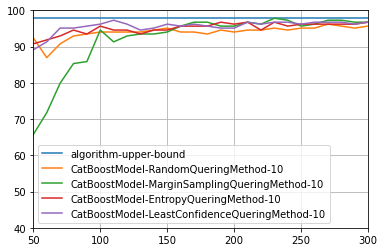

In [27]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

Prikaz obucavanja modela, pri selektovanju 25 novih elemenata za obuku

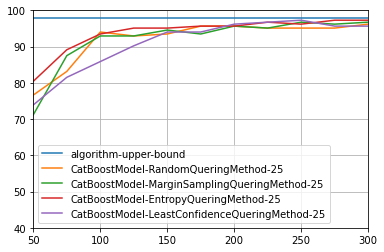

In [28]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

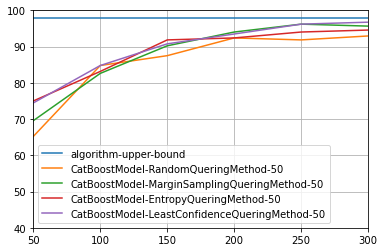

In [29]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

<h2>XGBoostModel experiments</h2>

In [30]:
max_queried = 300

repeats = 1


models = [XGBoostModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod, LeastConfidenceQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 


d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = XGBoostModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [7 3] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training xgboost...
[19:41:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 73.913043 
updated train set: (20, 25) (20,) unique(labels): [13  7] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training xgboost...
[19:41:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation m

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (30, 25) (30,) unique(labels): [19 11] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training xgboost...
[19:41:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  3

Accuracy for 88.043478 
updated train set: (40, 25) (40,) unique(labels): [26 14] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training xgboost...
[19:41:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

-----------------------------------
In iteration:  17

Accuracy for 90.760870 
updated train set: (180, 25) (180,) unique(labels): [133  47] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training xgboost...
[19:41:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  18

Accuracy for 92.391304 
updated train set: (190, 25) (190,) unique(labels): [139  51] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training xgboost...
[19:41:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the obj

initial train set: (25, 25) (25,) unique(labels): [22  3] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training xgboost...
[19:41:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 73.369565 
updated train set: (50, 25) (50,) unique(labels): [37 13] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[19:41:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 82.065217 
updated train set: (100, 25) (100,) unique(labels): [72 28] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[19:41:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 81.521739 
updated train set: (125, 25) (125,) unique(labels): [93 32] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[19:41:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 86.413043 
updated train set: (200, 25) (200,) unique(labels): [146  54] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[19:41:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 89.130435 
updated train set: (250, 25) (250,) unique(labels): [184  66] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[19:41:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (20, 25) (20,) unique(labels): [17  3] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training xgboost...
[19:41:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  2

Accuracy for 80.434783 
updated train set: (30, 25) (30,) unique(labels): [21  9] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training xgboost...
[19:41:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

updated train set: (180, 25) (180,) unique(labels): [99 81] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training xgboost...
[19:41:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  18

Accuracy for 96.195652 
updated train set: (190, 25) (190,) unique(labels): [107  83] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training xgboost...
[19:41:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set ev

initial train set: (25, 25) (25,) unique(labels): [24  1] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training xgboost...
[19:41:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 73.913043 
updated train set: (50, 25) (50,) unique(labels): [49  1] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[19:41:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric i

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 91.847826 
updated train set: (100, 25) (100,) unique(labels): [66 34] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[19:41:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 93.478261 
updated train set: (125, 25) (125,) unique(labels): [77 48] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[19:41:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

initial train set: (50, 25) (50,) unique(labels): [36 14] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[19:51:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  1

Accuracy for 53.804348 
updated train set: (100, 25) (100,) unique(labels): [68 32] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[19:51:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metr

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 79.347826 
updated train set: (200, 25) (200,) unique(labels): [120  80] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[19:51:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 82.608696 
updated train set: (250, 25) (250,) unique(labels): [159  91] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[19:51:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


verovatnoce: 
[[0.69296646 0.30703354]
 [0.5848533  0.41514668]
 [0.625924   0.37407598]
 ...
 [0.36244076 0.63755924]
 [0.32371336 0.67628664]
 [0.5608889  0.43911114]]
izracunato: 
[0.8897195  0.97912407 0.9537504  0.85844934 0.9974286  0.9974286
 0.9446905  0.9974286  0.9192659  0.9931894  0.98927593 0.98927593
 0.8916614  0.9960567  0.92520785 0.9960567  0.98927593 0.8916614
 0.93096006 0.98176175 0.7166492  0.908374   0.96905446 0.9030366
 0.98927593 0.9355912  0.9340006  0.9960567  0.9960567  0.9974286
 0.9446905  0.95806015 0.85844934 0.9537504  0.9974286  0.95339704
 0.77809095 0.82961035 0.9340006  0.88431025 0.9974286  0.9537504
 0.9974286  0.94995207 0.9446905  0.9960567  0.9340006  0.82961035
 0.85900235 0.85900235 0.9340006  0.9974286  0.7710669  0.92520785
 0.2889796  0.85900235 0.9340006  0.8769653  0.908374   0.92520785
 0.9974286  0.93969584 0.908374   0.96905446 0.8897195  0.4159804
 0.93096006 0.761498   0.8916614  0.9974286  0.9537504  0.98176175
 0.9340006  0.99605

verovatnoce: 
[[0.7696373  0.2303627 ]
 [0.67753166 0.32246834]
 [0.38860536 0.61139464]
 ...
 [0.02640438 0.9735956 ]
 [0.0087626  0.9912374 ]
 [0.20187128 0.7981287 ]]
izracunato: 
[0.778643   0.9070455  0.96389365 0.1290676  0.0856653  0.55237687
 0.44993034 0.627921   0.9708973  0.95248306 0.7054861  0.11530682
 0.9861418  0.6449654  0.40731865 0.95248306 0.05565308 0.557865
 0.18654421 0.9994448  0.07080471 0.61594975 0.73118377 0.7054861
 0.03928246 0.47514606 0.31639767 0.55237687 0.348663   0.57261384
 0.9297185  0.99461854 0.59833336 0.9379492  0.7401458  0.4017858
 0.53305584 0.9976817  0.55237687 0.6357545  0.5330788  0.5330788
 0.5635206  0.8092092  0.03641593 0.8448709  0.01868257 0.33055484
 0.97817683 0.55237687 0.517937   0.6449654  0.03892659 0.57486963
 0.08905138 0.34059167 0.1409864  0.6449654  0.67788327 0.6036587
 0.07080471 0.5295466  0.41715914 0.01601491 0.41358757 0.8555842
 0.01764638 0.414906   0.9952779  0.1290676  0.0189862  0.2000785
 0.762454   0.8551271

verovatnoce: 
[[0.9514233  0.04857674]
 [0.9985082  0.00149177]
 [0.01361066 0.98638934]
 ...
 [0.00908214 0.99091786]
 [0.02443707 0.97556293]
 [0.34182352 0.6581765 ]]
izracunato: 
[0.28032    0.01615646 0.10387591 0.6071327  0.9146923  0.24942033
 0.9146923  0.7852236  0.7852236  0.19892907 0.35418278 0.9004959
 0.05618999 0.7852236  0.09708951 0.90069115 0.06740315 0.21091075
 0.532139   0.10888201 0.7852236  0.12980837 0.56220233 0.2252886
 0.80854756 0.89976466 0.97903967 0.5215569  0.01939986 0.3343888
 0.91641665 0.38557056 0.5761466  0.9146923  0.03124699 0.64161396
 0.95763886 0.08841849 0.04886123 0.55648077 0.77226686 0.14732938
 0.2214312  0.90123844 0.80854756 0.9694554  0.9345703  0.02957786
 0.0599946  0.9985515  0.07512914 0.10230819 0.9724432  0.6409878
 0.70499426 0.15112117 0.16084063 0.07382698 0.06031715 0.2650881
 0.2122967  0.24608636 0.8708511  0.04889508 0.06518651 0.06655481
 0.6111656  0.19904809 0.14781898 0.13864318 0.5587158  0.06767198
 0.12782194 0.9074

-----------------------------------
In iteration:  10

Accuracy for 90.217391 
verovatnoce: 
[[9.4769698e-01 5.2303027e-02]
 [9.9975455e-01 2.4545932e-04]
 [4.4151545e-03 9.9558485e-01]
 ...
 [2.0443082e-02 9.7955692e-01]
 [4.0969968e-02 9.5903003e-01]
 [9.6215421e-01 3.7845798e-02]]
izracunato: 
[0.29610065 0.00329767 0.04089681 0.00924147 0.0337148  0.22408088
 0.02903802 0.04367788 0.92320883 0.01537167 0.24212529 0.8867477
 0.0643757  0.01744205 0.75983775 0.11734012 0.17506897 0.8917397
 0.8297832  0.01093963 0.5518778  0.14676863 0.02771347 0.555262
 0.7154938  0.5852113  0.07303131 0.00707822 0.6688541  0.32915753
 0.3102643  0.01042394 0.00512656 0.0605776  0.00686149 0.44022593
 0.16027708 0.21068828 0.9998423  0.01929534 0.19746429 0.9935943
 0.00360277 0.52800155 0.08371579 0.0448248  0.02473024 0.21728778
 0.12635197 0.5044445  0.14222078 0.05693863 0.15405543 0.49517867
 0.34691572 0.03858911 0.8724929  0.40322286 0.14822373 0.03540966
 0.06974281 0.11808659 0.02990981 0.4

-----------------------------------
In iteration:  13

Accuracy for 95.108696 
verovatnoce: 
[[0.9429802  0.05701984]
 [0.9984407  0.00155935]
 [0.00404823 0.9959518 ]
 ...
 [0.00584644 0.99415356]
 [0.01797116 0.98202884]
 [0.9888273  0.01117273]]
izracunato: 
[0.3154994  0.01678852 0.03800584 0.01734711 0.05842589 0.11048872
 0.03829141 0.16010737 0.74766827 0.02251436 0.35952058 0.17945264
 0.08340711 0.02217992 0.48215136 0.09677466 0.04684794 0.8738276
 0.42790738 0.01269437 0.33708465 0.0664374  0.02266628 0.86703515
 0.42586738 0.07384516 0.00929706 0.53778243 0.3586452  0.0136187
 0.01875482 0.07395214 0.02520048 0.24679105 0.16288197 0.03910609
 0.0404958  0.16714652 0.00693936 0.65002096 0.07062958 0.03192084
 0.08762751 0.07809919 0.05997999 0.3355013  0.18697572 0.08497754
 0.05237998 0.19397697 0.42688802 0.15538016 0.2194533  0.32349002
 0.08714676 0.02760456 0.03059652 0.05288331 0.04610211 0.25970742
 0.3262081  0.98804104 0.19055578 0.10343479 0.01001483 0.05269464
 0.

-----------------------------------
In iteration:  15

Accuracy for 95.108696 
verovatnoce: 
[[9.8379469e-01 1.6205313e-02]
 [9.9951738e-01 4.8263275e-04]
 [3.8337708e-03 9.9616623e-01]
 ...
 [1.0119140e-02 9.8988086e-01]
 [7.4105263e-03 9.9258947e-01]
 [9.9692738e-01 3.0725934e-03]]
izracunato: 
[0.11956815 0.00601317 0.0362941  0.00918257 0.04899578 0.20715854
 0.10932085 0.07612324 0.32263175 0.00878782 0.07906013 0.15546332
 0.0358992  0.00818476 0.9514784  0.07428361 0.0133361  0.98835313
 0.57399374 0.00391061 0.6527101  0.07954062 0.04795647 0.13463895
 0.1059384  0.00818252 0.02329352 0.9708015  0.08278437 0.01122572
 0.01105554 0.01182324 0.01225172 0.11023873 0.1972116  0.0427367
 0.02486881 0.10762127 0.01319019 0.06572032 0.0175743  0.01639679
 0.1363318  0.04586069 0.11186584 0.04888659 0.16750796 0.02072993
 0.03708309 0.2854244  0.07994618 0.04611588 0.22499083 0.02369592
 0.04892734 0.01090646 0.05299271 0.02131402 0.19940388 0.14308582
 0.03114508 0.15231875 0.0133349 

-----------------------------------
In iteration:  17

Accuracy for 95.652174 
verovatnoce: 
[[9.8948592e-01 1.0514054e-02]
 [9.9953705e-01 4.6293001e-04]
 [8.0668330e-03 9.9193317e-01]
 ...
 [1.9454718e-02 9.8054528e-01]
 [3.3670068e-03 9.9663299e-01]
 [9.9689257e-01 3.1074099e-03]]
izracunato: 
[0.08418208 0.00579558 0.06768592 0.02098641 0.08237292 0.26455516
 0.04659773 0.06802949 0.39959168 0.0065215  0.02159483 0.1071584
 0.08912407 0.01495692 0.03187012 0.02935934 0.5251134  0.00164455
 0.40794185 0.09581839 0.02866963 0.09870701 0.2249671  0.0180983
 0.03115267 0.06018507 0.01851758 0.01738288 0.00512822 0.00752915
 0.16272692 0.24073538 0.04450775 0.01827117 0.04675256 0.01627228
 0.04464995 0.02212717 0.02329917 0.19088194 0.04924094 0.12294067
 0.01377511 0.0952245  0.0223563  0.03872728 0.08288255 0.03564419
 0.03198883 0.0590671  0.02501489 0.02866963 0.01263137 0.07735021
 0.01804069 0.4303499  0.24445336 0.05984225 0.10321408 0.01207311
 0.01267124 0.04917258 0.22290245 

-----------------------------------
In iteration:  19

Accuracy for 95.108696 
verovatnoce: 
[[9.1934073e-01 8.0659270e-02]
 [9.9945647e-01 5.4354552e-04]
 [1.0846198e-02 9.8915380e-01]
 ...
 [4.6887636e-02 9.5311236e-01]
 [4.0038824e-03 9.9599612e-01]
 [9.9794531e-01 2.0546948e-03]]
izracunato: 
[0.40449792 0.00667886 0.0863521  0.01854694 0.17660111 0.14782655
 0.05974276 0.14811906 0.35097405 0.02279096 0.01286492 0.16711354
 0.1592508  0.05478492 0.02545521 0.03955943 0.34565577 0.0055368
 0.3689096  0.07440145 0.02529897 0.0290133  0.04252709 0.01530305
 0.0211027  0.0243797  0.02061298 0.0139974  0.01171143 0.14595506
 0.07247516 0.01675784 0.0536203  0.06242121 0.01804918 0.04772798
 0.01678268 0.01457092 0.25177306 0.05892021 0.16814888 0.03138989
 0.09378368 0.06129281 0.04701691 0.07580955 0.01556425 0.05127259
 0.10505114 0.02430058 0.03480146 0.03037426 0.03828824 0.02593042
 0.31207085 0.03740448 0.0352309  0.01387094 0.02451644 0.0485648
 0.14327714 0.03945627 0.05234741 

-----------------------------------
In iteration:  21

Accuracy for 94.565217 
verovatnoce: 
[[9.7709864e-01 2.2901377e-02]
 [9.9968958e-01 3.1041927e-04]
 [1.0557294e-02 9.8944271e-01]
 ...
 [3.5739422e-02 9.6426058e-01]
 [1.3640523e-03 9.9863595e-01]
 [9.9839216e-01 1.6078479e-03]]
izracunato: 
[0.15743479 0.00406524 0.08446541 0.01266253 0.06164131 0.05917875
 0.06414768 0.03868239 0.23437192 0.00467126 0.00955726 0.23671544
 0.0458289  0.00978993 0.03857869 0.02979936 0.00210995 0.13027859
 0.13729447 0.047668   0.01702805 0.0140842  0.11332367 0.02232664
 0.012254   0.01821884 0.01558246 0.00598527 0.22903314 0.10887691
 0.0236317  0.02535343 0.034462   0.09361045 0.0530506  0.01444267
 0.00776613 0.0849964  0.0514168  0.15113714 0.02627454 0.105014
 0.0508405  0.03526542 0.28130826 0.02282066 0.05397487 0.04100173
 0.0260116  0.04899912 0.01173993 0.05318898 0.02153426 0.13781448
 0.02684296 0.02771605 0.02699277 0.04100479 0.07823984 0.17300779
 0.04213839 0.02104802 0.00362205 

-----------------------------------
In iteration:  23

Accuracy for 94.565217 
verovatnoce: 
[[9.9243140e-01 7.5686262e-03]
 [9.9990088e-01 9.9150653e-05]
 [8.5824728e-03 9.9141753e-01]
 ...
 [9.9896055e-01 1.0394620e-03]
 [1.3554692e-03 9.9864453e-01]
 [9.9934727e-01 6.5274682e-04]]
izracunato: 
[0.06420442 0.0014617  0.07124205 0.00708759 0.06279925 0.07884425
 0.04490038 0.02584909 0.17705819 0.00459866 0.01236736 0.1363033
 0.02319663 0.00733645 0.02263584 0.01259611 0.00354731 0.01985228
 0.03625532 0.03318593 0.01212568 0.022282   0.02036675 0.00866588
 0.00944388 0.02042438 0.00326763 0.02646091 0.02354733 0.01278753
 0.04191766 0.01826181 0.05772892 0.00769982 0.00585751 0.028094
 0.03827595 0.12535836 0.01143433 0.0645505  0.0176088  0.03302048
 0.0572741  0.00824565 0.08379731 0.06383968 0.05415891 0.03419782
 0.0103758  0.02685314 0.01471277 0.07054106 0.03930592 0.01489003
 0.00830824 0.01284171 0.02963896 0.02840295 0.01496886 0.0042492
 0.04799443 0.02293414 0.04095178 0.

-----------------------------------
In iteration:  25

Accuracy for 95.652174 
verovatnoce: 
[[9.99882817e-01 1.17208576e-04]
 [2.41804123e-03 9.97581959e-01]
 [9.99537945e-01 4.62075608e-04]
 [9.94344115e-01 5.65589499e-03]
 [9.95820224e-01 4.17980179e-03]
 [9.96924102e-01 3.07587581e-03]
 [9.99804497e-01 1.95492321e-04]
 [6.73770905e-04 9.99326229e-01]
 [9.88960505e-01 1.10395076e-02]
 [1.64961815e-03 9.98350382e-01]
 [9.99382436e-01 6.17567275e-04]
 [9.95099545e-04 9.99004900e-01]
 [1.48683786e-03 9.98513162e-01]
 [9.99856830e-01 1.43197729e-04]
 [9.97648835e-01 2.35116272e-03]
 [9.98305500e-01 1.69452571e-03]
 [9.98765230e-01 1.23479962e-03]
 [9.99244750e-01 7.55239045e-04]
 [9.98046219e-01 1.95375993e-03]
 [9.98533428e-01 1.46655063e-03]
 [9.99672413e-01 3.27581802e-04]
 [9.99289513e-01 7.10497028e-04]
 [9.96260047e-01 3.73995141e-03]
 [9.99825001e-01 1.75024979e-04]
 [2.18093395e-03 9.97819066e-01]
 [9.98705626e-01 1.29438215e-03]
 [9.99088407e-01 9.11564333e-04]
 [9.97512341e-01

sta je selektovano:
[237 377 381 358 232 128 353 320 458   8]
updated train set: (270, 25) (270,) unique(labels): [190  80] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training xgboost...
[19:51:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  27

Accuracy for 96.195652 
verovatnoce: 
[[9.99927521e-01 7.24903002e-05]
 [3.62306833e-03 9.96376932e-01]
 [9.99664068e-01 3.35939723e-04]
 [9.91193652e-01 8.80636647e-03]
 [9.97130275e-01 2.86974735e-03]
 [9.96939063e-01 3.06093483e-03]
 [9.99647260e-01 3.52746836e-04]
 [7.87138939e-04 9.99212861e-01]
 [2.39795446e-03 9.97602046e-01]
 [9.99199569e-01 8.00450798e-04]
 [1.53839588e-03 9.98461604

-----------------------------------
In iteration:  28

Accuracy for 95.108696 
verovatnoce: 
[[9.99911308e-01 8.86897615e-05]
 [1.00813508e-02 9.89918649e-01]
 [9.99740243e-01 2.59765307e-04]
 [9.93062556e-01 6.93743583e-03]
 [9.93670583e-01 6.32942561e-03]
 [9.96238232e-01 3.76175926e-03]
 [9.99371469e-01 6.28527254e-04]
 [1.35964155e-03 9.98640358e-01]
 [8.90469551e-03 9.91095304e-01]
 [9.97831583e-01 2.16839649e-03]
 [2.02316046e-03 9.97976840e-01]
 [1.08170509e-03 9.98918295e-01]
 [9.99904752e-01 9.52358459e-05]
 [9.91064429e-01 8.93554371e-03]
 [9.98125494e-01 1.87449763e-03]
 [9.99341130e-01 6.58874807e-04]
 [9.99240100e-01 7.59915682e-04]
 [9.97668087e-01 2.33190320e-03]
 [9.93155181e-01 6.84479531e-03]
 [9.99826491e-01 1.73513195e-04]
 [9.98259783e-01 1.74024212e-03]
 [9.96373057e-01 3.62691330e-03]
 [9.99661386e-01 3.38621234e-04]
 [1.58119202e-03 9.98418808e-01]
 [9.99234498e-01 7.65504548e-04]
 [9.97069895e-01 2.93011242e-03]
 [9.91171241e-01 8.82876664e-03]
 [9.97206867e-01

 [9.99412775e-01 5.87226124e-04]]
izracunato: 
[0.0010403  0.0389883  0.01215334 0.07717514 0.04816346 0.03293032
 0.00931659 0.004208   0.04167422 0.01968841 0.01040054 0.01560492
 0.00526906 0.04578157 0.01649658 0.01054349 0.00324458 0.01189766
 0.03296326 0.00359408 0.02892821 0.01908105 0.00349466 0.00819187
 0.01354742 0.02338652 0.0371779  0.01270201 0.03592601 0.0040138
 0.00788694 0.01911474 0.02318878 0.01238353 0.03016035 0.01858352
 0.04226121 0.01245252 0.02955772 0.0181373  0.01155499 0.00850253
 0.01896795 0.02280628 0.1013267  0.00718223 0.01331137 0.01227213
 0.01556199 0.02737051 0.01185364 0.00841241 0.06166451 0.01725335
 0.0363247  0.02014467 0.00768212 0.00876253 0.01463841 0.04199103
 0.02850697 0.02799876 0.00608652 0.00287933 0.0727616  0.00349466
 0.03121756 0.03225685 0.01429443 0.04616612 0.02360206 0.00405004
 0.01532526 0.0315427  0.01340317 0.00772805 0.02342055 0.00456869
 0.01660916 0.0176455  0.02144177 0.03044158 0.00690515 0.0086031
 0.03723868 0.037

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



sta je selektovano:
[154  26 406 571 156 384 288 217 285 111 479 177 377 403 439 443  47 281
 161 107 366 434 408 116 551]
updated train set: (75, 25) (75,) unique(labels): [52 23] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training xgboost...
[19:51:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  3

Accuracy for 69.021739 
verovatnoce: 
[[0.9078117  0.09218831]
 [0.9952665  0.0047335 ]
 [0.9931644  0.00683556]
 ...
 [0.12044793 0.87955207]
 [0.01318669 0.9868133 ]
 [0.9797571  0.02024292]]
izracunato: 
[0.4437322  0.04336905 0.05899416 0.13189872 0.2439476  0.14378904
 0.9973868  0.03202628 0.97613806 0.76647234 0.82535386 0.09517688

verovatnoce: 
[[9.9814069e-01 1.8592806e-03]
 [9.9943596e-01 5.6406553e-04]
 [9.8454481e-01 1.5455200e-02]
 ...
 [2.5368810e-02 9.7463119e-01]
 [3.8870573e-03 9.9611294e-01]
 [9.9060690e-01 9.3931090e-03]]
izracunato: 
[0.01954553 0.00690082 0.11509876 0.10543966 0.09679257 0.20297223
 0.13106972 0.19077593 0.91064024 0.44717807 0.10894968 0.9423365
 0.17504536 0.06585529 0.21898223 0.1575369  0.95540696 0.78231144
 0.0456894  0.35349932 0.14274363 0.57807755 0.23309754 0.68518174
 0.35667962 0.15164816 0.63065386 0.00934908 0.40374288 0.1246822
 0.9787811  0.43924046 0.4517234  0.12285601 0.89573467 0.1927211
 0.21039112 0.33166736 0.59751767 0.87004554 0.06640175 0.03643366
 0.8386416  0.30014554 0.07539818 0.9999789  0.42484403 0.2038
 0.01114202 0.6516675  0.6549263  0.5638774  0.06659918 0.01320981
 0.61378634 0.8624789  0.07728904 0.9986625  0.27053607 0.13004434
 0.98306537 0.1682555  0.06980941 0.0423731  0.1981735  0.37240937
 0.7340994  0.0476082  0.5227068  0.4457167  0.3880

-----------------------------------
In iteration:  6

Accuracy for 89.130435 
verovatnoce: 
[[0.9681298  0.0318702 ]
 [0.9989927  0.00100731]
 [0.9840043  0.01599566]
 ...
 [0.04812843 0.9518716 ]
 [0.01212984 0.98787016]
 [0.990834   0.00916601]]
izracunato: 
[0.20368579 0.01148055 0.11832422 0.08111179 0.01584698 0.94702375
 0.6941196  0.01333087 0.20621778 0.03559158 0.16669507 0.10147886
 0.71062684 0.20964308 0.16307455 0.20307401 0.2879595  0.08536211
 0.36725327 0.11201753 0.21641508 0.27552938 0.34132233 0.07266297
 0.9974241  0.8419563  0.00842503 0.29214182 0.10772092 0.9260192
 0.0356662  0.0894689  0.8471381  0.81056607 0.97157973 0.41066664
 0.25832945 0.06910542 0.16978917 0.01395326 0.21020941 0.1317944
 0.01853662 0.11384644 0.09380811 0.00330166 0.3363052  0.20587279
 0.16592343 0.04089494 0.01225394 0.06772165 0.90451074 0.04645841
 0.06980764 0.38091862 0.35982323 0.08542216 0.04651229 0.00687099
 0.8878356  0.2346116  0.28835207 0.15433198 0.03392007 0.03991859
 0.3

-----------------------------------
In iteration:  8

Accuracy for 94.021739 
verovatnoce: 
[[0.99119645 0.00880354]
 [0.9973349  0.00266508]
 [0.9934339  0.00656614]
 ...
 [0.02095389 0.9790461 ]
 [0.00308394 0.99691606]
 [0.9947989  0.00520108]]
izracunato: 
[7.27527067e-02 2.66305190e-02 5.70510700e-02 2.27740556e-02
 6.10004365e-03 4.98897225e-01 5.26968902e-03 5.53815961e-01
 4.47194539e-02 8.90435949e-02 1.88630130e-02 7.91145787e-02
 1.34743854e-01 9.34414640e-02 1.05810896e-01 2.50307143e-01
 3.04083116e-02 9.84558582e-01 3.39600034e-02 1.74214721e-01
 7.73513079e-01 6.83059124e-03 9.99994397e-01 3.84858297e-03
 7.17493415e-01 2.63978899e-01 7.66169608e-01 2.22817793e-01
 2.02887207e-01 3.24168921e-01 3.87140423e-01 1.64493769e-01
 1.45020904e-02 3.88488844e-02 5.44961356e-02 3.10503721e-01
 5.95549755e-02 6.14345595e-02 7.67362267e-02 4.97090332e-02
 2.88875028e-03 1.60770565e-01 2.40369618e-01 4.16190028e-01
 3.87145430e-02 2.25909371e-02 9.63645205e-02 9.66622904e-02
 3.8080

-----------------------------------
In iteration:  10

Accuracy for 92.391304 
verovatnoce: 
[[9.98465538e-01 1.53448037e-03]
 [9.99418259e-01 5.81763918e-04]
 [9.93812203e-01 6.18776865e-03]
 [2.99376249e-03 9.97006238e-01]
 [9.99431372e-01 5.68628195e-04]
 [9.07865584e-01 9.21344161e-02]
 [9.99617457e-01 3.82555503e-04]
 [9.21105146e-01 7.88948834e-02]
 [9.88681734e-01 1.13182785e-02]
 [9.98479784e-01 1.52023556e-03]
 [4.74184752e-03 9.95258152e-01]
 [9.65716004e-01 3.42840217e-02]
 [2.13652849e-03 9.97863472e-01]
 [9.23998594e-01 7.60014281e-02]
 [8.81239951e-01 1.18760027e-01]
 [1.36393309e-03 9.98636067e-01]
 [1.04104877e-02 9.89589512e-01]
 [9.98040318e-01 1.95969269e-03]
 [9.99161422e-01 8.38581647e-04]
 [9.99896526e-01 1.03449660e-04]
 [9.77781236e-01 2.22187396e-02]
 [9.96681631e-01 3.31837381e-03]
 [6.68781996e-02 9.33121800e-01]
 [9.87303317e-01 1.26966685e-02]
 [9.81990457e-01 1.80095248e-02]
 [9.99074936e-01 9.25050350e-04]
 [1.00072026e-02 9.89992797e-01]
 [1.22754574e-02

 0.00208042 0.01466427 0.2918446  0.01765617 0.02403748]
sta je selektovano:
[258 430 107 350 369  62 390 332 381  12  10 343 269 425  20 154  64  63
  80  76 279 364 104 352 186]
updated train set: (300, 25) (300,) unique(labels): [208  92] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training xgboost...
[19:51:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  12

Accuracy for 94.021739 
final active learning accuracies [40.76086956521739, 49.45652173913043, 69.02173913043478, 78.80434782608695, 82.6086956521739, 89.13043478260869, 93.47826086956522, 94.02173913043478, 94.02173913043478, 92.3913043478261, 93.47826086956522, 94.021739130

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


verovatnoce: 
[[0.9884052  0.01159474]
 [0.9885768  0.01142316]
 [0.99643075 0.00356922]
 ...
 [0.97676796 0.02323206]
 [0.08091271 0.9190873 ]
 [0.9975935  0.00240649]]
izracunato: 
[0.09118904 0.09008667 0.03415849 0.9796479  0.40750757 0.540867
 0.59632444 0.1759251  0.01060167 0.01151439 0.59195876 0.172907
 0.172907   0.01811308 0.01809497 0.172907   0.39425763 0.9175284
 0.8156161  0.43840313 0.09547032 0.04229691 0.10943039 0.1759251
 0.09976959 0.5310296  0.0929281  0.26157838 0.01419117 0.97172105
 0.7723342  0.935884   0.97426736 0.95233613 0.13795838 0.9685842
 0.17671935 0.0703315  0.03543017 0.06536634 0.8418585  0.31428325
 0.9558337  0.00730658 0.0363071  0.59809    0.02146987 0.03052784
 0.08841188 0.01660297 0.13159177 0.89694816 0.15697812 0.01384062
 0.2102065  0.7478502  0.921314   0.9196253  0.3665365  0.47522607
 0.12593864 0.0116179  0.0815286  0.02638254 0.4331651  0.04106858
 0.7733252  0.3592705  0.00997642 0.5015079  0.27349404 0.98674417
 0.6962892  0.153331

-----------------------------------
In iteration:  4

Accuracy for 89.130435 
verovatnoce: 
[[9.2018473e-01 7.9815261e-02]
 [9.9843824e-01 1.5617373e-03]
 [9.9721855e-01 2.7814619e-03]
 ...
 [7.0342934e-01 2.9657069e-01]
 [9.2434883e-04 9.9907565e-01]
 [9.9617970e-01 3.8203241e-03]]
izracunato: 
[0.4015279  0.01681089 0.02762165 0.06515051 0.05516595 0.04436454
 0.1824197  0.03387447 0.01285189 0.6144904  0.09112228 0.09501152
 0.02113783 0.23674878 0.12486313 0.05743134 0.02124627 0.2774718
 0.00520631 0.02754653 0.01093541 0.16814773 0.1065961  0.01691714
 0.8952588  0.24847583 0.00977206 0.07888677 0.09193773 0.00773444
 0.06376439 0.05887575 0.05640128 0.84796786 0.3778209  0.040542
 0.01483766 0.0358124  0.14008753 0.08909556 0.1331025  0.01620323
 0.01212224 0.05015327 0.8841785  0.9042779  0.02226615 0.0134542
 0.2005653  0.03848051 0.04879234 0.03434683 0.08667835 0.01071253
 0.04123601 0.02119148 0.65493584 0.00769442 0.8721     0.18825759
 0.01733151 0.12798159 0.00604245 0.1

[19:52:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  6

Accuracy for 91.304348 
final active learning accuracies [63.04347826086957, 71.19565217391305, 82.6086956521739, 89.13043478260869, 90.21739130434783, 91.30434782608695]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'A

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  1

Accuracy for 73.913043 
updated train set: (20, 25) (20,) unique(labels): [ 9 11] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training xgboost...
[19:52:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  2

Accuracy for 91.304348 
updated train set: (30, 25) (30,) unique(labels): [10 20] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training xgboost...
[19:52:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

-----------------------------------
In iteration:  16

Accuracy for 95.108696 
updated train set: (170, 25) (170,) unique(labels): [75 95] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training xgboost...
[19:52:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  17

Accuracy for 95.652174 
updated train set: (180, 25) (180,) unique(labels): [81 99] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training xgboost...
[19:52:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objecti

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (75, 25) (75,) unique(labels): [50 25] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training xgboost...
[19:52:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  3

Accuracy for 82.065217 
updated train set: (100, 25) (100,) unique(labels): [61 39] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[19:52:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metr

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
In iteration:  3

Accuracy for 87.500000 
updated train set: (200, 25) (200,) unique(labels): [116  84] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[19:53:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
In iteration:  4

Accuracy for 92.934783 
updated train set: (250, 25) (250,) unique(labels): [139 111] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[19:53:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku

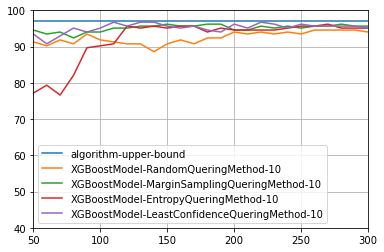

In [31]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

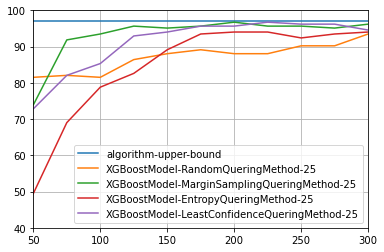

In [32]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

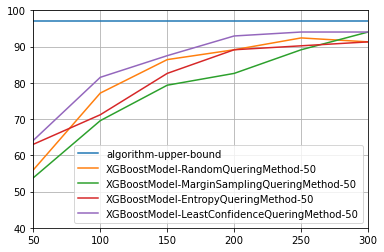

In [33]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

<h2>BaggingModel experiments</h2>

In [36]:
max_queried = 300

repeats = 1


models = [BaggingModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod, LeastConfidenceQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = BaggingModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [5 5] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  1

Accuracy for 62.500000 
updated train set: (20, 25) (20,) unique(labels): [10 10] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  2

Accuracy for 79.891304 
updated train set: (30, 25) (30,) unique(labels): [17 13] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  3

Accuracy for 86.413043 
updated train set: (40, 25) (40,) unique(labels): [26 14] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training bagging model...
-------

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  18

Accuracy for 90.760870 
updated train set: (190, 25) (190,) unique(labels): [143  47] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  19

Accuracy for 91.847826 
updated train set: (200, 25) (200,) unique(labels): [150  50] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  20

Accuracy for 92.391304 
updated train set: (210, 25) (210,) unique(labels): [157  53] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  21

Accuracy for 92.391304 
updated train set: (220, 25) (220,) unique(labels): [165  55] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  22

Accuracy for 92.391304 
updated train set: (230, 25) (230,) unique(labels): [173  57] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  23

Accuracy for 91.847826 
updated train set: (240, 25) (240,) unique(labels): [180  60] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  24

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [189  61] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  25

Accuracy for 92.391304 
updated train set: (260, 25) (260,) unique(labels): [196  64] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  26

Accuracy for 92.934783 
updated train set: (270, 25) (270,) unique(labels): [202  68] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  27

Accuracy for 92.391304 
updated train set: (280, 25) (280,) unique(labels): [209  71] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  28

Accuracy for 92.391304 
updated train set: (290, 25) (290,) unique(labels): [214  76] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  29

Accuracy for 91.304348 
updated train set: (300, 25) (300,) unique(labels): [223  77] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  30

Accuracy for 91.847826 
final active learning accuracies [62.5, 79.8913043478261, 86.41304347826086, 85.86956521739131, 91.84782608695652, 90.21739130434783, 90.76086956521739, 90.76086956521739, 91.30434782608695, 91.30434782608695, 91.30434782608695, 89.67391304347827, 90.21739130434783, 89.67391304347827, 91.30434782608695, 90.76086956521739, 90.76086956521739, 90.76086956521739, 91.84782608695652, 92.3913043478261, 92.3913043478261, 92.3913043478261, 91.84782608695652, 92.3913043478261, 92.3913043478261, 92.93478260869566, 92.3913043478261, 92.3913043478261, 91.30434782608695, 91.84782608695652]
saved Active-learning-experiment-1.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  5

Accuracy for 86.413043 
updated train set: (150, 25) (150,) unique(labels): [116  34] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  6

Accuracy for 87.500000 
updated train set: (175, 25) (175,) unique(labels): [133  42] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  7

Accuracy for 87.500000 
updated train set: (200, 25) (200,) unique(labels): [151  49] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  8

Accuracy for 88.043478 
updated train set: (225, 25) (225,) unique(labels): [169  56] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  9

Accuracy for 89.130435 
updated train set: (250, 25) (250,) unique(labels): [186  64] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 89.673913 
updated train set: (275, 25) (275,) unique(labels): [205  70] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 89.673913 
updated train set: (300, 25) (300,) unique(labels): [221  79] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 91.304348 
final active learning accuracies [83.69565217391305, 83.15217391304348, 86.41304347826086, 85.86956521739131, 86.41304347826086, 87.5, 87.5, 88.04347826086956, 89.13043478260869, 89.67391304347827, 89.67391304347827, 91.30434782608695]
saved Active-learning-experiment-2.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

----

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  3

Accuracy for 82.608696 
updated train set: (200, 25) (200,) unique(labels): [147  53] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 88.586957 
updated train set: (250, 25) (250,) unique(labels): [184  66] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 89.673913 
updated train set: (300, 25) (300,) unique(labels): [218  82] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 90.217391 
final active learning accuracies [67.3913043478261, 79.8913043478261, 82.6086956521739, 88.58695652173914, 89.67391304347827, 90.21739130434783]
saved Active-learning-experiment-3.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 4, using model = Bagg

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  16

Accuracy for 94.021739 
updated train set: (170, 25) (170,) unique(labels): [86 84] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  17

Accuracy for 94.021739 
updated train set: (180, 25) (180,) unique(labels): [93 87] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  18

Accuracy for 94.565217 
updated train set: (190, 25) (190,) unique(labels): [101  89] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  19

Accuracy for 93.478261 
updated train set: (200, 25) (200,) unique(labels): [105  95] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  20

Accuracy for 92.934783 
updated train set: (210, 25) (210,) unique(labels): [112  98] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  21

Accuracy for 93.478261 
updated train set: (220, 25) (220,) unique(labels): [118 102] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  22

Accuracy for 95.108696 
updated train set: (230, 25) (230,) unique(labels): [126 104] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  23

Accuracy for 94.021739 
updated train set: (240, 25) (240,) unique(labels): [133 107] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  24

Accuracy for 94.021739 
updated train set: (250, 25) (250,) unique(labels): [141 109] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  25

Accuracy for 94.021739 
updated train set: (260, 25) (260,) unique(labels): [148 112] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  26

Accuracy for 94.565217 
updated train set: (270, 25) (270,) unique(labels): [154 116] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 94.565217 
updated train set: (280, 25) (280,) unique(labels): [163 117] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  28

Accuracy for 94.565217 
updated train set: (290, 25) (290,) unique(labels): [169 121] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  29

Accuracy for 94.565217 
updated train set: (300, 25) (300,) unique(labels): [178 122] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  30

Accuracy for 94.565217 
final active learning accuracies [51.63043478260869, 69.56521739130434, 84.23913043478261, 85.86956521739131, 87.5, 90.76086956521739, 90.76086956521739, 90.76086956521739, 90.76086956521739, 92.3913043478261, 94.02173913043478, 95.1086956521739, 94.56521739130434, 95.1086956521739, 95.65217391304348, 94.02173913043478, 94.02173913043478, 94.56521739130434, 93.47826086956522, 92.93478260869566, 93.47826086956522, 95.1086956521739, 94.02173913043478, 94.02173913043478, 94.02173913043478, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.56521739130434]
saved Active-learning-experiment-4.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pk

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  4

Accuracy for 80.978261 
updated train set: (125, 25) (125,) unique(labels): [65 60] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 88.043478 
updated train set: (150, 25) (150,) unique(labels): [73 77] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 90.760870 
updated train set: (175, 25) (175,) unique(labels): [84 91] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 90.217391 
updated train set: (200, 25) (200,) unique(labels): [ 96 104] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 90.217391 
updated train set: (225, 25) (225,) unique(labels): [105 120] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [118 132] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 92.391304 
updated train set: (275, 25) (275,) unique(labels): [134 141] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 94.021739 
updated train set: (300, 25) (300,) unique(labels): [152 148] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 92.934783 
final active learning accuracies [54.347826086956516, 73.91304347826086, 76.08695652173914, 80.97826086956522, 88.04347826086956, 90.76086956521739, 90.21739130434783, 90.21739130434783, 92.3913043478261, 92.3913043478261, 94.02173913043478, 92.93478260869566]
saved Active-learning-experiment-5.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  3

Accuracy for 84.782609 
updated train set: (200, 25) (200,) unique(labels): [112  88] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 88.043478 
updated train set: (250, 25) (250,) unique(labels): [123 127] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 94.021739 
updated train set: (300, 25) (300,) unique(labels): [147 153] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 95.108696 
final active learning accuracies [64.13043478260869, 75.0, 84.78260869565217, 88.04347826086956, 94.02173913043478, 95.1086956521739]
saved Active-learning-experiment-6.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 7, using model = BaggingModel, q

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 88.043478 
verovatnoce: 
[[0.71 0.29]
 [0.85 0.15]
 [0.87 0.13]
 ...
 [0.04 0.96]
 [0.03 0.97]
 [1.   0.  ]]
izracunato: 
[0.86872125 0.6098403  0.55743819 0.99277445 0.63430955 0.46899559
 0.7601675  0.28639696 0.24229219 0.99277445 0.89317346 0.46899559
 0.43646982 0.43646982 0.99884554 0.43646982 0.40217919 0.43646982
 0.65770478 0.8812909  0.52936087 0.99277445 0.7780113  0.9248187
 0.82674637 0.28639696 0.93406806 0.99884554 0.19439186 0.9814539
 0.46899559 0.85545081 0.46899559 0.52936087 0.49991596 0.36592365
 0.70147146 0.7780113  0.85545081 0.95804202 0.46899559 0.08079314
 0.32744492 0.94268319 0.72192809 0.94268319 0.72192809 0.19439186
 0.55743819 0.7780113  0.65770478 0.96479955 0.32744492 0.46899559
 0.08079314 0.98581504 0.97095059 0.91492637 0.46899559 0.28639696
 0.28639696 0.86872125 0.81127812 0.24229219 0.86872125 0.84146464
 0.32744492 0.46899559 0.81127812 0.68007705 0.7780113  0.82674637
 0.881290

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 87.500000 
verovatnoce: 
[[0.67 0.33]
 [0.85 0.15]
 [0.92 0.08]
 ...
 [0.97 0.03]
 [0.03 0.97]
 [0.09 0.91]]
izracunato: 
[0.91492637 0.6098403  0.40217919 0.98958752 0.6098403  0.46899559
 0.7601675         nan 0.19439186 0.98958752 0.89317346 0.36592365
 0.36592365 0.52936087 0.89317346 0.36592365 0.63430955 0.36592365
 0.58423881 0.89317346 0.58423881 0.99740159 0.7601675  0.93406806
 0.95067209        nan 0.97650047 0.98581504        nan 0.98581504
 0.40217919 0.91492637 0.58423881 0.46899559        nan 0.32744492
 0.74148274 0.9248187  0.7780113  0.98581504 0.40217919 0.14144054
 0.32744492 0.99277445 0.6098403  0.94268319 0.49991596 0.32744492
 0.43646982 0.84146464 0.32744492 0.96479955 0.28639696 0.08079314
 0.14144054 0.86872125 0.82674637 0.90438146 0.40217919 0.36592365
 0.40217919 0.9248187  0.84146464 0.40217919 0.9248187  0.9248187
 0.68007705 0.36592365 0.6098403  0.6098403  0.85545081 0.8812909
 0.868721

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 88.043478 
verovatnoce: 
[[0.7  0.3 ]
 [0.86 0.14]
 [0.93 0.07]
 ...
 [0.99 0.01]
 [0.03 0.97]
 [0.06 0.94]]
izracunato: 
[0.8812909  0.58423881 0.36592365 1.         0.63430955 0.28639696
 0.58423881        nan 0.19439186 0.97650047 0.82674637 0.28639696
 0.28639696 0.49991596 0.85545081 0.28639696 0.43646982 0.28639696
 0.70147146 0.74148274 0.46899559 0.98581504 0.70147146 0.90438146
 0.86872125        nan 0.98958752 0.99740159 0.08079314 0.98581504
 0.28639696 0.7601675  0.46899559 0.46899559 0.08079314 0.24229219
 0.58423881 0.96479955 0.63430955 1.         0.32744492 0.08079314
 0.08079314 0.99537844 0.40217919 0.98958752 0.43646982 0.49991596
 0.40217919 0.72192809 0.08079314 0.96479955        nan 0.19439186
 0.08079314 0.74148274 0.96479955 0.89317346 0.36592365 0.19439186
 0.08079314 0.85545081 0.85545081 0.40217919 0.9814539  0.98581504
 0.7780113  0.08079314 0.7601675  0.70147146 0.86872125 0.74148274
 0.8812

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 87.500000 
verovatnoce: 
[[0.69 0.31]
 [0.86 0.14]
 [0.97 0.03]
 ...
 [1.   0.  ]
 [0.02 0.98]
 [0.02 0.98]]
izracunato: 
[0.89317346 0.58423881 0.19439186 0.99277445 0.58423881 0.24229219
 0.55743819        nan 0.24229219 0.96479955 0.7780113  0.24229219
 0.08079314 0.40217919 0.74148274 0.19439186 0.46899559 0.19439186
 0.63430955 0.74148274 0.46899559 0.98581504 0.74148274 0.94268319
 0.89317346        nan 0.9814539  0.98581504 0.08079314 0.9814539
 0.24229219 0.81127812 0.32744492 0.49991596 0.08079314 0.40217919
 0.63430955 0.96479955 0.70147146 0.99740159 0.24229219 0.14144054
        nan 0.99537844 0.49991596 0.98958752 0.49991596 0.52936087
 0.32744492 0.72192809        nan 0.97650047        nan 0.14144054
 0.08079314 0.81127812 0.95804202 0.84146464 0.24229219 0.14144054
 0.08079314 0.89317346 0.84146464 0.40217919 0.9814539  0.97650047
 0.81127812 0.08079314 0.70147146 0.6098403  0.86872125 0.79504028
 0.89317

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 86.956522 
verovatnoce: 
[[0.71 0.29]
 [0.84 0.16]
 [0.97 0.03]
 ...
 [1.   0.  ]
 [0.02 0.98]
 [0.02 0.98]]
izracunato: 
[0.86872125 0.63430955 0.19439186 0.98581504 0.40217919 0.14144054
 0.6098403         nan 0.19439186 0.99884554 0.79504028 0.14144054
        nan 0.36592365 0.70147146 0.14144054 0.32744492 0.08079314
 0.68007705 0.7780113  0.36592365 0.99740159 0.72192809 0.91492637
 0.89317346        nan 0.98581504 0.98958752        nan 0.97095059
 0.14144054 0.7601675  0.08079314 0.40217919        nan 0.36592365
 0.63430955 0.96479955 0.70147146 0.99740159 0.19439186 0.19439186
 0.99971144 0.49991596 0.96479955 0.58423881 0.43646982 0.28639696
 0.68007705 0.9814539         nan 0.08079314 0.08079314 0.86872125
 0.94268319 0.79504028        nan        nan 0.08079314 0.90438146
 0.7601675  0.32744492 0.9814539  0.97650047 0.84146464        nan
 0.58423881 0.40217919 0.86872125 0.7601675  0.93406806 0.19439186
 0.5293

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  7

Accuracy for 86.413043 
verovatnoce: 
[[0.66 0.34]
 [0.88 0.12]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.09 0.91]]
izracunato: 
[0.9248187  0.52936087        nan 0.9248187  0.36592365        nan
 0.58423881        nan 0.19439186 0.98581504 0.85545081        nan
        nan 0.40217919 0.72192809        nan 0.46899559        nan
 0.6098403  0.74148274 0.40217919 0.98581504 0.65770478 0.95804202
 0.93406806        nan 0.89317346 0.95067209        nan 0.99971144
        nan 0.93406806 0.19439186 0.40217919        nan 0.36592365
 0.7601675  0.91492637 0.74148274 0.98581504        nan 0.08079314
 0.99537844 0.6098403  0.98958752 0.65770478 0.32744492        nan
 0.6098403  0.97095059        nan        nan 0.14144054 0.82674637
 0.93406806 0.68007705        nan        nan 0.24229219 0.86872125
 0.72192809 0.40217919 0.94268319 0.99277445 0.7601675         nan
 0.19439186 0.43646982 0.89317346 0.95067209 0.82674637 0.36592365
 0.6800

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 85.869565 
verovatnoce: 
[[0.68 0.32]
 [0.89 0.11]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.08 0.92]]
izracunato: 
[0.90438146 0.49991596        nan 0.95067209        nan        nan
 0.58423881        nan 0.19439186 0.98958752 0.8812909         nan
        nan 0.40217919 0.70147146        nan 0.43646982        nan
 0.6098403  0.74148274 0.36592365 0.99537844 0.6098403  0.95067209
 0.95804202        nan 0.79504028 0.96479955 0.08079314 0.99971144
        nan 0.93406806 0.19439186 0.28639696        nan 0.36592365
 0.7780113  0.9248187  0.74148274 0.98581504        nan 0.08079314
 0.9814539  0.52936087 0.99884554 0.68007705 0.32744492        nan
 0.52936087 0.95067209        nan        nan 0.14144054 0.74148274
 0.94268319 0.70147146        nan        nan 0.24229219 0.86872125
 0.79504028 0.43646982 0.93406806 0.99740159 0.68007705        nan
        nan 0.49991596 0.8812909  0.95067209 0.84146464 0.28639696
 0.6800

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  9

Accuracy for 86.956522 
verovatnoce: 
[[0.73 0.27]
 [0.94 0.06]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.06 0.94]]
izracunato: 
[0.84146464 0.32744492        nan 0.89317346        nan        nan
 0.58423881        nan 0.19439186 0.9814539  0.86872125        nan
        nan 0.32744492 0.65770478        nan 0.43646982        nan
 0.49991596 0.7601675  0.36592365 0.98958752 0.63430955 0.97095059
 0.97095059        nan 0.72192809 0.94268319 0.08079314 0.99971144
        nan 0.93406806 0.08079314 0.14144054        nan 0.43646982
 0.79504028 0.9248187  0.82674637 0.99537844        nan 0.08079314
 0.96479955 0.55743819 0.98581504 0.65770478 0.19439186        nan
 0.49991596 0.89317346        nan        nan 0.14144054 0.68007705
 0.90438146 0.6098403         nan        nan 0.24229219 0.86872125
 0.72192809 0.46899559 0.86872125 1.         0.70147146 0.43646982
 0.8812909  0.94268319 0.86872125 0.19439186 0.68007705        nan
 0.6577

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  10

Accuracy for 87.500000 
verovatnoce: 
[[0.74 0.26]
 [0.95 0.05]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.05 0.95]]
izracunato: 
[0.82674637 0.28639696        nan 0.89317346        nan        nan
 0.55743819        nan 0.14144054 0.97095059 0.90438146        nan
        nan 0.28639696 0.68007705        nan 0.46899559        nan
 0.40217919 0.7601675  0.43646982 0.99277445 0.55743819 0.94268319
 0.98581504        nan 0.65770478 0.95804202 0.08079314 0.99971144
        nan 0.97650047        nan 0.14144054        nan 0.46899559
 0.79504028 0.86872125 0.7780113  0.96479955        nan 0.08079314
 0.94268319 0.58423881 0.99277445 0.63430955 0.14144054        nan
 0.55743819 0.86872125        nan        nan 0.14144054 0.68007705
 0.9248187  0.63430955        nan        nan 0.08079314 0.85545081
 0.68007705 0.52936087 0.91492637 0.99971144 0.65770478 0.46899559
 0.9248187  0.95067209 0.86872125 0.19439186 0.7601675         nan
 0.721

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  11

Accuracy for 86.956522 
verovatnoce: 
[[0.74 0.26]
 [0.95 0.05]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.06 0.94]]
izracunato: 
[0.82674637 0.28639696        nan 0.90438146        nan        nan
 0.55743819        nan 0.14144054 0.97095059 0.8812909         nan
        nan 0.28639696 0.68007705        nan 0.49991596        nan
 0.36592365 0.7601675  0.43646982 0.99277445 0.52936087 0.9248187
 0.98958752        nan 0.6098403  0.97095059 0.08079314 0.99537844
        nan 0.9814539         nan        nan        nan 0.43646982
 0.7780113  0.89317346 0.7780113  0.95804202        nan 0.08079314
 0.94268319 0.58423881 0.98958752 0.6098403  0.14144054        nan
 0.58423881 0.86872125        nan        nan 0.14144054 0.65770478
 0.85545081 0.63430955        nan        nan 0.08079314 0.86872125
 0.74148274 0.49991596 0.90438146 0.99971144 0.68007705 0.46899559
 0.90438146 0.96479955 0.82674637 0.14144054 0.81127812 0.08079314
 0.7014

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  12

Accuracy for 86.956522 
verovatnoce: 
[[0.77 0.23]
 [0.97 0.03]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.07 0.93]]
izracunato: 
[0.7780113  0.19439186        nan 0.8812909         nan        nan
 0.58423881        nan 0.14144054 0.95804202 0.91492637        nan
        nan 0.32744492 0.68007705        nan 0.49991596        nan
 0.32744492 0.7780113  0.49991596 0.95804202 0.52936087 0.91492637
 0.98958752        nan 0.58423881 0.94268319 0.08079314 0.98958752
        nan 0.98958752        nan        nan        nan 0.46899559
 0.7780113  0.90438146 0.8812909  0.94268319        nan 0.08079314
 0.9248187  0.68007705 0.96479955 0.72192809 0.14144054        nan
 0.58423881 0.86872125        nan        nan 0.14144054 0.65770478
 0.7780113  0.63430955        nan        nan 0.08079314 0.86872125
 0.72192809 0.52936087 0.85545081 0.99971144 0.65770478 0.46899559
 0.9248187  0.96479955 0.84146464 0.14144054 0.82674637        nan
 0.609

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  13

Accuracy for 88.043478 
verovatnoce: 
[[0.78 0.22]
 [0.98 0.02]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.03 0.97]]
izracunato: 
[0.7601675  0.14144054        nan 0.86872125        nan        nan
 0.68007705        nan 0.24229219 0.90438146 0.97095059        nan
        nan 0.24229219 0.68007705        nan 0.52936087        nan
 0.28639696 0.7601675  0.28639696 0.99971144 0.7780113  0.93406806
 0.86872125        nan 0.40217919 0.99971144 0.08079314 0.9814539
        nan 0.95067209        nan        nan        nan 0.36592365
 0.8812909  0.86872125 0.94268319 0.9814539         nan 0.08079314
 0.98581504 0.68007705 0.93406806 0.68007705 0.24229219        nan
 0.70147146 0.86872125        nan        nan        nan 0.7601675
 0.70147146 0.68007705        nan        nan 0.24229219 0.81127812
 0.68007705 0.36592365 0.58423881 0.99537844 0.70147146 0.28639696
 0.95067209 0.93406806 0.85545081 0.14144054 0.55743819        nan
 0.28639

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  14

Accuracy for 88.043478 
verovatnoce: 
[[0.79 0.21]
 [0.98 0.02]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.03 0.97]]
izracunato: 
[0.74148274 0.14144054        nan 0.86872125        nan        nan
 0.70147146        nan 0.19439186 0.8812909  0.97650047        nan
        nan 0.24229219 0.68007705        nan 0.52936087        nan
 0.28639696 0.7601675  0.28639696 0.99884554 0.74148274 0.93406806
 0.85545081        nan 0.40217919 1.         0.08079314 0.96479955
        nan 0.96479955        nan        nan        nan 0.32744492
 0.89317346 0.84146464 0.95067209 0.98581504        nan 0.08079314
 0.9814539  0.68007705 0.93406806 0.68007705 0.19439186        nan
 0.70147146 0.84146464        nan        nan        nan 0.7780113
 0.65770478 0.68007705        nan        nan 0.24229219 0.7601675
 0.70147146 0.32744492 0.49991596 0.99277445 0.63430955 0.28639696
 0.96479955 0.93406806 0.82674637 0.08079314 0.52936087        nan
 0.24229

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  15

Accuracy for 88.043478 
verovatnoce: 
[[0.82 0.18]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.04 0.96]]
izracunato: 
[0.68007705        nan        nan 0.85545081        nan        nan
 0.63430955        nan 0.14144054 0.90438146 0.98958752        nan
        nan 0.24229219 0.74148274        nan 0.49991596        nan
 0.24229219 0.72192809 0.19439186 0.96479955 0.70147146 0.93406806
 0.84146464        nan 0.46899559 0.99971144 0.08079314 0.95067209
        nan 0.94268319        nan        nan        nan 0.19439186
 0.90438146 0.85545081 0.95804202 0.98581504        nan        nan
 0.95804202 0.65770478 0.91492637 0.70147146 0.08079314        nan
 0.68007705 0.85545081        nan        nan        nan 0.74148274
 0.6098403  0.55743819        nan        nan 0.24229219 0.7601675
 0.55743819 0.24229219 0.46899559 0.99740159 0.65770478 0.14144054
 0.95804202 0.90438146 0.82674637        nan 0.49991596        nan
 0.2422

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  16

Accuracy for 88.586957 
verovatnoce: 
[[0.84 0.16]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.04 0.96]]
izracunato: 
[0.63430955        nan        nan 0.82674637        nan        nan
 0.63430955        nan        nan 0.9248187  0.98581504        nan
        nan 0.24229219 0.72192809        nan 0.49991596        nan
 0.14144054 0.70147146 0.24229219 0.86872125 0.74148274 0.94268319
 0.84146464        nan 0.52936087 0.99971144 0.08079314 0.95067209
        nan 0.91492637        nan        nan        nan 0.24229219
 0.91492637 0.84146464 0.95804202 0.95067209        nan        nan
 0.94268319 0.68007705 0.7780113  0.68007705 0.14144054        nan
 0.68007705 0.84146464        nan        nan        nan 0.72192809
 0.58423881 0.43646982        nan        nan 0.24229219 0.7601675
 0.52936087 0.08079314 0.40217919 0.99537844 0.65770478 0.08079314
 0.95804202 0.90438146 0.82674637        nan 0.43646982        nan
 0.2422

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  17

Accuracy for 88.586957 
verovatnoce: 
[[0.79 0.21]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.04 0.96]]
izracunato: 
[0.74148274        nan        nan 0.82674637        nan        nan
 0.58423881        nan        nan 0.9248187  0.99277445        nan
        nan 0.19439186 0.81127812        nan 0.49991596        nan
 0.14144054 0.7601675  0.14144054 0.8812909  0.70147146 0.91492637
 0.85545081        nan 0.40217919 0.99740159 0.08079314 0.94268319
        nan 0.9248187         nan        nan 0.08079314 0.91492637
 0.74148274 0.97095059 0.84146464        nan        nan 0.90438146
 0.6098403  0.55743819 0.70147146 0.14144054        nan 0.65770478
 0.84146464        nan        nan        nan 0.6098403  0.36592365
 0.32744492        nan        nan 0.28639696 0.7780113  0.46899559
 0.08079314 0.28639696 0.99537844 0.68007705 0.08079314 0.93406806
 0.90438146 0.85545081        nan 0.36592365        nan 0.08079314
      

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  18

Accuracy for 88.586957 
verovatnoce: 
[[0.8  0.2 ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.05 0.95]]
izracunato: 
[0.72192809        nan        nan 0.84146464        nan        nan
 0.6098403         nan        nan 0.9248187  0.99971144        nan
        nan 0.24229219 0.81127812        nan 0.46899559        nan
 0.14144054 0.74148274 0.19439186 0.89317346 0.72192809 0.9248187
 0.85545081        nan 0.36592365 0.99740159 0.08079314 0.94268319
        nan 0.91492637        nan        nan 0.08079314 0.91492637
 0.72192809 0.97095059 0.8812909         nan        nan 0.89317346
 0.6098403  0.58423881 0.70147146 0.14144054        nan 0.70147146
 0.81127812        nan        nan        nan 0.63430955 0.40217919
 0.28639696 0.24229219 0.7601675  0.49991596 0.14144054 0.28639696
 0.99277445 0.70147146 0.08079314 0.93406806 0.90438146 0.82674637
        nan 0.36592365        nan 0.08079314        nan 0.94268319
 0.8414

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  19

Accuracy for 88.586957 
verovatnoce: 
[[0.81 0.19]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.05 0.95]]
izracunato: 
[0.70147146        nan        nan 0.81127812        nan        nan
 0.58423881        nan        nan 0.89317346 0.99971144        nan
        nan 0.08079314 0.81127812        nan 0.49991596        nan
        nan 0.72192809 0.19439186 0.89317346 0.65770478 0.91492637
 0.85545081        nan 0.32744492 0.99884554 0.08079314 0.91492637
        nan 0.9248187         nan        nan        nan 0.9248187
 0.72192809 0.97095059 0.86872125        nan        nan 0.89317346
 0.55743819 0.65770478 0.70147146 0.08079314        nan 0.70147146
 0.81127812        nan        nan        nan 0.65770478 0.36592365
 0.36592365 0.28639696 0.74148274 0.55743819 0.14144054 0.28639696
 0.99277445 0.58423881        nan 0.94268319 0.9248187  0.81127812
 0.40217919        nan 0.08079314        nan 0.95067209 0.7601675
 0.99277

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  20

Accuracy for 88.586957 
verovatnoce: 
[[0.81 0.19]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.04 0.96]]
izracunato: 
[0.70147146        nan        nan 0.81127812        nan        nan
 0.52936087        nan        nan 0.89317346 0.99740159        nan
        nan 0.08079314 0.79504028        nan 0.46899559        nan
        nan 0.68007705 0.14144054 0.89317346 0.65770478 0.91492637
 0.84146464        nan 0.36592365 0.99740159 0.08079314 0.91492637
        nan 0.9248187         nan        nan        nan 0.91492637
 0.79504028 0.97095059 0.86872125 0.9248187  0.55743819 0.74148274
 0.72192809        nan        nan 0.65770478 0.82674637        nan
        nan        nan 0.70147146 0.40217919 0.36592365 0.24229219
 0.72192809 0.52936087 0.14144054 0.24229219 0.99277445 0.55743819
        nan 0.93406806 0.91492637 0.81127812 0.36592365        nan
        nan        nan 0.94268319 0.70147146 0.9814539  0.7601675
 0.4021

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  21

Accuracy for 88.586957 
verovatnoce: 
[[0.84 0.16]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.   1.  ]
 [0.04 0.96]]
izracunato: 
[0.63430955        nan        nan 0.85545081        nan        nan
 0.52936087        nan        nan 0.89317346 0.99971144        nan
        nan 0.08079314 0.79504028        nan 0.46899559        nan
        nan 0.65770478 0.14144054 0.89317346 0.65770478 0.93406806
 0.82674637        nan 0.40217919 0.99740159 0.08079314 0.91492637
        nan 0.91492637        nan        nan        nan 0.91492637
 0.74148274 0.97095059 0.8812909  0.93406806 0.55743819 0.72192809
 0.70147146 0.65770478 0.85545081 0.70147146 0.36592365 0.32744492
 0.24229219 0.65770478 0.55743819 0.14144054 0.24229219 0.99537844
 0.19439186 0.08079314 0.94268319 0.90438146 0.81127812 0.40217919
        nan        nan        nan 0.93406806 0.70147146 0.9814539
 0.74148274 0.36592365 0.82674637 0.43646982 0.9248187  0.36592365
 0.9709

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  22

Accuracy for 88.586957 
verovatnoce: 
[[0.86 0.14]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.01 0.99]
 [0.04 0.96]]
izracunato: 
[0.58423881        nan        nan 0.82674637        nan        nan
 0.46899559        nan        nan 0.8812909  0.99740159        nan
        nan        nan 0.7601675         nan 0.46899559        nan
        nan 0.63430955 0.14144054 0.85545081 0.65770478 0.90438146
 0.84146464        nan 0.43646982 0.99884554 0.08079314 0.9248187
        nan 0.93406806        nan        nan        nan 0.9248187
 0.7601675  0.97095059 0.90438146 0.9248187  0.68007705 0.65770478
 0.7601675  0.65770478 0.84146464 0.74148274 0.36592365 0.24229219
        nan 0.55743819 0.52936087 0.08079314 0.19439186 0.99537844
 0.19439186 0.08079314 0.96479955 0.90438146 0.7601675  0.40217919
        nan        nan        nan 0.93406806 0.6098403  0.98581504
 0.65770478 0.08079314 0.7601675  0.36592365 0.93406806 0.40217919
 0.97095

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  23

Accuracy for 89.130435 
verovatnoce: 
[[0.89 0.11]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.01 0.99]
 [0.04 0.96]]
izracunato: 
[0.49991596        nan        nan 0.81127812        nan        nan
 0.46899559        nan        nan 0.93406806 0.99971144        nan
        nan        nan 0.68007705        nan 0.08079314        nan
        nan 0.68007705 0.14144054 0.8812909  0.63430955 0.9248187
 0.7601675  0.49991596 0.99277445 0.08079314 0.94268319        nan
 0.85545081        nan        nan        nan 0.9248187  0.7601675
 0.99884554 0.86872125 0.86872125 0.68007705 0.46899559 0.7601675
 0.55743819 0.7780113  0.70147146 0.24229219 0.24229219        nan
 0.58423881 0.40217919        nan 0.08079314 0.99740159 0.19439186
        nan 0.95067209 0.8812909  0.79504028 0.43646982        nan
        nan 0.94268319 0.68007705 0.96479955 0.58423881 0.08079314
 0.7780113  0.40217919 0.94268319 0.36592365 0.97650047 0.96479955
 0.795040

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  24

Accuracy for 88.586957 
verovatnoce: 
[[0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [0.27 0.73]
 [1.   0.  ]
 [1.   0.  ]
 [0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.67 0.33]
 [0.52 0.48]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.19 0.81]
 [1.   0.  ]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.19 0.81]
 [0.02 0.98]
 [0.67 0.33]
 [0.16 0.84]
 [0.65 0.35]
 [0.78 0.22]
 [0.91 0.09]
 [0.5  0.5 ]
 [0.01 0.99]
 [0.65 0.35]
 [0.71 0.29]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.33 0.67]
 [0.77 0.23]
 [0.49 0.51]
 [0.71 0.29]
 [0.26 0.74]
 [0.2  0.8 ]
 [0.88 0.12]
 [0.21 0.79]
 [0.11 0.89]
 [0.78 0.22]
 [0.21 0.79]
 [0.96 0.04]
 [0.03 0.97]
 [0.   1.  ]
 [0.14 0.86]
 [0.93 0.07]
 [0.99 0.01]
 [1.   0.  ]
 [0.52 0.48]
 [0.97 0.03]
 [0.   1.  ]
 [0.37 0.63]
 [0.71 0.29]
 [0.76 0.24]
 [0.89 0.11]
 [1.   0.  ]
 [1.   0.  ]
 [0.64 0.36]
 [0.85 0.15]
 [0.39 0.61]
 [0.86 0.14]
 [0.01 0.99]
 [0.77 0.23]
 [0.93 0.07]
 [0.37 0.63]
 [0.92 0.08]
 [0.41 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  25

Accuracy for 88.586957 
verovatnoce: 
[[0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [0.27 0.73]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [1.   0.  ]
 [0.66 0.34]
 [0.52 0.48]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.19 0.81]
 [1.   0.  ]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.19 0.81]
 [0.02 0.98]
 [0.66 0.34]
 [0.16 0.84]
 [0.64 0.36]
 [0.78 0.22]
 [0.91 0.09]
 [0.49 0.51]
 [0.01 0.99]
 [0.67 0.33]
 [0.7  0.3 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.33 0.67]
 [0.77 0.23]
 [0.5  0.5 ]
 [0.72 0.28]
 [0.25 0.75]
 [0.19 0.81]
 [0.88 0.12]
 [0.21 0.79]
 [0.11 0.89]
 [0.78 0.22]
 [0.21 0.79]
 [0.97 0.03]
 [0.04 0.96]
 [0.   1.  ]
 [0.14 0.86]
 [0.93 0.07]
 [0.99 0.01]
 [1.   0.  ]
 [0.53 0.47]
 [0.97 0.03]
 [0.   1.  ]
 [0.37 0.63]
 [0.71 0.29]
 [0.76 0.24]
 [0.89 0.11]
 [1.   0.  ]
 [1.   0.  ]
 [0.64 0.36]
 [0.86 0.14]
 [0.4  0.6 ]
 [0.86 0.14]
 [0.01 0.99]
 [0.77 0.23]
 [0.92 0.08]
 [0.38 0.62]
 [0.92 0.08]
 [0.41 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  26

Accuracy for 88.586957 
verovatnoce: 
[[0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.16 0.84]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.14 0.86]
 [0.02 0.98]
 [0.73 0.27]
 [0.11 0.89]
 [0.62 0.38]
 [0.73 0.27]
 [0.86 0.14]
 [0.54 0.46]
 [0.   1.  ]
 [0.65 0.35]
 [0.64 0.36]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.4  0.6 ]
 [0.79 0.21]
 [0.53 0.47]
 [0.64 0.36]
 [0.28 0.72]
 [0.23 0.77]
 [0.98 0.02]
 [0.36 0.64]
 [0.16 0.84]
 [0.74 0.26]
 [0.28 0.72]
 [0.99 0.01]
 [0.01 0.99]
 [0.12 0.88]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.53 0.47]
 [0.95 0.05]
 [0.   1.  ]
 [0.44 0.56]
 [0.67 0.33]
 [0.8  0.2 ]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [0.66 0.34]
 [0.9  0.1 ]
 [0.37 0.63]
 [0.93 0.07]
 [0.04 0.96]
 [0.68 0.32]
 [0.88 0.12]
 [0.33 0.67]
 [0.93 0.07]
 [0.46 0.54]
 [0.42 0.58]
 [0.74 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  27

Accuracy for 88.043478 
verovatnoce: 
[[0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.17 0.83]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]
 [0.01 0.99]
 [0.69 0.31]
 [0.08 0.92]
 [0.64 0.36]
 [0.78 0.22]
 [0.86 0.14]
 [0.54 0.46]
 [0.66 0.34]
 [0.65 0.35]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.38 0.62]
 [0.79 0.21]
 [0.52 0.48]
 [0.71 0.29]
 [0.28 0.72]
 [0.21 0.79]
 [0.96 0.04]
 [0.3  0.7 ]
 [0.16 0.84]
 [0.69 0.31]
 [0.3  0.7 ]
 [0.99 0.01]
 [0.01 0.99]
 [0.11 0.89]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.51 0.49]
 [0.97 0.03]
 [0.   1.  ]
 [0.44 0.56]
 [0.67 0.33]
 [0.8  0.2 ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.68 0.32]
 [0.91 0.09]
 [0.36 0.64]
 [0.92 0.08]
 [0.03 0.97]
 [0.71 0.29]
 [0.92 0.08]
 [0.33 0.67]
 [0.92 0.08]
 [0.45 0.55]
 [0.43 0.57]
 [0.79 0.21]
 [0.45 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  28

Accuracy for 88.586957 
verovatnoce: 
[[0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [0.22 0.78]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [0.5  0.5 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.16 0.84]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]
 [0.01 0.99]
 [0.68 0.32]
 [0.08 0.92]
 [0.67 0.33]
 [0.75 0.25]
 [0.83 0.17]
 [0.57 0.43]
 [0.66 0.34]
 [0.64 0.36]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.39 0.61]
 [0.79 0.21]
 [0.51 0.49]
 [0.73 0.27]
 [0.32 0.68]
 [0.21 0.79]
 [0.94 0.06]
 [0.3  0.7 ]
 [0.16 0.84]
 [0.7  0.3 ]
 [0.3  0.7 ]
 [0.98 0.02]
 [0.01 0.99]
 [0.11 0.89]
 [0.91 0.09]
 [1.   0.  ]
 [0.53 0.47]
 [0.98 0.02]
 [0.   1.  ]
 [0.46 0.54]
 [0.67 0.33]
 [0.83 0.17]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.69 0.31]
 [0.93 0.07]
 [0.4  0.6 ]
 [0.92 0.08]
 [0.02 0.98]
 [0.72 0.28]
 [0.94 0.06]
 [0.33 0.67]
 [0.93 0.07]
 [0.44 0.56]
 [0.42 0.58]
 [0.77 0.23]
 [0.44 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  29

Accuracy for 88.043478 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.23 0.77]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [0.46 0.54]
 [1.   0.  ]
 [1.   0.  ]
 [0.13 0.87]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.16 0.84]
 [0.01 0.99]
 [0.72 0.28]
 [0.08 0.92]
 [0.65 0.35]
 [0.73 0.27]
 [0.83 0.17]
 [0.57 0.43]
 [0.69 0.31]
 [0.64 0.36]
 [1.   0.  ]
 [1.   0.  ]
 [0.37 0.63]
 [0.79 0.21]
 [0.5  0.5 ]
 [0.7  0.3 ]
 [0.39 0.61]
 [0.2  0.8 ]
 [0.98 0.02]
 [0.32 0.68]
 [0.16 0.84]
 [0.68 0.32]
 [0.3  0.7 ]
 [0.98 0.02]
 [0.01 0.99]
 [0.12 0.88]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.52 0.48]
 [0.98 0.02]
 [0.   1.  ]
 [0.45 0.55]
 [0.67 0.33]
 [0.83 0.17]
 [0.97 0.03]
 [0.69 0.31]
 [0.95 0.05]
 [0.42 0.58]
 [0.93 0.07]
 [0.02 0.98]
 [0.7  0.3 ]
 [0.94 0.06]
 [0.32 0.68]
 [0.94 0.06]
 [0.43 0.57]
 [0.43 0.57]
 [0.79 0.21]
 [0.44 0.56]
 [0.67 0.33]
 [0.33 0.67]
 [0.2  0.8 ]
 [0.52 0.4

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  30

Accuracy for 88.043478 
final active learning accuracies [71.19565217391305, 88.04347826086956, 87.5, 88.04347826086956, 87.5, 86.95652173913044, 86.41304347826086, 85.86956521739131, 86.95652173913044, 87.5, 86.95652173913044, 86.95652173913044, 88.04347826086956, 88.04347826086956, 88.04347826086956, 88.58695652173914, 88.58695652173914, 88.58695652173914, 88.58695652173914, 88.58695652173914, 88.58695652173914, 88.58695652173914, 89.13043478260869, 88.58695652173914, 88.58695652173914, 88.58695652173914, 88.04347826086956, 88.58695652173914, 88.04347826086956, 88.04347826086956]
saved Active-learning-experiment-7.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-e

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 72.826087 
verovatnoce: 
[[0.93 0.07]
 [0.95 0.05]
 [0.89 0.11]
 ...
 [0.99 0.01]
 [0.61 0.39]
 [0.8  0.2 ]]
izracunato: 
[0.36592365 0.28639696 0.49991596 0.70147146 0.24229219 0.79504028
 0.82674637 0.85545081 0.08079314 0.08079314 0.08079314 0.6098403
 0.65770478        nan        nan 0.32744492 0.08079314 0.63430955
        nan 0.68007705 0.52936087 0.40217919 0.94268319 0.93406806
 0.52936087 0.86872125 0.32744492        nan 0.52936087 0.46899559
 0.19439186 0.14144054 0.68007705 0.28639696 0.94268319 0.28639696
 0.70147146 0.55743819 0.46899559 0.08079314 0.58423881        nan
 0.70147146 0.72192809 0.32744492        nan 0.08079314 0.55743819
 0.65770478 0.63430955 0.28639696 0.08079314 0.28639696        nan
 0.08079314 0.40217919 0.99537844 0.19439186 0.6098403  0.91492637
 0.08079314 0.95804202 0.08079314 0.36592365 0.08079314 0.24229219
 0.96479955 0.08079314 0.08079314 0.08079314 0.14144054 0.40217919
        

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 83.695652 
verovatnoce: 
[[0.72 0.28]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.99 0.01]
 [0.63 0.37]
 [0.92 0.08]]
izracunato: 
[0.85545081        nan        nan 0.7780113  0.43646982 0.49991596
 0.99740159 0.36592365 0.24229219 0.19439186 0.98581504 0.14144054
 0.08079314        nan 0.99740159 0.24229219 0.24229219 0.14144054
        nan 0.99884554 0.74148274 0.99971144 0.32744492 0.98581504
 0.97650047 0.19439186 0.32744492 0.89317346 0.99740159 0.55743819
 0.99971144 0.40217919        nan 0.70147146 0.99277445 0.49991596
 0.40217919 0.24229219 0.72192809 0.28639696 0.49991596 0.46899559
 0.79504028 0.98581504 0.32744492 0.40217919 0.79504028 0.6098403
 0.55743819 0.55743819 0.19439186 0.08079314 0.40217919        nan
 0.63430955 0.40217919 0.36592365 0.97095059 0.93406806 0.68007705
 0.19439186 0.6098403  0.86872125        nan 0.65770478 0.32744492
 0.28639696 0.46899559        nan 0.46899559        nan 0.52936087
 0.76016

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 83.152174 
verovatnoce: 
[[0.81 0.19]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.54 0.46]
 [0.62 0.38]
 [0.93 0.07]]
izracunato: 
[0.70147146        nan        nan 0.7601675  0.40217919 0.46899559
 1.         0.36592365 0.19439186 0.14144054 0.93406806 0.14144054
 0.08079314        nan 0.99884554 0.14144054 0.24229219 0.08079314
        nan 0.99740159 0.70147146 0.99537844 0.36592365 0.99971144
 0.93406806 0.19439186 0.19439186 0.90438146 0.99971144 0.55743819
 0.99971144 0.40217919 0.74148274 0.9814539  0.63430955 0.46899559
 0.99537844 0.82674637 0.19439186 0.46899559 0.46899559 0.7780113
 0.94268319 0.14144054 0.93406806 0.36592365 0.6098403  0.32744492
 0.55743819        nan 0.08079314 0.95067209        nan 0.6098403
 0.40217919 0.28639696 0.96479955 0.93406806 0.58423881 0.08079314
 0.32744492 0.91492637 0.6098403  0.28639696 0.28639696 0.96479955
 0.36592365 0.24229219 0.74148274 0.97095059 0.32744492 0.40217919
 0.327444

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 83.695652 
verovatnoce: 
[[0.83 0.17]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.53 0.47]
 [0.63 0.37]
 [0.95 0.05]]
izracunato: 
[0.65770478        nan        nan 0.74148274 0.36592365 0.36592365
 0.99740159 0.32744492        nan 0.14144054 0.99537844        nan
 0.08079314        nan 0.99740159        nan 0.36592365        nan
        nan 0.99537844 0.74148274 0.98581504 0.40217919 0.99884554
 0.91492637 0.08079314 0.14144054 0.91492637 0.99537844 0.49991596
 0.99884554 0.40217919 0.63430955 0.91492637 0.6098403  0.49991596
 0.99537844 0.72192809 0.14144054 0.36592365 0.46899559 0.68007705
 0.90438146 0.14144054 0.95067209 0.14144054 0.49991596 0.40217919
 0.49991596        nan 0.97650047 0.49991596 0.24229219 0.28639696
 0.95804202 0.95804202 0.58423881        nan 0.24229219 0.95067209
 0.58423881 0.28639696 0.24229219 0.96479955 0.40217919 0.19439186
 0.6098403  0.95067209 0.32744492 0.36592365 0.32744492        nan
 0.7014

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 84.239130 
verovatnoce: 
[[0.87 0.13]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.57 0.43]
 [0.65 0.35]
 [0.98 0.02]]
izracunato: 
[0.55743819        nan        nan 0.52936087 0.24229219 0.49991596
 0.99537844        nan 0.08079314        nan 0.98958752        nan
        nan        nan 0.98581504        nan 0.28639696        nan
        nan 0.99971144 0.58423881 0.98958752 0.14144054 0.97650047
 0.95804202        nan        nan 0.79504028 0.95067209 0.43646982
 0.99971144 0.36592365 0.72192809 0.85545081 0.43646982 0.28639696
 0.99277445 0.70147146        nan 0.28639696 0.40217919 0.46899559
 0.94268319        nan 0.97650047 0.08079314 0.46899559 0.32744492
 0.24229219        nan 0.94268319 0.32744492        nan 0.14144054
 0.95067209 0.86872125 0.49991596        nan 0.24229219 0.9248187
 0.40217919 0.14144054 0.14144054 0.9248187  0.19439186 0.08079314
 0.65770478 0.94268319 0.14144054 0.24229219 0.36592365 0.52936087
 0.97095

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  7

Accuracy for 83.695652 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.52 0.48]
 [0.69 0.31]
 [0.98 0.02]]
izracunato: 
[0.19439186        nan        nan 0.32744492 0.14144054 0.14144054
 0.99740159        nan 0.08079314        nan 0.7601675         nan
        nan        nan 0.90438146        nan 0.36592365        nan
        nan 0.98581504 0.40217919 0.9814539  0.28639696 0.93406806
 0.95067209        nan 0.19439186 0.85545081 0.93406806 0.32744492
 0.9814539  0.19439186 0.8812909  0.9248187  0.24229219 0.14144054
 0.99884554 0.97095059        nan 0.28639696 0.46899559 0.68007705
 0.7780113  0.08079314 0.99740159        nan 0.40217919 0.46899559
 0.14144054        nan 0.89317346 0.52936087        nan 0.08079314
 0.96479955 0.95067209 0.28639696        nan 0.19439186 0.93406806
 0.32744492 0.08079314 0.08079314 0.95067209 0.24229219 0.08079314
 0.7601675  0.90438146 0.14144054 0.14144054 0.19439186 0.63430955
 0.9974

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 84.782609 
verovatnoce: 
[[0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.53 0.47]
 [0.7  0.3 ]
 [0.98 0.02]]
izracunato: 
[0.40217919        nan        nan 0.43646982 0.08079314 0.08079314
 0.98958752        nan 0.08079314        nan 0.85545081        nan
        nan        nan 0.95804202        nan 0.36592365        nan
        nan 0.98581504 0.46899559 0.9814539  0.40217919 0.94268319
 0.94268319        nan 0.19439186 0.86872125 0.91492637 0.36592365
 0.99740159 0.32744492 0.81127812 0.89317346 0.24229219        nan
 0.99740159 0.94268319 0.32744492 0.28639696 0.68007705 0.79504028
 0.08079314 0.99537844 0.08079314 0.43646982        nan        nan
 0.82674637 0.46899559        nan 0.14144054 0.8812909  0.9248187
 0.28639696        nan 0.19439186 0.91492637 0.28639696        nan
 0.19439186 0.96479955 0.14144054 0.08079314 0.55743819 0.90438146
 0.14144054 0.08079314 0.24229219 0.6098403  0.99277445 0.6098403
 0.286396

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  9

Accuracy for 84.239130 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.53 0.47]
 [0.7  0.3 ]
 [1.   0.  ]]
izracunato: 
[0.28639696        nan        nan 0.40217919        nan        nan
 0.99971144        nan        nan        nan 0.8812909         nan
        nan        nan 0.98581504        nan 0.32744492        nan
        nan 0.95804202 0.46899559 0.96479955 0.36592365 0.98958752
 0.90438146        nan 0.14144054 0.90438146 0.93406806 0.24229219
 0.99740159 0.24229219 0.58423881 0.81127812 0.24229219 0.08079314
 0.99740159 0.85545081 0.08079314        nan 0.52936087 0.7780113
        nan 0.99277445 0.08079314 0.36592365        nan        nan
 0.7780113  0.36592365        nan        nan 0.84146464 0.95067209
 0.24229219        nan 0.14144054 0.93406806 0.24229219        nan
 0.97650047        nan 0.08079314 0.36592365 0.8812909  0.19439186
        nan 0.14144054 0.55743819 0.99277445 0.55743819 0.24229219
        

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  10

Accuracy for 84.239130 
verovatnoce: 
[[0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [0.09 0.91]
 [1.   0.  ]
 [1.   0.  ]
 [0.49 0.51]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.33 0.67]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.53 0.47]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.59 0.41]
 [0.1  0.9 ]
 [0.64 0.36]
 [0.07 0.93]
 [0.42 0.58]
 [0.35 0.65]
 [1.   0.  ]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.96 0.04]
 [0.55 0.45]
 [0.05 0.95]
 [0.87 0.13]
 [0.77 0.23]
 [0.95 0.05]
 [0.98 0.02]
 [0.46 0.54]
 [0.77 0.23]
 [1.   0.  ]
 [1.   0.  ]
 [0.89 0.11]
 [0.25 0.75]
 [1.   0.  ]
 [0.54 0.46]
 [0.99 0.01]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [0.79 0.21]
 [0.07 0.93]
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.63 0.37]
 [0.04 0.96]
 [1.   0.  ]
 [0.98 0.02]
 [0.63 0.37]
 [0.06 0.94]
 [1.   0.  ]
 [0.4  0.6 ]
 [1.   0.  ]
 [0.99 0.01]
 [0.94 0.06]
 [0.72 0.28]
 [0.98 0.02]
 [1.   0.  ]
 [0.97 0.03]
 [0.14 0.86]
 [0.56 0.4

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  11

Accuracy for 84.239130 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.07 0.93]
 [1.   0.  ]
 [1.   0.  ]
 [0.54 0.46]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.36 0.64]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.63 0.37]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.52 0.48]
 [0.14 0.86]
 [0.58 0.42]
 [0.04 0.96]
 [0.45 0.55]
 [0.36 0.64]
 [0.99 0.01]
 [0.27 0.73]
 [0.62 0.38]
 [0.95 0.05]
 [0.6  0.4 ]
 [0.06 0.94]
 [0.92 0.08]
 [0.78 0.22]
 [0.94 0.06]
 [0.97 0.03]
 [0.48 0.52]
 [0.74 0.26]
 [1.   0.  ]
 [0.87 0.13]
 [0.21 0.79]
 [0.58 0.42]
 [1.   0.  ]
 [0.94 0.06]
 [0.74 0.26]
 [0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [0.56 0.44]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [0.83 0.17]
 [0.03 0.97]
 [0.99 0.01]
 [0.41 0.59]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.78 0.22]
 [0.97 0.03]
 [1.   0.  ]
 [0.98 0.02]
 [0.2  0.8 ]
 [0.67 0.33]
 [0.13 0.87]
 [0.99 0.01]
 [0.98 0.02]
 [1.   0.  ]
 [0.78 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  12

Accuracy for 84.239130 
final active learning accuracies [66.84782608695652, 72.82608695652173, 83.69565217391305, 83.15217391304348, 83.69565217391305, 84.23913043478261, 83.69565217391305, 84.78260869565217, 84.23913043478261, 84.23913043478261, 84.23913043478261, 84.23913043478261]
saved Active-learning-experiment-8.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb',

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 80.978261 
verovatnoce: 
[[0.71 0.29]
 [0.95 0.05]
 [0.95 0.05]
 ...
 [1.   0.  ]
 [0.54 0.46]
 [0.07 0.93]]
izracunato: 
[0.86872125 0.28639696 0.28639696 0.24229219        nan 0.28639696
        nan        nan 0.63430955 0.96479955        nan 0.08079314
 0.52936087 0.94268319 0.14144054 0.6098403         nan 0.28639696
 0.32744492 0.70147146 0.40217919 0.55743819        nan 0.08079314
 0.89317346 0.9814539  0.9248187  0.55743819        nan 0.19439186
 0.36592365        nan 0.28639696 0.96479955 0.85545081 0.65770478
 0.24229219        nan        nan        nan        nan 0.36592365
 0.52936087 0.28639696 0.99971144 0.65770478 0.40217919 0.99884554
        nan 0.68007705        nan        nan        nan 0.55743819
 0.70147146 0.14144054        nan 0.08079314 0.46899559 0.63430955
 0.94268319 0.08079314 0.36592365 0.99277445 0.55743819        nan
 0.49991596 0.84146464 0.6098403  0.24229219 0.97095059 0.89317346
 0.7014

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 80.978261 
verovatnoce: 
[[0.8  0.2 ]
 [0.98 0.02]
 [0.98 0.02]
 ...
 [1.   0.  ]
 [0.53 0.47]
 [0.11 0.89]]
izracunato: 
[0.72192809 0.14144054 0.14144054        nan        nan 0.08079314
        nan        nan 0.90438146 0.85545081        nan        nan
 0.55743819 0.91492637        nan 0.52936087        nan 0.24229219
 0.14144054 0.70147146 0.19439186 0.40217919        nan 0.08079314
 0.7601675  0.8812909  0.7780113  0.32744492        nan 0.08079314
 0.19439186        nan 0.28639696 0.9248187  0.89317346 0.46899559
 0.32744492        nan        nan        nan        nan 0.28639696
 0.58423881 0.14144054 0.99537844 0.6098403  0.24229219 0.98958752
        nan 0.7601675         nan        nan        nan 0.24229219
 0.74148274        nan        nan        nan 0.40217919 0.43646982
 0.85545081        nan 0.14144054 0.96479955 0.72192809        nan
 0.58423881 0.49991596 0.70147146 0.08079314 0.9248187  0.98958752
 0.7950

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 80.978261 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.61 0.39]
 [0.12 0.88]]
izracunato: 
[0.28639696        nan        nan 0.08079314        nan 0.8812909
        nan        nan 0.89317346 0.93406806        nan        nan
 0.63430955 0.97650047        nan 0.52936087        nan 0.14144054
 0.68007705 0.74148274 0.32744492 0.58423881 0.08079314 0.08079314
 0.97095059 0.82674637 0.95067209 0.63430955        nan        nan
        nan        nan 0.40217919 0.74148274 0.68007705 0.28639696
 0.08079314        nan        nan        nan        nan 0.52936087
 0.14144054 0.19439186 0.6098403  0.58423881        nan 0.95067209
        nan 0.52936087        nan        nan        nan        nan
 0.52936087        nan        nan 0.14144054 0.63430955 0.90438146
 0.82674637        nan        nan 0.99537844 0.85545081        nan
 0.19439186 0.24229219 0.90438146 0.36592365 0.94268319 0.68007705
 0.32744

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 81.521739 
verovatnoce: 
[[0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.7  0.3 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.73 0.27]
 [0.7  0.3 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.89 0.11]
 [0.43 0.57]
 [1.   0.  ]
 [0.1  0.9 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [0.22 0.78]
 [0.97 0.03]
 [0.9  0.1 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.48 0.52]
 [0.27 0.73]
 [0.63 0.37]
 [0.87 0.13]
 [1.   0.  ]
 [0.93 0.07]
 [0.78 0.22]
 [0.82 0.18]
 [0.96 0.04]
 [0.99 0.01]
 [0.88 0.12]
 [0.97 0.03]
 [0.97 0.03]
 [0.87 0.13]
 [0.89 0.11]
 [0.39 0.61]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.24 0.76]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.14 0.86]
 [0.27 0.73]
 [0.31 0.69]
 [1.   0.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.74 0.26]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.75 0.25]
 [0.93 0.07]
 [0.67 0.33]
 [0.88 0.12]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.83 0.17]
 [0.94 0.06]
 [0.48 0.52

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 82.065217 
final active learning accuracies [75.0, 80.97826086956522, 80.97826086956522, 80.97826086956522, 81.52173913043478, 82.06521739130434]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 10, using model = BaggingModel,

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  16

Accuracy for 93.478261 
updated train set: (170, 25) (170,) unique(labels): [79 91] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  17

Accuracy for 92.934783 
updated train set: (180, 25) (180,) unique(labels): [83 97] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  18

Accuracy for 94.021739 
updated train set: (190, 25) (190,) unique(labels): [ 89 101] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  19

Accuracy for 95.108696 
updated train set: (200, 25) (200,) unique(labels): [ 97 103] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  20

Accuracy for 94.565217 
updated train set: (210, 25) (210,) unique(labels): [106 104] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  21

Accuracy for 94.565217 
updated train set: (220, 25) (220,) unique(labels): [112 108] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  22

Accuracy for 94.565217 
updated train set: (230, 25) (230,) unique(labels): [119 111] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  23

Accuracy for 94.565217 
updated train set: (240, 25) (240,) unique(labels): [128 112] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  24

Accuracy for 95.108696 
updated train set: (250, 25) (250,) unique(labels): [135 115] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  25

Accuracy for 95.108696 
updated train set: (260, 25) (260,) unique(labels): [144 116] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  26

Accuracy for 94.565217 
updated train set: (270, 25) (270,) unique(labels): [150 120] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  27

Accuracy for 95.108696 
updated train set: (280, 25) (280,) unique(labels): [159 121] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 95.108696 
updated train set: (290, 25) (290,) unique(labels): [167 123] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  29

Accuracy for 95.108696 
updated train set: (300, 25) (300,) unique(labels): [174 126] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  30

Accuracy for 95.108696 
final active learning accuracies [26.6304347826087, 51.63043478260869, 63.58695652173913, 73.36956521739131, 75.54347826086956, 80.43478260869566, 85.86956521739131, 89.13043478260869, 89.67391304347827, 91.30434782608695, 91.84782608695652, 94.02173913043478, 90.76086956521739, 92.93478260869566, 94.02173913043478, 93.47826086956522, 92.93478260869566, 94.02173913043478, 95.1086956521739, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.56521739130434, 95.1086956521739, 95.1086956521739, 94.56521739130434, 95.1086956521739, 95.1086956521739, 95.1086956521739, 95.1086956521739]
saved Active-learning-experiment-10.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-exper

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 91.304348 
updated train set: (150, 25) (150,) unique(labels): [82 68] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 92.934783 
updated train set: (175, 25) (175,) unique(labels): [87 88] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 92.391304 
updated train set: (200, 25) (200,) unique(labels): [ 99 101] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 92.934783 
updated train set: (225, 25) (225,) unique(labels): [116 109] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [132 118] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 91.304348 
updated train set: (275, 25) (275,) unique(labels): [146 129] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 91.304348 
updated train set: (300, 25) (300,) unique(labels): [164 136] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 91.304348 
final active learning accuracies [56.52173913043478, 83.15217391304348, 87.5, 90.21739130434783, 91.30434782608695, 92.93478260869566, 92.3913043478261, 92.93478260869566, 92.3913043478261, 91.30434782608695, 91.30434782608695, 91.30434782608695]
saved Active-learning-experiment-11.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 's

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  2

Accuracy for 83.695652 
updated train set: (150, 25) (150,) unique(labels): [86 64] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  3

Accuracy for 85.869565 
updated train set: (200, 25) (200,) unique(labels): [103  97] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 88.586957 
updated train set: (250, 25) (250,) unique(labels): [127 123] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 91.304348 
updated train set: (300, 25) (300,) unique(labels): [155 145] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 90.760870 
final active learning accuracies [73.91304347826086, 83.69565217391305, 85.86956521739131, 88.58695652173914, 91.30434782608695, 90.76086956521739]
saved Active-learning-experiment-12.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

{'BaggingModel': {'Random

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Prikaz obucavanja modela, pri selektovanju 10 novih elemenata za obuku

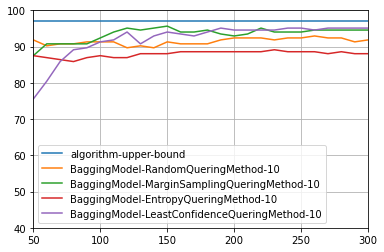

In [37]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 25 novih elemenata za obuku

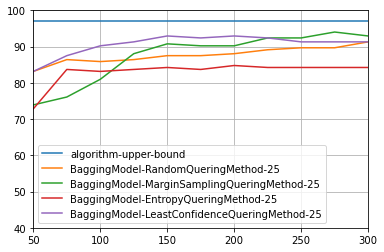

In [38]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

Prikaz obucavanja modela, pri selektovanju 50 novih elemenata za obuku

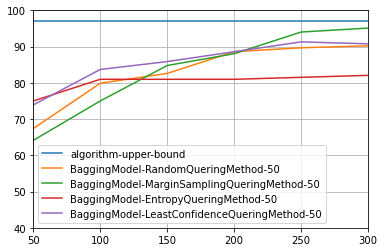

In [39]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

In [40]:
max_queried = 700

repeats = 1


models = [BaggingModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod, LeastConfidenceQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 700
Count = 1, using model = BaggingModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [4 6] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  1

Accuracy for 43.478261 
updated train set: (20, 25) (20,) unique(labels): [13  7] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  2

Accuracy for 79.891304 
updated train set: (30, 25) (30,) unique(labels): [21  9] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  3

Accuracy for 82.065217 
updated train set: (40, 25) (40,) unique(labels): [29 11] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training bagging model...
-------

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  22

Accuracy for 90.217391 
updated train set: (230, 25) (230,) unique(labels): [160  70] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  23

Accuracy for 91.847826 
updated train set: (240, 25) (240,) unique(labels): [166  74] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  24

Accuracy for 91.304348 
updated train set: (250, 25) (250,) unique(labels): [173  77] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  25

Accuracy for 91.847826 
updated train set: (260, 25) (260,) unique(labels): [181  79] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  26

Accuracy for 91.847826 
updated train set: (270, 25) (270,) unique(labels): [188  82] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  27

Accuracy for 90.760870 
updated train set: (280, 25) (280,) unique(labels): [194  86] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  28

Accuracy for 91.847826 
updated train set: (290, 25) (290,) unique(labels): [204  86] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  29

Accuracy for 91.847826 
updated train set: (300, 25) (300,) unique(labels): [209  91] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  30

Accuracy for 91.847826 
updated train set: (310, 25) (310,) unique(labels): [215  95] [0 1]
Train set: (310, 25) y: (310,)
Val   set: (426, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  31

Accuracy for 92.391304 
updated train set: (320, 25) (320,) unique(labels): [223  97] [0 1]
Train set: (320, 25) y: (320,)
Val   set: (416, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  32

Accuracy for 91.847826 
updated train set: (330, 25) (330,) unique(labels): [232  98] [0 1]
Train set: (330, 25) y: (330,)
Val   set: (406, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  33

Accuracy for 92.391304 
updated train set: (340, 25) (340,) unique(labels): [242  98] [0 1]
Train set: (340, 25) y: (340,)
Val   set: (396, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  34

Accuracy for 91.847826 
updated train set: (350, 25) (350,) unique(labels): [249 101] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  35

Accuracy for 91.847826 
updated train set: (360, 25) (360,) unique(labels): [255 105] [0 1]
Train set: (360, 25) y: (360,)
Val   set: (376, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  36

Accuracy for 91.847826 
updated train set: (370, 25) (370,) unique(labels): [262 108] [0 1]
Train set: (370, 25) y: (370,)
Val   set: (366, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  37

Accuracy for 91.847826 
updated train set: (380, 25) (380,) unique(labels): [268 112] [0 1]
Train set: (380, 25) y: (380,)
Val   set: (356, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  38

Accuracy for 91.847826 
updated train set: (390, 25) (390,) unique(labels): [274 116] [0 1]
Train set: (390, 25) y: (390,)
Val   set: (346, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  39

Accuracy for 92.391304 
updated train set: (400, 25) (400,) unique(labels): [281 119] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  40

Accuracy for 92.391304 
updated train set: (410, 25) (410,) unique(labels): [287 123] [0 1]
Train set: (410, 25) y: (410,)
Val   set: (326, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  41

Accuracy for 92.934783 
updated train set: (420, 25) (420,) unique(labels): [293 127] [0 1]
Train set: (420, 25) y: (420,)
Val   set: (316, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  42

Accuracy for 92.391304 
updated train set: (430, 25) (430,) unique(labels): [300 130] [0 1]
Train set: (430, 25) y: (430,)
Val   set: (306, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  43

Accuracy for 92.391304 
updated train set: (440, 25) (440,) unique(labels): [309 131] [0 1]
Train set: (440, 25) y: (440,)
Val   set: (296, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  44

Accuracy for 92.934783 
updated train set: (450, 25) (450,) unique(labels): [319 131] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  45

Accuracy for 92.934783 
updated train set: (460, 25) (460,) unique(labels): [326 134] [0 1]
Train set: (460, 25) y: (460,)
Val   set: (276, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  46

Accuracy for 92.934783 
updated train set: (470, 25) (470,) unique(labels): [333 137] [0 1]
Train set: (470, 25) y: (470,)
Val   set: (266, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  47

Accuracy for 93.478261 
updated train set: (480, 25) (480,) unique(labels): [340 140] [0 1]
Train set: (480, 25) y: (480,)
Val   set: (256, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  48

Accuracy for 92.934783 
updated train set: (490, 25) (490,) unique(labels): [348 142] [0 1]
Train set: (490, 25) y: (490,)
Val   set: (246, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  49

Accuracy for 94.021739 
updated train set: (500, 25) (500,) unique(labels): [356 144] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  50

Accuracy for 94.021739 
updated train set: (510, 25) (510,) unique(labels): [365 145] [0 1]
Train set: (510, 25) y: (510,)
Val   set: (226, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  51

Accuracy for 93.478261 
updated train set: (520, 25) (520,) unique(labels): [371 149] [0 1]
Train set: (520, 25) y: (520,)
Val   set: (216, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  52

Accuracy for 92.934783 
updated train set: (530, 25) (530,) unique(labels): [378 152] [0 1]
Train set: (530, 25) y: (530,)
Val   set: (206, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  53

Accuracy for 94.021739 
updated train set: (540, 25) (540,) unique(labels): [387 153] [0 1]
Train set: (540, 25) y: (540,)
Val   set: (196, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  54

Accuracy for 93.478261 
updated train set: (550, 25) (550,) unique(labels): [395 155] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  55

Accuracy for 93.478261 
updated train set: (560, 25) (560,) unique(labels): [402 158] [0 1]
Train set: (560, 25) y: (560,)
Val   set: (176, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  56

Accuracy for 92.934783 
updated train set: (570, 25) (570,) unique(labels): [412 158] [0 1]
Train set: (570, 25) y: (570,)
Val   set: (166, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  57

Accuracy for 93.478261 
updated train set: (580, 25) (580,) unique(labels): [421 159] [0 1]
Train set: (580, 25) y: (580,)
Val   set: (156, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  58

Accuracy for 92.934783 
updated train set: (590, 25) (590,) unique(labels): [428 162] [0 1]
Train set: (590, 25) y: (590,)
Val   set: (146, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  59

Accuracy for 93.478261 
updated train set: (600, 25) (600,) unique(labels): [437 163] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  60

Accuracy for 93.478261 
updated train set: (610, 25) (610,) unique(labels): [446 164] [0 1]
Train set: (610, 25) y: (610,)
Val   set: (126, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  61

Accuracy for 93.478261 
updated train set: (620, 25) (620,) unique(labels): [453 167] [0 1]
Train set: (620, 25) y: (620,)
Val   set: (116, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  62

Accuracy for 92.391304 
updated train set: (630, 25) (630,) unique(labels): [457 173] [0 1]
Train set: (630, 25) y: (630,)
Val   set: (106, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  63

Accuracy for 93.478261 
updated train set: (640, 25) (640,) unique(labels): [464 176] [0 1]
Train set: (640, 25) y: (640,)
Val   set: (96, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  64

Accuracy for 94.021739 
updated train set: (650, 25) (650,) unique(labels): [472 178] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  65

Accuracy for 93.478261 
updated train set: (660, 25) (660,) unique(labels): [481 179] [0 1]
Train set: (660, 25) y: (660,)
Val   set: (76, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  66

Accuracy for 93.478261 
updated train set: (670, 25) (670,) unique(labels): [487 183] [0 1]
Train set: (670, 25) y: (670,)
Val   set: (66, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  67

Accuracy for 92.934783 
updated train set: (680, 25) (680,) unique(labels): [494 186] [0 1]
Train set: (680, 25) y: (680,)
Val   set: (56, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  68

Accuracy for 92.934783 
updated train set: (690, 25) (690,) unique(labels): [501 189] [0 1]
Train set: (690, 25) y: (690,)
Val   set: (46, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  69

Accuracy for 92.391304 
updated train set: (700, 25) (700,) unique(labels): [507 193] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  70

Accuracy for 92.391304 
final active learning accuracies [43.47826086956522, 79.8913043478261, 82.06521739130434, 85.32608695652173, 87.5, 88.04347826086956, 89.67391304347827, 89.67391304347827, 88.58695652173914, 89.13043478260869, 90.21739130434783, 90.76086956521739, 89.67391304347827, 89.67391304347827, 89.67391304347827, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 91.30434782608695, 90.76086956521739, 90.21739130434783, 91.84782608695652, 91.30434782608695, 91.84782608695652, 91.84782608695652, 90.76086956521739, 91.84782608695652, 91.84782608695652, 91.84782608695652, 92.3913043478261, 91.84782608695652, 92.3913043478261, 91.84782608695652, 91.84782608695652, 91.84782608695652, 91.84782608695652, 91.84782608695652, 92.3913043478261, 92.3913043478261, 92.93478260869566, 92.3913043478261, 92.3913043478261, 92.93478260869566, 92.93478260869566, 92.93478260869566, 93.47826086956522, 92.93478260869

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  10

Accuracy for 94.021739 
updated train set: (275, 25) (275,) unique(labels): [205  70] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  11

Accuracy for 90.760870 
updated train set: (300, 25) (300,) unique(labels): [227  73] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 90.217391 
updated train set: (325, 25) (325,) unique(labels): [246  79] [0 1]
Train set: (325, 25) y: (325,)
Val   set: (411, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 90.217391 
updated train set: (350, 25) (350,) unique(labels): [262  88] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 90.217391 
updated train set: (375, 25) (375,) unique(labels): [280  95] [0 1]
Train set: (375, 25) y: (375,)
Val   set: (361, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  15

Accuracy for 89.673913 
updated train set: (400, 25) (400,) unique(labels): [295 105] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  16

Accuracy for 89.673913 
updated train set: (425, 25) (425,) unique(labels): [310 115] [0 1]
Train set: (425, 25) y: (425,)
Val   set: (311, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  17

Accuracy for 90.217391 
updated train set: (450, 25) (450,) unique(labels): [328 122] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  18

Accuracy for 90.760870 
updated train set: (475, 25) (475,) unique(labels): [348 127] [0 1]
Train set: (475, 25) y: (475,)
Val   set: (261, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  19

Accuracy for 91.304348 
updated train set: (500, 25) (500,) unique(labels): [369 131] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  20

Accuracy for 90.760870 
updated train set: (525, 25) (525,) unique(labels): [389 136] [0 1]
Train set: (525, 25) y: (525,)
Val   set: (211, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  21

Accuracy for 91.304348 
updated train set: (550, 25) (550,) unique(labels): [411 139] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  22

Accuracy for 90.217391 
updated train set: (575, 25) (575,) unique(labels): [432 143] [0 1]
Train set: (575, 25) y: (575,)
Val   set: (161, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  23

Accuracy for 90.217391 
updated train set: (600, 25) (600,) unique(labels): [446 154] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  24

Accuracy for 90.217391 
updated train set: (625, 25) (625,) unique(labels): [468 157] [0 1]
Train set: (625, 25) y: (625,)
Val   set: (111, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  25

Accuracy for 89.673913 
updated train set: (650, 25) (650,) unique(labels): [484 166] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  26

Accuracy for 90.217391 
updated train set: (675, 25) (675,) unique(labels): [502 173] [0 1]
Train set: (675, 25) y: (675,)
Val   set: (61, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 90.217391 
updated train set: (700, 25) (700,) unique(labels): [520 180] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 90.217391 
final active learning accuracies [64.13043478260869, 76.08695652173914, 80.97826086956522, 82.6086956521739, 86.95652173913044, 87.5, 91.30434782608695, 92.3913043478261, 91.30434782608695, 94.02173913043478, 90.76086956521739, 90.21739130434783, 90.21739130434783, 90.21739130434783, 89.67391304347827, 89.67391304347827, 90.21739130434783, 90.76086956521739, 91.30434782608695, 90.76086956521739, 91.30434782608695, 90.21739130434783, 90.21739130434783, 90.21739130434783, 89.67391304347827, 90.21739130434783, 90.21739130434783, 90.21739130434783]
saved Active-learning-experiment-2.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pk

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  3

Accuracy for 88.586957 
updated train set: (200, 25) (200,) unique(labels): [146  54] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 89.673913 
updated train set: (250, 25) (250,) unique(labels): [182  68] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 89.673913 
updated train set: (300, 25) (300,) unique(labels): [220  80] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 91.847826 
updated train set: (350, 25) (350,) unique(labels): [258  92] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 91.304348 
updated train set: (400, 25) (400,) unique(labels): [292 108] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 91.304348 
updated train set: (450, 25) (450,) unique(labels): [330 120] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 91.304348 
updated train set: (500, 25) (500,) unique(labels): [368 132] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  10

Accuracy for 91.847826 
updated train set: (550, 25) (550,) unique(labels): [404 146] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 92.391304 
updated train set: (600, 25) (600,) unique(labels): [444 156] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 91.847826 
updated train set: (650, 25) (650,) unique(labels): [482 168] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 91.847826 
updated train set: (700, 25) (700,) unique(labels): [518 182] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  14

Accuracy for 91.304348 
final active learning accuracies [72.28260869565217, 83.15217391304348, 88.58695652173914, 89.67391304347827, 89.67391304347827, 91.84782608695652, 91.30434782608695, 91.30434782608695, 91.30434782608695, 91.84782608695652, 92.3913043478261, 91.84782608695652, 91.84782608695652, 91.30434782608695]
saved Active-learning-experiment-3.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'Go

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  8

Accuracy for 87.500000 
updated train set: (90, 25) (90,) unique(labels): [48 42] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 88.586957 
updated train set: (100, 25) (100,) unique(labels): [51 49] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 91.847826 
updated train set: (110, 25) (110,) unique(labels): [53 57] [0 1]
Train set: (110, 25) y: (110,)
Val   set: (626, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 91.304348 
updated train set: (120, 25) (120,) unique(labels): [54 66] [0 1]
Train set: (120, 25) y: (120,)
Val   set: (616, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 90.760870 
updated train set: (130, 25) (130,) unique(labels): [58 72] [0 1]
Train set: (130, 25) y: (130,)
Val   set: (606, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  13

Accuracy for 90.760870 
updated train set: (140, 25) (140,) unique(labels): [63 77] [0 1]
Train set: (140, 25) y: (140,)
Val   set: (596, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 91.304348 
updated train set: (150, 25) (150,) unique(labels): [69 81] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  15

Accuracy for 89.673913 
updated train set: (160, 25) (160,) unique(labels): [75 85] [0 1]
Train set: (160, 25) y: (160,)
Val   set: (576, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  16

Accuracy for 91.304348 
updated train set: (170, 25) (170,) unique(labels): [81 89] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  17

Accuracy for 90.760870 
updated train set: (180, 25) (180,) unique(labels): [85 95] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  18

Accuracy for 92.391304 
updated train set: (190, 25) (190,) unique(labels): [92 98] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  19

Accuracy for 90.760870 
updated train set: (200, 25) (200,) unique(labels): [ 99 101] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  20

Accuracy for 90.760870 
updated train set: (210, 25) (210,) unique(labels): [103 107] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  21

Accuracy for 91.304348 
updated train set: (220, 25) (220,) unique(labels): [110 110] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  22

Accuracy for 90.760870 
updated train set: (230, 25) (230,) unique(labels): [112 118] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  23

Accuracy for 91.847826 
updated train set: (240, 25) (240,) unique(labels): [121 119] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  24

Accuracy for 91.847826 
updated train set: (250, 25) (250,) unique(labels): [128 122] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  25

Accuracy for 90.760870 
updated train set: (260, 25) (260,) unique(labels): [133 127] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  26

Accuracy for 90.217391 
updated train set: (270, 25) (270,) unique(labels): [139 131] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 90.760870 
updated train set: (280, 25) (280,) unique(labels): [148 132] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 91.304348 
updated train set: (290, 25) (290,) unique(labels): [157 133] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  29

Accuracy for 91.304348 
updated train set: (300, 25) (300,) unique(labels): [165 135] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  30

Accuracy for 90.760870 
updated train set: (310, 25) (310,) unique(labels): [173 137] [0 1]
Train set: (310, 25) y: (310,)
Val   set: (426, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  31

Accuracy for 91.304348 
updated train set: (320, 25) (320,) unique(labels): [181 139] [0 1]
Train set: (320, 25) y: (320,)
Val   set: (416, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  32

Accuracy for 90.760870 
updated train set: (330, 25) (330,) unique(labels): [191 139] [0 1]
Train set: (330, 25) y: (330,)
Val   set: (406, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  33

Accuracy for 90.760870 
updated train set: (340, 25) (340,) unique(labels): [200 140] [0 1]
Train set: (340, 25) y: (340,)
Val   set: (396, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  34

Accuracy for 90.760870 
updated train set: (350, 25) (350,) unique(labels): [208 142] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  35

Accuracy for 90.760870 
updated train set: (360, 25) (360,) unique(labels): [216 144] [0 1]
Train set: (360, 25) y: (360,)
Val   set: (376, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  36

Accuracy for 91.304348 
updated train set: (370, 25) (370,) unique(labels): [225 145] [0 1]
Train set: (370, 25) y: (370,)
Val   set: (366, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  37

Accuracy for 91.304348 
updated train set: (380, 25) (380,) unique(labels): [235 145] [0 1]
Train set: (380, 25) y: (380,)
Val   set: (356, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  38

Accuracy for 90.760870 
updated train set: (390, 25) (390,) unique(labels): [245 145] [0 1]
Train set: (390, 25) y: (390,)
Val   set: (346, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  39

Accuracy for 90.760870 
updated train set: (400, 25) (400,) unique(labels): [255 145] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  40

Accuracy for 90.217391 
updated train set: (410, 25) (410,) unique(labels): [264 146] [0 1]
Train set: (410, 25) y: (410,)
Val   set: (326, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  41

Accuracy for 90.217391 
updated train set: (420, 25) (420,) unique(labels): [273 147] [0 1]
Train set: (420, 25) y: (420,)
Val   set: (316, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  42

Accuracy for 90.760870 
updated train set: (430, 25) (430,) unique(labels): [281 149] [0 1]
Train set: (430, 25) y: (430,)
Val   set: (306, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  43

Accuracy for 90.217391 
updated train set: (440, 25) (440,) unique(labels): [290 150] [0 1]
Train set: (440, 25) y: (440,)
Val   set: (296, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  44

Accuracy for 90.217391 
updated train set: (450, 25) (450,) unique(labels): [300 150] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  45

Accuracy for 89.673913 
updated train set: (460, 25) (460,) unique(labels): [307 153] [0 1]
Train set: (460, 25) y: (460,)
Val   set: (276, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  46

Accuracy for 90.760870 
updated train set: (470, 25) (470,) unique(labels): [317 153] [0 1]
Train set: (470, 25) y: (470,)
Val   set: (266, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  47

Accuracy for 90.217391 
updated train set: (480, 25) (480,) unique(labels): [327 153] [0 1]
Train set: (480, 25) y: (480,)
Val   set: (256, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  48

Accuracy for 90.217391 
updated train set: (490, 25) (490,) unique(labels): [334 156] [0 1]
Train set: (490, 25) y: (490,)
Val   set: (246, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  49

Accuracy for 89.673913 
updated train set: (500, 25) (500,) unique(labels): [341 159] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  50

Accuracy for 90.760870 
updated train set: (510, 25) (510,) unique(labels): [351 159] [0 1]
Train set: (510, 25) y: (510,)
Val   set: (226, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  51

Accuracy for 89.673913 
updated train set: (520, 25) (520,) unique(labels): [359 161] [0 1]
Train set: (520, 25) y: (520,)
Val   set: (216, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  52

Accuracy for 89.673913 
updated train set: (530, 25) (530,) unique(labels): [368 162] [0 1]
Train set: (530, 25) y: (530,)
Val   set: (206, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  53

Accuracy for 89.673913 
updated train set: (540, 25) (540,) unique(labels): [375 165] [0 1]
Train set: (540, 25) y: (540,)
Val   set: (196, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  54

Accuracy for 89.673913 
updated train set: (550, 25) (550,) unique(labels): [384 166] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  55

Accuracy for 89.673913 
updated train set: (560, 25) (560,) unique(labels): [392 168] [0 1]
Train set: (560, 25) y: (560,)
Val   set: (176, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  56

Accuracy for 90.217391 
updated train set: (570, 25) (570,) unique(labels): [400 170] [0 1]
Train set: (570, 25) y: (570,)
Val   set: (166, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  57

Accuracy for 90.217391 
updated train set: (580, 25) (580,) unique(labels): [407 173] [0 1]
Train set: (580, 25) y: (580,)
Val   set: (156, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  58

Accuracy for 90.217391 
updated train set: (590, 25) (590,) unique(labels): [417 173] [0 1]
Train set: (590, 25) y: (590,)
Val   set: (146, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  59

Accuracy for 90.217391 
updated train set: (600, 25) (600,) unique(labels): [427 173] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  60

Accuracy for 89.673913 
updated train set: (610, 25) (610,) unique(labels): [436 174] [0 1]
Train set: (610, 25) y: (610,)
Val   set: (126, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  61

Accuracy for 89.673913 
updated train set: (620, 25) (620,) unique(labels): [445 175] [0 1]
Train set: (620, 25) y: (620,)
Val   set: (116, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  62

Accuracy for 89.673913 
updated train set: (630, 25) (630,) unique(labels): [451 179] [0 1]
Train set: (630, 25) y: (630,)
Val   set: (106, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  63

Accuracy for 89.673913 
updated train set: (640, 25) (640,) unique(labels): [459 181] [0 1]
Train set: (640, 25) y: (640,)
Val   set: (96, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  64

Accuracy for 89.130435 
updated train set: (650, 25) (650,) unique(labels): [468 182] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  65

Accuracy for 89.673913 
updated train set: (660, 25) (660,) unique(labels): [475 185] [0 1]
Train set: (660, 25) y: (660,)
Val   set: (76, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  66

Accuracy for 90.217391 
updated train set: (670, 25) (670,) unique(labels): [482 188] [0 1]
Train set: (670, 25) y: (670,)
Val   set: (66, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  67

Accuracy for 89.673913 
updated train set: (680, 25) (680,) unique(labels): [491 189] [0 1]
Train set: (680, 25) y: (680,)
Val   set: (56, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  68

Accuracy for 89.130435 
updated train set: (690, 25) (690,) unique(labels): [500 190] [0 1]
Train set: (690, 25) y: (690,)
Val   set: (46, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  69

Accuracy for 89.130435 
updated train set: (700, 25) (700,) unique(labels): [509 191] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  70

Accuracy for 89.673913 
final active learning accuracies [58.69565217391305, 76.08695652173914, 83.15217391304348, 83.15217391304348, 87.5, 87.5, 87.5, 87.5, 88.58695652173914, 91.84782608695652, 91.30434782608695, 90.76086956521739, 90.76086956521739, 91.30434782608695, 89.67391304347827, 91.30434782608695, 90.76086956521739, 92.3913043478261, 90.76086956521739, 90.76086956521739, 91.30434782608695, 90.76086956521739, 91.84782608695652, 91.84782608695652, 90.76086956521739, 90.21739130434783, 90.76086956521739, 91.30434782608695, 91.30434782608695, 90.76086956521739, 91.30434782608695, 90.76086956521739, 90.76086956521739, 90.76086956521739, 90.76086956521739, 91.30434782608695, 91.30434782608695, 90.76086956521739, 90.76086956521739, 90.21739130434783, 90.21739130434783, 90.76086956521739, 90.21739130434783, 90.21739130434783, 89.67391304347827, 90.76086956521739, 90.21739130434783, 90.21739130434783, 89.67391304347827, 90.760869

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  7

Accuracy for 91.847826 
updated train set: (200, 25) (200,) unique(labels): [108  92] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 90.760870 
updated train set: (225, 25) (225,) unique(labels): [116 109] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 93.478261 
updated train set: (250, 25) (250,) unique(labels): [128 122] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 94.021739 
updated train set: (275, 25) (275,) unique(labels): [146 129] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 94.021739 
updated train set: (300, 25) (300,) unique(labels): [164 136] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 93.478261 
updated train set: (325, 25) (325,) unique(labels): [185 140] [0 1]
Train set: (325, 25) y: (325,)
Val   set: (411, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 93.478261 
updated train set: (350, 25) (350,) unique(labels): [207 143] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 93.478261 
updated train set: (375, 25) (375,) unique(labels): [230 145] [0 1]
Train set: (375, 25) y: (375,)
Val   set: (361, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  15

Accuracy for 93.478261 
updated train set: (400, 25) (400,) unique(labels): [252 148] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  16

Accuracy for 93.478261 
updated train set: (425, 25) (425,) unique(labels): [274 151] [0 1]
Train set: (425, 25) y: (425,)
Val   set: (311, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  17

Accuracy for 93.478261 
updated train set: (450, 25) (450,) unique(labels): [297 153] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  18

Accuracy for 93.478261 
updated train set: (475, 25) (475,) unique(labels): [318 157] [0 1]
Train set: (475, 25) y: (475,)
Val   set: (261, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  19

Accuracy for 93.478261 
updated train set: (500, 25) (500,) unique(labels): [340 160] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  20

Accuracy for 93.478261 
updated train set: (525, 25) (525,) unique(labels): [361 164] [0 1]
Train set: (525, 25) y: (525,)
Val   set: (211, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  21

Accuracy for 94.021739 
updated train set: (550, 25) (550,) unique(labels): [384 166] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  22

Accuracy for 94.565217 
updated train set: (575, 25) (575,) unique(labels): [404 171] [0 1]
Train set: (575, 25) y: (575,)
Val   set: (161, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  23

Accuracy for 93.478261 
updated train set: (600, 25) (600,) unique(labels): [428 172] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  24

Accuracy for 93.478261 
updated train set: (625, 25) (625,) unique(labels): [449 176] [0 1]
Train set: (625, 25) y: (625,)
Val   set: (111, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  25

Accuracy for 93.478261 
updated train set: (650, 25) (650,) unique(labels): [469 181] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  26

Accuracy for 92.934783 
updated train set: (675, 25) (675,) unique(labels): [489 186] [0 1]
Train set: (675, 25) y: (675,)
Val   set: (61, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 93.478261 
updated train set: (700, 25) (700,) unique(labels): [513 187] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 93.478261 
final active learning accuracies [49.45652173913043, 69.02173913043478, 74.45652173913044, 82.06521739130434, 88.58695652173914, 89.13043478260869, 91.84782608695652, 90.76086956521739, 93.47826086956522, 94.02173913043478, 94.02173913043478, 93.47826086956522, 93.47826086956522, 93.47826086956522, 93.47826086956522, 93.47826086956522, 93.47826086956522, 93.47826086956522, 93.47826086956522, 93.47826086956522, 94.02173913043478, 94.56521739130434, 93.47826086956522, 93.47826086956522, 93.47826086956522, 92.93478260869566, 93.47826086956522, 93.47826086956522]
saved Active-learning-experiment-5.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-

-----------------------------------
In iteration:  2

Accuracy for 83.695652 
updated train set: (150, 25) (150,) unique(labels): [75 75] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  3

Accuracy for 87.500000 
updated train set: (200, 25) (200,) unique(labels): [ 96 104] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  4

Accuracy for 90.760870 
updated train set: (250, 25) (250,) unique(labels): [113 137] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 92.934783 
updated train set: (300, 25) (300,) unique(labels): [147 153] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 91.847826 
updated train set: (350, 25) (350,) unique(labels): [183 167] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 91.847826 
updated train set: (400, 25) (400,) unique(labels): [230 170] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 91.847826 
updated train set: (450, 25) (450,) unique(labels): [275 175] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 91.304348 
updated train set: (500, 25) (500,) unique(labels): [321 179] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 92.391304 
updated train set: (550, 25) (550,) unique(labels): [367 183] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 90.217391 
updated train set: (600, 25) (600,) unique(labels): [413 187] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 91.304348 
updated train set: (650, 25) (650,) unique(labels): [459 191] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 91.847826 
updated train set: (700, 25) (700,) unique(labels): [508 192] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 92.391304 
final active learning accuracies [73.91304347826086, 83.69565217391305, 87.5, 90.76086956521739, 92.93478260869566, 91.84782608695652, 91.84782608695652, 91.84782608695652, 91.30434782608695, 92.3913043478261, 90.21739130434783, 91.30434782608695, 91.84782608695652, 92.3913043478261]
saved Active-learning-experiment-6.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb'

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 60.869565 
verovatnoce: 
[[0.83 0.17]
 [0.9  0.1 ]
 [0.47 0.53]
 ...
 [0.98 0.02]
 [0.23 0.77]
 [0.99 0.01]]
izracunato: 
[0.65770478 0.46899559 0.99740159 0.40217919 0.89317346 0.85545081
 0.84146464 0.58423881        nan 0.58423881 0.65770478 0.81127812
 0.81127812 0.74148274 0.46899559 0.85545081 0.82674637 0.49991596
 0.98581504 0.14144054 0.85545081 0.74148274 0.08079314 0.40217919
 0.81127812 0.14144054 0.70147146 0.65770478 0.86872125        nan
 0.86872125 0.24229219 0.52936087 0.28639696        nan 0.95067209
 0.74148274 0.9248187  0.99971144 0.85545081 0.08079314 0.81127812
        nan 0.19439186 0.91492637        nan 0.65770478 0.79504028
 0.99537844 0.95067209 0.82674637 0.97095059 0.43646982        nan
 0.08079314 0.14144054 0.46899559 0.9248187  0.84146464 0.82674637
 0.98958752 0.79504028 0.96479955 0.40217919        nan 0.19439186
 0.93406806 0.65770478 0.8812909  0.94268319 0.70147146 0.55743819
 0.1943

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 64.673913 
verovatnoce: 
[[0.8  0.2 ]
 [0.94 0.06]
 [0.61 0.39]
 ...
 [0.93 0.07]
 [0.46 0.54]
 [0.99 0.01]]
izracunato: 
[0.72192809 0.32744492 0.96479955 0.82674637 0.96479955 0.84146464
 0.9814539  0.90438146        nan 0.32744492 0.95067209 0.89317346
 0.90438146 0.6098403  0.89317346 0.9814539  0.89317346 0.49991596
 0.68007705 0.99537844 0.79504028 0.8812909  0.55743819 0.68007705
 0.9248187  0.43646982 0.93406806 0.99740159 0.91492637 0.43646982
 0.97095059        nan 0.24229219 0.95804202        nan 0.7780113
 0.7780113  0.98581504 0.90438146 0.86872125        nan 0.52936087
 0.85545081 0.96479955 0.9248187  1.         0.9814539  0.74148274
 0.97095059 0.91492637 0.43646982 0.19439186 0.24229219 0.63430955
 0.52936087 0.46899559 0.99740159 0.68007705 0.94268319 0.91492637
 0.91492637 0.40217919        nan 0.14144054 0.99971144 0.99884554
 0.91492637 0.97095059 0.68007705 0.86872125 0.32744492 0.49991596
 0.28639

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 68.478261 
verovatnoce: 
[[0.81 0.19]
 [0.97 0.03]
 [0.61 0.39]
 ...
 [0.95 0.05]
 [0.32 0.68]
 [0.98 0.02]]
izracunato: 
[0.70147146 0.19439186 0.96479955 0.99277445 0.95804202 0.95067209
 0.9814539  0.74148274 0.08079314 0.70147146 0.99277445 0.85545081
 0.86872125 0.6098403  0.81127812 0.95067209 0.85545081 0.58423881
 0.74148274 0.98958752 0.65770478 0.81127812 0.28639696 0.43646982
 0.86872125 0.14144054 0.99537844 0.99277445 0.9248187  0.40217919
 0.98958752 0.55743819 0.86872125 0.79504028 0.84146464 0.7780113
 0.94268319 0.86872125        nan 0.68007705 0.7601675  0.94268319
 0.90438146 0.90438146 0.98958752 0.99884554 0.99740159 0.8812909
 0.52936087 0.19439186        nan 0.28639696 0.68007705 0.79504028
 0.99740159 0.84146464 0.94268319 0.58423881 0.8812909  0.43646982
        nan 0.32744492 0.98958752 0.82674637 0.99537844 0.99740159
 0.24229219 0.86872125 0.28639696 0.68007705 0.40217919 0.28639696
        n

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 69.021739 
verovatnoce: 
[[0.85 0.15]
 [0.98 0.02]
 [0.64 0.36]
 ...
 [0.98 0.02]
 [0.36 0.64]
 [1.   0.  ]]
izracunato: 
[0.6098403  0.14144054 0.94268319 0.99740159 0.94268319 0.9248187
 0.94268319 0.72192809 0.08079314 0.63430955 0.99277445 0.86872125
 0.8812909  0.40217919 0.85545081 0.96479955 0.86872125 0.40217919
 0.6098403  0.98958752 0.65770478 0.82674637 0.28639696 0.43646982
 0.91492637 0.08079314 0.99884554 0.99537844 0.9248187  0.36592365
 0.99277445 0.32744492 0.8812909  0.74148274 0.82674637 0.7601675
 0.95804202 0.86872125        nan 0.70147146 0.70147146 0.90438146
 0.90438146 0.81127812 0.98958752 0.99740159 0.99277445 0.91492637
 0.52936087 0.19439186        nan 0.19439186 0.63430955 0.7780113
 0.99884554 0.79504028 0.89317346 0.58423881 0.74148274 0.43646982
        nan 0.08079314 0.99740159 0.79504028 0.98581504 0.99740159
 0.19439186 0.85545081 0.19439186 0.74148274 0.32744492 0.08079314
 0.0807931

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 70.652174 
verovatnoce: 
[[0.93 0.07]
 [0.98 0.02]
 [0.68 0.32]
 ...
 [0.89 0.11]
 [0.98 0.02]
 [0.37 0.63]]
izracunato: 
[0.36592365 0.14144054 0.90438146 0.98958752 0.95067209 0.96479955
 0.93406806 0.65770478        nan 0.58423881 0.99740159 0.94268319
 0.95067209 0.19439186 0.74148274 0.9814539  0.93406806 0.19439186
 0.65770478 0.98581504 0.58423881 0.79504028 0.24229219 0.43646982
 0.94268319 0.08079314 0.99537844 0.94268319 0.95067209 0.32744492
 0.97650047 0.24229219 0.8812909  0.68007705 0.81127812 0.72192809
 0.95067209 0.91492637        nan 0.52936087 0.7780113  0.85545081
 0.90438146 0.6098403  0.99537844 0.98958752 0.99740159 0.90438146
 0.52936087 0.14144054 0.14144054 0.49991596 0.81127812 0.99971144
 0.72192809 0.93406806 0.55743819 0.72192809 0.52936087        nan
 0.19439186 1.         0.70147146 0.99971144 0.99884554 0.14144054
 0.74148274 0.14144054 0.68007705 0.32744492        nan 0.08079314
 0.9988

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  7

Accuracy for 71.195652 
verovatnoce: 
[[0.93 0.07]
 [0.99 0.01]
 [0.68 0.32]
 ...
 [0.91 0.09]
 [0.99 0.01]
 [0.3  0.7 ]]
izracunato: 
[0.36592365 0.08079314 0.90438146 0.99277445 0.9248187  0.95067209
 0.91492637 0.63430955        nan 0.40217919 0.97650047 0.95804202
 0.97650047        nan 0.7780113  0.99277445 0.95804202 0.08079314
 0.72192809 0.99740159 0.68007705 0.55743819 0.08079314 0.24229219
 0.9248187         nan 0.94268319 0.82674637 0.94268319 0.32744492
 0.99971144 0.14144054 0.86872125 0.52936087 0.68007705 0.72192809
 0.9248187  0.8812909         nan 0.28639696 0.79504028 0.93406806
 0.9248187  0.32744492 0.97650047 0.93406806 0.99277445 0.97650047
 0.46899559        nan 0.14144054 0.32744492 0.82674637 0.99740159
 0.40217919 0.90438146 0.52936087 0.7601675  0.65770478        nan
 0.14144054 0.99971144 0.49991596 0.99971144 0.99740159 0.19439186
 0.6098403  0.19439186 0.55743819 0.19439186        nan        nan
 0.9988

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  8

Accuracy for 74.456522 
verovatnoce: 
[[0.94 0.06]
 [0.99 0.01]
 [0.67 0.33]
 ...
 [0.9  0.1 ]
 [0.98 0.02]
 [0.36 0.64]]
izracunato: 
[0.32744492 0.08079314 0.91492637 0.99277445 0.9248187  0.96479955
 0.91492637 0.6098403         nan 0.43646982 0.97095059 0.96479955
 0.97650047        nan 0.79504028 0.99971144 0.96479955        nan
 0.70147146 0.99884554 0.65770478 0.70147146 0.08079314 0.19439186
 0.89317346        nan 0.95067209 0.84146464 0.97095059 0.28639696
 0.99971144 0.08079314 0.82674637 0.58423881 0.65770478 0.68007705
 0.93406806 0.91492637        nan 0.24229219 0.74148274 0.91492637
 0.8812909  0.19439186 0.98958752 0.9248187  0.99537844 0.9814539
 0.43646982        nan 0.08079314 0.40217919 0.81127812 0.99537844
 0.36592365 0.89317346 0.43646982 0.70147146 0.70147146 0.08079314
 0.99277445 0.40217919 0.99884554 0.98581504 0.24229219 0.49991596
 0.19439186 0.52936087 0.14144054 0.99740159 0.19439186 0.19439186
 0.86872

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  9

Accuracy for 74.456522 
verovatnoce: 
[[0.97 0.03]
 [0.99 0.01]
 [0.66 0.34]
 ...
 [0.92 0.08]
 [0.99 0.01]
 [0.37 0.63]]
izracunato: 
[0.19439186 0.08079314 0.9248187  0.98581504 0.95067209 0.97095059
 0.93406806 0.55743819        nan 0.32744492 0.95804202 0.97095059
 0.99277445        nan 0.7780113  1.         0.97650047        nan
 0.70147146 0.99971144 0.65770478 0.58423881 0.14144054 0.19439186
 0.91492637        nan 0.91492637 0.82674637 0.97095059 0.32744492
 0.99740159 0.14144054 0.86872125 0.58423881 0.65770478 0.63430955
 0.91492637 0.9248187         nan 0.08079314 0.82674637 0.91492637
 0.85545081 0.14144054 0.9814539  0.93406806 0.97650047 0.9814539
 0.40217919 0.14144054 0.43646982 0.81127812 0.98958752 0.28639696
 0.89317346 0.40217919 0.68007705 0.74148274 0.08079314 0.99537844
 0.32744492 0.98958752 0.99740159 0.24229219 0.40217919 0.19439186
 0.43646982        nan 0.99884554 0.19439186 0.14144054 0.8812909
 0.499915

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  10

Accuracy for 76.630435 
verovatnoce: 
[[0.99 0.01]
 [0.99 0.01]
 [0.68 0.32]
 ...
 [0.93 0.07]
 [0.99 0.01]
 [0.44 0.56]]
izracunato: 
[0.08079314 0.08079314 0.90438146 0.99277445 0.93406806 0.96479955
 0.8812909  0.55743819        nan 0.28639696 0.94268319 0.97650047
 0.99971144        nan 0.74148274 0.99537844 0.98581504 0.70147146
 0.99884554 0.70147146 0.65770478 0.14144054 0.08079314 0.90438146
        nan 0.90438146 0.79504028 0.95804202 0.28639696 0.98581504
 0.08079314 0.86872125 0.58423881 0.68007705 0.58423881 0.8812909
 0.9248187         nan 0.08079314 0.72192809 0.9248187  0.85545081
 0.08079314 0.9814539  0.93406806 0.98958752 0.99277445 0.49991596
 0.14144054 0.24229219 0.81127812 0.98958752 0.32744492 0.85545081
 0.32744492 0.58423881 0.68007705 0.08079314 0.99740159 0.28639696
 0.99277445 0.99971144 0.14144054 0.46899559 0.19439186 0.43646982
 0.99537844 0.19439186 0.08079314 0.8812909  0.43646982 0.55743819
 0.4689

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  11

Accuracy for 76.086957 
verovatnoce: 
[[0.98 0.02]
 [0.99 0.01]
 [0.72 0.28]
 ...
 [0.92 0.08]
 [0.99 0.01]
 [0.46 0.54]]
izracunato: 
[0.14144054 0.08079314 0.85545081 1.         0.91492637 0.96479955
 0.86872125 0.49991596        nan        nan 0.90438146 0.98581504
 0.99884554        nan 0.82674637 0.99277445 0.98958752 0.74148274
 0.99277445 0.68007705 0.6098403  0.08079314 0.08079314 0.9248187
        nan 0.7780113  0.85545081 0.9814539  0.28639696 0.97650047
        nan 0.8812909  0.28639696 0.52936087 0.40217919 0.90438146
 0.9248187         nan 0.08079314 0.70147146 0.94268319 0.7780113
 0.08079314 0.97650047 0.91492637 0.99277445 0.99740159 0.43646982
        nan 0.19439186 0.74148274 0.9814539  0.28639696 0.85545081
 0.36592365 0.52936087 0.81127812 0.08079314 0.99971144 0.36592365
 0.98958752 0.99971144 0.14144054 0.19439186 0.19439186 0.36592365
 0.99740159 0.19439186 0.08079314 0.90438146 0.36592365 0.52936087
 0.46899

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  12

Accuracy for 75.543478 
verovatnoce: 
[[0.97 0.03]
 [0.99 0.01]
 [0.76 0.24]
 ...
 [0.94 0.06]
 [0.99 0.01]
 [0.49 0.51]]
izracunato: 
[0.19439186 0.08079314 0.79504028 0.99884554 0.89317346 0.95804202
 0.8812909  0.55743819        nan        nan 0.91492637 0.98581504
 0.99884554        nan 0.81127812 0.98958752 0.98581504 0.68007705
 0.99277445 0.70147146 0.65770478 0.08079314 0.08079314 0.9248187
        nan 0.84146464 0.84146464 0.97095059 0.28639696 0.97650047
 0.89317346 0.19439186 0.52936087 0.46899559 0.8812909  0.9248187
        nan 0.72192809 0.93406806 0.7780113         nan 0.95804202
 0.93406806 0.99740159 0.99277445 0.40217919        nan 0.19439186
 0.72192809 0.9814539  0.28639696 0.84146464 0.40217919 0.49991596
 0.79504028        nan 0.99884554 0.36592365 0.99277445 1.
 0.14144054 0.14144054 0.19439186 0.36592365 0.98958752 0.19439186
        nan 0.8812909  0.40217919 0.49991596 0.46899559 0.94268319
 0.74148274 0.84

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  13

Accuracy for 79.347826 
verovatnoce: 
[[0.96 0.04]
 [1.   0.  ]
 [0.74 0.26]
 ...
 [0.83 0.17]
 [0.99 0.01]
 [0.33 0.67]]
izracunato: 
[0.24229219        nan 0.82674637 0.98958752 0.94268319 0.99884554
 0.85545081 0.43646982        nan        nan 0.99884554 0.99971144
 0.97650047        nan 0.82674637 0.99884554 0.99971144 0.68007705
 0.93406806 0.55743819 0.6098403  0.08079314 0.14144054 0.95804202
        nan 0.90438146 0.70147146 0.99884554 0.28639696 0.98581504
 0.82674637 0.99277445 0.36592365 0.96479955 0.94268319 0.95067209
        nan 0.52936087 0.72192809 0.91492637 0.97650047 0.81127812
 0.99884554 0.99277445 0.46899559 0.40217919 0.08079314 0.90438146
 0.94268319 0.14144054 0.93406806 0.52936087 0.58423881 0.79504028
 0.08079314 0.99537844 0.19439186 0.93406806 0.99971144 0.14144054
 0.08079314 0.08079314 0.99971144 0.99971144 0.08079314 0.40217919
 0.95804202 0.32744492 0.19439186 0.55743819 0.99740159 0.58423881
 0.841

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  14

Accuracy for 79.891304 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [0.79 0.21]
 ...
 [0.88 0.12]
 [1.   0.  ]
 [0.37 0.63]]
izracunato: 
[0.19439186        nan 0.74148274 0.97095059 0.94268319 0.99740159
 0.85545081 0.32744492        nan        nan 1.         0.99884554
 0.97095059        nan 0.86872125 0.99740159 1.         0.68007705
 0.9248187  0.49991596 0.63430955        nan 0.08079314 0.96479955
 0.93406806 0.65770478 0.99884554 0.24229219 0.98581504 0.79504028
 0.98958752 0.40217919 0.95804202 0.9248187  0.95067209        nan
 0.52936087 0.70147146 0.86872125 0.9248187  0.81127812 0.99884554
 0.98958752 0.43646982 0.40217919 0.08079314 0.90438146 0.93406806
 0.14144054 0.9248187  0.55743819 0.58423881 0.84146464        nan
 0.99971144 0.14144054 0.91492637 0.99740159 0.19439186 0.14144054
 0.08079314 0.99971144 0.99884554 0.08079314 0.43646982 0.96479955
 0.28639696 0.28639696 0.55743819 0.99971144 0.55743819 0.82674637
 1.   

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  15

Accuracy for 80.434783 
verovatnoce: 
[[0.99 0.01]
 [1.   0.  ]
 [0.82 0.18]
 ...
 [0.25 0.75]
 [0.9  0.1 ]
 [0.36 0.64]]
izracunato: 
[0.08079314        nan 0.68007705 0.96479955 0.95804202 0.99740159
 0.90438146 0.28639696        nan 0.99884554 1.         0.97095059
        nan 0.82674637 0.99884554 0.99884554 0.72192809 0.90438146
 0.55743819 0.58423881        nan 0.08079314 0.97095059 0.9248187
 0.58423881 0.99884554 0.19439186 0.97650047 0.7601675  0.98581504
 0.32744492 0.97095059 0.90438146 0.96479955        nan 0.43646982
 0.74148274 0.86872125 0.91492637 0.7601675  0.98958752 0.99740159
 0.40217919 0.40217919 0.08079314 0.86872125 0.95067209 0.08079314
 0.9248187  0.46899559 0.52936087 0.81127812        nan 0.99740159
 0.14144054 0.8812909  0.99740159 0.19439186        nan        nan
 0.99884554 0.99971144        nan 0.40217919 0.95067209 0.24229219
 0.24229219 0.58423881 0.99971144 0.49991596 0.84146464 0.99884554
 0.9248

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  16

Accuracy for 82.065217 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [0.86 0.14]
 ...
 [0.25 0.75]
 [0.94 0.06]
 [0.33 0.67]]
izracunato: 
[0.19439186        nan 0.58423881 0.97095059 0.97650047 0.99740159
 0.85545081 0.28639696        nan 1.         0.99740159 0.94268319
        nan 0.8812909  0.99537844 0.99277445 0.68007705 0.8812909
 0.52936087 0.63430955        nan 0.08079314 0.9814539  0.90438146
 0.58423881 0.99971144 0.08079314 0.97095059 0.70147146 0.97650047
 0.40217919 0.95067209 0.85545081 0.95804202        nan 0.43646982
 0.68007705 0.84146464 0.85545081 0.7601675  0.97095059 0.99884554
 0.36592365 0.40217919 0.08079314 0.85545081 0.95067209 0.08079314
 0.9248187  0.43646982 0.52936087 0.74148274        nan 1.
 0.14144054 0.85545081 0.98958752 0.19439186        nan        nan
 0.99740159 0.99884554 0.46899559 0.95067209 0.32744492 0.36592365
 0.58423881 0.99971144 0.49991596 0.82674637 0.99277445 0.90438146
 0.08079314 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  17

Accuracy for 83.152174 
verovatnoce: 
[[0.99 0.01]
 [1.   0.  ]
 [0.88 0.12]
 ...
 [0.24 0.76]
 [0.97 0.03]
 [0.33 0.67]]
izracunato: 
[0.08079314        nan 0.52936087 0.97095059 0.97650047 0.99740159
 0.8812909  0.24229219        nan 0.99537844 0.98581504 0.90438146
        nan 0.89317346 0.98958752 0.96479955 0.70147146 0.90438146
 0.52936087 0.58423881 0.08079314 0.08079314 0.9814539  0.91492637
 0.63430955 0.99971144 0.08079314 0.97095059 0.65770478 0.97650047
 0.43646982 0.95067209 0.85545081 0.97095059        nan 0.43646982
 0.74148274 0.84146464 0.82674637 0.79504028 0.95067209 0.99740159
 0.36592365 0.43646982 0.08079314 0.74148274 0.9248187         nan
 0.91492637 0.32744492 0.58423881 0.68007705        nan 0.98958752
 0.14144054 0.82674637 0.97650047 0.19439186        nan        nan
 0.98958752 0.9814539  0.49991596 0.97095059 0.32744492 0.32744492
 0.58423881 0.99971144 0.52936087 0.82674637 0.98958752 0.89317346
 0.080

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  18

Accuracy for 83.152174 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [0.91 0.09]
 ...
 [0.25 0.75]
 [0.97 0.03]
 [0.3  0.7 ]]
izracunato: 
[0.19439186        nan 0.43646982 0.95804202 0.97095059 0.99884554
 0.81127812 0.08079314        nan 0.99740159 0.98958752 0.8812909
        nan 0.93406806 0.9814539  0.95804202 0.68007705 0.91492637
 0.46899559 0.58423881 0.08079314        nan 0.99277445 0.91492637
 0.65770478 1.         0.08079314 0.9814539  0.65770478 0.9814539
 0.43646982 0.96479955 0.84146464 0.97095059        nan 0.40217919
 0.68007705 0.85545081 0.82674637 0.79504028 0.95804202 0.98958752
 0.14144054 0.36592365 0.08079314 0.74148274 0.91492637        nan
 0.90438146 0.28639696 0.58423881 0.6098403         nan 0.98581504
 0.08079314 0.82674637 0.96479955 0.14144054        nan 0.98581504
 0.9814539  0.52936087 0.96479955 0.24229219 0.32744492 0.52936087
 0.99971144 0.49991596 0.82674637 0.9814539  0.85545081 0.08079314
 0.77801

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  19

Accuracy for 84.782609 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [0.91 0.09]
 ...
 [0.24 0.76]
 [0.98 0.02]
 [0.26 0.74]]
izracunato: 
[0.19439186        nan 0.43646982 0.96479955 0.97650047 0.99884554
 0.84146464        nan        nan 0.99884554 0.97650047 0.84146464
        nan 0.8812909  0.9814539  0.94268319 0.68007705 0.93406806
 0.46899559 0.55743819 0.08079314 0.98958752 0.91492637 0.65770478
 0.99884554 0.08079314 0.95067209 0.52936087 0.98581504 0.28639696
 0.93406806 0.84146464 0.99277445 0.43646982 0.65770478 0.79504028
 0.7601675  0.7601675  0.95804202 0.98958752 0.08079314 0.32744492
 0.08079314 0.81127812 0.86872125        nan 0.93406806 0.28639696
 0.55743819 0.58423881        nan 0.99537844 0.08079314 0.7780113
 0.95804202 0.14144054        nan 0.98581504 0.98581504 0.49991596
 0.95804202 0.24229219 0.24229219 0.55743819 0.99884554 0.46899559
 0.84146464 0.98958752 0.84146464 0.08079314 0.70147146 0.19439186
 0.7014

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  20

Accuracy for 86.413043 
verovatnoce: 
[[0.93 0.07]
 [1.   0.  ]
 [0.96 0.04]
 ...
 [0.24 0.76]
 [0.99 0.01]
 [0.24 0.76]]
izracunato: 
[0.36592365        nan 0.24229219 0.99971144 0.94268319 0.95067209
 0.9814539  0.08079314        nan 0.84146464 0.72192809 0.58423881
        nan 0.99537844 0.74148274 0.68007705 0.79504028 0.9814539
 0.52936087 0.7601675  0.14144054 0.97095059 0.8812909  0.49991596
 0.95804202 0.82674637 0.99971144 0.65770478 0.9814539  0.24229219
 0.95804202 0.95067209 0.93406806 0.65770478 0.84146464 0.90438146
 0.55743819 0.82674637 0.9248187  0.99740159        nan 0.49991596
        nan 0.58423881 0.74148274 0.95804202 0.32744492 0.49991596
 1.         0.86872125 0.08079314 0.68007705 0.84146464 0.08079314
        nan 0.99537844 0.98958752 0.28639696 0.99740159 0.19439186
 0.14144054 0.40217919 0.99971144 0.63430955 0.8812909  0.99740159
 0.85545081 0.08079314 0.46899559 0.19439186 0.85545081 0.28639696
 0.6577

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  21

Accuracy for 86.413043 
verovatnoce: 
[[0.92 0.08]
 [1.   0.  ]
 [0.96 0.04]
 ...
 [0.23 0.77]
 [0.99 0.01]
 [0.24 0.76]]
izracunato: 
[0.40217919        nan 0.24229219 0.99971144 0.95067209 0.9248187
 0.97095059 0.08079314        nan 0.86872125 0.65770478 0.43646982
        nan 0.98958752 0.6098403  0.6098403  0.79504028 0.9814539
 0.52936087 0.7601675  0.14144054 0.96479955 0.89317346 0.52936087
 0.9248187  0.82674637 0.98958752 0.65770478 0.9814539  0.24229219
 0.96479955 0.96479955 0.8812909  0.63430955 0.84146464 0.90438146
 0.49991596 0.81127812 0.85545081 0.99277445 0.49991596        nan
 0.58423881 0.63430955 0.97095059 0.32744492 0.52936087 0.99971144
 0.8812909  0.08079314 0.63430955 0.82674637 0.08079314        nan
 0.99277445 0.98581504 0.32744492 0.99277445 0.19439186 0.14144054
 0.36592365 1.         0.63430955 0.89317346 0.99277445 0.79504028
 0.08079314 0.49991596 0.14144054 0.8812909  0.28639696 0.55743819
 0.40217

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  22

Accuracy for 86.413043 
verovatnoce: 
[[0.9  0.1 ]
 [1.   0.  ]
 [0.96 0.04]
 ...
 [0.23 0.77]
 [0.99 0.01]
 [0.25 0.75]]
izracunato: 
[0.46899559        nan 0.24229219 0.99884554 0.95804202 0.89317346
 0.96479955 0.08079314        nan 0.79504028 0.63430955 0.43646982
        nan 0.99740159 0.58423881 0.55743819 0.79504028 0.97650047
 0.49991596 0.7780113  0.14144054 0.96479955 0.90438146 0.52936087
 0.86872125 0.81127812 0.97095059 0.58423881 0.9814539  0.24229219
 0.97095059 0.97095059 0.85545081 0.6098403  0.82674637 0.90438146
 0.46899559 0.82674637 0.82674637 0.99740159 0.52936087        nan
 0.52936087 0.6098403  0.97095059 0.28639696 0.46899559 1.
 0.82674637 0.14144054 0.6098403  0.79504028 0.08079314        nan
 0.99884554 0.97095059 0.32744492 0.98581504 0.19439186 0.14144054
 0.40217919 0.98581504 0.63430955 0.89317346 0.99537844 0.72192809
 0.08079314 0.52936087 0.14144054 0.89317346 0.36592365 0.46899559
 0.28639696 0.

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  23

Accuracy for 86.413043 
verovatnoce: 
[[0.89 0.11]
 [1.   0.  ]
 [0.96 0.04]
 ...
 [0.22 0.78]
 [0.99 0.01]
 [0.23 0.77]]
izracunato: 
[0.49991596        nan 0.24229219 0.99884554 0.96479955 0.85545081
 0.95804202        nan        nan 0.81127812 0.55743819 0.43646982
 0.99277445 0.58423881 0.49991596 0.79504028 0.9814539  0.46899559
 0.79504028 0.14144054 0.95804202 0.90438146 0.52936087 0.84146464
 0.74148274 0.9814539  0.58423881 0.97095059 0.24229219 0.96479955
 0.97095059 0.85545081 0.55743819 0.79504028 0.90438146 0.49991596
 0.79504028 0.7601675  0.99277445 0.49991596        nan 0.52936087
 0.58423881 0.9814539  0.24229219 0.43646982 0.99884554 0.84146464
 0.08079314 0.6098403  0.7780113  0.08079314 0.99884554 0.96479955
 0.28639696 0.98581504 0.14144054 0.19439186 0.43646982 0.98958752
 0.68007705 0.89317346 0.99277445 0.68007705 0.08079314 0.55743819
 0.14144054 0.90438146 0.24229219 0.24229219 0.24229219 0.63430955
 0.985

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  24

Accuracy for 86.413043 
verovatnoce: 
[[0.9  0.1 ]
 [1.   0.  ]
 [0.96 0.04]
 [0.49 0.51]
 [0.41 0.59]
 [0.75 0.25]
 [0.38 0.62]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [0.89 0.11]
 [0.91 0.09]
 [0.54 0.46]
 [0.9  0.1 ]
 [0.92 0.08]
 [0.24 0.76]
 [0.58 0.42]
 [0.11 0.89]
 [0.8  0.2 ]
 [0.97 0.03]
 [0.4  0.6 ]
 [0.3  0.7 ]
 [0.89 0.11]
 [0.74 0.26]
 [0.77 0.23]
 [0.6  0.4 ]
 [0.89 0.11]
 [0.41 0.59]
 [0.96 0.04]
 [0.39 0.61]
 [0.43 0.57]
 [0.79 0.21]
 [0.86 0.14]
 [0.24 0.76]
 [0.31 0.69]
 [0.88 0.12]
 [0.77 0.23]
 [0.79 0.21]
 [0.47 0.53]
 [0.89 0.11]
 [1.   0.  ]
 [0.12 0.88]
 [0.87 0.13]
 [0.42 0.58]
 [0.06 0.94]
 [0.09 0.91]
 [0.52 0.48]
 [0.75 0.25]
 [0.98 0.02]
 [0.86 0.14]
 [0.76 0.24]
 [0.01 0.99]
 [0.5  0.5 ]
 [0.65 0.35]
 [0.95 0.05]
 [0.6  0.4 ]
 [0.99 0.01]
 [0.98 0.02]
 [0.08 0.92]
 [0.57 0.43]
 [0.84 0.16]
 [0.32 0.68]
 [0.46 0.54]
 [0.8  0.2 ]
 [1.   0.  ]
 [0.87 0.13]
 [0.99 0.01]
 [0.34 0.66]
 [0.95 0.05]
 [0.97 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  25

Accuracy for 86.413043 
verovatnoce: 
[[0.91 0.09]
 [1.   0.  ]
 [0.97 0.03]
 [0.49 0.51]
 [0.41 0.59]
 [0.76 0.24]
 [0.4  0.6 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [0.89 0.11]
 [0.91 0.09]
 [0.55 0.45]
 [0.89 0.11]
 [0.92 0.08]
 [0.25 0.75]
 [0.56 0.44]
 [0.09 0.91]
 [0.83 0.17]
 [0.97 0.03]
 [0.4  0.6 ]
 [0.29 0.71]
 [0.9  0.1 ]
 [0.75 0.25]
 [0.76 0.24]
 [0.62 0.38]
 [0.9  0.1 ]
 [0.42 0.58]
 [0.96 0.04]
 [0.4  0.6 ]
 [0.42 0.58]
 [0.83 0.17]
 [0.84 0.16]
 [0.23 0.77]
 [0.31 0.69]
 [0.88 0.12]
 [0.79 0.21]
 [0.85 0.15]
 [0.47 0.53]
 [0.88 0.12]
 [1.   0.  ]
 [0.11 0.89]
 [0.87 0.13]
 [0.4  0.6 ]
 [0.06 0.94]
 [0.1  0.9 ]
 [0.55 0.45]
 [0.74 0.26]
 [0.98 0.02]
 [0.88 0.12]
 [0.76 0.24]
 [0.01 0.99]
 [0.52 0.48]
 [0.67 0.33]
 [0.95 0.05]
 [0.62 0.38]
 [0.97 0.03]
 [0.98 0.02]
 [0.09 0.91]
 [0.55 0.45]
 [0.85 0.15]
 [0.32 0.68]
 [0.48 0.52]
 [0.83 0.17]
 [1.   0.  ]
 [0.91 0.09]
 [0.99 0.01]
 [0.34 0.66]
 [0.94 0.06]
 [0.97 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  26

Accuracy for 86.413043 
verovatnoce: 
[[0.93 0.07]
 [1.   0.  ]
 [0.99 0.01]
 [0.51 0.49]
 [0.5  0.5 ]
 [0.79 0.21]
 [0.32 0.68]
 [1.   0.  ]
 [1.   0.  ]
 [0.79 0.21]
 [0.92 0.08]
 [0.97 0.03]
 [0.45 0.55]
 [0.97 0.03]
 [0.93 0.07]
 [0.25 0.75]
 [0.64 0.36]
 [0.07 0.93]
 [0.91 0.09]
 [0.99 0.01]
 [0.46 0.54]
 [0.27 0.73]
 [0.97 0.03]
 [0.81 0.19]
 [0.59 0.41]
 [0.57 0.43]
 [0.86 0.14]
 [0.41 0.59]
 [0.87 0.13]
 [0.38 0.62]
 [0.52 0.48]
 [0.88 0.12]
 [0.84 0.16]
 [0.34 0.66]
 [0.28 0.72]
 [0.93 0.07]
 [0.83 0.17]
 [0.83 0.17]
 [0.41 0.59]
 [0.82 0.18]
 [0.1  0.9 ]
 [0.94 0.06]
 [0.37 0.63]
 [0.06 0.94]
 [0.08 0.92]
 [0.4  0.6 ]
 [0.81 0.19]
 [1.   0.  ]
 [0.94 0.06]
 [0.82 0.18]
 [0.   1.  ]
 [0.44 0.56]
 [0.67 0.33]
 [0.93 0.07]
 [0.71 0.29]
 [1.   0.  ]
 [0.97 0.03]
 [0.11 0.89]
 [0.56 0.44]
 [0.88 0.12]
 [0.35 0.65]
 [0.25 0.75]
 [0.82 0.18]
 [1.   0.  ]
 [0.81 0.19]
 [1.   0.  ]
 [0.39 0.61]
 [0.74 0.26]
 [0.92 0.08]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  27

Accuracy for 88.043478 
verovatnoce: 
[[0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [0.31 0.69]
 [0.5  0.5 ]
 [0.83 0.17]
 [0.34 0.66]
 [1.   0.  ]
 [0.85 0.15]
 [0.95 0.05]
 [0.99 0.01]
 [0.4  0.6 ]
 [0.99 0.01]
 [0.99 0.01]
 [0.28 0.72]
 [0.62 0.38]
 [0.06 0.94]
 [0.89 0.11]
 [0.99 0.01]
 [0.48 0.52]
 [0.26 0.74]
 [0.96 0.04]
 [0.81 0.19]
 [0.56 0.44]
 [0.51 0.49]
 [0.87 0.13]
 [0.5  0.5 ]
 [0.86 0.14]
 [0.34 0.66]
 [0.5  0.5 ]
 [0.91 0.09]
 [0.82 0.18]
 [0.32 0.68]
 [0.29 0.71]
 [0.98 0.02]
 [0.84 0.16]
 [0.83 0.17]
 [0.49 0.51]
 [0.78 0.22]
 [0.06 0.94]
 [0.97 0.03]
 [0.37 0.63]
 [0.03 0.97]
 [0.05 0.95]
 [0.41 0.59]
 [0.84 0.16]
 [0.94 0.06]
 [0.9  0.1 ]
 [0.01 0.99]
 [0.35 0.65]
 [0.7  0.3 ]
 [0.93 0.07]
 [0.74 0.26]
 [1.   0.  ]
 [0.97 0.03]
 [0.08 0.92]
 [0.52 0.48]
 [0.79 0.21]
 [0.34 0.66]
 [0.28 0.72]
 [0.81 0.19]
 [1.   0.  ]
 [0.85 0.15]
 [0.39 0.61]
 [0.78 0.22]
 [0.94 0.06]
 [0.99 0.01]
 [0.76 0.24]
 [0.19 0.81]
 [0.69 0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  28

Accuracy for 89.130435 
verovatnoce: 
[[0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [0.32 0.68]
 [0.57 0.43]
 [0.82 0.18]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 [1.   0.  ]
 [0.41 0.59]
 [1.   0.  ]
 [1.   0.  ]
 [0.25 0.75]
 [0.62 0.38]
 [0.05 0.95]
 [0.85 0.15]
 [0.98 0.02]
 [0.51 0.49]
 [0.26 0.74]
 [0.97 0.03]
 [0.84 0.16]
 [0.54 0.46]
 [0.57 0.43]
 [0.84 0.16]
 [0.51 0.49]
 [0.86 0.14]
 [0.34 0.66]
 [0.49 0.51]
 [0.95 0.05]
 [0.82 0.18]
 [0.27 0.73]
 [0.29 0.71]
 [1.   0.  ]
 [0.85 0.15]
 [0.83 0.17]
 [0.49 0.51]
 [0.75 0.25]
 [0.05 0.95]
 [1.   0.  ]
 [0.39 0.61]
 [0.03 0.97]
 [0.05 0.95]
 [0.4  0.6 ]
 [0.87 0.13]
 [0.98 0.02]
 [0.95 0.05]
 [0.01 0.99]
 [0.34 0.66]
 [0.67 0.33]
 [0.92 0.08]
 [0.78 0.22]
 [1.   0.  ]
 [0.97 0.03]
 [0.08 0.92]
 [0.56 0.44]
 [0.8  0.2 ]
 [0.35 0.65]
 [0.28 0.72]
 [0.82 0.18]
 [1.   0.  ]
 [0.83 0.17]
 [0.38 0.62]
 [0.8  0.2 ]
 [0.92 0.08]
 [1.   0.  ]
 [0.79 0.21]
 [0.18 0.82]
 [0.71 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  29

Accuracy for 88.586957 
verovatnoce: 
[[0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.31 0.69]
 [0.57 0.43]
 [0.87 0.13]
 [0.29 0.71]
 [1.   0.  ]
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [0.42 0.58]
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]
 [0.62 0.38]
 [0.05 0.95]
 [0.85 0.15]
 [0.97 0.03]
 [0.55 0.45]
 [0.26 0.74]
 [0.97 0.03]
 [0.89 0.11]
 [0.55 0.45]
 [0.55 0.45]
 [0.84 0.16]
 [0.49 0.51]
 [0.86 0.14]
 [0.34 0.66]
 [0.5  0.5 ]
 [0.97 0.03]
 [0.82 0.18]
 [0.26 0.74]
 [0.29 0.71]
 [1.   0.  ]
 [0.85 0.15]
 [0.83 0.17]
 [0.49 0.51]
 [0.76 0.24]
 [0.05 0.95]
 [1.   0.  ]
 [0.39 0.61]
 [0.03 0.97]
 [0.04 0.96]
 [0.41 0.59]
 [0.87 0.13]
 [0.98 0.02]
 [0.96 0.04]
 [0.01 0.99]
 [0.34 0.66]
 [0.68 0.32]
 [0.93 0.07]
 [0.79 0.21]
 [1.   0.  ]
 [0.97 0.03]
 [0.07 0.93]
 [0.54 0.46]
 [0.8  0.2 ]
 [0.35 0.65]
 [0.28 0.72]
 [0.83 0.17]
 [1.   0.  ]
 [0.83 0.17]
 [0.37 0.63]
 [0.8  0.2 ]
 [0.94 0.06]
 [1.   0.  ]
 [0.78 0.22]
 [0.18 0.82]
 [0.7  0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  30

Accuracy for 88.586957 
verovatnoce: 
[[0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [0.33 0.67]
 [0.59 0.41]
 [0.91 0.09]
 [0.28 0.72]
 [1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 [1.   0.  ]
 [0.4  0.6 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]
 [0.62 0.38]
 [0.06 0.94]
 [0.86 0.14]
 [0.97 0.03]
 [0.56 0.44]
 [0.25 0.75]
 [0.97 0.03]
 [0.9  0.1 ]
 [0.56 0.44]
 [0.57 0.43]
 [0.84 0.16]
 [0.48 0.52]
 [0.88 0.12]
 [0.33 0.67]
 [0.54 0.46]
 [0.98 0.02]
 [0.8  0.2 ]
 [0.28 0.72]
 [0.28 0.72]
 [1.   0.  ]
 [0.84 0.16]
 [0.84 0.16]
 [0.51 0.49]
 [0.76 0.24]
 [0.05 0.95]
 [1.   0.  ]
 [0.42 0.58]
 [0.05 0.95]
 [0.04 0.96]
 [0.42 0.58]
 [0.93 0.07]
 [1.   0.  ]
 [0.96 0.04]
 [0.01 0.99]
 [0.33 0.67]
 [0.71 0.29]
 [0.93 0.07]
 [0.8  0.2 ]
 [1.   0.  ]
 [0.96 0.04]
 [0.07 0.93]
 [0.58 0.42]
 [0.8  0.2 ]
 [0.38 0.62]
 [0.3  0.7 ]
 [0.86 0.14]
 [1.   0.  ]
 [0.83 0.17]
 [0.4  0.6 ]
 [0.78 0.22]
 [0.95 0.05]
 [1.   0.  ]
 [0.78 0.22]
 [0.19 0.81]
 [0.71 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  31

Accuracy for 89.130435 
verovatnoce: 
[[0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [0.33 0.67]
 [0.6  0.4 ]
 [0.91 0.09]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.87 0.13]
 [1.   0.  ]
 [1.   0.  ]
 [0.38 0.62]
 [1.   0.  ]
 [0.23 0.77]
 [0.62 0.38]
 [0.07 0.93]
 [0.86 0.14]
 [0.97 0.03]
 [0.57 0.43]
 [0.25 0.75]
 [0.97 0.03]
 [0.92 0.08]
 [0.56 0.44]
 [0.6  0.4 ]
 [0.86 0.14]
 [0.5  0.5 ]
 [0.89 0.11]
 [0.33 0.67]
 [0.54 0.46]
 [0.99 0.01]
 [0.81 0.19]
 [0.27 0.73]
 [0.27 0.73]
 [1.   0.  ]
 [0.85 0.15]
 [0.85 0.15]
 [0.5  0.5 ]
 [0.75 0.25]
 [0.05 0.95]
 [1.   0.  ]
 [0.43 0.57]
 [0.05 0.95]
 [0.04 0.96]
 [0.41 0.59]
 [0.93 0.07]
 [1.   0.  ]
 [0.97 0.03]
 [0.02 0.98]
 [0.33 0.67]
 [0.73 0.27]
 [0.92 0.08]
 [0.83 0.17]
 [1.   0.  ]
 [0.96 0.04]
 [0.07 0.93]
 [0.59 0.41]
 [0.81 0.19]
 [0.37 0.63]
 [0.29 0.71]
 [0.88 0.12]
 [1.   0.  ]
 [0.83 0.17]
 [0.37 0.63]
 [0.79 0.21]
 [0.96 0.04]
 [1.   0.  ]
 [0.81 0.19]
 [0.2  0.8 ]
 [0.71 0.29]
 [0.67 0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  32

Accuracy for 88.043478 
verovatnoce: 
[[0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.31 0.69]
 [0.65 0.35]
 [0.94 0.06]
 [0.29 0.71]
 [1.   0.  ]
 [0.87 0.13]
 [1.   0.  ]
 [1.   0.  ]
 [0.39 0.61]
 [1.   0.  ]
 [0.24 0.76]
 [0.62 0.38]
 [0.06 0.94]
 [0.88 0.12]
 [0.98 0.02]
 [0.58 0.42]
 [0.25 0.75]
 [0.97 0.03]
 [0.94 0.06]
 [0.55 0.45]
 [0.62 0.38]
 [0.86 0.14]
 [0.51 0.49]
 [0.89 0.11]
 [0.32 0.68]
 [0.52 0.48]
 [0.99 0.01]
 [0.8  0.2 ]
 [0.26 0.74]
 [0.28 0.72]
 [1.   0.  ]
 [0.86 0.14]
 [0.87 0.13]
 [0.51 0.49]
 [0.75 0.25]
 [0.05 0.95]
 [1.   0.  ]
 [0.42 0.58]
 [0.05 0.95]
 [0.03 0.97]
 [0.41 0.59]
 [0.93 0.07]
 [1.   0.  ]
 [0.99 0.01]
 [0.01 0.99]
 [0.33 0.67]
 [0.74 0.26]
 [0.92 0.08]
 [0.85 0.15]
 [1.   0.  ]
 [0.98 0.02]
 [0.07 0.93]
 [0.63 0.37]
 [0.82 0.18]
 [0.36 0.64]
 [0.29 0.71]
 [0.89 0.11]
 [1.   0.  ]
 [0.83 0.17]
 [0.39 0.61]
 [0.79 0.21]
 [0.98 0.02]
 [0.83 0.17]
 [0.2  0.8 ]
 [0.72 0.28]
 [0.67 0.33]
 [0.63 0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  33

Accuracy for 89.673913 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.31 0.69]
 [0.69 0.31]
 [0.96 0.04]
 [0.3  0.7 ]
 [1.   0.  ]
 [0.88 0.12]
 [1.   0.  ]
 [1.   0.  ]
 [0.41 0.59]
 [1.   0.  ]
 [0.22 0.78]
 [0.62 0.38]
 [0.07 0.93]
 [0.9  0.1 ]
 [0.97 0.03]
 [0.59 0.41]
 [0.25 0.75]
 [0.97 0.03]
 [0.94 0.06]
 [0.57 0.43]
 [0.61 0.39]
 [0.9  0.1 ]
 [0.52 0.48]
 [0.87 0.13]
 [0.31 0.69]
 [0.51 0.49]
 [0.99 0.01]
 [0.79 0.21]
 [0.25 0.75]
 [0.28 0.72]
 [1.   0.  ]
 [0.87 0.13]
 [0.87 0.13]
 [0.53 0.47]
 [0.73 0.27]
 [0.04 0.96]
 [1.   0.  ]
 [0.43 0.57]
 [0.04 0.96]
 [0.03 0.97]
 [0.43 0.57]
 [0.95 0.05]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.35 0.65]
 [0.78 0.22]
 [0.91 0.09]
 [0.87 0.13]
 [1.   0.  ]
 [0.97 0.03]
 [0.06 0.94]
 [0.65 0.35]
 [0.81 0.19]
 [0.38 0.62]
 [0.3  0.7 ]
 [0.88 0.12]
 [1.   0.  ]
 [0.83 0.17]
 [0.37 0.63]
 [0.79 0.21]
 [0.98 0.02]
 [0.79 0.21]
 [0.19 0.81]
 [0.71 0.29]
 [0.69 0.31]
 [0.66 0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  34

Accuracy for 90.217391 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.27 0.73]
 [0.7  0.3 ]
 [0.97 0.03]
 [0.29 0.71]
 [1.   0.  ]
 [0.88 0.12]
 [0.4  0.6 ]
 [0.22 0.78]
 [0.61 0.39]
 [0.07 0.93]
 [0.92 0.08]
 [0.97 0.03]
 [0.6  0.4 ]
 [0.24 0.76]
 [0.97 0.03]
 [0.97 0.03]
 [0.54 0.46]
 [0.63 0.37]
 [0.9  0.1 ]
 [0.52 0.48]
 [0.87 0.13]
 [0.31 0.69]
 [0.52 0.48]
 [0.99 0.01]
 [0.78 0.22]
 [0.27 0.73]
 [0.27 0.73]
 [1.   0.  ]
 [0.88 0.12]
 [0.88 0.12]
 [0.53 0.47]
 [0.73 0.27]
 [0.03 0.97]
 [1.   0.  ]
 [0.44 0.56]
 [0.04 0.96]
 [0.04 0.96]
 [0.43 0.57]
 [0.95 0.05]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.35 0.65]
 [0.78 0.22]
 [0.91 0.09]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.97 0.03]
 [0.06 0.94]
 [0.66 0.34]
 [0.81 0.19]
 [0.4  0.6 ]
 [0.29 0.71]
 [0.91 0.09]
 [1.   0.  ]
 [0.84 0.16]
 [0.41 0.59]
 [0.81 0.19]
 [0.98 0.02]
 [0.8  0.2 ]
 [0.19 0.81]
 [0.72 0.28]
 [0.68 0.32]
 [0.68 0.32]
 [0.65 0.35]
 [0.07 0.93]
 [0.28 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  35

Accuracy for 90.217391 
verovatnoce: 
[[0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.27 0.73]
 [0.69 0.31]
 [0.98 0.02]
 [0.32 0.68]
 [0.88 0.12]
 [0.42 0.58]
 [0.22 0.78]
 [0.61 0.39]
 [0.06 0.94]
 [0.94 0.06]
 [0.98 0.02]
 [0.63 0.37]
 [0.24 0.76]
 [0.97 0.03]
 [0.99 0.01]
 [0.54 0.46]
 [0.65 0.35]
 [0.9  0.1 ]
 [0.51 0.49]
 [0.87 0.13]
 [0.31 0.69]
 [0.54 0.46]
 [0.99 0.01]
 [0.76 0.24]
 [0.24 0.76]
 [0.27 0.73]
 [1.   0.  ]
 [0.88 0.12]
 [0.92 0.08]
 [0.54 0.46]
 [0.73 0.27]
 [0.04 0.96]
 [1.   0.  ]
 [0.48 0.52]
 [0.05 0.95]
 [0.03 0.97]
 [0.42 0.58]
 [0.95 0.05]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.35 0.65]
 [0.79 0.21]
 [0.91 0.09]
 [0.95 0.05]
 [1.   0.  ]
 [0.97 0.03]
 [0.06 0.94]
 [0.68 0.32]
 [0.82 0.18]
 [0.4  0.6 ]
 [0.3  0.7 ]
 [0.94 0.06]
 [1.   0.  ]
 [0.83 0.17]
 [0.42 0.58]
 [0.8  0.2 ]
 [1.   0.  ]
 [0.82 0.18]
 [0.2  0.8 ]
 [0.72 0.28]
 [0.71 0.29]
 [0.72 0.28]
 [0.67 0.33]
 [0.06 0.94]
 [0.28 0.72]
 [0.09 0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  36

Accuracy for 90.217391 
verovatnoce: 
[[0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.32 0.68]
 [0.73 0.27]
 [0.99 0.01]
 [0.31 0.69]
 [0.88 0.12]
 [0.47 0.53]
 [0.24 0.76]
 [0.63 0.37]
 [0.06 0.94]
 [0.94 0.06]
 [0.98 0.02]
 [0.65 0.35]
 [0.24 0.76]
 [0.97 0.03]
 [1.   0.  ]
 [0.52 0.48]
 [0.74 0.26]
 [0.93 0.07]
 [0.47 0.53]
 [0.86 0.14]
 [0.31 0.69]
 [0.54 0.46]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.25 0.75]
 [0.25 0.75]
 [1.   0.  ]
 [0.88 0.12]
 [0.94 0.06]
 [0.57 0.43]
 [0.72 0.28]
 [0.05 0.95]
 [1.   0.  ]
 [0.47 0.53]
 [0.04 0.96]
 [0.03 0.97]
 [0.46 0.54]
 [0.93 0.07]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.36 0.64]
 [0.8  0.2 ]
 [0.92 0.08]
 [0.97 0.03]
 [1.   0.  ]
 [0.97 0.03]
 [0.07 0.93]
 [0.7  0.3 ]
 [0.83 0.17]
 [0.4  0.6 ]
 [0.29 0.71]
 [0.94 0.06]
 [0.83 0.17]
 [0.44 0.56]
 [0.81 0.19]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.2  0.8 ]
 [0.76 0.24]
 [0.73 0.27]
 [0.76 0.24]
 [0.67 0.33]
 [0.06 0.94]
 [0.31 0.69]
 [0.07 0.93]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  37

Accuracy for 90.760870 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.32 0.68]
 [0.78 0.22]
 [1.   0.  ]
 [0.31 0.69]
 [0.89 0.11]
 [0.48 0.52]
 [0.23 0.77]
 [0.63 0.37]
 [0.05 0.95]
 [0.97 0.03]
 [0.98 0.02]
 [0.66 0.34]
 [0.26 0.74]
 [0.97 0.03]
 [1.   0.  ]
 [0.52 0.48]
 [0.74 0.26]
 [0.94 0.06]
 [0.5  0.5 ]
 [0.87 0.13]
 [0.3  0.7 ]
 [0.59 0.41]
 [0.81 0.19]
 [0.28 0.72]
 [0.25 0.75]
 [0.88 0.12]
 [0.98 0.02]
 [0.55 0.45]
 [0.75 0.25]
 [0.05 0.95]
 [0.47 0.53]
 [0.03 0.97]
 [0.03 0.97]
 [0.45 0.55]
 [0.93 0.07]
 [0.99 0.01]
 [0.02 0.98]
 [0.35 0.65]
 [0.83 0.17]
 [0.93 0.07]
 [0.99 0.01]
 [1.   0.  ]
 [0.98 0.02]
 [0.07 0.93]
 [0.72 0.28]
 [0.82 0.18]
 [0.44 0.56]
 [0.3  0.7 ]
 [0.96 0.04]
 [0.85 0.15]
 [0.44 0.56]
 [0.81 0.19]
 [1.   0.  ]
 [0.81 0.19]
 [0.2  0.8 ]
 [0.74 0.26]
 [0.73 0.27]
 [0.81 0.19]
 [0.66 0.34]
 [0.06 0.94]
 [0.3  0.7 ]
 [0.07 0.93]
 [1.   0.  ]
 [0.49 0.51]
 [0.24 0.76]
 [0.54 0.46]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  38

Accuracy for 90.217391 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.36 0.64]
 [0.92 0.08]
 [1.   0.  ]
 [0.36 0.64]
 [0.9  0.1 ]
 [0.48 0.52]
 [0.28 0.72]
 [0.6  0.4 ]
 [0.06 0.94]
 [0.98 0.02]
 [0.98 0.02]
 [0.66 0.34]
 [0.24 0.76]
 [0.97 0.03]
 [0.53 0.47]
 [0.81 0.19]
 [0.96 0.04]
 [0.48 0.52]
 [0.88 0.12]
 [0.3  0.7 ]
 [0.61 0.39]
 [0.81 0.19]
 [0.28 0.72]
 [0.25 0.75]
 [0.88 0.12]
 [1.   0.  ]
 [0.54 0.46]
 [0.75 0.25]
 [0.06 0.94]
 [0.61 0.39]
 [0.04 0.96]
 [0.03 0.97]
 [0.45 0.55]
 [0.94 0.06]
 [0.99 0.01]
 [0.02 0.98]
 [0.35 0.65]
 [0.93 0.07]
 [0.93 0.07]
 [1.   0.  ]
 [0.98 0.02]
 [0.07 0.93]
 [0.72 0.28]
 [0.83 0.17]
 [0.5  0.5 ]
 [0.31 0.69]
 [0.99 0.01]
 [0.87 0.13]
 [0.48 0.52]
 [0.85 0.15]
 [0.83 0.17]
 [0.24 0.76]
 [0.73 0.27]
 [0.76 0.24]
 [0.95 0.05]
 [0.63 0.37]
 [0.06 0.94]
 [0.29 0.71]
 [0.08 0.92]
 [0.5  0.5 ]
 [0.23 0.77]
 [0.5  0.5 ]
 [0.99 0.01]
 [0.77 0.23]
 [0.03 0.97]
 [0.18 0.82]
 [0.26 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  39

Accuracy for 90.760870 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.34 0.66]
 [0.95 0.05]
 [0.37 0.63]
 [0.91 0.09]
 [0.51 0.49]
 [0.29 0.71]
 [0.63 0.37]
 [0.06 0.94]
 [0.99 0.01]
 [0.98 0.02]
 [0.66 0.34]
 [0.22 0.78]
 [0.97 0.03]
 [0.54 0.46]
 [0.93 0.07]
 [0.99 0.01]
 [0.49 0.51]
 [0.87 0.13]
 [0.3  0.7 ]
 [0.64 0.36]
 [0.82 0.18]
 [0.32 0.68]
 [0.24 0.76]
 [0.89 0.11]
 [1.   0.  ]
 [0.55 0.45]
 [0.76 0.24]
 [0.05 0.95]
 [0.66 0.34]
 [0.05 0.95]
 [0.03 0.97]
 [0.45 0.55]
 [0.94 0.06]
 [0.99 0.01]
 [0.01 0.99]
 [0.33 0.67]
 [0.96 0.04]
 [0.92 0.08]
 [1.   0.  ]
 [0.98 0.02]
 [0.07 0.93]
 [0.81 0.19]
 [0.83 0.17]
 [0.55 0.45]
 [0.36 0.64]
 [0.99 0.01]
 [0.88 0.12]
 [0.5  0.5 ]
 [0.88 0.12]
 [0.89 0.11]
 [0.23 0.77]
 [0.73 0.27]
 [0.77 0.23]
 [0.97 0.03]
 [0.63 0.37]
 [0.06 0.94]
 [0.33 0.67]
 [0.07 0.93]
 [0.5  0.5 ]
 [0.23 0.77]
 [0.51 0.49]
 [0.99 0.01]
 [0.77 0.23]
 [0.03 0.97]
 [0.15 0.85]
 [0.26 0.74]
 [0.08 0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  40

Accuracy for 91.304348 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.4  0.6 ]
 [1.   0.  ]
 [0.45 0.55]
 [0.9  0.1 ]
 [0.56 0.44]
 [0.31 0.69]
 [0.6  0.4 ]
 [0.06 0.94]
 [0.99 0.01]
 [0.98 0.02]
 [0.64 0.36]
 [0.23 0.77]
 [0.97 0.03]
 [0.51 0.49]
 [0.96 0.04]
 [1.   0.  ]
 [0.49 0.51]
 [0.87 0.13]
 [0.29 0.71]
 [0.7  0.3 ]
 [0.8  0.2 ]
 [0.35 0.65]
 [0.24 0.76]
 [0.89 0.11]
 [0.57 0.43]
 [0.76 0.24]
 [0.08 0.92]
 [0.85 0.15]
 [0.03 0.97]
 [0.03 0.97]
 [0.5  0.5 ]
 [0.94 0.06]
 [0.99 0.01]
 [0.01 0.99]
 [0.33 0.67]
 [1.   0.  ]
 [0.95 0.05]
 [0.98 0.02]
 [0.07 0.93]
 [0.84 0.16]
 [0.83 0.17]
 [0.63 0.37]
 [0.36 0.64]
 [1.   0.  ]
 [0.89 0.11]
 [0.52 0.48]
 [0.89 0.11]
 [0.91 0.09]
 [0.25 0.75]
 [0.74 0.26]
 [0.81 0.19]
 [0.99 0.01]
 [0.61 0.39]
 [0.06 0.94]
 [0.34 0.66]
 [0.1  0.9 ]
 [0.5  0.5 ]
 [0.23 0.77]
 [0.51 0.49]
 [1.   0.  ]
 [0.79 0.21]
 [0.03 0.97]
 [0.15 0.85]
 [0.27 0.73]
 [0.11 0.89]
 [0.56 0.44]
 [0.33 0.6

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  41

Accuracy for 90.217391 
verovatnoce: 
[[0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.39 0.61]
 [0.48 0.52]
 [0.87 0.13]
 [0.53 0.47]
 [0.3  0.7 ]
 [0.66 0.34]
 [0.06 0.94]
 [0.99 0.01]
 [0.98 0.02]
 [0.68 0.32]
 [0.22 0.78]
 [0.97 0.03]
 [0.58 0.42]
 [0.98 0.02]
 [0.49 0.51]
 [0.88 0.12]
 [0.29 0.71]
 [0.72 0.28]
 [0.8  0.2 ]
 [0.34 0.66]
 [0.2  0.8 ]
 [0.89 0.11]
 [0.65 0.35]
 [0.76 0.24]
 [0.09 0.91]
 [0.93 0.07]
 [0.05 0.95]
 [0.04 0.96]
 [0.61 0.39]
 [0.94 0.06]
 [1.   0.  ]
 [0.01 0.99]
 [0.33 0.67]
 [0.93 0.07]
 [0.98 0.02]
 [0.1  0.9 ]
 [0.85 0.15]
 [0.82 0.18]
 [0.73 0.27]
 [0.41 0.59]
 [1.   0.  ]
 [0.87 0.13]
 [0.61 0.39]
 [0.9  0.1 ]
 [0.9  0.1 ]
 [0.25 0.75]
 [0.76 0.24]
 [0.81 0.19]
 [1.   0.  ]
 [0.63 0.37]
 [0.04 0.96]
 [0.44 0.56]
 [0.09 0.91]
 [0.52 0.48]
 [0.25 0.75]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.82 0.18]
 [0.03 0.97]
 [0.13 0.87]
 [0.26 0.74]
 [0.13 0.87]
 [0.56 0.44]
 [0.32 0.68]
 [0.16 0.84]
 [0.9  0.1 ]
 [0.97 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  42

Accuracy for 90.760870 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.37 0.63]
 [0.53 0.47]
 [0.89 0.11]
 [0.57 0.43]
 [0.33 0.67]
 [0.65 0.35]
 [0.07 0.93]
 [0.99 0.01]
 [0.98 0.02]
 [0.69 0.31]
 [0.21 0.79]
 [0.97 0.03]
 [0.56 0.44]
 [0.98 0.02]
 [0.48 0.52]
 [0.88 0.12]
 [0.29 0.71]
 [0.77 0.23]
 [0.8  0.2 ]
 [0.32 0.68]
 [0.17 0.83]
 [0.9  0.1 ]
 [0.65 0.35]
 [0.76 0.24]
 [0.09 0.91]
 [0.97 0.03]
 [0.04 0.96]
 [0.06 0.94]
 [0.59 0.41]
 [0.94 0.06]
 [1.   0.  ]
 [0.01 0.99]
 [0.37 0.63]
 [0.94 0.06]
 [0.98 0.02]
 [0.11 0.89]
 [0.85 0.15]
 [0.82 0.18]
 [0.82 0.18]
 [0.4  0.6 ]
 [1.   0.  ]
 [0.88 0.12]
 [0.63 0.37]
 [0.94 0.06]
 [0.9  0.1 ]
 [0.28 0.72]
 [0.77 0.23]
 [0.84 0.16]
 [0.59 0.41]
 [0.04 0.96]
 [0.44 0.56]
 [0.06 0.94]
 [0.53 0.47]
 [0.24 0.76]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.82 0.18]
 [0.05 0.95]
 [0.11 0.89]
 [0.28 0.72]
 [0.13 0.87]
 [0.54 0.46]
 [0.31 0.69]
 [0.16 0.84]
 [0.91 0.09]
 [0.97 0.03]
 [0.93 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  43

Accuracy for 91.304348 
verovatnoce: 
[[0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.34 0.66]
 [0.55 0.45]
 [0.89 0.11]
 [0.58 0.42]
 [0.35 0.65]
 [0.62 0.38]
 [0.06 0.94]
 [0.99 0.01]
 [0.98 0.02]
 [0.72 0.28]
 [0.22 0.78]
 [0.98 0.02]
 [0.53 0.47]
 [0.98 0.02]
 [0.49 0.51]
 [0.86 0.14]
 [0.29 0.71]
 [0.79 0.21]
 [0.81 0.19]
 [0.34 0.66]
 [0.2  0.8 ]
 [0.92 0.08]
 [0.64 0.36]
 [0.75 0.25]
 [0.1  0.9 ]
 [0.97 0.03]
 [0.03 0.97]
 [0.07 0.93]
 [0.6  0.4 ]
 [0.95 0.05]
 [0.01 0.99]
 [0.36 0.64]
 [0.93 0.07]
 [0.99 0.01]
 [0.1  0.9 ]
 [0.85 0.15]
 [0.81 0.19]
 [0.83 0.17]
 [0.42 0.58]
 [0.89 0.11]
 [0.65 0.35]
 [0.95 0.05]
 [0.9  0.1 ]
 [0.27 0.73]
 [0.76 0.24]
 [0.83 0.17]
 [0.61 0.39]
 [0.05 0.95]
 [0.46 0.54]
 [0.07 0.93]
 [0.53 0.47]
 [0.24 0.76]
 [0.48 0.52]
 [0.81 0.19]
 [0.05 0.95]
 [0.11 0.89]
 [0.26 0.74]
 [0.14 0.86]
 [0.56 0.44]
 [0.32 0.68]
 [0.18 0.82]
 [0.9  0.1 ]
 [0.98 0.02]
 [0.94 0.06]
 [0.97 0.03]
 [0.41 0.59]
 [0.13 0.8

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  44

Accuracy for 89.673913 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.34 0.66]
 [0.58 0.42]
 [0.88 0.12]
 [0.63 0.37]
 [0.36 0.64]
 [0.63 0.37]
 [0.07 0.93]
 [0.99 0.01]
 [0.98 0.02]
 [0.71 0.29]
 [0.23 0.77]
 [1.   0.  ]
 [0.57 0.43]
 [0.98 0.02]
 [0.49 0.51]
 [0.87 0.13]
 [0.28 0.72]
 [0.81 0.19]
 [0.78 0.22]
 [0.36 0.64]
 [0.19 0.81]
 [0.93 0.07]
 [0.65 0.35]
 [0.76 0.24]
 [0.11 0.89]
 [0.99 0.01]
 [0.04 0.96]
 [0.07 0.93]
 [0.6  0.4 ]
 [0.95 0.05]
 [0.01 0.99]
 [0.37 0.63]
 [0.94 0.06]
 [0.99 0.01]
 [0.12 0.88]
 [0.84 0.16]
 [0.81 0.19]
 [0.85 0.15]
 [0.47 0.53]
 [0.89 0.11]
 [0.69 0.31]
 [0.96 0.04]
 [0.93 0.07]
 [0.26 0.74]
 [0.77 0.23]
 [0.85 0.15]
 [0.63 0.37]
 [0.09 0.91]
 [0.42 0.58]
 [0.09 0.91]
 [0.53 0.47]
 [0.24 0.76]
 [0.5  0.5 ]
 [0.81 0.19]
 [0.05 0.95]
 [0.12 0.88]
 [0.26 0.74]
 [0.14 0.86]
 [0.57 0.43]
 [0.34 0.66]
 [0.21 0.79]
 [0.91 0.09]
 [0.98 0.02]
 [0.95 0.05]
 [0.97 0.03]
 [0.38 0.62]
 [0.13 0.8

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  45

Accuracy for 89.130435 
verovatnoce: 
[[1.   0.  ]
 [0.36 0.64]
 [0.64 0.36]
 [0.88 0.12]
 [0.63 0.37]
 [0.39 0.61]
 [0.67 0.33]
 [0.09 0.91]
 [0.99 0.01]
 [0.98 0.02]
 [0.71 0.29]
 [0.2  0.8 ]
 [1.   0.  ]
 [0.56 0.44]
 [0.98 0.02]
 [0.49 0.51]
 [0.86 0.14]
 [0.3  0.7 ]
 [0.84 0.16]
 [0.78 0.22]
 [0.36 0.64]
 [0.18 0.82]
 [0.93 0.07]
 [0.68 0.32]
 [0.78 0.22]
 [0.1  0.9 ]
 [0.99 0.01]
 [0.05 0.95]
 [0.1  0.9 ]
 [0.59 0.41]
 [0.95 0.05]
 [0.01 0.99]
 [0.38 0.62]
 [0.94 0.06]
 [0.98 0.02]
 [0.14 0.86]
 [0.88 0.12]
 [0.8  0.2 ]
 [0.84 0.16]
 [0.52 0.48]
 [0.89 0.11]
 [0.72 0.28]
 [0.97 0.03]
 [0.93 0.07]
 [0.24 0.76]
 [0.77 0.23]
 [0.87 0.13]
 [0.64 0.36]
 [0.12 0.88]
 [0.44 0.56]
 [0.09 0.91]
 [0.52 0.48]
 [0.22 0.78]
 [0.52 0.48]
 [0.81 0.19]
 [0.06 0.94]
 [0.11 0.89]
 [0.26 0.74]
 [0.15 0.85]
 [0.57 0.43]
 [0.37 0.63]
 [0.2  0.8 ]
 [0.92 0.08]
 [1.   0.  ]
 [0.94 0.06]
 [0.97 0.03]
 [0.41 0.59]
 [0.13 0.87]
 [0.16 0.84]
 [0.18 0.8

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  46

Accuracy for 89.130435 
verovatnoce: 
[[0.37 0.63]
 [0.66 0.34]
 [0.88 0.12]
 [0.65 0.35]
 [0.4  0.6 ]
 [0.65 0.35]
 [0.1  0.9 ]
 [0.99 0.01]
 [0.99 0.01]
 [0.71 0.29]
 [0.21 0.79]
 [0.57 0.43]
 [0.97 0.03]
 [0.5  0.5 ]
 [0.86 0.14]
 [0.3  0.7 ]
 [0.83 0.17]
 [0.76 0.24]
 [0.33 0.67]
 [0.19 0.81]
 [0.94 0.06]
 [0.7  0.3 ]
 [0.78 0.22]
 [0.11 0.89]
 [1.   0.  ]
 [0.05 0.95]
 [0.12 0.88]
 [0.62 0.38]
 [0.95 0.05]
 [0.01 0.99]
 [0.38 0.62]
 [0.94 0.06]
 [0.98 0.02]
 [0.14 0.86]
 [0.89 0.11]
 [0.8  0.2 ]
 [0.84 0.16]
 [0.52 0.48]
 [0.89 0.11]
 [0.71 0.29]
 [0.97 0.03]
 [0.93 0.07]
 [0.24 0.76]
 [0.79 0.21]
 [0.91 0.09]
 [0.66 0.34]
 [0.11 0.89]
 [0.47 0.53]
 [0.11 0.89]
 [0.51 0.49]
 [0.23 0.77]
 [0.55 0.45]
 [0.83 0.17]
 [0.06 0.94]
 [0.1  0.9 ]
 [0.26 0.74]
 [0.17 0.83]
 [0.57 0.43]
 [0.39 0.61]
 [0.2  0.8 ]
 [0.92 0.08]
 [1.   0.  ]
 [0.94 0.06]
 [0.98 0.02]
 [0.39 0.61]
 [0.13 0.87]
 [0.19 0.81]
 [0.17 0.83]
 [0.72 0.28]
 [0.91 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  47

Accuracy for 88.586957 
verovatnoce: 
[[0.32 0.68]
 [0.68 0.32]
 [0.9  0.1 ]
 [0.74 0.26]
 [0.44 0.56]
 [0.66 0.34]
 [0.13 0.87]
 [0.99 0.01]
 [1.   0.  ]
 [0.68 0.32]
 [0.23 0.77]
 [0.59 0.41]
 [0.97 0.03]
 [0.84 0.16]
 [0.39 0.61]
 [0.84 0.16]
 [0.75 0.25]
 [0.36 0.64]
 [0.21 0.79]
 [0.95 0.05]
 [0.68 0.32]
 [0.85 0.15]
 [0.11 0.89]
 [0.06 0.94]
 [0.17 0.83]
 [0.59 0.41]
 [0.96 0.04]
 [0.01 0.99]
 [0.46 0.54]
 [0.97 0.03]
 [0.99 0.01]
 [0.19 0.81]
 [0.91 0.09]
 [0.78 0.22]
 [0.91 0.09]
 [0.58 0.42]
 [0.91 0.09]
 [0.8  0.2 ]
 [0.97 0.03]
 [0.94 0.06]
 [0.21 0.79]
 [0.78 0.22]
 [0.93 0.07]
 [0.73 0.27]
 [0.14 0.86]
 [0.48 0.52]
 [0.12 0.88]
 [0.6  0.4 ]
 [0.25 0.75]
 [0.57 0.43]
 [0.82 0.18]
 [0.05 0.95]
 [0.11 0.89]
 [0.25 0.75]
 [0.16 0.84]
 [0.6  0.4 ]
 [0.41 0.59]
 [0.26 0.74]
 [0.95 0.05]
 [0.94 0.06]
 [0.99 0.01]
 [0.39 0.61]
 [0.11 0.89]
 [0.19 0.81]
 [0.16 0.84]
 [0.76 0.24]
 [0.92 0.08]
 [0.5  0.5 ]
 [0.67 0.33]
 [0.92 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  48

Accuracy for 86.956522 
verovatnoce: 
[[0.32 0.68]
 [0.7  0.3 ]
 [0.9  0.1 ]
 [0.8  0.2 ]
 [0.44 0.56]
 [0.64 0.36]
 [0.13 0.87]
 [1.   0.  ]
 [0.69 0.31]
 [0.23 0.77]
 [0.58 0.42]
 [0.98 0.02]
 [0.85 0.15]
 [0.37 0.63]
 [0.91 0.09]
 [0.74 0.26]
 [0.38 0.62]
 [0.21 0.79]
 [0.95 0.05]
 [0.72 0.28]
 [0.86 0.14]
 [0.08 0.92]
 [0.05 0.95]
 [0.14 0.86]
 [0.65 0.35]
 [0.96 0.04]
 [0.01 0.99]
 [0.51 0.49]
 [0.96 0.04]
 [0.99 0.01]
 [0.16 0.84]
 [0.92 0.08]
 [0.79 0.21]
 [0.99 0.01]
 [0.61 0.39]
 [0.95 0.05]
 [0.83 0.17]
 [0.98 0.02]
 [0.94 0.06]
 [0.22 0.78]
 [0.8  0.2 ]
 [0.93 0.07]
 [0.76 0.24]
 [0.18 0.82]
 [0.46 0.54]
 [0.17 0.83]
 [0.57 0.43]
 [0.25 0.75]
 [0.58 0.42]
 [0.85 0.15]
 [0.05 0.95]
 [0.1  0.9 ]
 [0.24 0.76]
 [0.14 0.86]
 [0.59 0.41]
 [0.48 0.52]
 [0.25 0.75]
 [0.96 0.04]
 [0.97 0.03]
 [0.99 0.01]
 [0.4  0.6 ]
 [0.11 0.89]
 [0.19 0.81]
 [0.15 0.85]
 [0.83 0.17]
 [0.93 0.07]
 [0.48 0.52]
 [0.7  0.3 ]
 [0.92 0.08]
 [0.05 0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  49

Accuracy for 90.217391 
verovatnoce: 
[[0.33 0.67]
 [0.26 0.74]
 [0.96 0.04]
 [0.57 0.43]
 [0.17 0.83]
 [0.65 0.35]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.3  0.7 ]
 [0.6  0.4 ]
 [0.99 0.01]
 [0.86 0.14]
 [0.41 0.59]
 [0.9  0.1 ]
 [0.78 0.22]
 [0.27 0.73]
 [0.24 0.76]
 [0.92 0.08]
 [0.78 0.22]
 [0.87 0.13]
 [0.02 0.98]
 [0.04 0.96]
 [0.   1.  ]
 [0.66 0.34]
 [1.   0.  ]
 [0.01 0.99]
 [0.43 0.57]
 [0.97 0.03]
 [0.99 0.01]
 [0.   1.  ]
 [0.94 0.06]
 [0.82 0.18]
 [0.96 0.04]
 [0.48 0.52]
 [0.93 0.07]
 [0.91 0.09]
 [0.9  0.1 ]
 [0.92 0.08]
 [0.26 0.74]
 [0.82 0.18]
 [0.81 0.19]
 [0.77 0.23]
 [0.08 0.92]
 [0.51 0.49]
 [0.07 0.93]
 [0.53 0.47]
 [0.13 0.87]
 [0.56 0.44]
 [0.96 0.04]
 [0.05 0.95]
 [0.08 0.92]
 [0.11 0.89]
 [0.04 0.96]
 [0.45 0.55]
 [0.38 0.62]
 [0.22 0.78]
 [0.87 0.13]
 [0.97 0.03]
 [1.   0.  ]
 [0.53 0.47]
 [0.02 0.98]
 [0.14 0.86]
 [0.37 0.63]
 [0.71 0.29]
 [0.97 0.03]
 [0.4  0.6 ]
 [0.63 0.37]
 [0.93 0.07]
 [0.08 0.92]
 [0.09 0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  50

Accuracy for 90.760870 
verovatnoce: 
[[0.33 0.67]
 [0.25 0.75]
 [0.96 0.04]
 [0.56 0.44]
 [0.17 0.83]
 [0.66 0.34]
 [0.91 0.09]
 [0.29 0.71]
 [0.57 0.43]
 [0.99 0.01]
 [0.87 0.13]
 [0.4  0.6 ]
 [0.91 0.09]
 [0.76 0.24]
 [0.27 0.73]
 [0.22 0.78]
 [0.93 0.07]
 [0.8  0.2 ]
 [0.87 0.13]
 [0.01 0.99]
 [0.05 0.95]
 [0.63 0.37]
 [0.01 0.99]
 [0.43 0.57]
 [0.97 0.03]
 [1.   0.  ]
 [0.96 0.04]
 [0.86 0.14]
 [0.96 0.04]
 [0.47 0.53]
 [0.9  0.1 ]
 [0.91 0.09]
 [0.89 0.11]
 [0.92 0.08]
 [0.25 0.75]
 [0.83 0.17]
 [0.81 0.19]
 [0.78 0.22]
 [0.06 0.94]
 [0.53 0.47]
 [0.05 0.95]
 [0.55 0.45]
 [0.13 0.87]
 [0.6  0.4 ]
 [0.95 0.05]
 [0.03 0.97]
 [0.08 0.92]
 [0.11 0.89]
 [0.04 0.96]
 [0.42 0.58]
 [0.36 0.64]
 [0.21 0.79]
 [0.85 0.15]
 [0.97 0.03]
 [0.5  0.5 ]
 [0.02 0.98]
 [0.15 0.85]
 [0.39 0.61]
 [0.74 0.26]
 [0.97 0.03]
 [0.43 0.57]
 [0.64 0.36]
 [0.94 0.06]
 [0.09 0.91]
 [0.08 0.92]
 [0.34 0.66]
 [0.13 0.87]
 [0.48 0.52]
 [0.44 0.56]
 [0.41 0.5

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  51

Accuracy for 89.673913 
verovatnoce: 
[[0.14 0.86]
 [0.16 0.84]
 [0.94 0.06]
 [0.56 0.44]
 [0.07 0.93]
 [0.8  0.2 ]
 [0.92 0.08]
 [0.18 0.82]
 [0.67 0.33]
 [1.   0.  ]
 [0.9  0.1 ]
 [0.18 0.82]
 [0.96 0.04]
 [0.8  0.2 ]
 [0.11 0.89]
 [0.08 0.92]
 [0.98 0.02]
 [0.7  0.3 ]
 [0.88 0.12]
 [0.03 0.97]
 [0.05 0.95]
 [0.65 0.35]
 [0.01 0.99]
 [0.26 0.74]
 [0.98 0.02]
 [0.99 0.01]
 [0.81 0.19]
 [0.98 0.02]
 [0.78 0.22]
 [0.99 0.01]
 [0.9  0.1 ]
 [0.91 0.09]
 [0.98 0.02]
 [0.22 0.78]
 [0.86 0.14]
 [0.84 0.16]
 [0.91 0.09]
 [0.01 0.99]
 [0.51 0.49]
 [0.   1.  ]
 [0.39 0.61]
 [0.13 0.87]
 [0.78 0.22]
 [0.98 0.02]
 [0.02 0.98]
 [0.06 0.94]
 [0.01 0.99]
 [0.04 0.96]
 [0.16 0.84]
 [0.48 0.52]
 [0.05 0.95]
 [0.81 0.19]
 [0.95 0.05]
 [0.01 0.99]
 [0.05 0.95]
 [0.36 0.64]
 [0.6  0.4 ]
 [0.99 0.01]
 [0.21 0.79]
 [0.68 0.32]
 [0.94 0.06]
 [0.08 0.92]
 [0.13 0.87]
 [0.4  0.6 ]
 [0.14 0.86]
 [0.41 0.59]
 [0.57 0.43]
 [1.   0.  ]
 [0.08 0.92]
 [0.89 0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  52

Accuracy for 88.586957 
verovatnoce: 
[[0.11 0.89]
 [0.15 0.85]
 [0.97 0.03]
 [0.54 0.46]
 [0.14 0.86]
 [0.83 0.17]
 [0.98 0.02]
 [0.16 0.84]
 [0.61 0.39]
 [0.91 0.09]
 [0.2  0.8 ]
 [0.98 0.02]
 [0.82 0.18]
 [0.19 0.81]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.66 0.34]
 [0.88 0.12]
 [0.05 0.95]
 [0.07 0.93]
 [0.55 0.45]
 [0.   1.  ]
 [0.24 0.76]
 [1.   0.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.99 0.01]
 [0.77 0.23]
 [1.   0.  ]
 [0.98 0.02]
 [0.86 0.14]
 [1.   0.  ]
 [0.31 0.69]
 [0.9  0.1 ]
 [0.88 0.12]
 [0.94 0.06]
 [0.07 0.93]
 [0.57 0.43]
 [0.31 0.69]
 [0.18 0.82]
 [0.75 0.25]
 [0.98 0.02]
 [0.02 0.98]
 [0.04 0.96]
 [0.03 0.97]
 [0.04 0.96]
 [0.2  0.8 ]
 [0.47 0.53]
 [0.08 0.92]
 [0.76 0.24]
 [0.97 0.03]
 [0.   1.  ]
 [0.05 0.95]
 [0.39 0.61]
 [0.6  0.4 ]
 [1.   0.  ]
 [0.17 0.83]
 [0.66 0.34]
 [0.99 0.01]
 [0.09 0.91]
 [0.08 0.92]
 [0.32 0.68]
 [0.19 0.81]
 [0.39 0.61]
 [0.64 0.36]
 [0.12 0.88]
 [0.96 0.04]
 [0.4  0.6 ]
 [0.33 0.67]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  53

Accuracy for 89.130435 
verovatnoce: 
[[0.1  0.9 ]
 [0.15 0.85]
 [0.99 0.01]
 [0.57 0.43]
 [0.14 0.86]
 [0.85 0.15]
 [0.95 0.05]
 [0.15 0.85]
 [0.6  0.4 ]
 [0.93 0.07]
 [0.2  0.8 ]
 [0.98 0.02]
 [0.82 0.18]
 [0.18 0.82]
 [0.09 0.91]
 [0.98 0.02]
 [0.67 0.33]
 [0.91 0.09]
 [0.03 0.97]
 [0.1  0.9 ]
 [0.55 0.45]
 [0.23 0.77]
 [0.89 0.11]
 [0.99 0.01]
 [0.79 0.21]
 [0.99 0.01]
 [0.87 0.13]
 [1.   0.  ]
 [0.29 0.71]
 [0.89 0.11]
 [0.88 0.12]
 [0.94 0.06]
 [0.07 0.93]
 [0.58 0.42]
 [0.3  0.7 ]
 [0.19 0.81]
 [0.76 0.24]
 [0.98 0.02]
 [0.02 0.98]
 [0.01 0.99]
 [0.03 0.97]
 [0.06 0.94]
 [0.23 0.77]
 [0.46 0.54]
 [0.07 0.93]
 [0.73 0.27]
 [0.97 0.03]
 [0.   1.  ]
 [0.04 0.96]
 [0.37 0.63]
 [0.62 0.38]
 [0.19 0.81]
 [0.69 0.31]
 [0.99 0.01]
 [0.07 0.93]
 [0.1  0.9 ]
 [0.31 0.69]
 [0.18 0.82]
 [0.4  0.6 ]
 [0.66 0.34]
 [0.12 0.88]
 [0.95 0.05]
 [0.34 0.66]
 [0.34 0.66]
 [0.99 0.01]
 [0.03 0.97]
 [0.03 0.97]
 [0.01 0.99]
 [0.67 0.33]
 [0.2  0.8

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  54

Accuracy for 88.586957 
verovatnoce: 
[[0.09 0.91]
 [0.17 0.83]
 [0.95 0.05]
 [0.68 0.32]
 [0.15 0.85]
 [0.87 0.13]
 [0.96 0.04]
 [0.05 0.95]
 [0.7  0.3 ]
 [0.92 0.08]
 [0.16 0.84]
 [0.98 0.02]
 [0.8  0.2 ]
 [0.15 0.85]
 [0.01 0.99]
 [0.99 0.01]
 [0.7  0.3 ]
 [0.85 0.15]
 [0.04 0.96]
 [0.04 0.96]
 [0.57 0.43]
 [0.17 0.83]
 [0.83 0.17]
 [0.98 0.02]
 [0.81 0.19]
 [0.99 0.01]
 [0.88 0.12]
 [0.44 0.56]
 [0.92 0.08]
 [0.89 0.11]
 [0.96 0.04]
 [0.06 0.94]
 [0.58 0.42]
 [0.24 0.76]
 [0.14 0.86]
 [0.75 0.25]
 [0.99 0.01]
 [0.01 0.99]
 [0.   1.  ]
 [0.03 0.97]
 [0.05 0.95]
 [0.21 0.79]
 [0.51 0.49]
 [0.01 0.99]
 [0.76 0.24]
 [0.97 0.03]
 [0.05 0.95]
 [0.38 0.62]
 [0.61 0.39]
 [0.1  0.9 ]
 [0.64 0.36]
 [0.99 0.01]
 [0.09 0.91]
 [0.09 0.91]
 [0.31 0.69]
 [0.13 0.87]
 [0.31 0.69]
 [0.62 0.38]
 [0.18 0.82]
 [0.96 0.04]
 [0.36 0.64]
 [0.34 0.66]
 [1.   0.  ]
 [0.05 0.95]
 [0.02 0.98]
 [0.01 0.99]
 [0.72 0.28]
 [0.21 0.79]
 [0.82 0.18]
 [0.68 0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  55

Accuracy for 89.673913 
verovatnoce: 
[[0.1  0.9 ]
 [0.11 0.89]
 [0.94 0.06]
 [0.62 0.38]
 [0.16 0.84]
 [0.83 0.17]
 [0.92 0.08]
 [0.02 0.98]
 [0.72 0.28]
 [0.96 0.04]
 [0.13 0.87]
 [0.94 0.06]
 [0.69 0.31]
 [0.15 0.85]
 [0.01 0.99]
 [0.95 0.05]
 [0.63 0.37]
 [0.83 0.17]
 [0.02 0.98]
 [0.02 0.98]
 [0.79 0.21]
 [0.09 0.91]
 [0.76 0.24]
 [1.   0.  ]
 [0.8  0.2 ]
 [0.99 0.01]
 [0.83 0.17]
 [0.23 0.77]
 [0.75 0.25]
 [0.84 0.16]
 [0.97 0.03]
 [0.02 0.98]
 [0.71 0.29]
 [0.26 0.74]
 [0.12 0.88]
 [0.74 0.26]
 [0.98 0.02]
 [0.   1.  ]
 [0.04 0.96]
 [0.05 0.95]
 [0.22 0.78]
 [0.31 0.69]
 [0.   1.  ]
 [0.72 0.28]
 [0.99 0.01]
 [0.07 0.93]
 [0.15 0.85]
 [0.7  0.3 ]
 [0.25 0.75]
 [0.61 0.39]
 [0.99 0.01]
 [0.05 0.95]
 [0.08 0.92]
 [0.29 0.71]
 [0.07 0.93]
 [0.3  0.7 ]
 [0.67 0.33]
 [0.07 0.93]
 [0.98 0.02]
 [0.29 0.71]
 [0.26 0.74]
 [0.03 0.97]
 [0.   1.  ]
 [0.03 0.97]
 [0.53 0.47]
 [0.1  0.9 ]
 [0.79 0.21]
 [0.66 0.34]
 [0.96 0.04]
 [0.1  0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  56

Accuracy for 89.673913 
verovatnoce: 
[[0.05 0.95]
 [0.06 0.94]
 [0.94 0.06]
 [0.5  0.5 ]
 [0.12 0.88]
 [0.84 0.16]
 [0.94 0.06]
 [0.02 0.98]
 [0.72 0.28]
 [0.96 0.04]
 [0.09 0.91]
 [0.94 0.06]
 [0.69 0.31]
 [0.11 0.89]
 [0.01 0.99]
 [0.96 0.04]
 [0.69 0.31]
 [0.79 0.21]
 [0.   1.  ]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.09 0.91]
 [0.74 0.26]
 [0.87 0.13]
 [0.99 0.01]
 [0.83 0.17]
 [0.05 0.95]
 [0.71 0.29]
 [0.78 0.22]
 [0.96 0.04]
 [0.   1.  ]
 [0.78 0.22]
 [0.33 0.67]
 [0.1  0.9 ]
 [0.69 0.31]
 [0.98 0.02]
 [0.04 0.96]
 [0.   1.  ]
 [0.17 0.83]
 [0.28 0.72]
 [0.75 0.25]
 [1.   0.  ]
 [0.05 0.95]
 [0.15 0.85]
 [0.7  0.3 ]
 [0.28 0.72]
 [0.52 0.48]
 [0.99 0.01]
 [0.02 0.98]
 [0.07 0.93]
 [0.25 0.75]
 [0.01 0.99]
 [0.27 0.73]
 [0.69 0.31]
 [0.01 0.99]
 [0.98 0.02]
 [0.33 0.67]
 [0.27 0.73]
 [0.01 0.99]
 [0.03 0.97]
 [0.42 0.58]
 [0.04 0.96]
 [0.81 0.19]
 [0.66 0.34]
 [0.93 0.07]
 [0.09 0.91]
 [0.26 0.74]
 [1.   0.  ]
 [0.02 0.98]
 [0.21 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  57

Accuracy for 89.673913 
verovatnoce: 
[[0.01 0.99]
 [0.07 0.93]
 [0.71 0.29]
 [0.58 0.42]
 [0.09 0.91]
 [0.85 0.15]
 [0.89 0.11]
 [0.01 0.99]
 [0.77 0.23]
 [0.97 0.03]
 [0.05 0.95]
 [0.91 0.09]
 [0.64 0.36]
 [0.13 0.87]
 [0.01 0.99]
 [0.96 0.04]
 [0.7  0.3 ]
 [0.89 0.11]
 [0.92 0.08]
 [0.11 0.89]
 [0.63 0.37]
 [0.85 0.15]
 [1.   0.  ]
 [0.85 0.15]
 [0.11 0.89]
 [0.72 0.28]
 [0.83 0.17]
 [0.93 0.07]
 [0.   1.  ]
 [0.74 0.26]
 [0.36 0.64]
 [0.12 0.88]
 [0.64 0.36]
 [0.98 0.02]
 [0.02 0.98]
 [0.2  0.8 ]
 [0.27 0.73]
 [0.72 0.28]
 [0.99 0.01]
 [0.06 0.94]
 [0.2  0.8 ]
 [0.7  0.3 ]
 [0.22 0.78]
 [0.63 0.37]
 [0.99 0.01]
 [0.01 0.99]
 [0.07 0.93]
 [0.2  0.8 ]
 [0.01 0.99]
 [0.19 0.81]
 [0.74 0.26]
 [0.03 0.97]
 [0.99 0.01]
 [0.33 0.67]
 [0.21 0.79]
 [0.02 0.98]
 [0.   1.  ]
 [0.61 0.39]
 [0.04 0.96]
 [0.58 0.42]
 [0.64 0.36]
 [0.93 0.07]
 [0.12 0.88]
 [0.25 0.75]
 [0.01 0.99]
 [0.27 0.73]
 [0.44 0.56]
 [0.99 0.01]
 [0.43 0.57]
 [0.86 0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  58

Accuracy for 91.847826 
verovatnoce: 
[[0.02 0.98]
 [0.01 0.99]
 [0.62 0.38]
 [0.47 0.53]
 [0.05 0.95]
 [0.86 0.14]
 [0.9  0.1 ]
 [0.02 0.98]
 [0.8  0.2 ]
 [0.99 0.01]
 [0.05 0.95]
 [0.85 0.15]
 [0.73 0.27]
 [0.05 0.95]
 [0.01 0.99]
 [0.94 0.06]
 [0.6  0.4 ]
 [0.88 0.12]
 [0.87 0.13]
 [0.12 0.88]
 [0.64 0.36]
 [0.85 0.15]
 [0.92 0.08]
 [0.06 0.94]
 [0.67 0.33]
 [0.82 0.18]
 [0.91 0.09]
 [0.68 0.32]
 [0.26 0.74]
 [0.15 0.85]
 [0.53 0.47]
 [0.99 0.01]
 [0.01 0.99]
 [0.12 0.88]
 [0.2  0.8 ]
 [0.75 0.25]
 [1.   0.  ]
 [0.05 0.95]
 [0.12 0.88]
 [0.59 0.41]
 [0.18 0.82]
 [0.57 0.43]
 [0.99 0.01]
 [0.   1.  ]
 [0.02 0.98]
 [0.06 0.94]
 [0.   1.  ]
 [0.16 0.84]
 [0.71 0.29]
 [0.01 0.99]
 [0.98 0.02]
 [0.27 0.73]
 [0.15 0.85]
 [0.02 0.98]
 [0.67 0.33]
 [0.02 0.98]
 [0.5  0.5 ]
 [0.54 0.46]
 [0.92 0.08]
 [0.13 0.87]
 [0.15 0.85]
 [0.   1.  ]
 [0.19 0.81]
 [0.99 0.01]
 [0.31 0.69]
 [0.82 0.18]
 [0.84 0.16]
 [0.24 0.76]
 [0.09 0.91]
 [0.1  0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  59

Accuracy for 91.304348 
verovatnoce: 
[[0.02 0.98]
 [0.01 0.99]
 [0.52 0.48]
 [0.46 0.54]
 [0.07 0.93]
 [0.86 0.14]
 [0.9  0.1 ]
 [0.01 0.99]
 [0.86 0.14]
 [0.98 0.02]
 [0.07 0.93]
 [0.76 0.24]
 [0.78 0.22]
 [0.06 0.94]
 [0.01 0.99]
 [0.94 0.06]
 [0.65 0.35]
 [0.86 0.14]
 [0.87 0.13]
 [0.1  0.9 ]
 [0.48 0.52]
 [0.76 0.24]
 [0.94 0.06]
 [0.03 0.97]
 [0.66 0.34]
 [0.83 0.17]
 [0.9  0.1 ]
 [0.72 0.28]
 [0.27 0.73]
 [0.09 0.91]
 [0.44 0.56]
 [0.99 0.01]
 [0.   1.  ]
 [0.1  0.9 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.03 0.97]
 [0.08 0.92]
 [0.6  0.4 ]
 [0.18 0.82]
 [0.54 0.46]
 [0.95 0.05]
 [0.01 0.99]
 [0.05 0.95]
 [0.09 0.91]
 [0.56 0.44]
 [0.01 0.99]
 [0.99 0.01]
 [0.23 0.77]
 [0.13 0.87]
 [0.02 0.98]
 [0.6  0.4 ]
 [0.02 0.98]
 [0.46 0.54]
 [0.92 0.08]
 [0.14 0.86]
 [0.08 0.92]
 [0.17 0.83]
 [0.99 0.01]
 [0.42 0.58]
 [0.76 0.24]
 [0.79 0.21]
 [0.32 0.68]
 [0.07 0.93]
 [0.07 0.93]
 [0.02 0.98]
 [0.99 0.01]
 [0.95 0.05]
 [0.01 0.99]
 [0.25 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  60

Accuracy for 91.304348 
verovatnoce: 
[[0.01 0.99]
 [0.01 0.99]
 [0.1  0.9 ]
 [0.9  0.1 ]
 [0.89 0.11]
 [0.01 0.99]
 [0.78 0.22]
 [0.97 0.03]
 [0.08 0.92]
 [0.77 0.23]
 [0.76 0.24]
 [0.01 0.99]
 [0.01 0.99]
 [0.96 0.04]
 [0.64 0.36]
 [0.89 0.11]
 [0.88 0.12]
 [0.13 0.87]
 [0.7  0.3 ]
 [0.95 0.05]
 [0.03 0.97]
 [0.7  0.3 ]
 [0.87 0.13]
 [0.89 0.11]
 [0.74 0.26]
 [0.41 0.59]
 [0.14 0.86]
 [0.37 0.63]
 [0.98 0.02]
 [0.13 0.87]
 [0.1  0.9 ]
 [0.86 0.14]
 [0.03 0.97]
 [0.09 0.91]
 [0.59 0.41]
 [0.2  0.8 ]
 [0.98 0.02]
 [0.   1.  ]
 [0.05 0.95]
 [0.06 0.94]
 [0.02 0.98]
 [0.99 0.01]
 [0.22 0.78]
 [0.06 0.94]
 [0.01 0.99]
 [0.49 0.51]
 [0.02 0.98]
 [0.92 0.08]
 [0.09 0.91]
 [0.07 0.93]
 [0.08 0.92]
 [1.   0.  ]
 [0.55 0.45]
 [0.58 0.42]
 [0.76 0.24]
 [0.39 0.61]
 [0.02 0.98]
 [0.07 0.93]
 [0.   1.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.01 0.99]
 [0.23 0.77]
 [0.82 0.18]
 [0.48 0.52]
 [0.67 0.33]
 [0.43 0.57]
 [0.96 0.04]
 [0.02 0.98]
 [0.59 0.4

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  61

Accuracy for 91.847826 
verovatnoce: 
[[0.01 0.99]
 [0.01 0.99]
 [0.05 0.95]
 [0.94 0.06]
 [0.97 0.03]
 [0.01 0.99]
 [0.69 0.31]
 [0.93 0.07]
 [0.06 0.94]
 [0.92 0.08]
 [0.66 0.34]
 [0.   1.  ]
 [0.01 0.99]
 [0.97 0.03]
 [0.67 0.33]
 [0.78 0.22]
 [0.94 0.06]
 [0.11 0.89]
 [0.71 0.29]
 [0.79 0.21]
 [0.   1.  ]
 [0.66 0.34]
 [0.86 0.14]
 [0.97 0.03]
 [0.76 0.24]
 [0.35 0.65]
 [0.15 0.85]
 [0.62 0.38]
 [0.99 0.01]
 [0.1  0.9 ]
 [0.03 0.97]
 [0.84 0.16]
 [0.02 0.98]
 [0.09 0.91]
 [0.69 0.31]
 [0.14 0.86]
 [1.   0.  ]
 [0.02 0.98]
 [0.03 0.97]
 [0.01 0.99]
 [1.   0.  ]
 [0.25 0.75]
 [0.07 0.93]
 [0.   1.  ]
 [0.09 0.91]
 [0.01 0.99]
 [0.91 0.09]
 [0.07 0.93]
 [0.05 0.95]
 [0.   1.  ]
 [0.44 0.56]
 [0.43 0.57]
 [0.73 0.27]
 [0.28 0.72]
 [0.03 0.97]
 [0.04 0.96]
 [0.89 0.11]
 [0.01 0.99]
 [0.13 0.87]
 [0.82 0.18]
 [0.46 0.54]
 [0.76 0.24]
 [0.44 0.56]
 [0.98 0.02]
 [0.02 0.98]
 [0.6  0.4 ]
 [0.73 0.27]
 [0.14 0.86]
 [0.12 0.88]
 [0.36 0.6

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  62

Accuracy for 91.847826 
verovatnoce: 
[[0.01 0.99]
 [0.01 0.99]
 [0.05 0.95]
 [0.94 0.06]
 [0.97 0.03]
 [0.01 0.99]
 [0.68 0.32]
 [0.92 0.08]
 [0.05 0.95]
 [0.92 0.08]
 [0.67 0.33]
 [0.01 0.99]
 [0.97 0.03]
 [0.67 0.33]
 [0.79 0.21]
 [0.96 0.04]
 [0.11 0.89]
 [0.71 0.29]
 [0.78 0.22]
 [0.66 0.34]
 [0.86 0.14]
 [0.97 0.03]
 [0.76 0.24]
 [0.37 0.63]
 [0.14 0.86]
 [0.63 0.37]
 [0.99 0.01]
 [0.09 0.91]
 [0.01 0.99]
 [0.85 0.15]
 [0.01 0.99]
 [0.08 0.92]
 [0.69 0.31]
 [0.14 0.86]
 [0.02 0.98]
 [0.03 0.97]
 [0.01 0.99]
 [0.24 0.76]
 [0.05 0.95]
 [0.06 0.94]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.06 0.94]
 [0.05 0.95]
 [0.44 0.56]
 [0.41 0.59]
 [0.72 0.28]
 [0.27 0.73]
 [0.01 0.99]
 [0.03 0.97]
 [0.89 0.11]
 [0.01 0.99]
 [0.11 0.89]
 [0.82 0.18]
 [0.47 0.53]
 [0.76 0.24]
 [0.45 0.55]
 [0.99 0.01]
 [0.01 0.99]
 [0.61 0.39]
 [0.76 0.24]
 [0.14 0.86]
 [0.12 0.88]
 [0.35 0.65]
 [0.93 0.07]
 [0.07 0.93]
 [0.31 0.69]
 [0.37 0.63]
 [0.04 0.96]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  63

Accuracy for 93.478261 
verovatnoce: 
[[0.   1.  ]
 [0.01 0.99]
 [0.07 0.93]
 [0.96 0.04]
 [0.95 0.05]
 [0.   1.  ]
 [0.63 0.37]
 [0.98 0.02]
 [0.04 0.96]
 [0.9  0.1 ]
 [0.67 0.33]
 [0.   1.  ]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.88 0.12]
 [0.98 0.02]
 [0.11 0.89]
 [0.51 0.49]
 [0.83 0.17]
 [0.59 0.41]
 [0.92 0.08]
 [0.96 0.04]
 [0.71 0.29]
 [0.48 0.52]
 [0.03 0.97]
 [0.48 0.52]
 [0.97 0.03]
 [0.15 0.85]
 [0.02 0.98]
 [0.83 0.17]
 [0.03 0.97]
 [0.11 0.89]
 [0.7  0.3 ]
 [0.08 0.92]
 [0.01 0.99]
 [0.03 0.97]
 [0.   1.  ]
 [0.13 0.87]
 [0.04 0.96]
 [0.08 0.92]
 [0.83 0.17]
 [0.08 0.92]
 [0.05 0.95]
 [0.59 0.41]
 [0.18 0.82]
 [0.   1.  ]
 [0.03 0.97]
 [0.87 0.13]
 [0.01 0.99]
 [0.08 0.92]
 [0.78 0.22]
 [0.67 0.33]
 [0.98 0.02]
 [0.01 0.99]
 [0.68 0.32]
 [0.05 0.95]
 [0.02 0.98]
 [0.35 0.65]
 [0.92 0.08]
 [0.16 0.84]
 [0.58 0.42]
 [0.37 0.63]
 [0.01 0.99]
 [0.99 0.01]
 [0.   1.  ]
 [0.19 0.81]
 [0.98 0.02]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.   1. 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  64

Accuracy for 93.478261 
verovatnoce: 
[[0.02 0.98]
 [0.06 0.94]
 [0.97 0.03]
 [0.95 0.05]
 [0.   1.  ]
 [0.66 0.34]
 [0.98 0.02]
 [0.02 0.98]
 [0.9  0.1 ]
 [0.63 0.37]
 [0.58 0.42]
 [0.84 0.16]
 [0.98 0.02]
 [0.15 0.85]
 [0.71 0.29]
 [0.86 0.14]
 [0.47 0.53]
 [0.94 0.06]
 [0.97 0.03]
 [0.65 0.35]
 [0.5  0.5 ]
 [0.04 0.96]
 [0.58 0.42]
 [0.97 0.03]
 [0.17 0.83]
 [0.11 0.89]
 [0.89 0.11]
 [0.02 0.98]
 [0.13 0.87]
 [0.79 0.21]
 [0.06 0.94]
 [0.05 0.95]
 [0.03 0.97]
 [0.24 0.76]
 [0.04 0.96]
 [0.08 0.92]
 [0.81 0.19]
 [0.08 0.92]
 [0.05 0.95]
 [0.76 0.24]
 [0.2  0.8 ]
 [0.03 0.97]
 [0.91 0.09]
 [0.01 0.99]
 [0.15 0.85]
 [0.77 0.23]
 [0.79 0.21]
 [0.97 0.03]
 [0.02 0.98]
 [0.8  0.2 ]
 [0.05 0.95]
 [0.11 0.89]
 [0.36 0.64]
 [0.91 0.09]
 [0.22 0.78]
 [0.63 0.37]
 [0.33 0.67]
 [0.   1.  ]
 [0.99 0.01]
 [0.22 0.78]
 [0.99 0.01]
 [0.07 0.93]
 [0.92 0.08]
 [0.85 0.15]
 [0.21 0.79]
 [1.   0.  ]
 [0.44 0.56]
 [0.1  0.9 ]
 [0.9  0.1 ]
 [0.65 0.3

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  65

Accuracy for 92.391304 
verovatnoce: 
[[0.01 0.99]
 [0.11 0.89]
 [0.95 0.05]
 [0.97 0.03]
 [0.79 0.21]
 [1.   0.  ]
 [0.03 0.97]
 [0.93 0.07]
 [0.67 0.33]
 [0.38 0.62]
 [0.87 0.13]
 [1.   0.  ]
 [0.15 0.85]
 [0.77 0.23]
 [0.87 0.13]
 [0.96 0.04]
 [0.97 0.03]
 [0.67 0.33]
 [0.05 0.95]
 [0.77 0.23]
 [0.96 0.04]
 [0.22 0.78]
 [0.04 0.96]
 [0.91 0.09]
 [0.02 0.98]
 [0.15 0.85]
 [0.65 0.35]
 [0.02 0.98]
 [0.08 0.92]
 [0.02 0.98]
 [0.14 0.86]
 [0.04 0.96]
 [0.09 0.91]
 [0.85 0.15]
 [0.06 0.94]
 [0.03 0.97]
 [0.78 0.22]
 [0.27 0.73]
 [0.01 0.99]
 [0.98 0.02]
 [0.01 0.99]
 [0.09 0.91]
 [0.67 0.33]
 [0.71 0.29]
 [0.95 0.05]
 [0.02 0.98]
 [0.86 0.14]
 [0.   1.  ]
 [0.21 0.79]
 [0.41 0.59]
 [0.9  0.1 ]
 [0.23 0.77]
 [0.62 0.38]
 [0.3  0.7 ]
 [0.94 0.06]
 [0.25 0.75]
 [1.   0.  ]
 [0.03 0.97]
 [0.97 0.03]
 [0.78 0.22]
 [0.07 0.93]
 [0.03 0.97]
 [0.89 0.11]
 [0.65 0.35]
 [0.75 0.25]
 [0.   1.  ]
 [0.81 0.19]
 [0.74 0.26]
 [0.98 0.02]
 [0.15 0.8

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  66

Accuracy for 92.934783 
verovatnoce: 
[[0.01 0.99]
 [0.08 0.92]
 [0.96 0.04]
 [0.99 0.01]
 [0.96 0.04]
 [0.03 0.97]
 [0.87 0.13]
 [0.81 0.19]
 [0.56 0.44]
 [0.92 0.08]
 [0.08 0.92]
 [0.86 0.14]
 [0.95 0.05]
 [0.88 0.12]
 [0.97 0.03]
 [0.85 0.15]
 [0.14 0.86]
 [0.81 0.19]
 [1.   0.  ]
 [0.17 0.83]
 [0.15 0.85]
 [0.89 0.11]
 [0.02 0.98]
 [0.1  0.9 ]
 [0.83 0.17]
 [0.15 0.85]
 [0.07 0.93]
 [0.04 0.96]
 [0.28 0.72]
 [0.11 0.89]
 [0.11 0.89]
 [0.95 0.05]
 [0.02 0.98]
 [0.01 0.99]
 [0.88 0.12]
 [0.23 0.77]
 [0.01 0.99]
 [1.   0.  ]
 [0.01 0.99]
 [0.12 0.88]
 [0.65 0.35]
 [0.83 0.17]
 [0.99 0.01]
 [0.   1.  ]
 [0.96 0.04]
 [0.39 0.61]
 [0.97 0.03]
 [0.31 0.69]
 [0.29 0.71]
 [0.95 0.05]
 [0.33 0.67]
 [0.02 0.98]
 [0.97 0.03]
 [0.62 0.38]
 [0.08 0.92]
 [0.09 0.91]
 [0.94 0.06]
 [0.54 0.46]
 [0.7  0.3 ]
 [0.66 0.34]
 [0.9  0.1 ]
 [1.   0.  ]
 [0.07 0.93]
 [0.11 0.89]
 [1.   0.  ]
 [0.82 0.18]
 [0.01 0.99]
 [0.3  0.7 ]
 [0.46 0.54]
 [0.24 0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  67

Accuracy for 92.391304 
verovatnoce: 
[[0.02 0.98]
 [0.08 0.92]
 [0.95 0.05]
 [0.99 0.01]
 [0.99 0.01]
 [0.03 0.97]
 [0.8  0.2 ]
 [0.72 0.28]
 [0.92 0.08]
 [0.08 0.92]
 [0.85 0.15]
 [0.95 0.05]
 [0.87 0.13]
 [0.99 0.01]
 [0.88 0.12]
 [0.09 0.91]
 [0.82 0.18]
 [0.22 0.78]
 [0.11 0.89]
 [0.92 0.08]
 [0.02 0.98]
 [0.15 0.85]
 [0.91 0.09]
 [0.07 0.93]
 [0.07 0.93]
 [0.02 0.98]
 [0.37 0.63]
 [0.15 0.85]
 [0.08 0.92]
 [0.71 0.29]
 [0.02 0.98]
 [0.01 0.99]
 [0.93 0.07]
 [0.23 0.77]
 [0.01 0.99]
 [0.01 0.99]
 [0.08 0.92]
 [0.58 0.42]
 [0.82 0.18]
 [0.99 0.01]
 [0.94 0.06]
 [0.97 0.03]
 [0.36 0.64]
 [0.37 0.63]
 [0.95 0.05]
 [0.36 0.64]
 [0.01 0.99]
 [0.9  0.1 ]
 [0.05 0.95]
 [0.03 0.97]
 [0.97 0.03]
 [0.66 0.34]
 [0.53 0.47]
 [0.85 0.15]
 [0.06 0.94]
 [0.17 0.83]
 [0.76 0.24]
 [0.01 0.99]
 [0.17 0.83]
 [0.35 0.65]
 [0.05 0.95]
 [0.91 0.09]
 [0.   1.  ]
 [0.81 0.19]
 [0.93 0.07]
 [0.01 0.99]]
izracunato: 
[0.14144054 0.40217919 0.28639696 0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  68

Accuracy for 92.391304 
verovatnoce: 
[[0.01 0.99]
 [0.06 0.94]
 [0.96 0.04]
 [0.99 0.01]
 [0.95 0.05]
 [0.02 0.98]
 [0.88 0.12]
 [0.84 0.16]
 [0.94 0.06]
 [0.07 0.93]
 [0.83 0.17]
 [0.93 0.07]
 [0.85 0.15]
 [0.99 0.01]
 [0.88 0.12]
 [0.1  0.9 ]
 [0.79 0.21]
 [0.18 0.82]
 [0.08 0.92]
 [0.86 0.14]
 [0.01 0.99]
 [0.16 0.84]
 [0.81 0.19]
 [0.07 0.93]
 [0.04 0.96]
 [0.   1.  ]
 [0.1  0.9 ]
 [0.1  0.9 ]
 [0.01 0.99]
 [0.01 0.99]
 [0.93 0.07]
 [0.25 0.75]
 [0.03 0.97]
 [0.01 0.99]
 [0.13 0.87]
 [0.67 0.33]
 [0.98 0.02]
 [0.93 0.07]
 [0.98 0.02]
 [0.89 0.11]
 [0.01 0.99]
 [0.97 0.03]
 [0.06 0.94]
 [0.05 0.95]
 [0.98 0.02]
 [0.9  0.1 ]
 [0.03 0.97]
 [0.1  0.9 ]
 [0.93 0.07]
 [0.01 0.99]
 [0.18 0.82]
 [0.04 0.96]
 [0.9  0.1 ]
 [0.87 0.13]
 [0.96 0.04]
 [0.   1.  ]]
izracunato: 
[0.08079314 0.32744492 0.24229219 0.08079314 0.28639696 0.14144054
 0.52936087 0.63430955 0.32744492 0.36592365 0.65770478 0.36592365
 0.6098403  0.08079314 0.529360

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  69

Accuracy for 93.478261 
verovatnoce: 
[[0.01 0.99]
 [0.03 0.97]
 [0.86 0.14]
 [0.99 0.01]
 [0.9  0.1 ]
 [0.02 0.98]
 [0.79 0.21]
 [0.96 0.04]
 [0.04 0.96]
 [0.85 0.15]
 [0.92 0.08]
 [0.99 0.01]
 [0.89 0.11]
 [0.03 0.97]
 [0.01 0.99]
 [0.78 0.22]
 [0.   1.  ]
 [0.11 0.89]
 [0.02 0.98]
 [0.05 0.95]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.01 0.99]
 [0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [0.27 0.73]
 [0.98 0.02]
 [0.94 0.06]
 [0.98 0.02]
 [0.99 0.01]
 [0.   1.  ]
 [0.99 0.01]
 [0.05 0.95]
 [0.02 0.98]
 [0.97 0.03]
 [0.67 0.33]
 [0.   1.  ]
 [0.05 0.95]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.71 0.29]
 [0.76 0.24]
 [0.97 0.03]]
izracunato: 
[0.08079314 0.19439186 0.58423881 0.08079314 0.46899559 0.14144054
 0.74148274 0.24229219 0.24229219 0.6098403  0.40217919 0.08079314
 0.49991596 0.19439186 0.08079314 0.7601675         nan 0.49991596
 0.14144054 0.28639696 0.40217919 0.40217919        nan 0.08079314
 0.14144054        nan     

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  70

Accuracy for 94.565217 
final active learning accuracies [55.97826086956522, 60.86956521739131, 64.67391304347827, 68.47826086956522, 69.02173913043478, 70.65217391304348, 71.19565217391305, 74.45652173913044, 74.45652173913044, 76.63043478260869, 76.08695652173914, 75.54347826086956, 79.34782608695652, 79.8913043478261, 80.43478260869566, 82.06521739130434, 83.15217391304348, 83.15217391304348, 84.78260869565217, 86.41304347826086, 86.41304347826086, 86.41304347826086, 86.41304347826086, 86.41304347826086, 86.41304347826086, 86.41304347826086, 88.04347826086956, 89.13043478260869, 88.58695652173914, 88.58695652173914, 89.13043478260869, 88.04347826086956, 89.67391304347827, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.76086956521739, 90.21739130434783, 90.76086956521739, 91.30434782608695, 90.21739130434783, 90.76086956521739, 91.30434782608695, 89.67391304347827, 89.13043478260869, 89.13043478260869, 88.58695652173

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 75.000000 
verovatnoce: 
[[0.95 0.05]
 [0.91 0.09]
 [0.65 0.35]
 ...
 [0.85 0.15]
 [0.9  0.1 ]
 [0.97 0.03]]
izracunato: 
[0.28639696 0.43646982 0.93406806 0.14144054 0.14144054 0.14144054
 0.7780113  0.14144054 0.14144054 0.28639696 0.19439186 0.14144054
 0.19439186 0.19439186 0.14144054 0.14144054 0.32744492 0.14144054
 0.19439186 0.91492637 0.58423881 0.14144054 0.82674637 0.19439186
 0.14144054 0.19439186 0.46899559 0.14144054 0.84146464 0.14144054
 0.14144054 0.14144054 0.14144054 0.98581504 0.28639696 0.19439186
 0.14144054 0.65770478 0.28639696 0.14144054 0.19439186 0.14144054
 0.14144054 0.24229219 0.98581504 0.58423881 0.14144054 0.68007705
 0.19439186 0.14144054 0.91492637 0.19439186 0.14144054 0.14144054
 0.36592365 0.14144054 0.14144054 0.74148274 0.74148274 0.74148274
 0.14144054 0.9248187  0.79504028 0.14144054 0.14144054 0.84146464
 0.91492637 0.19439186 0.14144054 0.58423881 0.32744492 0.19439186
 0.1943

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 80.978261 
verovatnoce: 
[[1.   0.  ]
 [0.98 0.02]
 [0.98 0.02]
 ...
 [0.29 0.71]
 [0.76 0.24]
 [1.   0.  ]]
izracunato: 
[       nan 0.14144054 0.14144054 0.79504028        nan        nan
 0.86872125        nan 0.08079314 0.08079314 0.40217919        nan
        nan        nan 0.19439186        nan 0.49991596        nan
        nan 0.99740159 0.58423881 0.7601675  0.55743819 0.14144054
 0.08079314        nan 0.49991596        nan 0.55743819 0.14144054
        nan 0.43646982 0.08079314        nan 0.08079314 0.28639696
 0.19439186 0.40217919        nan        nan        nan 0.19439186
 0.68007705        nan        nan        nan 0.14144054        nan
 0.79504028 0.08079314        nan 0.43646982 0.97095059        nan
        nan 0.99971144 0.99884554 0.70147146 0.14144054 0.40217919
 0.36592365        nan        nan        nan 0.08079314        nan
 0.32744492 0.93406806 0.14144054        nan 0.36592365        nan
 0.0807

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 80.434783 
verovatnoce: 
[[1.   0.  ]
 [0.99 0.01]
 [0.99 0.01]
 ...
 [1.   0.  ]
 [0.31 0.69]
 [0.77 0.23]]
izracunato: 
[       nan 0.08079314 0.08079314 0.7780113         nan        nan
 0.84146464        nan 0.14144054        nan 0.32744492        nan
        nan        nan 0.14144054        nan 0.43646982        nan
        nan 0.99537844 0.58423881 0.84146464 0.55743819 0.19439186
        nan        nan 0.52936087        nan 0.52936087 0.08079314
        nan 0.43646982        nan        nan 0.19439186 0.28639696
 0.14144054 0.24229219        nan        nan        nan 0.08079314
 0.72192809        nan        nan        nan 0.08079314        nan
 0.72192809        nan        nan 0.52936087 0.98581504        nan
        nan 0.99740159 0.99971144 0.55743819 0.14144054 0.24229219
 0.36592365        nan        nan        nan 0.08079314        nan
 0.40217919 0.91492637        nan        nan 0.32744492        nan
 0.0807

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 79.891304 
verovatnoce: 
[[1.   0.  ]
 [1.   0.  ]
 [0.79 0.21]
 ...
 [1.   0.  ]
 [0.29 0.71]
 [0.83 0.17]]
izracunato: 
[       nan        nan 0.74148274        nan        nan 0.82674637
        nan 0.08079314        nan 0.32744492        nan        nan
        nan        nan        nan 0.32744492        nan        nan
 1.         0.43646982 0.7780113  0.40217919 0.08079314        nan
        nan 0.40217919        nan 0.40217919        nan        nan
 0.19439186        nan        nan 0.08079314 0.19439186 0.28639696
 0.14144054        nan        nan        nan        nan 0.36592365
        nan        nan        nan        nan        nan 0.55743819
        nan        nan 0.40217919 0.97650047        nan        nan
 0.99971144 0.96479955 0.28639696 0.08079314 0.14144054 0.08079314
        nan        nan        nan 0.28639696        nan 0.08079314
 0.97095059        nan        nan 0.14144054        nan 0.08079314
       

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  7

Accuracy for 79.891304 
verovatnoce: 
[[1.   0.  ]
 [0.83 0.17]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.27 0.73]
 [0.84 0.16]]
izracunato: 
[       nan 0.65770478        nan        nan 0.89317346        nan
 0.08079314        nan 0.28639696        nan        nan        nan
 0.08079314        nan 0.32744492        nan        nan 0.99740159
 0.43646982 0.72192809 0.43646982 0.08079314        nan        nan
 0.24229219        nan 0.46899559        nan        nan 0.08079314
        nan        nan        nan 0.19439186 0.28639696 0.19439186
        nan        nan        nan        nan 0.36592365        nan
        nan        nan        nan        nan 0.52936087        nan
        nan 0.40217919 0.98958752        nan        nan 0.99971144
 0.95067209 0.14144054 0.08079314 0.14144054 0.14144054        nan
        nan        nan 0.28639696        nan 0.08079314 0.96479955
        nan        nan 0.14144054        nan        nan        nan
 0.1414

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  8

Accuracy for 80.434783 
verovatnoce: 
[[1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.28 0.72]
 [0.81 0.19]]
izracunato: 
[       nan 0.58423881        nan        nan 0.8812909         nan
        nan        nan 0.19439186        nan        nan        nan
        nan        nan 0.28639696        nan        nan 0.99277445
 0.46899559 0.63430955 0.28639696 0.08079314        nan        nan
 0.19439186        nan 0.40217919        nan        nan        nan
        nan        nan        nan        nan 0.14144054 0.08079314
        nan        nan        nan        nan 0.40217919        nan
        nan        nan        nan        nan 0.46899559        nan
        nan 0.28639696 0.98581504        nan        nan 0.9814539
 0.9248187  0.08079314        nan 0.08079314 0.08079314        nan
        nan        nan 0.24229219        nan        nan 0.96479955
        nan        nan 0.14144054        nan        nan        nan
 0.14144

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  9

Accuracy for 83.152174 
verovatnoce: 
[[1.   0.  ]
 [0.58 0.42]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.28 0.72]
 [0.88 0.12]]
izracunato: 
[       nan 0.9814539         nan        nan 0.9814539         nan
        nan        nan 0.08079314        nan        nan        nan
 0.36592365        nan 0.19439186        nan        nan 0.65770478
 0.24229219 0.58423881 0.28639696 0.14144054        nan        nan
 0.14144054        nan 0.72192809 0.08079314        nan 0.14144054
        nan        nan        nan 0.14144054 0.19439186        nan
        nan        nan        nan        nan 0.43646982        nan
        nan        nan        nan        nan 0.36592365        nan
        nan 0.55743819 0.65770478        nan        nan 1.
 0.58423881        nan        nan 0.08079314        nan        nan
        nan        nan 0.32744492        nan        nan 0.8812909
        nan        nan        nan        nan        nan        nan
        nan 0.92

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  10

Accuracy for 84.239130 
verovatnoce: 
[[0.6  0.4 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.39 0.61]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.91 0.09]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.17 0.83]
 [0.03 0.97]
 [0.85 0.15]
 [0.04 0.96]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [0.87 0.13]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.52 0.48]
 [0.12 0.88]
 [1.   0.  ]
 [1.   0.  ]
 [0.05 0.95]
 [0.31 0.69]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.67 0.33]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.09 0.91]
 [0.45 0.55]
 [0.97 0.03]
 [0.93 0.07]
 [1.   0. 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  11

Accuracy for 85.326087 
verovatnoce: 
[[0.47 0.53]
 [1.   0.  ]
 [1.   0.  ]
 [0.41 0.59]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [0.04 0.96]
 [0.87 0.13]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [0.18 0.82]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.89 0.11]
 [0.89 0.11]
 [0.17 0.83]
 [1.   0.  ]
 [1.   0.  ]
 [0.54 0.46]
 [0.21 0.79]
 [0.99 0.01]
 [0.97 0.03]
 [0.07 0.93]
 [0.42 0.58]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.75 0.25]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.07 0.93]
 [0.49 0.51]
 [1.   0.  ]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  12

Accuracy for 84.782609 
verovatnoce: 
[[0.4  0.6 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.47 0.53]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.65 0.35]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.02 0.98]
 [0.93 0.07]
 [0.03 0.97]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [0.19 0.81]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.91 0.09]
 [0.91 0.09]
 [0.08 0.92]
 [1.   0.  ]
 [1.   0.  ]
 [0.32 0.68]
 [0.21 0.79]
 [0.98 0.02]
 [0.98 0.02]
 [0.02 0.98]
 [0.33 0.67]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.76 0.24]
 [1.   0.  ]
 [0.91 0.09]
 [1.   0.  ]
 [0.03 0.97]
 [0.63 0.37]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  13

Accuracy for 87.500000 
verovatnoce: 
[[0.24 0.76]
 [1.   0.  ]
 [1.   0.  ]
 [0.58 0.42]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.91 0.09]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.51 0.49]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.15 0.85]
 [0.   1.  ]
 [0.91 0.09]
 [0.09 0.91]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.17 0.83]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.94 0.06]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.91 0.09]
 [0.07 0.93]
 [1.   0.  ]
 [1.   0.  ]
 [0.24 0.76]
 [0.22 0.78]
 [0.99 0.01]
 [0.99 0.01]
 [0.03 0.97]
 [0.3  0.7 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.79 0.21]
 [1.   0.  ]
 [0.94 0.06]
 [1.   0.  ]
 [0.01 0.99]
 [0.46 0.54]
 [0.99 0.01]
 [0.89 0.11]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  14

Accuracy for 86.956522 
verovatnoce: 
[[0.31 0.69]
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.46 0.54]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.   1.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [0.17 0.83]
 [0.99 0.01]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.01 0.99]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.94 0.06]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.86 0.14]
 [0.83 0.17]
 [0.03 0.97]
 [1.   0.  ]
 [1.   0.  ]
 [0.21 0.79]
 [0.05 0.95]
 [0.99 0.01]
 [0.99 0.01]
 [0.02 0.98]
 [0.18 0.82]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.7  0.3 ]
 [1.   0.  ]
 [0.88 0.12]
 [1.   0.  ]
 [0.01 0.99]
 [0.56 0.44]
 [0.96 0.04]
 [0.86 0.14]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  15

Accuracy for 86.956522 
verovatnoce: 
[[0.31 0.69]
 [1.   0.  ]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.48 0.52]
 [1.   0.  ]
 [0.9  0.1 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.06 0.94]
 [0.01 0.99]
 [0.94 0.06]
 [0.02 0.98]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.16 0.84]
 [0.99 0.01]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.03 0.97]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.85 0.15]
 [0.84 0.16]
 [0.04 0.96]
 [1.   0.  ]
 [1.   0.  ]
 [0.2  0.8 ]
 [0.06 0.94]
 [0.97 0.03]
 [0.99 0.01]
 [0.02 0.98]
 [0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.69 0.31]
 [1.   0.  ]
 [0.89 0.11]
 [1.   0.  ]
 [0.02 0.98]
 [0.56 0.44]
 [0.96 0.04]
 [0.87 0.13]
 [0.98 0.02]
 [0.59 0.41]
 [0.85 0.15]
 [0.9  0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  16

Accuracy for 86.956522 
verovatnoce: 
[[0.2  0.8 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.13 0.87]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.4  0.6 ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.74 0.26]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.23 0.77]
 [0.99 0.01]
 [1.   0.  ]
 [0.9  0.1 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [0.   1.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.93 0.07]
 [0.87 0.13]
 [0.03 0.97]
 [1.   0.  ]
 [0.3  0.7 ]
 [0.01 0.99]
 [0.99 0.01]
 [0.99 0.01]
 [0.01 0.99]
 [0.23 0.77]
 [1.   0.  ]
 [0.99 0.01]
 [0.77 0.23]
 [0.95 0.05]
 [0.   1.  ]
 [0.66 0.34]
 [0.98 0.02]
 [0.93 0.07]
 [0.99 0.01]
 [0.45 0.55]
 [0.91 0.09]
 [0.87 0.13]
 [0.07 0.93]
 [0.93 0.07]
 [0.7  0.3 ]
 [0.69 0.31]
 [0.99 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  17

Accuracy for 86.413043 
verovatnoce: 
[[0.23 0.77]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.38 0.62]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.77 0.23]
 [0.01 0.99]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.19 0.81]
 [0.99 0.01]
 [0.88 0.12]
 [1.   0.  ]
 [0.96 0.04]
 [0.99 0.01]
 [0.93 0.07]
 [0.99 0.01]
 [0.93 0.07]
 [0.84 0.16]
 [0.03 0.97]
 [0.28 0.72]
 [0.01 0.99]
 [0.98 0.02]
 [0.99 0.01]
 [0.01 0.99]
 [0.2  0.8 ]
 [1.   0.  ]
 [0.99 0.01]
 [0.78 0.22]
 [0.96 0.04]
 [0.   1.  ]
 [0.64 0.36]
 [0.98 0.02]
 [0.92 0.08]
 [0.99 0.01]
 [0.38 0.62]
 [0.87 0.13]
 [0.89 0.11]
 [0.08 0.92]
 [0.92 0.08]
 [0.67 0.33]
 [0.69 0.31]
 [1.   0.  ]
 [0.03 0.97]
 [0.47 0.53]
 [0.08 0.92]
 [0.23 0.77]
 [0.38 0.62]
 [0.98 0.02]
 [0.86 0.14]
 [0.73 0.27]
 [0.31 0.69]
 [0.93 0.07]
 [0.77 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  18

Accuracy for 85.869565 
verovatnoce: 
[[0.23 0.77]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.38 0.62]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.03 0.97]
 [0.   1.  ]
 [0.77 0.23]
 [0.01 0.99]
 [1.   0.  ]
 [0.99 0.01]
 [0.19 0.81]
 [0.99 0.01]
 [0.9  0.1 ]
 [0.97 0.03]
 [1.   0.  ]
 [0.94 0.06]
 [0.99 0.01]
 [0.93 0.07]
 [0.83 0.17]
 [0.03 0.97]
 [0.29 0.71]
 [0.01 0.99]
 [0.99 0.01]
 [1.   0.  ]
 [0.   1.  ]
 [0.21 0.79]
 [0.99 0.01]
 [0.78 0.22]
 [0.95 0.05]
 [0.66 0.34]
 [0.98 0.02]
 [0.92 0.08]
 [0.99 0.01]
 [0.39 0.61]
 [0.85 0.15]
 [0.88 0.12]
 [0.08 0.92]
 [0.94 0.06]
 [0.68 0.32]
 [0.7  0.3 ]
 [1.   0.  ]
 [0.03 0.97]
 [0.48 0.52]
 [0.07 0.93]
 [0.23 0.77]
 [0.37 0.63]
 [0.98 0.02]
 [0.89 0.11]
 [0.7  0.3 ]
 [0.33 0.67]
 [0.92 0.08]
 [0.77 0.23]
 [0.97 0.03]
 [0.8  0.2 ]
 [0.81 0.19]
 [0.1  0.9 ]
 [0.25 0.75]
 [0.3  0.7

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  19

Accuracy for 87.500000 
verovatnoce: 
[[0.23 0.77]
 [1.   0.  ]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.94 0.06]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.46 0.54]
 [1.   0.  ]
 [0.98 0.02]
 [1.   0.  ]
 [0.02 0.98]
 [0.77 0.23]
 [0.01 0.99]
 [1.   0.  ]
 [0.2  0.8 ]
 [1.   0.  ]
 [0.93 0.07]
 [0.99 0.01]
 [0.94 0.06]
 [0.99 0.01]
 [0.95 0.05]
 [0.81 0.19]
 [0.03 0.97]
 [0.13 0.87]
 [0.01 0.99]
 [0.99 0.01]
 [0.22 0.78]
 [0.99 0.01]
 [0.77 0.23]
 [0.96 0.04]
 [0.67 0.33]
 [0.98 0.02]
 [0.9  0.1 ]
 [0.99 0.01]
 [0.45 0.55]
 [0.96 0.04]
 [0.96 0.04]
 [0.08 0.92]
 [0.98 0.02]
 [0.77 0.23]
 [0.59 0.41]
 [0.03 0.97]
 [0.4  0.6 ]
 [0.1  0.9 ]
 [0.22 0.78]
 [0.3  0.7 ]
 [0.99 0.01]
 [0.92 0.08]
 [0.6  0.4 ]
 [0.34 0.66]
 [0.94 0.06]
 [0.74 0.26]
 [0.96 0.04]
 [0.75 0.25]
 [0.82 0.18]
 [0.12 0.88]
 [0.38 0.62]
 [0.28 0.72]
 [0.39 0.61]
 [0.54 0.46]
 [0.26 0.74]
 [1.   0.  ]
 [0.84 0.16]
 [0.9  0.1 ]
 [1.   0. 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  20

Accuracy for 86.956522 
verovatnoce: 
[[0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [0.49 0.51]
 [0.99 0.01]
 [0.02 0.98]
 [0.75 0.25]
 [0.01 0.99]
 [0.19 0.81]
 [0.94 0.06]
 [0.99 0.01]
 [0.95 0.05]
 [1.   0.  ]
 [0.95 0.05]
 [0.82 0.18]
 [0.03 0.97]
 [0.14 0.86]
 [0.01 0.99]
 [0.99 0.01]
 [0.22 0.78]
 [0.99 0.01]
 [0.78 0.22]
 [0.96 0.04]
 [0.69 0.31]
 [0.98 0.02]
 [0.88 0.12]
 [0.99 0.01]
 [0.49 0.51]
 [0.96 0.04]
 [0.96 0.04]
 [0.05 0.95]
 [0.97 0.03]
 [0.76 0.24]
 [0.61 0.39]
 [0.02 0.98]
 [0.45 0.55]
 [0.09 0.91]
 [0.26 0.74]
 [0.31 0.69]
 [1.   0.  ]
 [0.95 0.05]
 [0.59 0.41]
 [0.4  0.6 ]
 [0.97 0.03]
 [0.73 0.27]
 [0.96 0.04]
 [0.76 0.24]
 [0.81 0.19]
 [0.13 0.87]
 [0.39 0.61]
 [0.28 0.72]
 [0.42 0.58]
 [0.53 0.47]
 [0.26 0.74]
 [0.83 0.17]
 [0.91 0.09]
 [0.69 0.31]
 [0.4  0.6 ]
 [0.9  0.1 ]
 [0.39 0.61]
 [0.36 0.64]
 [0.14 0.86]
 [0.99 0.01]
 [0.1  0.9

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  21

Accuracy for 86.956522 
verovatnoce: 
[[0.25 0.75]
 [1.   0.  ]
 [0.06 0.94]
 [1.   0.  ]
 [1.   0.  ]
 [0.85 0.15]
 [0.59 0.41]
 [0.96 0.04]
 [0.03 0.97]
 [0.78 0.22]
 [0.05 0.95]
 [0.12 0.88]
 [0.95 0.05]
 [0.98 0.02]
 [0.87 0.13]
 [0.97 0.03]
 [0.88 0.12]
 [0.02 0.98]
 [0.12 0.88]
 [0.   1.  ]
 [1.   0.  ]
 [0.16 0.84]
 [1.   0.  ]
 [0.84 0.16]
 [0.92 0.08]
 [0.48 0.52]
 [0.98 0.02]
 [0.71 0.29]
 [0.98 0.02]
 [0.5  0.5 ]
 [0.94 0.06]
 [0.96 0.04]
 [0.03 0.97]
 [0.98 0.02]
 [0.8  0.2 ]
 [0.62 0.38]
 [0.02 0.98]
 [0.31 0.69]
 [0.16 0.84]
 [0.35 0.65]
 [0.23 0.77]
 [1.   0.  ]
 [0.97 0.03]
 [0.54 0.46]
 [0.27 0.73]
 [0.96 0.04]
 [0.75 0.25]
 [0.97 0.03]
 [0.62 0.38]
 [0.8  0.2 ]
 [0.09 0.91]
 [0.27 0.73]
 [0.31 0.69]
 [0.31 0.69]
 [0.57 0.43]
 [0.13 0.87]
 [0.74 0.26]
 [0.98 0.02]
 [0.65 0.35]
 [0.46 0.54]
 [0.95 0.05]
 [0.32 0.68]
 [0.42 0.58]
 [0.07 0.93]
 [1.   0.  ]
 [0.04 0.96]
 [0.29 0.71]
 [0.07 0.93]
 [0.93 0.07]
 [0.85 0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  22

Accuracy for 87.500000 
verovatnoce: 
[[0.33 0.67]
 [0.03 0.97]
 [0.85 0.15]
 [0.63 0.37]
 [0.93 0.07]
 [0.03 0.97]
 [0.78 0.22]
 [0.03 0.97]
 [0.11 0.89]
 [0.96 0.04]
 [0.98 0.02]
 [0.83 0.17]
 [0.96 0.04]
 [0.89 0.11]
 [0.   1.  ]
 [0.15 0.85]
 [0.06 0.94]
 [0.85 0.15]
 [0.95 0.05]
 [0.53 0.47]
 [1.   0.  ]
 [0.72 0.28]
 [0.99 0.01]
 [0.51 0.49]
 [0.9  0.1 ]
 [0.94 0.06]
 [0.   1.  ]
 [0.98 0.02]
 [0.77 0.23]
 [0.6  0.4 ]
 [0.03 0.97]
 [0.38 0.62]
 [0.2  0.8 ]
 [0.35 0.65]
 [0.2  0.8 ]
 [0.95 0.05]
 [0.55 0.45]
 [0.33 0.67]
 [0.79 0.21]
 [0.76 0.24]
 [0.97 0.03]
 [0.73 0.27]
 [0.78 0.22]
 [0.08 0.92]
 [0.38 0.62]
 [0.2  0.8 ]
 [0.3  0.7 ]
 [0.61 0.39]
 [0.13 0.87]
 [0.76 0.24]
 [0.94 0.06]
 [0.73 0.27]
 [0.3  0.7 ]
 [0.97 0.03]
 [0.32 0.68]
 [0.44 0.56]
 [0.02 0.98]
 [1.   0.  ]
 [0.06 0.94]
 [0.22 0.78]
 [0.04 0.96]
 [0.87 0.13]
 [0.77 0.23]
 [0.99 0.01]
 [0.37 0.63]
 [0.82 0.18]
 [0.05 0.95]
 [0.08 0.92]
 [0.03 0.97]
 [0.94 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  23

Accuracy for 91.847826 
verovatnoce: 
[[0.   1.  ]
 [0.04 0.96]
 [0.84 0.16]
 [0.29 0.71]
 [0.83 0.17]
 [0.09 0.91]
 [0.68 0.32]
 [0.03 0.97]
 [0.06 0.94]
 [0.71 0.29]
 [0.97 0.03]
 [0.67 0.33]
 [0.82 0.18]
 [0.87 0.13]
 [0.02 0.98]
 [0.05 0.95]
 [0.91 0.09]
 [0.98 0.02]
 [0.57 0.43]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.94 0.06]
 [0.97 0.03]
 [0.57 0.43]
 [0.36 0.64]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.41 0.59]
 [0.17 0.83]
 [0.98 0.02]
 [0.33 0.67]
 [0.76 0.24]
 [0.8  0.2 ]
 [0.95 0.05]
 [0.28 0.72]
 [0.44 0.56]
 [0.   1.  ]
 [0.14 0.86]
 [0.02 0.98]
 [0.09 0.91]
 [0.57 0.43]
 [0.04 0.96]
 [0.73 0.27]
 [0.95 0.05]
 [0.63 0.37]
 [0.15 0.85]
 [1.   0.  ]
 [0.11 0.89]
 [0.02 0.98]
 [0.01 0.99]
 [0.24 0.76]
 [0.   1.  ]
 [0.83 0.17]
 [0.76 0.24]
 [0.97 0.03]
 [0.33 0.67]
 [0.72 0.28]
 [0.   1.  ]
 [0.04 0.96]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.92 0.08]
 [0.96 0.04]
 [0.82 0.18]
 [0.68 0.32]
 [0.96 0.04]
 [0.86 0.14]
 [0.97 0.03]
 [0.98 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  24

Accuracy for 91.304348 
verovatnoce: 
[[0.04 0.96]
 [0.85 0.15]
 [0.3  0.7 ]
 [0.83 0.17]
 [0.08 0.92]
 [0.73 0.27]
 [0.03 0.97]
 [0.02 0.98]
 [0.68 0.32]
 [0.97 0.03]
 [0.72 0.28]
 [0.79 0.21]
 [0.87 0.13]
 [0.01 0.99]
 [0.09 0.91]
 [0.91 0.09]
 [0.98 0.02]
 [0.63 0.37]
 [0.54 0.46]
 [0.94 0.06]
 [0.95 0.05]
 [0.57 0.43]
 [0.35 0.65]
 [0.04 0.96]
 [0.39 0.61]
 [0.21 0.79]
 [1.   0.  ]
 [0.41 0.59]
 [0.75 0.25]
 [0.81 0.19]
 [0.96 0.04]
 [0.24 0.76]
 [0.42 0.58]
 [0.12 0.88]
 [0.01 0.99]
 [0.06 0.94]
 [0.55 0.45]
 [0.02 0.98]
 [0.73 0.27]
 [0.95 0.05]
 [0.63 0.37]
 [0.1  0.9 ]
 [0.11 0.89]
 [0.02 0.98]
 [0.   1.  ]
 [0.21 0.79]
 [0.83 0.17]
 [0.76 0.24]
 [0.96 0.04]
 [0.43 0.57]
 [0.71 0.29]
 [0.03 0.97]
 [0.89 0.11]
 [0.93 0.07]
 [0.99 0.01]
 [0.76 0.24]
 [0.67 0.33]
 [0.96 0.04]
 [0.87 0.13]
 [0.98 0.02]
 [0.98 0.02]
 [0.65 0.35]
 [0.11 0.89]
 [0.19 0.81]
 [0.02 0.98]
 [0.62 0.38]
 [0.97 0.03]
 [0.84 0.16]
 [0.75 0.25]
 [0.54 0.4

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  25

Accuracy for 92.391304 
verovatnoce: 
[[0.01 0.99]
 [0.91 0.09]
 [0.52 0.48]
 [0.87 0.13]
 [0.12 0.88]
 [0.83 0.17]
 [0.01 0.99]
 [0.08 0.92]
 [0.7  0.3 ]
 [0.89 0.11]
 [0.85 0.15]
 [0.61 0.39]
 [0.97 0.03]
 [0.   1.  ]
 [0.15 0.85]
 [0.97 0.03]
 [0.99 0.01]
 [0.97 0.03]
 [0.98 0.02]
 [0.54 0.46]
 [0.09 0.91]
 [0.03 0.97]
 [0.79 0.21]
 [0.79 0.21]
 [0.98 0.02]
 [0.44 0.56]
 [0.11 0.89]
 [0.   1.  ]
 [0.24 0.76]
 [0.   1.  ]
 [0.49 0.51]
 [0.99 0.01]
 [0.07 0.93]
 [0.18 0.82]
 [0.   1.  ]
 [0.22 0.78]
 [0.88 0.12]
 [0.91 0.09]
 [1.   0.  ]
 [0.48 0.52]
 [0.01 0.99]
 [0.92 0.08]
 [0.99 0.01]
 [0.98 0.02]
 [0.8  0.2 ]
 [0.69 0.31]
 [0.97 0.03]
 [0.95 0.05]
 [0.9  0.1 ]
 [0.97 0.03]
 [0.43 0.57]
 [0.1  0.9 ]
 [0.27 0.73]
 [0.   1.  ]
 [1.   0.  ]
 [0.83 0.17]
 [0.79 0.21]
 [0.23 0.77]
 [1.   0.  ]
 [1.   0.  ]
 [0.65 0.35]
 [0.88 0.12]
 [1.   0.  ]
 [0.01 0.99]
 [0.85 0.15]
 [0.24 0.76]
 [0.08 0.92]
 [1.   0.  ]
 [0.57 0.43]
 [0.96 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  26

Accuracy for 91.847826 
verovatnoce: 
[[0.   1.  ]
 [0.87 0.13]
 [0.85 0.15]
 [0.06 0.94]
 [0.74 0.26]
 [0.01 0.99]
 [0.04 0.96]
 [0.76 0.24]
 [0.93 0.07]
 [0.85 0.15]
 [0.59 0.41]
 [0.92 0.08]
 [0.21 0.79]
 [0.99 0.01]
 [0.99 0.01]
 [0.97 0.03]
 [0.97 0.03]
 [0.01 0.99]
 [0.01 0.99]
 [0.78 0.22]
 [0.8  0.2 ]
 [0.99 0.01]
 [0.07 0.93]
 [0.17 0.83]
 [1.   0.  ]
 [0.01 0.99]
 [0.26 0.74]
 [0.08 0.92]
 [0.83 0.17]
 [0.93 0.07]
 [0.01 0.99]
 [0.93 0.07]
 [0.99 0.01]
 [0.92 0.08]
 [0.85 0.15]
 [0.54 0.46]
 [0.98 0.02]
 [0.97 0.03]
 [0.74 0.26]
 [0.99 0.01]
 [0.09 0.91]
 [0.1  0.9 ]
 [0.62 0.38]
 [0.5  0.5 ]
 [0.16 0.84]
 [0.61 0.39]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.92 0.08]
 [0.14 0.86]
 [0.11 0.89]
 [1.   0.  ]
 [0.98 0.02]
 [0.04 0.96]
 [0.27 0.73]
 [0.01 0.99]
 [0.67 0.33]
 [0.01 0.99]
 [0.83 0.17]
 [0.46 0.54]
 [0.08 0.92]
 [0.88 0.12]
 [0.02 0.98]
 [0.74 0.26]
 [0.01 0.99]
 [0.99 0.01]
 [0.   1.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.35 0.6

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  27

Accuracy for 91.847826 
verovatnoce: 
[[0.66 0.34]
 [0.79 0.21]
 [0.14 0.86]
 [0.   1.  ]
 [0.01 0.99]
 [0.79 0.21]
 [0.94 0.06]
 [0.88 0.12]
 [0.94 0.06]
 [0.15 0.85]
 [1.   0.  ]
 [1.   0.  ]
 [0.92 0.08]
 [0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [0.73 0.27]
 [0.65 0.35]
 [0.99 0.01]
 [0.05 0.95]
 [0.17 0.83]
 [0.   1.  ]
 [0.14 0.86]
 [0.65 0.35]
 [0.92 0.08]
 [0.   1.  ]
 [0.95 0.05]
 [1.   0.  ]
 [0.93 0.07]
 [0.85 0.15]
 [1.   0.  ]
 [0.99 0.01]
 [0.97 0.03]
 [0.01 0.99]
 [0.06 0.94]
 [0.26 0.74]
 [0.82 0.18]
 [0.83 0.17]
 [0.13 0.87]
 [0.12 0.88]
 [0.96 0.04]
 [0.01 0.99]
 [0.01 0.99]
 [0.   1.  ]
 [0.58 0.42]
 [0.09 0.91]
 [0.93 0.07]
 [0.   1.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.94 0.06]
 [0.84 0.16]
 [0.04 0.96]
 [0.95 0.05]
 [0.84 0.16]
 [0.85 0.15]
 [0.98 0.02]
 [0.97 0.03]
 [0.97 0.03]
 [0.94 0.06]
 [1.   0.  ]]
izracunato: 
[0.9248187  0.74148274 0.58423881        nan 0.08079314 0.74148274
 0.32744492 0.52936087 0.32744492

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 92.391304 
final active learning accuracies [67.93478260869566, 75.0, 79.34782608695652, 80.97826086956522, 80.43478260869566, 79.8913043478261, 79.8913043478261, 80.43478260869566, 83.15217391304348, 84.23913043478261, 85.32608695652173, 84.78260869565217, 87.5, 86.95652173913044, 86.95652173913044, 86.95652173913044, 86.41304347826086, 85.86956521739131, 87.5, 86.95652173913044, 86.95652173913044, 87.5, 91.84782608695652, 91.30434782608695, 92.3913043478261, 91.84782608695652, 91.84782608695652, 92.3913043478261]
saved Active-learning-experiment-8.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', '

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  2

Accuracy for 83.152174 
verovatnoce: 
[[0.76 0.24]
 [0.99 0.01]
 [0.99 0.01]
 ...
 [0.18 0.82]
 [0.18 0.82]
 [1.   0.  ]]
izracunato: 
[0.79504028 0.08079314 0.08079314 0.97650047        nan 0.55743819
        nan 0.19439186 0.28639696 0.43646982        nan        nan
 0.08079314 0.99537844 0.19439186 0.99740159        nan        nan
 0.6098403  0.93406806 0.7601675  0.90438146 0.14144054 0.36592365
        nan 0.24229219 0.81127812 0.93406806        nan 0.43646982
 0.28639696 0.58423881 0.14144054 0.14144054 0.63430955 0.93406806
        nan        nan        nan        nan        nan 0.43646982
 0.28639696        nan 0.98581504 0.6098403  0.19439186 0.84146464
        nan 0.72192809 0.14144054        nan 0.19439186 0.19439186
 0.43646982 0.14144054        nan 0.24229219 0.95804202 0.97650047
 0.43646982        nan 0.24229219 0.89317346 0.74148274        nan
 0.19439186 0.65770478 0.36592365 0.08079314 0.08079314        nan
 0.0807

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  3

Accuracy for 83.695652 
verovatnoce: 
[[0.73 0.27]
 [1.   0.  ]
 [0.98 0.02]
 ...
 [0.99 0.01]
 [0.25 0.75]
 [0.09 0.91]]
izracunato: 
[0.84146464        nan 0.14144054 0.98581504        nan 0.72192809
        nan 0.14144054        nan 0.40217919        nan        nan
        nan 0.99740159        nan 1.                nan        nan
 0.81127812 0.89317346 0.86872125 0.93406806        nan 0.14144054
        nan 0.28639696 0.95804202 0.95804202        nan 0.43646982
 0.08079314 0.82674637        nan        nan 0.55743819 0.86872125
 0.08079314        nan        nan        nan        nan 0.43646982
        nan        nan 0.95804202 0.65770478 0.19439186 0.95804202
        nan 0.68007705 0.08079314        nan 0.08079314 0.08079314
 0.63430955        nan        nan 0.24229219 0.98958752 0.99971144
 0.40217919        nan 0.19439186 0.90438146 0.68007705        nan
 0.08079314 0.58423881 0.08079314        nan        nan        nan
 0.0807

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  4

Accuracy for 82.065217 
verovatnoce: 
[[0.73 0.27]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.99 0.01]
 [0.23 0.77]
 [0.05 0.95]]
izracunato: 
[0.84146464        nan        nan 0.98581504        nan 0.68007705
        nan        nan        nan 0.40217919        nan        nan
        nan 1.                nan 0.99884554        nan        nan
 0.68007705 0.91492637 0.81127812 0.91492637        nan 0.19439186
        nan 0.14144054 0.95804202 0.95804202        nan 0.32744492
        nan 0.70147146        nan        nan 0.52936087 0.86872125
        nan        nan        nan        nan        nan 0.32744492
        nan        nan 0.91492637 0.43646982        nan 0.95067209
        nan 0.6098403  0.08079314        nan 0.08079314 0.08079314
 0.49991596        nan        nan 0.14144054 0.99884554 0.99740159
 0.28639696        nan 0.08079314 0.86872125 0.63430955        nan
 0.08079314 0.55743819 0.08079314        nan        nan        nan
       

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  5

Accuracy for 81.521739 
verovatnoce: 
[[0.78 0.22]
 [1.   0.  ]
 [1.   0.  ]
 [0.6  0.4 ]
 [1.   0.  ]
 [0.86 0.14]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.54 0.46]
 [1.   0.  ]
 [0.43 0.57]
 [1.   0.  ]
 [1.   0.  ]
 [0.87 0.13]
 [0.37 0.63]
 [0.82 0.18]
 [0.66 0.34]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.98 0.02]
 [0.39 0.61]
 [0.7  0.3 ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [0.81 0.19]
 [1.   0.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.75 0.25]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.71 0.29]
 [0.95 0.05]
 [1.   0.  ]
 [0.62 0.38]
 [1.   0.  ]
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.48 0.52]
 [0.55 0.45]
 [0.97 0.03]
 [1.   0.  ]
 [1.   0.  ]
 [0.76 0.24]
 [0.85 0.15]
 [1.   0.  ]
 [1.   0.  ]
 [0.12 0.88]
 [1.   0.  ]
 [1.   0.  

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)


-----------------------------------
In iteration:  6

Accuracy for 83.695652 
verovatnoce: 
[[0.76 0.24]
 [1.   0.  ]
 [1.   0.  ]
 [0.69 0.31]
 [1.   0.  ]
 [0.69 0.31]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.43 0.57]
 [1.   0.  ]
 [0.45 0.55]
 [1.   0.  ]
 [1.   0.  ]
 [0.74 0.26]
 [0.44 0.56]
 [0.53 0.47]
 [0.84 0.16]
 [1.   0.  ]
 [0.96 0.04]
 [1.   0.  ]
 [0.95 0.05]
 [0.32 0.68]
 [0.77 0.23]
 [1.   0.  ]
 [0.85 0.15]
 [1.   0.  ]
 [0.89 0.11]
 [1.   0.  ]
 [1.   0.  ]
 [0.97 0.03]
 [0.72 0.28]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [1.   0.  ]
 [1.   0.  ]
 [0.72 0.28]
 [0.98 0.02]
 [1.   0.  ]
 [0.44 0.56]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.06 0.94]
 [0.61 0.39]
 [0.37 0.63]
 [0.94 0.06]
 [0.8  0.2 ]
 [0.88 0.12]
 [0.08 0.92]
 [0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.87 0.13]
 [0.26 0.74]
 [0.96 0.04]
 [0.63 0.37]
 [1.   0.  ]
 [0.98 0.02]
 [0.92 0.08]
 [0.28 0.72]
 [0.95 0.05

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  7

Accuracy for 84.239130 
verovatnoce: 
[[0.92 0.08]
 [1.   0.  ]
 [1.   0.  ]
 [0.66 0.34]
 [1.   0.  ]
 [0.56 0.44]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.56 0.44]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.53 0.47]
 [1.   0.  ]
 [0.62 0.38]
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.38 0.62]
 [0.77 0.23]
 [0.87 0.13]
 [0.99 0.01]
 [0.97 0.03]
 [1.   0.  ]
 [0.98 0.02]
 [0.24 0.76]
 [0.84 0.16]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [0.88 0.12]
 [1.   0.  ]
 [1.   0.  ]
 [0.95 0.05]
 [0.37 0.63]
 [0.99 0.01]
 [1.   0.  ]
 [0.97 0.03]
 [0.42 0.58]
 [0.99 0.01]
 [0.61 0.39]
 [0.94 0.06]
 [0.18 0.82]
 [0.56 0.44]
 [0.24 0.76]
 [0.97 0.03]
 [0.95 0.05]
 [0.91 0.09]
 [0.13 0.87]
 [1.   0.  ]
 [0.88 0.12]
 [0.41 0.59]
 [0.97 0.03]
 [0.63 0.37]
 [1.   0.  ]
 [0.97 0.03]
 [0.35 0.65]
 [0.95 0.05]
 [0.51 0.49]
 [0.94 0.06]
 [0.43 0.57]
 [0.99 0.01]
 [0.53 0.47]
 [0.96 0.04]
 [0.71 0.29]
 [0.78 0.22]
 [0.41 0.59]
 [0.4  0.6 ]
 [0.84 0.16

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  8

Accuracy for 85.326087 
verovatnoce: 
[[0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]
 [0.7  0.3 ]
 [1.   0.  ]
 [0.57 0.43]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.56 0.44]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.56 0.44]
 [1.   0.  ]
 [0.62 0.38]
 [0.75 0.25]
 [0.43 0.57]
 [0.78 0.22]
 [0.87 0.13]
 [0.99 0.01]
 [0.99 0.01]
 [1.   0.  ]
 [0.99 0.01]
 [0.23 0.77]
 [0.84 0.16]
 [1.   0.  ]
 [0.97 0.03]
 [1.   0.  ]
 [0.88 0.12]
 [0.97 0.03]
 [0.35 0.65]
 [0.99 0.01]
 [0.99 0.01]
 [0.42 0.58]
 [0.99 0.01]
 [0.62 0.38]
 [0.94 0.06]
 [0.18 0.82]
 [0.57 0.43]
 [0.2  0.8 ]
 [0.99 0.01]
 [0.95 0.05]
 [0.93 0.07]
 [0.13 0.87]
 [0.91 0.09]
 [0.41 0.59]
 [0.98 0.02]
 [0.68 0.32]
 [1.   0.  ]
 [0.98 0.02]
 [0.33 0.67]
 [0.96 0.04]
 [0.52 0.48]
 [0.95 0.05]
 [0.37 0.63]
 [0.99 0.01]
 [0.54 0.46]
 [0.98 0.02]
 [0.71 0.29]
 [0.79 0.21]
 [0.43 0.57]
 [0.45 0.55]
 [0.84 0.16]
 [0.62 0.38]
 [0.49 0.51]
 [0.75 0.25]
 [0.4  0.6 ]
 [0.99 0.01]
 [0.9  0.1 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  9

Accuracy for 84.782609 
verovatnoce: 
[[0.98 0.02]
 [1.   0.  ]
 [1.   0.  ]
 [0.66 0.34]
 [1.   0.  ]
 [0.6  0.4 ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.56 0.44]
 [0.45 0.55]
 [0.69 0.31]
 [0.77 0.23]
 [0.38 0.62]
 [0.81 0.19]
 [0.88 0.12]
 [0.98 0.02]
 [0.98 0.02]
 [0.99 0.01]
 [0.25 0.75]
 [0.89 0.11]
 [0.81 0.19]
 [0.88 0.12]
 [0.98 0.02]
 [0.4  0.6 ]
 [0.99 0.01]
 [0.97 0.03]
 [0.44 0.56]
 [1.   0.  ]
 [0.67 0.33]
 [0.93 0.07]
 [0.15 0.85]
 [0.58 0.42]
 [0.17 0.83]
 [0.9  0.1 ]
 [0.98 0.02]
 [0.96 0.04]
 [0.12 0.88]
 [0.97 0.03]
 [0.44 0.56]
 [0.99 0.01]
 [0.58 0.42]
 [0.98 0.02]
 [0.24 0.76]
 [0.94 0.06]
 [0.51 0.49]
 [0.96 0.04]
 [0.42 0.58]
 [0.99 0.01]
 [0.54 0.46]
 [0.98 0.02]
 [0.7  0.3 ]
 [0.7  0.3 ]
 [0.37 0.63]
 [0.34 0.66]
 [0.84 0.16]
 [0.59 0.41]
 [0.5  0.5 ]
 [0.73 0.27]
 [0.39 0.61]
 [1.   0.  ]
 [0.97 0.03]
 [0.5  0.5 ]
 [0.93 0.07]
 [0.25 0.75]
 [0.12 0.88]
 [0.79 0.21]
 [0.93 0.07]
 [0.71 0.29]
 [0.97 0.03

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

-----------------------------------
In iteration:  10

Accuracy for 86.413043 
verovatnoce: 
[[0.97 0.03]
 [0.6  0.4 ]
 [0.3  0.7 ]
 [0.61 0.39]
 [0.53 0.47]
 [0.68 0.32]
 [0.22 0.78]
 [0.82 0.18]
 [0.91 0.09]
 [0.92 0.08]
 [0.89 0.11]
 [0.95 0.05]
 [0.16 0.84]
 [0.86 0.14]
 [0.71 0.29]
 [0.93 0.07]
 [1.   0.  ]
 [0.56 0.44]
 [0.99 0.01]
 [0.98 0.02]
 [0.39 0.61]
 [0.26 0.74]
 [0.89 0.11]
 [0.02 0.98]
 [0.42 0.58]
 [0.   1.  ]
 [0.96 0.04]
 [0.99 0.01]
 [0.99 0.01]
 [0.05 0.95]
 [0.98 0.02]
 [0.23 0.77]
 [1.   0.  ]
 [0.44 0.56]
 [0.96 0.04]
 [0.03 0.97]
 [0.99 0.01]
 [1.   0.  ]
 [0.3  0.7 ]
 [0.99 0.01]
 [0.93 0.07]
 [0.99 0.01]
 [0.59 0.41]
 [0.17 0.83]
 [0.23 0.77]
 [0.76 0.24]
 [0.5  0.5 ]
 [0.97 0.03]
 [0.62 0.38]
 [1.   0.  ]
 [0.96 0.04]
 [0.12 0.88]
 [0.28 0.72]
 [0.78 0.22]
 [0.99 0.01]
 [0.59 0.41]
 [0.99 0.01]
 [0.09 0.91]
 [0.36 0.64]
 [0.54 0.46]
 [0.14 0.86]
 [1.   0.  ]
 [0.25 0.75]
 [0.98 0.02]
 [0.23 0.77]
 [0.89 0.11]
 [0.82 0.18]
 [0.68 0.32]
 [0.03 0.97]
 [0.98 0.0

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  11

Accuracy for 89.130435 
verovatnoce: 
[[0.98 0.02]
 [0.34 0.66]
 [0.34 0.66]
 [0.69 0.31]
 [0.79 0.21]
 [0.02 0.98]
 [0.94 0.06]
 [0.85 0.15]
 [0.98 0.02]
 [0.75 0.25]
 [1.   0.  ]
 [0.02 0.98]
 [0.98 0.02]
 [0.55 0.45]
 [0.8  0.2 ]
 [0.99 0.01]
 [0.96 0.04]
 [0.06 0.94]
 [0.5  0.5 ]
 [0.76 0.24]
 [0.   1.  ]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.16 0.84]
 [0.98 0.02]
 [0.01 0.99]
 [0.96 0.04]
 [0.11 0.89]
 [1.   0.  ]
 [0.79 0.21]
 [0.94 0.06]
 [0.23 0.77]
 [0.08 0.92]
 [0.75 0.25]
 [0.84 0.16]
 [0.08 0.92]
 [0.67 0.33]
 [0.02 0.98]
 [0.   1.  ]
 [0.78 0.22]
 [1.   0.  ]
 [0.6  0.4 ]
 [0.99 0.01]
 [0.22 0.78]
 [0.05 0.95]
 [0.02 0.98]
 [0.26 0.74]
 [1.   0.  ]
 [0.21 0.79]
 [0.95 0.05]
 [0.55 0.45]
 [0.69 0.31]
 [0.01 0.99]
 [0.96 0.04]
 [0.83 0.17]
 [0.56 0.44]
 [0.02 0.98]
 [0.62 0.38]
 [1.   0.  ]
 [0.98 0.02]
 [0.91 0.09]
 [0.02 0.98]
 [0.99 0.01]
 [0.12 0.88]
 [0.93 0.07]
 [0.02 0.98]
 [0.82 0.1

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 88.586957 
verovatnoce: 
[[0.99 0.01]
 [0.22 0.78]
 [0.19 0.81]
 [0.82 0.18]
 [0.75 0.25]
 [0.   1.  ]
 [0.97 0.03]
 [0.62 0.38]
 [0.98 0.02]
 [0.94 0.06]
 [0.01 0.99]
 [1.   0.  ]
 [0.61 0.39]
 [1.   0.  ]
 [0.93 0.07]
 [0.02 0.98]
 [0.84 0.16]
 [0.97 0.03]
 [0.07 0.93]
 [0.99 0.01]
 [0.03 0.97]
 [0.99 0.01]
 [0.03 0.97]
 [0.87 0.13]
 [1.   0.  ]
 [0.34 0.66]
 [0.   1.  ]
 [0.77 0.23]
 [1.   0.  ]
 [0.3  0.7 ]
 [0.46 0.54]
 [0.   1.  ]
 [0.87 0.13]
 [1.   0.  ]
 [0.47 0.53]
 [0.01 0.99]
 [0.01 0.99]
 [0.34 0.66]
 [0.26 0.74]
 [0.94 0.06]
 [0.68 0.32]
 [0.   1.  ]
 [0.99 0.01]
 [0.73 0.27]
 [0.01 0.99]
 [0.98 0.02]
 [0.94 0.06]
 [0.01 0.99]
 [1.   0.  ]
 [0.04 0.96]
 [0.94 0.06]
 [0.   1.  ]
 [0.8  0.2 ]
 [0.55 0.45]
 [0.92 0.08]
 [0.83 0.17]
 [0.08 0.92]
 [0.01 0.99]
 [0.67 0.33]
 [0.03 0.97]
 [0.74 0.26]
 [0.94 0.06]
 [0.84 0.16]
 [0.77 0.23]
 [0.96 0.04]
 [0.88 0.12]
 [0.97 0.03]
 [0.06 0.94]
 [0.   1.  ]
 [0.81 0.1

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 91.304348 
verovatnoce: 
[[1.   0.  ]
 [0.04 0.96]
 [0.79 0.21]
 [0.89 0.11]
 [0.95 0.05]
 [0.91 0.09]
 [0.06 0.94]
 [0.72 0.28]
 [0.03 0.97]
 [0.8  0.2 ]
 [0.98 0.02]
 [0.04 0.96]
 [0.99 0.01]
 [0.08 0.92]
 [1.   0.  ]
 [0.01 0.99]
 [0.93 0.07]
 [0.96 0.04]
 [0.   1.  ]
 [0.01 0.99]
 [0.58 0.42]
 [0.98 0.02]
 [0.   1.  ]
 [0.96 0.04]
 [0.98 0.02]
 [0.   1.  ]
 [0.   1.  ]
 [0.93 0.07]
 [0.84 0.16]
 [0.93 0.07]
 [0.92 0.08]
 [0.12 0.88]
 [0.   1.  ]
 [0.01 0.99]
 [0.71 0.29]
 [0.91 0.09]
 [0.93 0.07]
 [0.79 0.21]
 [0.9  0.1 ]
 [0.03 0.97]
 [0.8  0.2 ]
 [0.76 0.24]
 [0.77 0.23]
 [0.79 0.21]
 [0.8  0.2 ]
 [0.98 0.02]
 [0.96 0.04]
 [0.68 0.32]
 [0.21 0.79]
 [0.   1.  ]
 [1.   0.  ]
 [0.91 0.09]
 [0.   1.  ]
 [0.73 0.27]
 [0.01 0.99]
 [1.   0.  ]
 [0.71 0.29]
 [0.77 0.23]
 [0.04 0.96]
 [0.01 0.99]
 [0.45 0.55]
 [0.95 0.05]
 [0.   1.  ]
 [0.98 0.02]
 [0.   1.  ]
 [0.01 0.99]
 [0.71 0.29]
 [0.   1.  ]
 [0.01 0.99]
 [0.76 0.2

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: divide by zero encountered in log2
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_16504\469123139.py:7: RuntimeWarning: invalid value encountered in multiply
  e = (-probabilities * np.log2(probabilities)).sum(axis=1)
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 91.304348 
final active learning accuracies [73.36956521739131, 83.15217391304348, 83.69565217391305, 82.06521739130434, 81.52173913043478, 83.69565217391305, 84.23913043478261, 85.32608695652173, 84.78260869565217, 86.41304347826086, 89.13043478260869, 88.58695652173914, 91.30434782608695, 91.30434782608695]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'G

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  14

Accuracy for 94.021739 
updated train set: (150, 25) (150,) unique(labels): [75 75] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  15

Accuracy for 94.021739 
updated train set: (160, 25) (160,) unique(labels): [81 79] [0 1]
Train set: (160, 25) y: (160,)
Val   set: (576, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  16

Accuracy for 94.021739 
updated train set: (170, 25) (170,) unique(labels): [87 83] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  17

Accuracy for 94.565217 
updated train set: (180, 25) (180,) unique(labels): [94 86] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  18

Accuracy for 93.478261 
updated train set: (190, 25) (190,) unique(labels): [97 93] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  19

Accuracy for 94.021739 
updated train set: (200, 25) (200,) unique(labels): [103  97] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  20

Accuracy for 92.934783 
updated train set: (210, 25) (210,) unique(labels): [112  98] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  21

Accuracy for 93.478261 
updated train set: (220, 25) (220,) unique(labels): [121  99] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  22

Accuracy for 92.391304 
updated train set: (230, 25) (230,) unique(labels): [125 105] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  23

Accuracy for 92.391304 
updated train set: (240, 25) (240,) unique(labels): [134 106] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  24

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [143 107] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  25

Accuracy for 92.391304 
updated train set: (260, 25) (260,) unique(labels): [152 108] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  26

Accuracy for 92.391304 
updated train set: (270, 25) (270,) unique(labels): [158 112] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 92.391304 
updated train set: (280, 25) (280,) unique(labels): [166 114] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 92.391304 
updated train set: (290, 25) (290,) unique(labels): [170 120] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  29

Accuracy for 92.391304 
updated train set: (300, 25) (300,) unique(labels): [180 120] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  30

Accuracy for 92.391304 
updated train set: (310, 25) (310,) unique(labels): [187 123] [0 1]
Train set: (310, 25) y: (310,)
Val   set: (426, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  31

Accuracy for 92.391304 
updated train set: (320, 25) (320,) unique(labels): [197 123] [0 1]
Train set: (320, 25) y: (320,)
Val   set: (416, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  32

Accuracy for 92.391304 
updated train set: (330, 25) (330,) unique(labels): [206 124] [0 1]
Train set: (330, 25) y: (330,)
Val   set: (406, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  33

Accuracy for 92.391304 
updated train set: (340, 25) (340,) unique(labels): [214 126] [0 1]
Train set: (340, 25) y: (340,)
Val   set: (396, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  34

Accuracy for 92.391304 
updated train set: (350, 25) (350,) unique(labels): [223 127] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  35

Accuracy for 92.391304 
updated train set: (360, 25) (360,) unique(labels): [232 128] [0 1]
Train set: (360, 25) y: (360,)
Val   set: (376, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  36

Accuracy for 92.391304 
updated train set: (370, 25) (370,) unique(labels): [239 131] [0 1]
Train set: (370, 25) y: (370,)
Val   set: (366, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  37

Accuracy for 92.391304 
updated train set: (380, 25) (380,) unique(labels): [248 132] [0 1]
Train set: (380, 25) y: (380,)
Val   set: (356, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  38

Accuracy for 92.934783 
updated train set: (390, 25) (390,) unique(labels): [256 134] [0 1]
Train set: (390, 25) y: (390,)
Val   set: (346, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  39

Accuracy for 92.391304 
updated train set: (400, 25) (400,) unique(labels): [264 136] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  40

Accuracy for 92.391304 
updated train set: (410, 25) (410,) unique(labels): [274 136] [0 1]
Train set: (410, 25) y: (410,)
Val   set: (326, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  41

Accuracy for 92.934783 
updated train set: (420, 25) (420,) unique(labels): [282 138] [0 1]
Train set: (420, 25) y: (420,)
Val   set: (316, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  42

Accuracy for 92.391304 
updated train set: (430, 25) (430,) unique(labels): [291 139] [0 1]
Train set: (430, 25) y: (430,)
Val   set: (306, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  43

Accuracy for 92.391304 
updated train set: (440, 25) (440,) unique(labels): [299 141] [0 1]
Train set: (440, 25) y: (440,)
Val   set: (296, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  44

Accuracy for 92.391304 
updated train set: (450, 25) (450,) unique(labels): [309 141] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  45

Accuracy for 92.391304 
updated train set: (460, 25) (460,) unique(labels): [318 142] [0 1]
Train set: (460, 25) y: (460,)
Val   set: (276, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  46

Accuracy for 92.391304 
updated train set: (470, 25) (470,) unique(labels): [327 143] [0 1]
Train set: (470, 25) y: (470,)
Val   set: (266, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  47

Accuracy for 92.391304 
updated train set: (480, 25) (480,) unique(labels): [334 146] [0 1]
Train set: (480, 25) y: (480,)
Val   set: (256, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  48

Accuracy for 92.934783 
updated train set: (490, 25) (490,) unique(labels): [343 147] [0 1]
Train set: (490, 25) y: (490,)
Val   set: (246, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  49

Accuracy for 92.934783 
updated train set: (500, 25) (500,) unique(labels): [352 148] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  50

Accuracy for 92.391304 
updated train set: (510, 25) (510,) unique(labels): [359 151] [0 1]
Train set: (510, 25) y: (510,)
Val   set: (226, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  51

Accuracy for 92.934783 
updated train set: (520, 25) (520,) unique(labels): [367 153] [0 1]
Train set: (520, 25) y: (520,)
Val   set: (216, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  52

Accuracy for 93.478261 
updated train set: (530, 25) (530,) unique(labels): [376 154] [0 1]
Train set: (530, 25) y: (530,)
Val   set: (206, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  53

Accuracy for 92.934783 
updated train set: (540, 25) (540,) unique(labels): [384 156] [0 1]
Train set: (540, 25) y: (540,)
Val   set: (196, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  54

Accuracy for 92.391304 
updated train set: (550, 25) (550,) unique(labels): [391 159] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  55

Accuracy for 92.391304 
updated train set: (560, 25) (560,) unique(labels): [401 159] [0 1]
Train set: (560, 25) y: (560,)
Val   set: (176, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  56

Accuracy for 92.391304 
updated train set: (570, 25) (570,) unique(labels): [409 161] [0 1]
Train set: (570, 25) y: (570,)
Val   set: (166, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  57

Accuracy for 92.391304 
updated train set: (580, 25) (580,) unique(labels): [416 164] [0 1]
Train set: (580, 25) y: (580,)
Val   set: (156, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  58

Accuracy for 92.391304 
updated train set: (590, 25) (590,) unique(labels): [426 164] [0 1]
Train set: (590, 25) y: (590,)
Val   set: (146, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  59

Accuracy for 92.391304 
updated train set: (600, 25) (600,) unique(labels): [434 166] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  60

Accuracy for 92.391304 
updated train set: (610, 25) (610,) unique(labels): [444 166] [0 1]
Train set: (610, 25) y: (610,)
Val   set: (126, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  61

Accuracy for 92.391304 
updated train set: (620, 25) (620,) unique(labels): [451 169] [0 1]
Train set: (620, 25) y: (620,)
Val   set: (116, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  62

Accuracy for 92.391304 
updated train set: (630, 25) (630,) unique(labels): [459 171] [0 1]
Train set: (630, 25) y: (630,)
Val   set: (106, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  63

Accuracy for 92.391304 
updated train set: (640, 25) (640,) unique(labels): [468 172] [0 1]
Train set: (640, 25) y: (640,)
Val   set: (96, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  64

Accuracy for 92.391304 
updated train set: (650, 25) (650,) unique(labels): [478 172] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  65

Accuracy for 92.391304 
updated train set: (660, 25) (660,) unique(labels): [486 174] [0 1]
Train set: (660, 25) y: (660,)
Val   set: (76, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  66

Accuracy for 92.391304 
updated train set: (670, 25) (670,) unique(labels): [493 177] [0 1]
Train set: (670, 25) y: (670,)
Val   set: (66, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  67

Accuracy for 92.391304 
updated train set: (680, 25) (680,) unique(labels): [500 180] [0 1]
Train set: (680, 25) y: (680,)
Val   set: (56, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  68

Accuracy for 92.391304 
updated train set: (690, 25) (690,) unique(labels): [508 182] [0 1]
Train set: (690, 25) y: (690,)
Val   set: (46, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  69

Accuracy for 92.391304 
updated train set: (700, 25) (700,) unique(labels): [517 183] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  70

Accuracy for 92.391304 
final active learning accuracies [63.58695652173913, 78.26086956521739, 86.95652173913044, 91.30434782608695, 88.58695652173914, 89.67391304347827, 91.84782608695652, 89.67391304347827, 89.13043478260869, 91.30434782608695, 91.30434782608695, 92.93478260869566, 93.47826086956522, 94.02173913043478, 94.02173913043478, 94.02173913043478, 94.56521739130434, 93.47826086956522, 94.02173913043478, 92.93478260869566, 93.47826086956522, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.93478260869566, 92.3913043478261, 92.3913043478261, 92.93478260869566, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.3913043478261, 92.93478260869566,

initial train set: (25, 25) (25,) unique(labels): [15 10] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  1

Accuracy for 49.456522 
updated train set: (50, 25) (50,) unique(labels): [34 16] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  2

Accuracy for 70.652174 
updated train set: (75, 25) (75,) unique(labels): [48 27] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
In iteration:  3

Accuracy for 78.260870 
updated train set: (100, 25) (100,) unique(labels): [55 45] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  4

Accuracy for 82.608696 
updated train set: (125, 25) (125,) unique(labels): [65 60] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  5

Accuracy for 85.326087 
updated train set: (150, 25) (150,) unique(labels): [77 73] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 88.586957 
updated train set: (175, 25) (175,) unique(labels): [88 87] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 90.217391 
updated train set: (200, 25) (200,) unique(labels): [102  98] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 90.217391 
updated train set: (225, 25) (225,) unique(labels): [110 115] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [124 126] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 91.847826 
updated train set: (275, 25) (275,) unique(labels): [142 133] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 90.760870 
updated train set: (300, 25) (300,) unique(labels): [159 141] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 90.217391 
updated train set: (325, 25) (325,) unique(labels): [171 154] [0 1]
Train set: (325, 25) y: (325,)
Val   set: (411, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 90.217391 
updated train set: (350, 25) (350,) unique(labels): [190 160] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 90.217391 
updated train set: (375, 25) (375,) unique(labels): [213 162] [0 1]
Train set: (375, 25) y: (375,)
Val   set: (361, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  15

Accuracy for 90.217391 
updated train set: (400, 25) (400,) unique(labels): [238 162] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  16

Accuracy for 90.217391 
updated train set: (425, 25) (425,) unique(labels): [262 163] [0 1]
Train set: (425, 25) y: (425,)
Val   set: (311, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  17

Accuracy for 90.217391 
updated train set: (450, 25) (450,) unique(labels): [283 167] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  18

Accuracy for 90.217391 
updated train set: (475, 25) (475,) unique(labels): [307 168] [0 1]
Train set: (475, 25) y: (475,)
Val   set: (261, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  19

Accuracy for 90.217391 
updated train set: (500, 25) (500,) unique(labels): [328 172] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  20

Accuracy for 90.217391 
updated train set: (525, 25) (525,) unique(labels): [352 173] [0 1]
Train set: (525, 25) y: (525,)
Val   set: (211, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  21

Accuracy for 90.217391 
updated train set: (550, 25) (550,) unique(labels): [375 175] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  22

Accuracy for 90.217391 
updated train set: (575, 25) (575,) unique(labels): [398 177] [0 1]
Train set: (575, 25) y: (575,)
Val   set: (161, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  23

Accuracy for 90.217391 
updated train set: (600, 25) (600,) unique(labels): [420 180] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  24

Accuracy for 90.217391 
updated train set: (625, 25) (625,) unique(labels): [443 182] [0 1]
Train set: (625, 25) y: (625,)
Val   set: (111, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  25

Accuracy for 90.217391 
updated train set: (650, 25) (650,) unique(labels): [465 185] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  26

Accuracy for 90.217391 
updated train set: (675, 25) (675,) unique(labels): [490 185] [0 1]
Train set: (675, 25) y: (675,)
Val   set: (61, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  27

Accuracy for 90.217391 
updated train set: (700, 25) (700,) unique(labels): [510 190] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  28

Accuracy for 90.217391 
final active learning accuracies [49.45652173913043, 70.65217391304348, 78.26086956521739, 82.6086956521739, 85.32608695652173, 88.58695652173914, 90.21739130434783, 90.21739130434783, 92.3913043478261, 91.84782608695652, 90.76086956521739, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783, 90.21739130434783]
saved Active-learning-experiment-11.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-e

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
In iteration:  3

Accuracy for 89.130435 
updated train set: (200, 25) (200,) unique(labels): [111  89] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  4

Accuracy for 92.934783 
updated train set: (250, 25) (250,) unique(labels): [133 117] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  5

Accuracy for 90.760870 
updated train set: (300, 25) (300,) unique(labels): [164 136] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  6

Accuracy for 92.934783 
updated train set: (350, 25) (350,) unique(labels): [208 142] [0 1]
Train set: (350, 25) y: (350,)
Val   set: (386, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  7

Accuracy for 92.934783 
updated train set: (400, 25) (400,) unique(labels): [249 151] [0 1]
Train set: (400, 25) y: (400,)
Val   set: (336, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  8

Accuracy for 92.934783 
updated train set: (450, 25) (450,) unique(labels): [291 159] [0 1]
Train set: (450, 25) y: (450,)
Val   set: (286, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  9

Accuracy for 92.934783 
updated train set: (500, 25) (500,) unique(labels): [335 165] [0 1]
Train set: (500, 25) y: (500,)
Val   set: (236, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  10

Accuracy for 92.934783 
updated train set: (550, 25) (550,) unique(labels): [382 168] [0 1]
Train set: (550, 25) y: (550,)
Val   set: (186, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  11

Accuracy for 93.478261 
updated train set: (600, 25) (600,) unique(labels): [427 173] [0 1]
Train set: (600, 25) y: (600,)
Val   set: (136, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  12

Accuracy for 92.934783 
updated train set: (650, 25) (650,) unique(labels): [473 177] [0 1]
Train set: (650, 25) y: (650,)
Val   set: (86, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  13

Accuracy for 92.934783 
updated train set: (700, 25) (700,) unique(labels): [513 187] [0 1]
Train set: (700, 25) y: (700,)
Val   set: (36, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
In iteration:  14

Accuracy for 92.934783 
final active learning accuracies [80.43478260869566, 83.15217391304348, 89.13043478260869, 92.93478260869566, 90.76086956521739, 92.93478260869566, 92.93478260869566, 92.93478260869566, 92.93478260869566, 92.93478260869566, 93.47826086956522, 92.93478260869566, 92.93478260869566, 92.93478260869566]
saved Active-learning-experiment-12.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-12.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', '

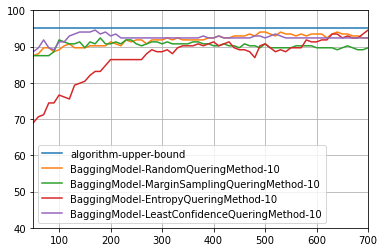

In [59]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['10'] 
repeats = 1
upper_bound = 95.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results2(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

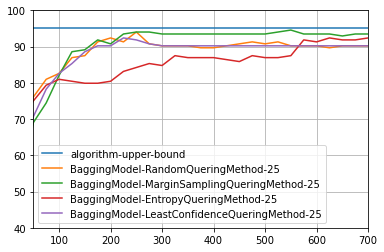

In [56]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['25'] 
repeats = 1
upper_bound = 95.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results2(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)

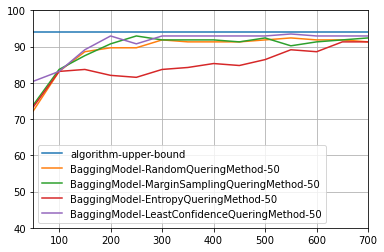

In [55]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod','LeastConfidenceQueringMethod']
Ks = ['50'] 
repeats = 1
upper_bound = 94.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results2(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)